<a href="https://colab.research.google.com/github/HenningBuhl/DLML/blob/master/GAN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DLML - GAN

## TODO

In [1]:
"""

TODO

- Train classifier and inspect classification of generated images

DIFFICULT!
- Use different loss function?
- Use growing architecture
- Use Style GAN




"""

'\n\nTODO\n\n- Implement save and load\n- Find most similar training image of generated image\n- Inspect latent space proximity of good looking examples\n- Train classifier and inspect classification of generated images\n\n- Use different loss function?\n- Use growing architecture\n- Use Style GAN\n\n\n\n\n'

## Sources

- https://github.com/eriklindernoren/Keras-GAN
- https://machinelearningmastery.com/how-to-code-generative-adversarial-network-hacks/
- https://www.youtube.com/watch?v=dCKbRCUyop8
- https://github.com/google/compare_gan
- https://arxiv.org/pdf/1806.11382.pdf
- https://arxiv.org/pdf/1812.04948.pdf
- https://arxiv.org/pdf/1710.10196.pdf
- https://arxiv.org/pdf/1801.04406.pdf
- 

## Random Seeds

In [0]:
# Set Numpy seed.
from numpy.random import seed
seed(1)

# Set TensorFlow seed.
from tensorflow import set_random_seed
set_random_seed(2)

## Imports

In [0]:
import keras
import keras.backend as K

from keras.layers import Input, Dense, Flatten, Reshape, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.layers import BatchNormalization, Dropout, Activation, ZeroPadding2D
from keras.layers import LeakyReLU, ReLU
from keras.initializers import RandomNormal, glorot_normal
from keras.models import load_model
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential, Model

import os

import numpy as np
from numpy.random import random

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)

# Data

In [0]:
# Meta data.
x_dim = 28
y_dim = 28
channels = 1

In [0]:
# Load data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
# Concatonate train and test data.
#x_train = np.concatenate((x_train, x_test))

# Add channel dimension.
x_train = x_train.reshape(-1, x_dim, y_dim, channels)

# Normalize data to interval (-1, 1).
x_train = x_train / 255 * 2 - 1

In [7]:
# Print data shape.
print(x_train.shape)

(60000, 28, 28, 1)


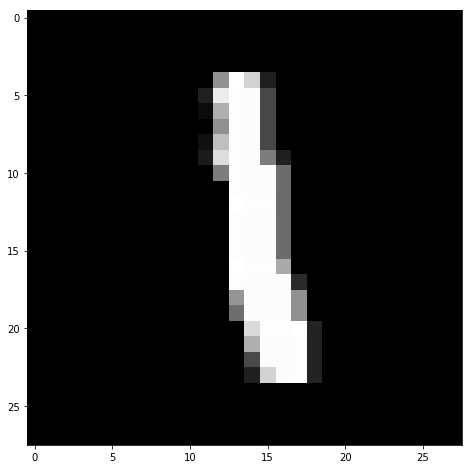

In [8]:
plt.imshow(x_train[6].reshape(x_dim, y_dim), cmap='gray_r')
plt.show()

# GAN

## Hyper Parameters

In [0]:
iterations = 10000
batch_size = 128
latent_dim = 100

init = glorot_normal() #RandomNormal(mean=0, stddev=0.02)
optimizer = Adam(lr=0.0002, beta_1=0.5)

## Inferrable Parameters

In [0]:
img_shape = (x_dim, y_dim, channels)
noise_shape = (latent_dim,)

## Generator

In [11]:
# Build generator model.
z = Input(shape=noise_shape)
x = Dense(128 * 7 * 7, kernel_initializer=init)(z)
x = LeakyReLU(0.2)(x)
x = Reshape((7, 7, 128))(x)

x = Conv2D(128, kernel_size=3, strides=(1, 1), padding="same", kernel_initializer=init)(x)
x = BatchNormalization()(x)
x = LeakyReLU(0.2)(x)

x = Conv2DTranspose(128, kernel_size=3, strides=(2, 2), padding="same", kernel_initializer=init)(x)
x = BatchNormalization()(x)
x = LeakyReLU(0.2)(x)

x = Conv2D(64, kernel_size=3, strides=(1, 1), padding="same", kernel_initializer=init)(x)
x = BatchNormalization()(x)
x = LeakyReLU(0.2)(x)

x = Conv2DTranspose(64, kernel_size=3, strides=(2, 2), padding="same", kernel_initializer=init)(x)
x = BatchNormalization()(x)
x = LeakyReLU(0.2)(x)

x = Conv2D(channels, kernel_size=3, strides=(1, 1), padding="same", kernel_initializer=init)(x)
x = Activation("tanh")(x)

generator = Model(z, x)
generator.name = "generator"
generator.summary()












Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 6272)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 128)

## Discriminator

In [12]:
# Build discriminator model.
img_input = Input(shape=img_shape)
x = Conv2D(32, kernel_size=3, strides=(2, 2), padding="same", kernel_initializer=init)(img_input)
x = LeakyReLU(0.2)(x)
x = Dropout(0.25)(x)

x = Conv2D(64, kernel_size=3, strides=(2, 2), padding="same", kernel_initializer=init)(x)
x = BatchNormalization()(x)
x = LeakyReLU(0.2)(x)
x = Dropout(0.25)(x)

x = Conv2D(128, kernel_size=3, strides=(2, 2), padding="same", kernel_initializer=init)(x)
x = BatchNormalization()(x)
x = LeakyReLU(0.2)(x)
x = Dropout(0.25)(x)

x = Conv2D(256, kernel_size=3, strides=(1, 1), padding="same", kernel_initializer=init)(x)
x = BatchNormalization()(x)
x = LeakyReLU(0.2)(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(1, kernel_initializer=init)(x)
x = Activation("sigmoid")(x)

discriminator = Model(img_input, x)
discriminator.name = "discriminator"
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])
discriminator.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
________________________________________

## Combined Model

In [13]:
# For the combined model we will only train the generator.
discriminator.trainable = False

# Combined model (stacked generator and discriminator).
combined = Model(z, discriminator(generator(z)))
combined.name = "combined"
combined.summary()
combined.compile(loss='binary_crossentropy', optimizer=optimizer)

Model: "combined"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
generator (Model)            (None, 28, 28, 1)         1041473   
_________________________________________________________________
discriminator (Model)        (None, 1)                 393729    
Total params: 1,435,202
Trainable params: 1,040,705
Non-trainable params: 394,497
_________________________________________________________________


## Training

In [0]:
# Loss history.
losses = {'d_loss_real' : [],
          'd_loss_fake' : [],
          'd_loss' : [],
          'g_loss' : []}

In [0]:
save_path_image = "images/"
if not os.path.exists(save_path_image):
    os.mkdir(save_path_image)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Iteration:     0 [D loss: 1.26645, acc.:  20.31%] [G loss: 0.69981]


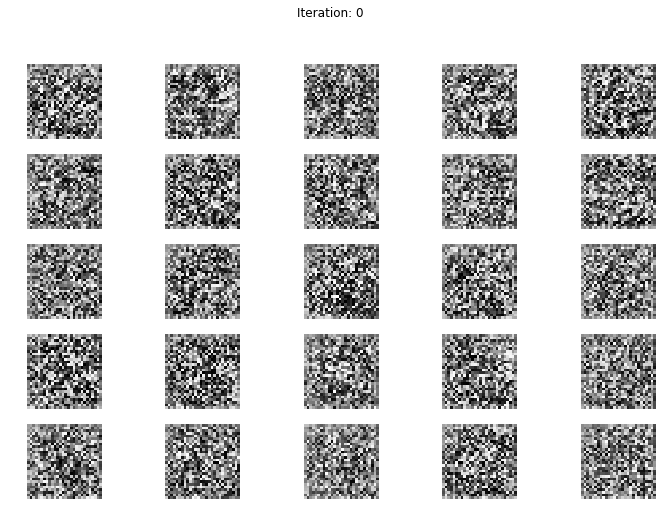

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Iteration:     1 [D loss: 0.71635, acc.:  58.59%] [G loss: 0.89845]
Iteration:     2 [D loss: 0.54270, acc.:  70.31%] [G loss: 1.11750]
Iteration:     3 [D loss: 0.48520, acc.:  78.91%] [G loss: 1.39553]
Iteration:     4 [D loss: 0.44615, acc.:  79.69%] [G loss: 1.31893]
Iteration:     5 [D loss: 0.42954, acc.:  81.64%] [G loss: 1.40870]
Iteration:     6 [D loss: 0.48539, acc.:  77.73%] [G loss: 1.13459]
Iteration:     7 [D loss: 0.43515, acc.:  81.64%] [G loss: 1.17108]
Iteration:     8 [D loss: 0.39081, acc.:  85.16%] [G loss: 0.97549]
Iteration:     9 [D loss: 0.40160, acc.:  82.42%] [G loss: 0.94173]
Iteration:    10 [D loss: 0.37866, acc.:  83.98%] [G loss: 0.84593]
Iteration:    11 [D loss: 0.44385, acc.:  78.91%] [G loss: 0.81408]
Iteration:    12 [D loss: 0.51778, acc.:  75.39%] [G loss: 0.73904]
Iteration:    13 [D loss: 0.41111, acc.:  82.81%] [G loss: 0.68864]
Iteration:    14 [D loss: 0.44819, acc.:  80.08%] [G loss: 0.50682]
Iteration:    15 [D loss: 0.50739, acc.:  76.17%

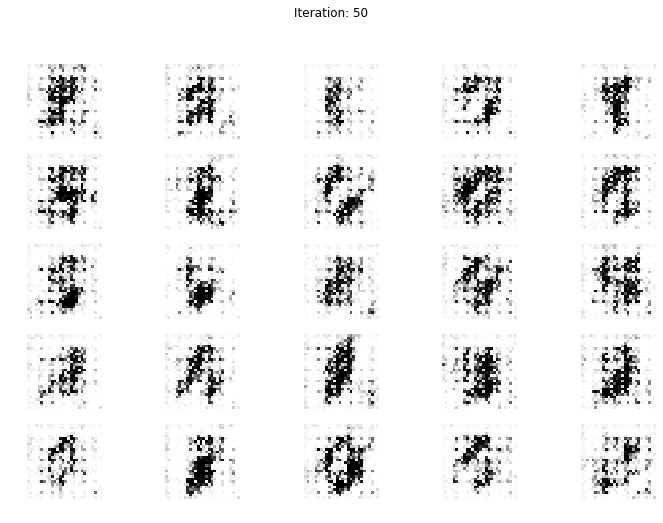

Iteration:    51 [D loss: 0.64597, acc.:  65.62%] [G loss: 1.37616]
Iteration:    52 [D loss: 0.80570, acc.:  56.64%] [G loss: 1.61098]
Iteration:    53 [D loss: 1.06375, acc.:  40.23%] [G loss: 1.72919]
Iteration:    54 [D loss: 0.99128, acc.:  48.83%] [G loss: 1.93071]
Iteration:    55 [D loss: 0.94743, acc.:  47.66%] [G loss: 1.88700]
Iteration:    56 [D loss: 0.81274, acc.:  56.64%] [G loss: 1.73790]
Iteration:    57 [D loss: 0.63360, acc.:  63.67%] [G loss: 1.65208]
Iteration:    58 [D loss: 0.76976, acc.:  57.81%] [G loss: 1.62247]
Iteration:    59 [D loss: 0.83168, acc.:  49.61%] [G loss: 1.64817]
Iteration:    60 [D loss: 0.89379, acc.:  48.05%] [G loss: 1.36394]
Iteration:    61 [D loss: 1.15509, acc.:  30.86%] [G loss: 1.29030]
Iteration:    62 [D loss: 1.19549, acc.:  32.03%] [G loss: 1.35704]
Iteration:    63 [D loss: 1.06466, acc.:  35.55%] [G loss: 1.27935]
Iteration:    64 [D loss: 0.92547, acc.:  41.80%] [G loss: 1.40358]
Iteration:    65 [D loss: 0.89931, acc.:  50.00%

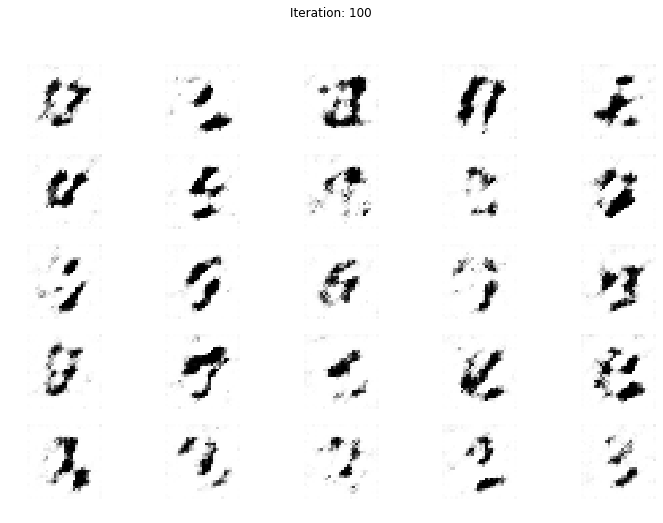

Iteration:   101 [D loss: 0.84622, acc.:  46.09%] [G loss: 1.14916]
Iteration:   102 [D loss: 0.79815, acc.:  50.39%] [G loss: 1.33891]
Iteration:   103 [D loss: 0.92099, acc.:  39.45%] [G loss: 1.29254]
Iteration:   104 [D loss: 0.83247, acc.:  50.00%] [G loss: 1.01257]
Iteration:   105 [D loss: 0.79248, acc.:  50.78%] [G loss: 1.26271]
Iteration:   106 [D loss: 0.82518, acc.:  46.48%] [G loss: 1.18971]
Iteration:   107 [D loss: 0.78678, acc.:  52.73%] [G loss: 1.09499]
Iteration:   108 [D loss: 0.89719, acc.:  44.14%] [G loss: 1.04778]
Iteration:   109 [D loss: 0.77490, acc.:  52.34%] [G loss: 1.10175]
Iteration:   110 [D loss: 0.78671, acc.:  51.56%] [G loss: 1.17113]
Iteration:   111 [D loss: 0.77431, acc.:  52.73%] [G loss: 1.06505]
Iteration:   112 [D loss: 0.82431, acc.:  48.44%] [G loss: 0.96023]
Iteration:   113 [D loss: 0.84785, acc.:  51.17%] [G loss: 1.18635]
Iteration:   114 [D loss: 0.86867, acc.:  45.31%] [G loss: 1.15863]
Iteration:   115 [D loss: 0.74538, acc.:  58.98%

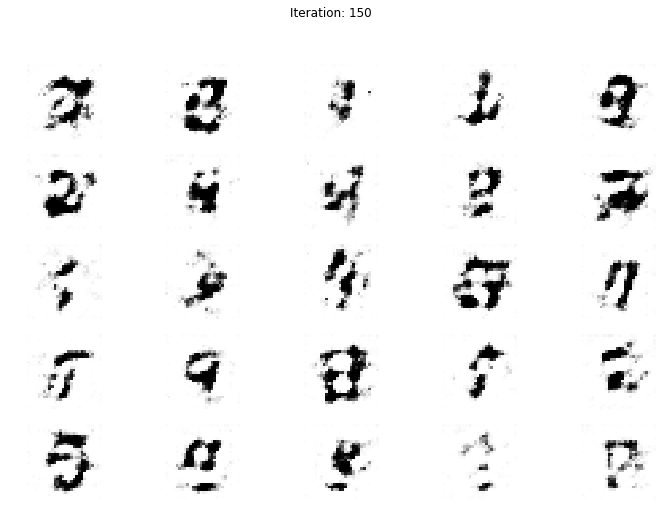

Iteration:   151 [D loss: 0.81092, acc.:  48.05%] [G loss: 1.09687]
Iteration:   152 [D loss: 0.88343, acc.:  40.62%] [G loss: 1.08470]
Iteration:   153 [D loss: 0.79752, acc.:  52.34%] [G loss: 1.10524]
Iteration:   154 [D loss: 0.77490, acc.:  50.78%] [G loss: 1.09062]
Iteration:   155 [D loss: 0.88222, acc.:  41.41%] [G loss: 1.04767]
Iteration:   156 [D loss: 0.93303, acc.:  38.28%] [G loss: 0.96147]
Iteration:   157 [D loss: 0.90814, acc.:  41.80%] [G loss: 0.91343]
Iteration:   158 [D loss: 0.85057, acc.:  47.66%] [G loss: 1.08516]
Iteration:   159 [D loss: 0.76245, acc.:  51.95%] [G loss: 1.02672]
Iteration:   160 [D loss: 0.89018, acc.:  43.75%] [G loss: 0.90940]
Iteration:   161 [D loss: 0.87970, acc.:  39.06%] [G loss: 0.98835]
Iteration:   162 [D loss: 0.81112, acc.:  45.70%] [G loss: 1.02501]
Iteration:   163 [D loss: 0.84695, acc.:  44.53%] [G loss: 0.97469]
Iteration:   164 [D loss: 0.84461, acc.:  43.75%] [G loss: 1.02019]
Iteration:   165 [D loss: 0.80544, acc.:  45.31%

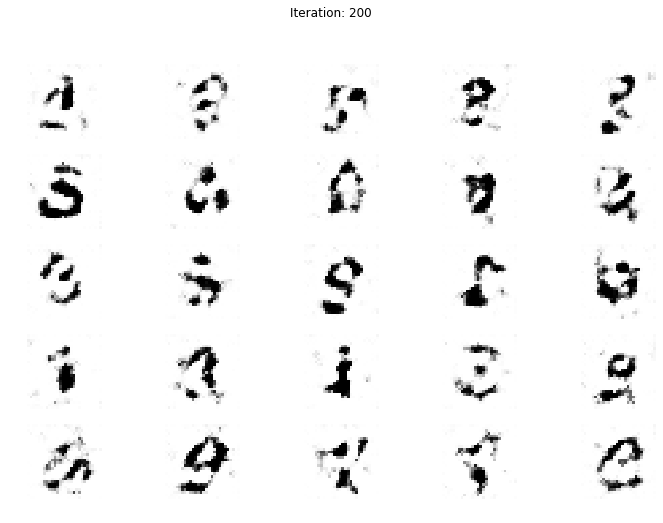

Iteration:   201 [D loss: 0.87393, acc.:  41.02%] [G loss: 1.01022]
Iteration:   202 [D loss: 0.81220, acc.:  44.53%] [G loss: 0.95558]
Iteration:   203 [D loss: 0.81668, acc.:  46.09%] [G loss: 0.91715]
Iteration:   204 [D loss: 0.81147, acc.:  42.97%] [G loss: 1.03836]
Iteration:   205 [D loss: 0.81253, acc.:  46.48%] [G loss: 1.00475]
Iteration:   206 [D loss: 0.76630, acc.:  52.34%] [G loss: 0.96620]
Iteration:   207 [D loss: 0.80744, acc.:  42.19%] [G loss: 1.02686]
Iteration:   208 [D loss: 0.74782, acc.:  50.78%] [G loss: 1.03503]
Iteration:   209 [D loss: 0.80616, acc.:  46.09%] [G loss: 0.93270]
Iteration:   210 [D loss: 0.78829, acc.:  48.83%] [G loss: 1.05583]
Iteration:   211 [D loss: 0.84811, acc.:  41.02%] [G loss: 0.95303]
Iteration:   212 [D loss: 0.84293, acc.:  42.97%] [G loss: 0.99294]
Iteration:   213 [D loss: 0.85782, acc.:  39.45%] [G loss: 0.95495]
Iteration:   214 [D loss: 0.79109, acc.:  46.48%] [G loss: 1.01492]
Iteration:   215 [D loss: 0.81908, acc.:  41.80%

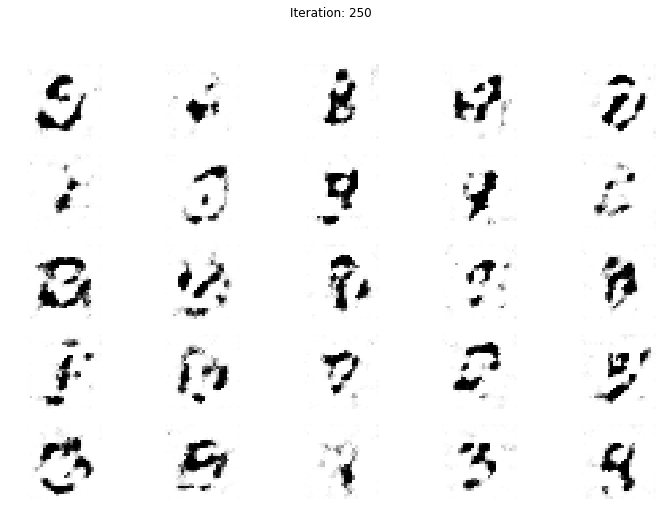

Iteration:   251 [D loss: 0.76143, acc.:  52.73%] [G loss: 0.94609]
Iteration:   252 [D loss: 0.74723, acc.:  50.39%] [G loss: 0.98257]
Iteration:   253 [D loss: 0.73983, acc.:  53.52%] [G loss: 0.89560]
Iteration:   254 [D loss: 0.80645, acc.:  44.53%] [G loss: 0.96336]
Iteration:   255 [D loss: 0.79446, acc.:  49.22%] [G loss: 0.95701]
Iteration:   256 [D loss: 0.78493, acc.:  51.56%] [G loss: 0.96677]
Iteration:   257 [D loss: 0.78083, acc.:  49.22%] [G loss: 1.00101]
Iteration:   258 [D loss: 0.79448, acc.:  45.70%] [G loss: 1.03674]
Iteration:   259 [D loss: 0.78754, acc.:  46.09%] [G loss: 0.94639]
Iteration:   260 [D loss: 0.82677, acc.:  44.92%] [G loss: 1.01353]
Iteration:   261 [D loss: 0.78097, acc.:  47.27%] [G loss: 1.05098]
Iteration:   262 [D loss: 0.71175, acc.:  58.20%] [G loss: 1.08675]
Iteration:   263 [D loss: 0.76365, acc.:  48.83%] [G loss: 1.02279]
Iteration:   264 [D loss: 0.78170, acc.:  46.88%] [G loss: 0.93681]
Iteration:   265 [D loss: 0.74767, acc.:  51.56%

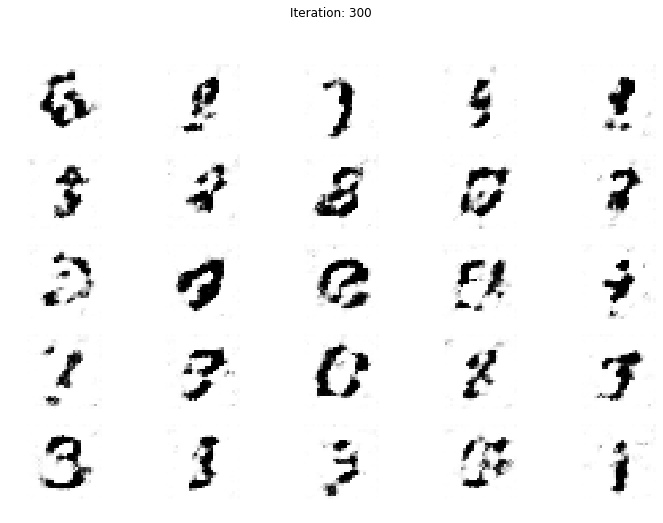

Iteration:   301 [D loss: 0.74593, acc.:  53.52%] [G loss: 0.98574]
Iteration:   302 [D loss: 0.76158, acc.:  50.78%] [G loss: 0.92844]
Iteration:   303 [D loss: 0.78956, acc.:  48.44%] [G loss: 0.92886]
Iteration:   304 [D loss: 0.76434, acc.:  50.78%] [G loss: 0.96133]
Iteration:   305 [D loss: 0.80684, acc.:  46.48%] [G loss: 0.92980]
Iteration:   306 [D loss: 0.76026, acc.:  49.22%] [G loss: 0.92725]
Iteration:   307 [D loss: 0.76401, acc.:  50.39%] [G loss: 0.84883]
Iteration:   308 [D loss: 0.74579, acc.:  51.56%] [G loss: 0.97057]
Iteration:   309 [D loss: 0.78064, acc.:  44.53%] [G loss: 0.94806]
Iteration:   310 [D loss: 0.73755, acc.:  49.22%] [G loss: 0.95782]
Iteration:   311 [D loss: 0.73245, acc.:  50.00%] [G loss: 1.00323]
Iteration:   312 [D loss: 0.74346, acc.:  53.52%] [G loss: 0.96702]
Iteration:   313 [D loss: 0.74572, acc.:  49.22%] [G loss: 0.96291]
Iteration:   314 [D loss: 0.79434, acc.:  46.09%] [G loss: 0.91221]
Iteration:   315 [D loss: 0.74666, acc.:  48.44%

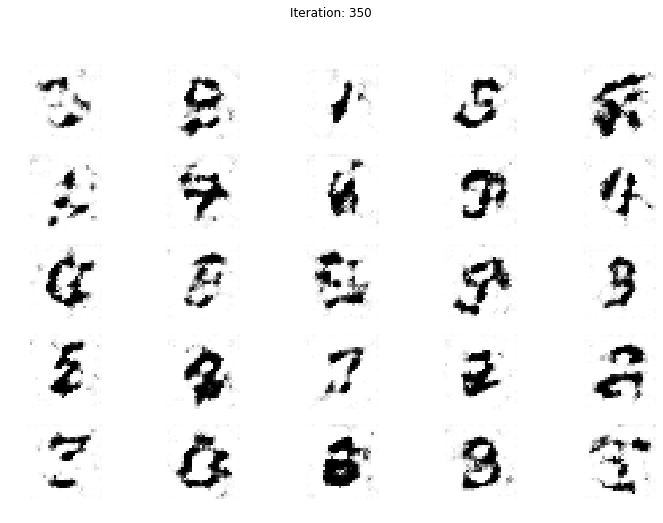

Iteration:   351 [D loss: 0.72864, acc.:  53.52%] [G loss: 0.99099]
Iteration:   352 [D loss: 0.74805, acc.:  46.48%] [G loss: 0.97235]
Iteration:   353 [D loss: 0.69479, acc.:  58.98%] [G loss: 0.95316]
Iteration:   354 [D loss: 0.75017, acc.:  50.78%] [G loss: 0.93045]
Iteration:   355 [D loss: 0.74961, acc.:  49.61%] [G loss: 0.92554]
Iteration:   356 [D loss: 0.74337, acc.:  51.95%] [G loss: 0.92563]
Iteration:   357 [D loss: 0.75722, acc.:  49.22%] [G loss: 1.01061]
Iteration:   358 [D loss: 0.73295, acc.:  50.39%] [G loss: 0.98203]
Iteration:   359 [D loss: 0.71605, acc.:  54.30%] [G loss: 1.00091]
Iteration:   360 [D loss: 0.73006, acc.:  51.56%] [G loss: 0.99061]
Iteration:   361 [D loss: 0.75947, acc.:  51.17%] [G loss: 1.03768]
Iteration:   362 [D loss: 0.71298, acc.:  56.64%] [G loss: 1.03177]
Iteration:   363 [D loss: 0.78750, acc.:  49.22%] [G loss: 0.94685]
Iteration:   364 [D loss: 0.71990, acc.:  52.34%] [G loss: 1.04167]
Iteration:   365 [D loss: 0.74172, acc.:  51.56%

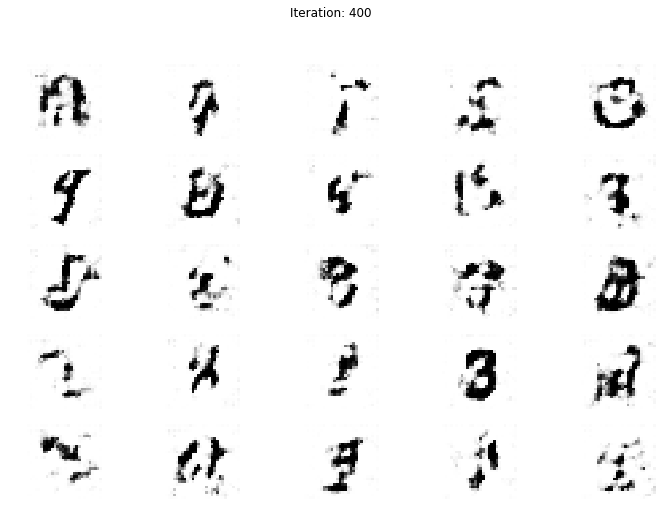

Iteration:   401 [D loss: 0.75559, acc.:  48.83%] [G loss: 0.95040]
Iteration:   402 [D loss: 0.75568, acc.:  48.44%] [G loss: 0.92556]
Iteration:   403 [D loss: 0.74893, acc.:  46.88%] [G loss: 1.05606]
Iteration:   404 [D loss: 0.75113, acc.:  49.22%] [G loss: 1.06107]
Iteration:   405 [D loss: 0.71046, acc.:  52.34%] [G loss: 1.03704]
Iteration:   406 [D loss: 0.75191, acc.:  50.00%] [G loss: 1.00335]
Iteration:   407 [D loss: 0.71323, acc.:  53.91%] [G loss: 0.98533]
Iteration:   408 [D loss: 0.77371, acc.:  44.92%] [G loss: 0.94718]
Iteration:   409 [D loss: 0.77246, acc.:  46.88%] [G loss: 0.95283]
Iteration:   410 [D loss: 0.71783, acc.:  52.34%] [G loss: 0.96111]
Iteration:   411 [D loss: 0.70267, acc.:  56.64%] [G loss: 0.97824]
Iteration:   412 [D loss: 0.74443, acc.:  51.17%] [G loss: 0.99433]
Iteration:   413 [D loss: 0.75327, acc.:  51.17%] [G loss: 1.01117]
Iteration:   414 [D loss: 0.75009, acc.:  48.83%] [G loss: 0.94238]
Iteration:   415 [D loss: 0.76552, acc.:  47.27%

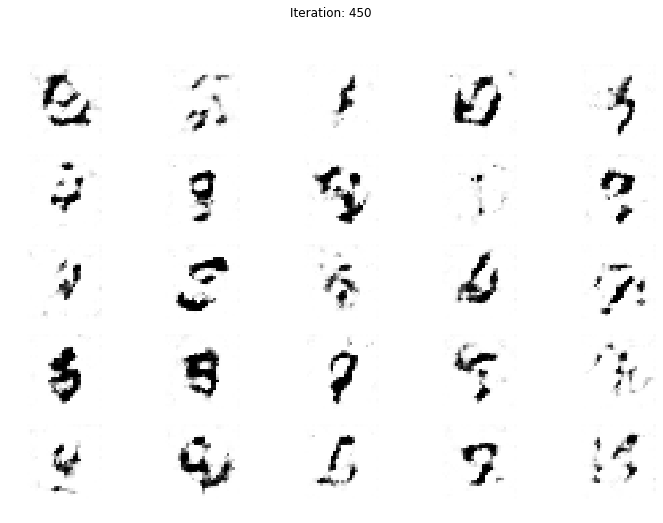

Iteration:   451 [D loss: 0.70676, acc.:  54.69%] [G loss: 1.00922]
Iteration:   452 [D loss: 0.71723, acc.:  55.08%] [G loss: 0.96344]
Iteration:   453 [D loss: 0.65858, acc.:  61.72%] [G loss: 0.99248]
Iteration:   454 [D loss: 0.72581, acc.:  53.12%] [G loss: 1.00842]
Iteration:   455 [D loss: 0.69759, acc.:  55.86%] [G loss: 0.96139]
Iteration:   456 [D loss: 0.74866, acc.:  53.91%] [G loss: 0.91226]
Iteration:   457 [D loss: 0.70361, acc.:  55.86%] [G loss: 1.06833]
Iteration:   458 [D loss: 0.74826, acc.:  53.12%] [G loss: 1.04715]
Iteration:   459 [D loss: 0.73730, acc.:  52.34%] [G loss: 0.90507]
Iteration:   460 [D loss: 0.68350, acc.:  55.86%] [G loss: 1.02728]
Iteration:   461 [D loss: 0.74398, acc.:  49.22%] [G loss: 1.01911]
Iteration:   462 [D loss: 0.71059, acc.:  56.25%] [G loss: 1.05634]
Iteration:   463 [D loss: 0.75753, acc.:  50.00%] [G loss: 0.93978]
Iteration:   464 [D loss: 0.73243, acc.:  52.73%] [G loss: 1.02885]
Iteration:   465 [D loss: 0.68824, acc.:  55.47%

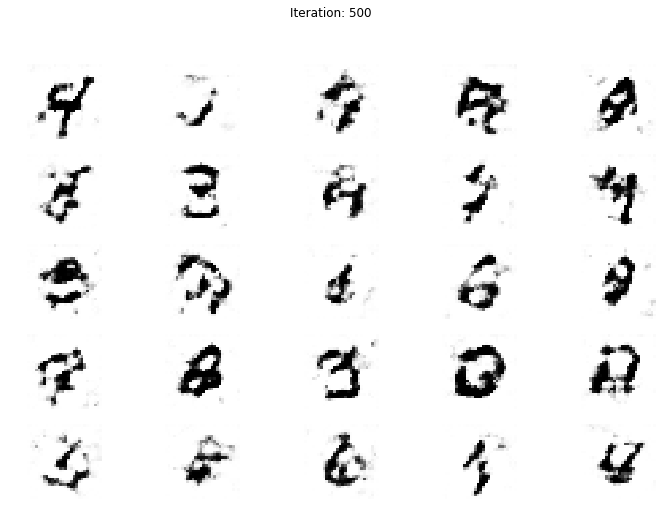

Iteration:   501 [D loss: 0.71782, acc.:  52.73%] [G loss: 1.02102]
Iteration:   502 [D loss: 0.69804, acc.:  53.52%] [G loss: 0.98978]
Iteration:   503 [D loss: 0.76445, acc.:  46.48%] [G loss: 0.96225]
Iteration:   504 [D loss: 0.69583, acc.:  57.03%] [G loss: 1.00367]
Iteration:   505 [D loss: 0.68712, acc.:  55.86%] [G loss: 1.04949]
Iteration:   506 [D loss: 0.71443, acc.:  53.91%] [G loss: 0.94205]
Iteration:   507 [D loss: 0.71804, acc.:  54.69%] [G loss: 0.94733]
Iteration:   508 [D loss: 0.69133, acc.:  55.47%] [G loss: 0.98125]
Iteration:   509 [D loss: 0.72446, acc.:  55.08%] [G loss: 1.02396]
Iteration:   510 [D loss: 0.70970, acc.:  53.91%] [G loss: 0.96944]
Iteration:   511 [D loss: 0.68841, acc.:  57.03%] [G loss: 1.00504]
Iteration:   512 [D loss: 0.69402, acc.:  55.86%] [G loss: 0.93193]
Iteration:   513 [D loss: 0.78262, acc.:  48.05%] [G loss: 0.99798]
Iteration:   514 [D loss: 0.73278, acc.:  53.91%] [G loss: 0.94894]
Iteration:   515 [D loss: 0.70452, acc.:  55.86%

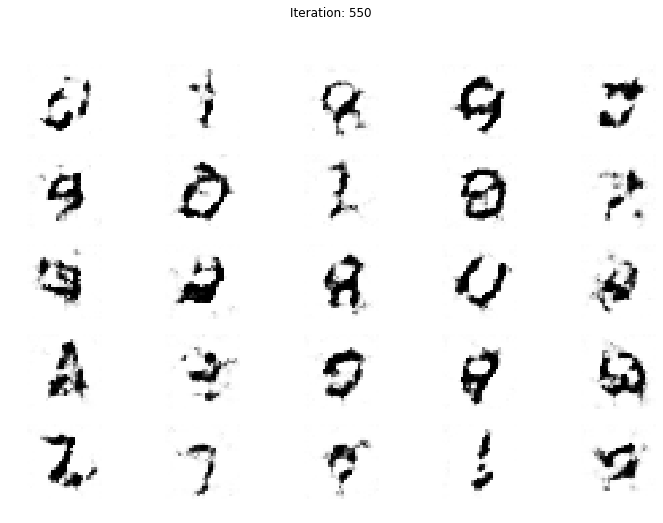

Iteration:   551 [D loss: 0.75614, acc.:  50.39%] [G loss: 0.95729]
Iteration:   552 [D loss: 0.74525, acc.:  53.12%] [G loss: 0.93274]
Iteration:   553 [D loss: 0.70565, acc.:  55.08%] [G loss: 0.95058]
Iteration:   554 [D loss: 0.74153, acc.:  51.95%] [G loss: 0.92195]
Iteration:   555 [D loss: 0.70797, acc.:  51.56%] [G loss: 0.97947]
Iteration:   556 [D loss: 0.72432, acc.:  49.61%] [G loss: 0.93345]
Iteration:   557 [D loss: 0.69009, acc.:  56.25%] [G loss: 0.95015]
Iteration:   558 [D loss: 0.73345, acc.:  56.64%] [G loss: 0.88636]
Iteration:   559 [D loss: 0.71605, acc.:  53.52%] [G loss: 0.90444]
Iteration:   560 [D loss: 0.75121, acc.:  52.73%] [G loss: 0.95425]
Iteration:   561 [D loss: 0.72661, acc.:  50.00%] [G loss: 0.94748]
Iteration:   562 [D loss: 0.76401, acc.:  48.44%] [G loss: 1.00621]
Iteration:   563 [D loss: 0.70386, acc.:  55.08%] [G loss: 0.98092]
Iteration:   564 [D loss: 0.72451, acc.:  54.69%] [G loss: 0.99873]
Iteration:   565 [D loss: 0.73268, acc.:  52.34%

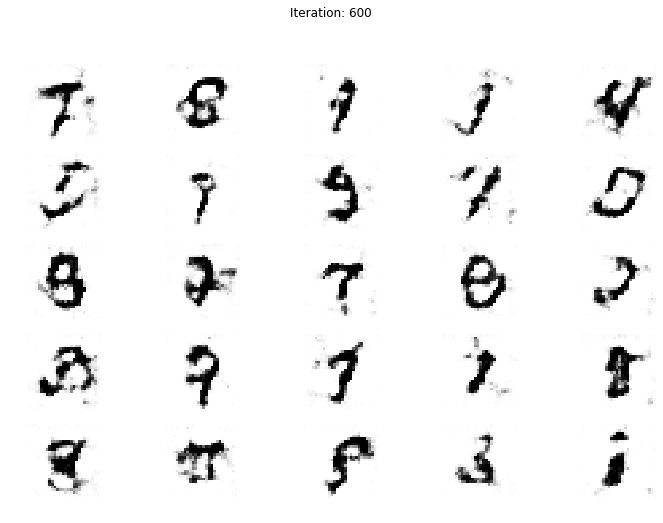

Iteration:   601 [D loss: 0.72730, acc.:  52.73%] [G loss: 1.01907]
Iteration:   602 [D loss: 0.77328, acc.:  46.48%] [G loss: 0.99637]
Iteration:   603 [D loss: 0.75080, acc.:  47.66%] [G loss: 0.94398]
Iteration:   604 [D loss: 0.71199, acc.:  51.95%] [G loss: 1.00528]
Iteration:   605 [D loss: 0.73185, acc.:  55.47%] [G loss: 0.90505]
Iteration:   606 [D loss: 0.75453, acc.:  50.78%] [G loss: 0.87813]
Iteration:   607 [D loss: 0.71214, acc.:  53.12%] [G loss: 0.98622]
Iteration:   608 [D loss: 0.77135, acc.:  48.44%] [G loss: 0.97433]
Iteration:   609 [D loss: 0.76755, acc.:  44.92%] [G loss: 0.93290]
Iteration:   610 [D loss: 0.71455, acc.:  55.86%] [G loss: 0.87123]
Iteration:   611 [D loss: 0.69267, acc.:  59.38%] [G loss: 0.95148]
Iteration:   612 [D loss: 0.71359, acc.:  53.52%] [G loss: 1.02533]
Iteration:   613 [D loss: 0.72461, acc.:  50.78%] [G loss: 0.96096]
Iteration:   614 [D loss: 0.70030, acc.:  58.20%] [G loss: 0.95646]
Iteration:   615 [D loss: 0.70933, acc.:  53.91%

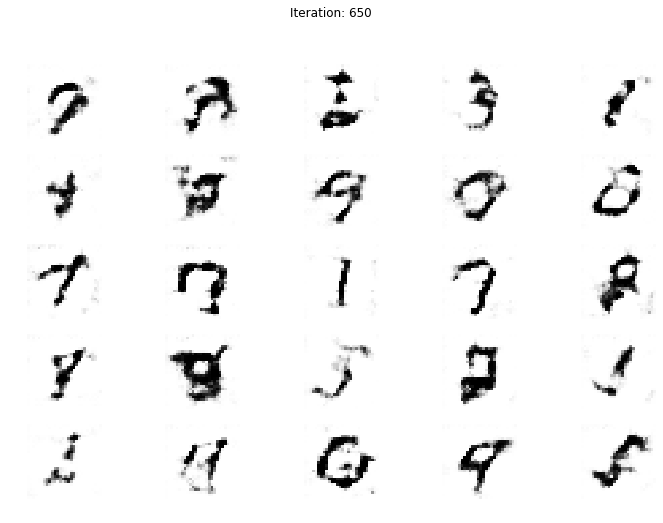

Iteration:   651 [D loss: 0.69118, acc.:  57.03%] [G loss: 0.87771]
Iteration:   652 [D loss: 0.71750, acc.:  54.30%] [G loss: 0.94781]
Iteration:   653 [D loss: 0.71549, acc.:  56.64%] [G loss: 0.89903]
Iteration:   654 [D loss: 0.72306, acc.:  51.56%] [G loss: 0.84558]
Iteration:   655 [D loss: 0.73519, acc.:  53.12%] [G loss: 0.82384]
Iteration:   656 [D loss: 0.75260, acc.:  50.00%] [G loss: 0.94165]
Iteration:   657 [D loss: 0.70728, acc.:  52.34%] [G loss: 0.85923]
Iteration:   658 [D loss: 0.73688, acc.:  55.47%] [G loss: 0.92138]
Iteration:   659 [D loss: 0.72108, acc.:  51.95%] [G loss: 0.94157]
Iteration:   660 [D loss: 0.73007, acc.:  52.73%] [G loss: 0.89712]
Iteration:   661 [D loss: 0.69334, acc.:  52.34%] [G loss: 0.90107]
Iteration:   662 [D loss: 0.70627, acc.:  53.91%] [G loss: 0.83530]
Iteration:   663 [D loss: 0.74600, acc.:  47.27%] [G loss: 0.92370]
Iteration:   664 [D loss: 0.72279, acc.:  53.91%] [G loss: 0.93635]
Iteration:   665 [D loss: 0.79486, acc.:  44.92%

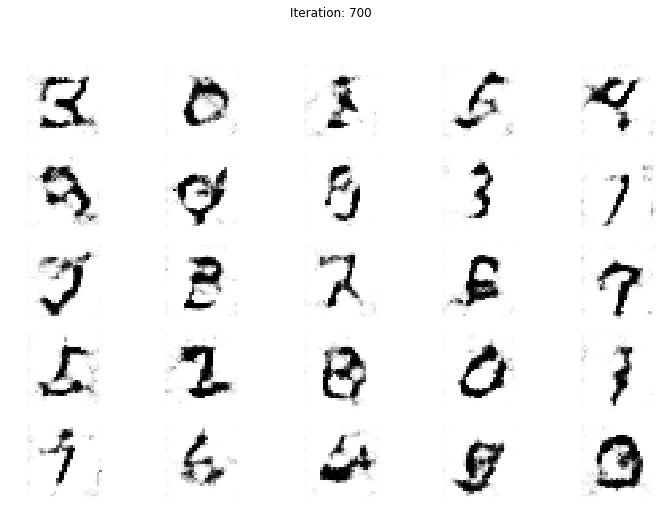

Iteration:   701 [D loss: 0.75174, acc.:  49.22%] [G loss: 0.88776]
Iteration:   702 [D loss: 0.78640, acc.:  43.75%] [G loss: 0.94104]
Iteration:   703 [D loss: 0.70388, acc.:  55.47%] [G loss: 0.90322]
Iteration:   704 [D loss: 0.71971, acc.:  52.73%] [G loss: 0.89358]
Iteration:   705 [D loss: 0.67002, acc.:  57.81%] [G loss: 0.88263]
Iteration:   706 [D loss: 0.73539, acc.:  52.34%] [G loss: 0.89080]
Iteration:   707 [D loss: 0.68297, acc.:  58.20%] [G loss: 0.84913]
Iteration:   708 [D loss: 0.73908, acc.:  51.95%] [G loss: 0.86234]
Iteration:   709 [D loss: 0.75587, acc.:  50.78%] [G loss: 0.89056]
Iteration:   710 [D loss: 0.72275, acc.:  53.12%] [G loss: 0.84094]
Iteration:   711 [D loss: 0.69939, acc.:  56.64%] [G loss: 0.85050]
Iteration:   712 [D loss: 0.75294, acc.:  46.48%] [G loss: 0.88129]
Iteration:   713 [D loss: 0.69446, acc.:  58.59%] [G loss: 0.98238]
Iteration:   714 [D loss: 0.74342, acc.:  47.66%] [G loss: 0.92009]
Iteration:   715 [D loss: 0.73526, acc.:  54.30%

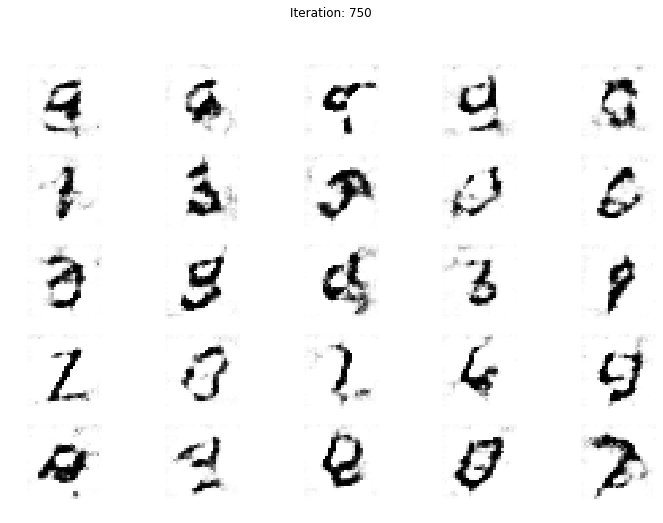

Iteration:   751 [D loss: 0.74394, acc.:  50.78%] [G loss: 0.85426]
Iteration:   752 [D loss: 0.70875, acc.:  52.73%] [G loss: 0.88412]
Iteration:   753 [D loss: 0.69441, acc.:  56.25%] [G loss: 0.85056]
Iteration:   754 [D loss: 0.75015, acc.:  46.88%] [G loss: 0.90999]
Iteration:   755 [D loss: 0.72164, acc.:  48.44%] [G loss: 0.90588]
Iteration:   756 [D loss: 0.72809, acc.:  50.39%] [G loss: 0.90542]
Iteration:   757 [D loss: 0.71670, acc.:  52.73%] [G loss: 0.82906]
Iteration:   758 [D loss: 0.74938, acc.:  53.52%] [G loss: 0.89251]
Iteration:   759 [D loss: 0.72280, acc.:  53.12%] [G loss: 0.88508]
Iteration:   760 [D loss: 0.72837, acc.:  54.30%] [G loss: 0.92058]
Iteration:   761 [D loss: 0.74139, acc.:  50.78%] [G loss: 0.89299]
Iteration:   762 [D loss: 0.78319, acc.:  46.09%] [G loss: 0.90227]
Iteration:   763 [D loss: 0.69932, acc.:  55.86%] [G loss: 0.90651]
Iteration:   764 [D loss: 0.77736, acc.:  46.48%] [G loss: 0.89548]
Iteration:   765 [D loss: 0.70848, acc.:  52.34%

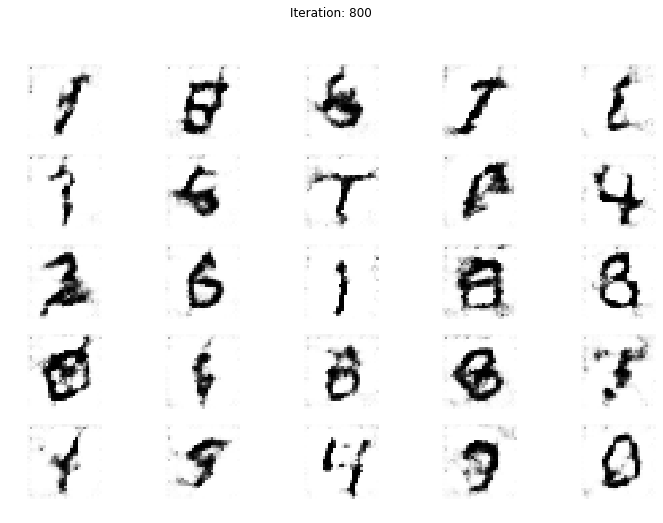

Iteration:   801 [D loss: 0.77839, acc.:  44.14%] [G loss: 0.86709]
Iteration:   802 [D loss: 0.73351, acc.:  47.66%] [G loss: 0.86534]
Iteration:   803 [D loss: 0.68033, acc.:  58.98%] [G loss: 0.88608]
Iteration:   804 [D loss: 0.71661, acc.:  51.56%] [G loss: 0.95685]
Iteration:   805 [D loss: 0.76226, acc.:  42.19%] [G loss: 0.93512]
Iteration:   806 [D loss: 0.71910, acc.:  51.17%] [G loss: 0.98696]
Iteration:   807 [D loss: 0.72416, acc.:  53.52%] [G loss: 0.93315]
Iteration:   808 [D loss: 0.72489, acc.:  54.30%] [G loss: 0.91005]
Iteration:   809 [D loss: 0.70389, acc.:  55.47%] [G loss: 0.96353]
Iteration:   810 [D loss: 0.71667, acc.:  51.17%] [G loss: 0.94016]
Iteration:   811 [D loss: 0.72647, acc.:  50.78%] [G loss: 0.94398]
Iteration:   812 [D loss: 0.73605, acc.:  47.66%] [G loss: 0.93213]
Iteration:   813 [D loss: 0.75832, acc.:  48.05%] [G loss: 0.85973]
Iteration:   814 [D loss: 0.72311, acc.:  48.83%] [G loss: 0.91027]
Iteration:   815 [D loss: 0.75699, acc.:  46.88%

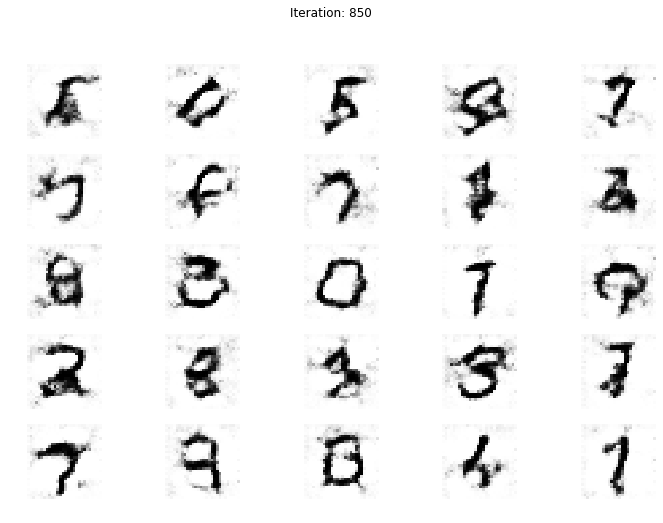

Iteration:   851 [D loss: 0.72157, acc.:  50.39%] [G loss: 0.84942]
Iteration:   852 [D loss: 0.72270, acc.:  53.12%] [G loss: 0.87913]
Iteration:   853 [D loss: 0.70340, acc.:  55.47%] [G loss: 0.90250]
Iteration:   854 [D loss: 0.75533, acc.:  47.27%] [G loss: 0.91721]
Iteration:   855 [D loss: 0.75903, acc.:  48.83%] [G loss: 0.88719]
Iteration:   856 [D loss: 0.69681, acc.:  57.42%] [G loss: 0.87462]
Iteration:   857 [D loss: 0.71023, acc.:  53.91%] [G loss: 0.88282]
Iteration:   858 [D loss: 0.72726, acc.:  51.56%] [G loss: 0.89410]
Iteration:   859 [D loss: 0.71472, acc.:  51.56%] [G loss: 0.89901]
Iteration:   860 [D loss: 0.75625, acc.:  45.31%] [G loss: 0.88226]
Iteration:   861 [D loss: 0.71454, acc.:  53.52%] [G loss: 0.88260]
Iteration:   862 [D loss: 0.76553, acc.:  46.09%] [G loss: 0.91249]
Iteration:   863 [D loss: 0.73813, acc.:  48.05%] [G loss: 0.83020]
Iteration:   864 [D loss: 0.70663, acc.:  55.47%] [G loss: 0.98012]
Iteration:   865 [D loss: 0.72518, acc.:  51.95%

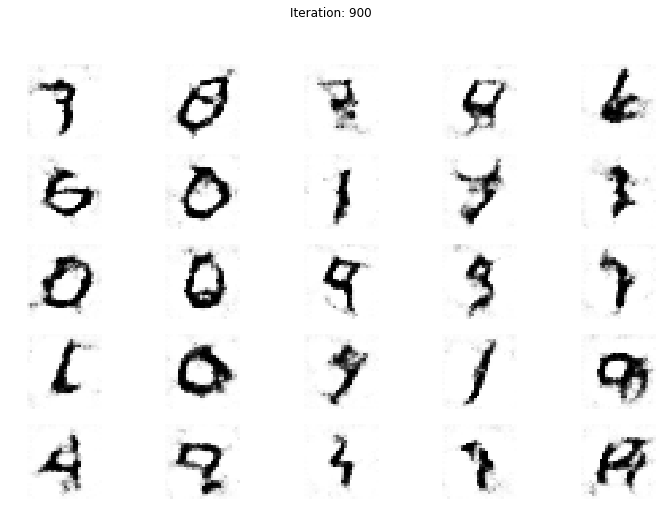

Iteration:   901 [D loss: 0.72880, acc.:  50.00%] [G loss: 0.94666]
Iteration:   902 [D loss: 0.72344, acc.:  51.17%] [G loss: 0.84558]
Iteration:   903 [D loss: 0.70322, acc.:  57.81%] [G loss: 0.92163]
Iteration:   904 [D loss: 0.76392, acc.:  46.09%] [G loss: 0.84095]
Iteration:   905 [D loss: 0.68916, acc.:  56.25%] [G loss: 0.84640]
Iteration:   906 [D loss: 0.74736, acc.:  46.88%] [G loss: 0.89886]
Iteration:   907 [D loss: 0.72890, acc.:  50.39%] [G loss: 0.83476]
Iteration:   908 [D loss: 0.72067, acc.:  54.30%] [G loss: 0.83428]
Iteration:   909 [D loss: 0.71035, acc.:  53.91%] [G loss: 0.84451]
Iteration:   910 [D loss: 0.65231, acc.:  61.72%] [G loss: 0.83001]
Iteration:   911 [D loss: 0.75679, acc.:  49.61%] [G loss: 0.81788]
Iteration:   912 [D loss: 0.72010, acc.:  52.73%] [G loss: 0.84978]
Iteration:   913 [D loss: 0.72642, acc.:  53.52%] [G loss: 0.87773]
Iteration:   914 [D loss: 0.77684, acc.:  44.14%] [G loss: 0.88955]
Iteration:   915 [D loss: 0.73359, acc.:  50.78%

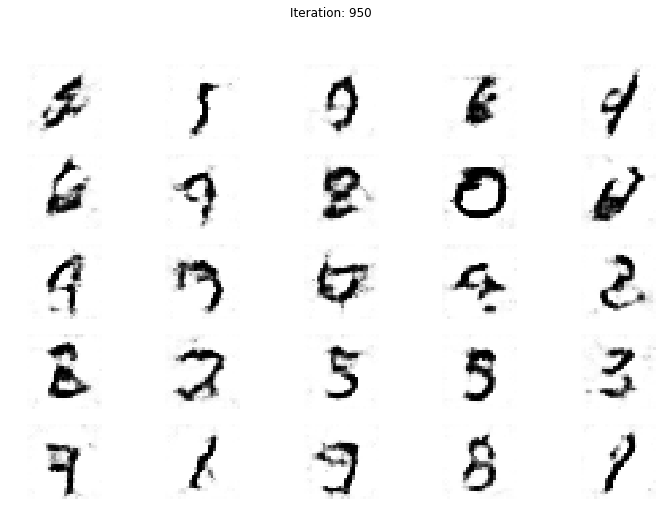

Iteration:   951 [D loss: 0.66728, acc.:  56.64%] [G loss: 0.95247]
Iteration:   952 [D loss: 0.71310, acc.:  54.30%] [G loss: 0.88741]
Iteration:   953 [D loss: 0.73259, acc.:  52.34%] [G loss: 0.89828]
Iteration:   954 [D loss: 0.69009, acc.:  54.30%] [G loss: 0.91732]
Iteration:   955 [D loss: 0.74545, acc.:  48.44%] [G loss: 0.87071]
Iteration:   956 [D loss: 0.78847, acc.:  42.58%] [G loss: 0.92348]
Iteration:   957 [D loss: 0.73081, acc.:  53.12%] [G loss: 0.90084]
Iteration:   958 [D loss: 0.71967, acc.:  51.56%] [G loss: 0.92569]
Iteration:   959 [D loss: 0.73419, acc.:  50.78%] [G loss: 0.87429]
Iteration:   960 [D loss: 0.75203, acc.:  50.39%] [G loss: 0.88831]
Iteration:   961 [D loss: 0.70425, acc.:  53.91%] [G loss: 0.88615]
Iteration:   962 [D loss: 0.77102, acc.:  49.22%] [G loss: 0.98095]
Iteration:   963 [D loss: 0.75458, acc.:  46.48%] [G loss: 0.88211]
Iteration:   964 [D loss: 0.70496, acc.:  54.69%] [G loss: 0.89430]
Iteration:   965 [D loss: 0.73757, acc.:  53.91%

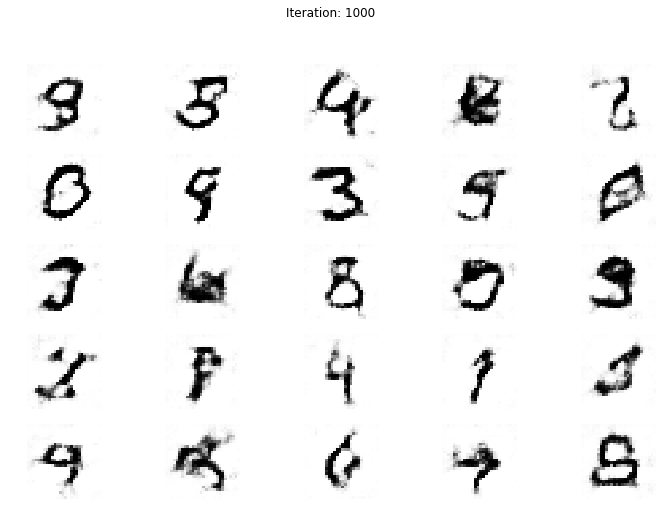

Iteration:  1001 [D loss: 0.72172, acc.:  54.69%] [G loss: 0.89494]
Iteration:  1002 [D loss: 0.71922, acc.:  53.12%] [G loss: 0.87910]
Iteration:  1003 [D loss: 0.70009, acc.:  55.08%] [G loss: 0.92773]
Iteration:  1004 [D loss: 0.69630, acc.:  57.03%] [G loss: 0.88762]
Iteration:  1005 [D loss: 0.74047, acc.:  51.56%] [G loss: 0.89399]
Iteration:  1006 [D loss: 0.73980, acc.:  49.22%] [G loss: 0.89339]
Iteration:  1007 [D loss: 0.72641, acc.:  48.83%] [G loss: 0.96325]
Iteration:  1008 [D loss: 0.73293, acc.:  52.73%] [G loss: 0.86996]
Iteration:  1009 [D loss: 0.75414, acc.:  46.48%] [G loss: 0.84128]
Iteration:  1010 [D loss: 0.70770, acc.:  53.52%] [G loss: 0.91386]
Iteration:  1011 [D loss: 0.73956, acc.:  49.61%] [G loss: 0.89828]
Iteration:  1012 [D loss: 0.73407, acc.:  49.61%] [G loss: 0.81825]
Iteration:  1013 [D loss: 0.68183, acc.:  55.47%] [G loss: 0.88017]
Iteration:  1014 [D loss: 0.74343, acc.:  48.44%] [G loss: 0.82020]
Iteration:  1015 [D loss: 0.70091, acc.:  55.86%

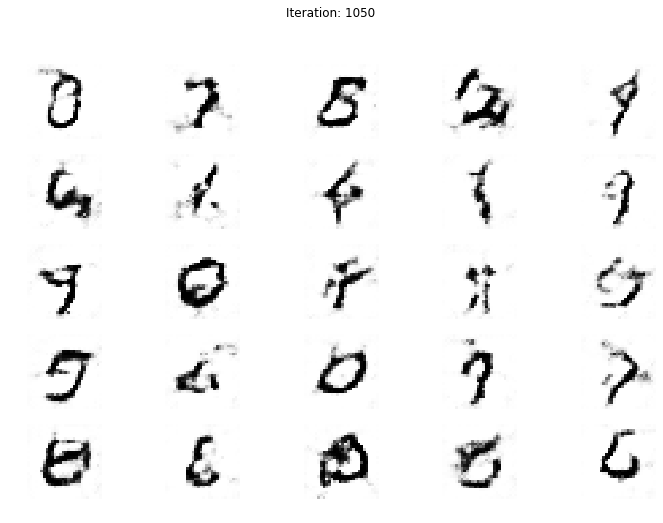

Iteration:  1051 [D loss: 0.66201, acc.:  62.89%] [G loss: 0.91398]
Iteration:  1052 [D loss: 0.75756, acc.:  46.88%] [G loss: 0.90229]
Iteration:  1053 [D loss: 0.66800, acc.:  60.16%] [G loss: 0.92817]
Iteration:  1054 [D loss: 0.69233, acc.:  59.77%] [G loss: 0.88704]
Iteration:  1055 [D loss: 0.70569, acc.:  55.47%] [G loss: 0.89357]
Iteration:  1056 [D loss: 0.68677, acc.:  58.98%] [G loss: 0.80608]
Iteration:  1057 [D loss: 0.69879, acc.:  55.86%] [G loss: 0.85894]
Iteration:  1058 [D loss: 0.73163, acc.:  52.73%] [G loss: 0.85065]
Iteration:  1059 [D loss: 0.71677, acc.:  53.52%] [G loss: 0.85853]
Iteration:  1060 [D loss: 0.74546, acc.:  45.70%] [G loss: 0.84538]
Iteration:  1061 [D loss: 0.67944, acc.:  57.81%] [G loss: 0.88545]
Iteration:  1062 [D loss: 0.76113, acc.:  47.66%] [G loss: 0.87799]
Iteration:  1063 [D loss: 0.74193, acc.:  51.95%] [G loss: 0.93520]
Iteration:  1064 [D loss: 0.69935, acc.:  55.08%] [G loss: 0.96363]
Iteration:  1065 [D loss: 0.71279, acc.:  55.47%

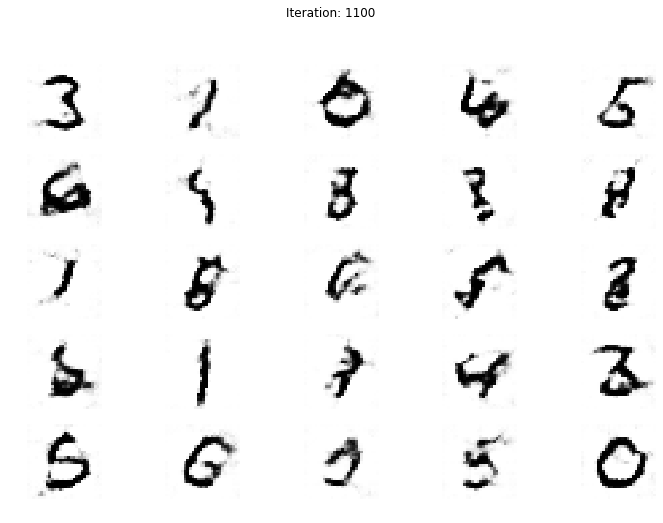

Iteration:  1101 [D loss: 0.73375, acc.:  51.17%] [G loss: 0.89298]
Iteration:  1102 [D loss: 0.72166, acc.:  50.39%] [G loss: 0.92324]
Iteration:  1103 [D loss: 0.71237, acc.:  52.73%] [G loss: 0.88022]
Iteration:  1104 [D loss: 0.74334, acc.:  51.17%] [G loss: 0.87740]
Iteration:  1105 [D loss: 0.70515, acc.:  51.17%] [G loss: 0.86570]
Iteration:  1106 [D loss: 0.73570, acc.:  49.61%] [G loss: 0.89714]
Iteration:  1107 [D loss: 0.73982, acc.:  52.73%] [G loss: 0.85750]
Iteration:  1108 [D loss: 0.70289, acc.:  53.91%] [G loss: 0.85161]
Iteration:  1109 [D loss: 0.73568, acc.:  50.00%] [G loss: 0.82230]
Iteration:  1110 [D loss: 0.70772, acc.:  54.69%] [G loss: 0.92510]
Iteration:  1111 [D loss: 0.71422, acc.:  51.95%] [G loss: 0.90654]
Iteration:  1112 [D loss: 0.69229, acc.:  54.30%] [G loss: 0.86832]
Iteration:  1113 [D loss: 0.71466, acc.:  53.12%] [G loss: 0.92595]
Iteration:  1114 [D loss: 0.71812, acc.:  50.00%] [G loss: 0.87856]
Iteration:  1115 [D loss: 0.71361, acc.:  51.95%

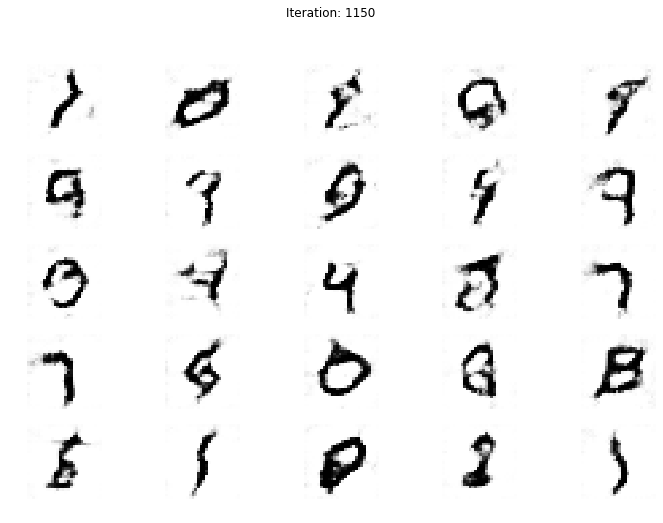

Iteration:  1151 [D loss: 0.70830, acc.:  50.39%] [G loss: 0.93153]
Iteration:  1152 [D loss: 0.73775, acc.:  52.34%] [G loss: 0.90197]
Iteration:  1153 [D loss: 0.72867, acc.:  51.17%] [G loss: 0.89277]
Iteration:  1154 [D loss: 0.70003, acc.:  54.69%] [G loss: 0.86317]
Iteration:  1155 [D loss: 0.71211, acc.:  55.47%] [G loss: 0.84024]
Iteration:  1156 [D loss: 0.73704, acc.:  51.17%] [G loss: 0.86830]
Iteration:  1157 [D loss: 0.68432, acc.:  58.98%] [G loss: 0.94694]
Iteration:  1158 [D loss: 0.71677, acc.:  54.69%] [G loss: 0.87829]
Iteration:  1159 [D loss: 0.73016, acc.:  53.12%] [G loss: 0.90216]
Iteration:  1160 [D loss: 0.72617, acc.:  50.39%] [G loss: 0.90423]
Iteration:  1161 [D loss: 0.71260, acc.:  53.91%] [G loss: 0.85989]
Iteration:  1162 [D loss: 0.71860, acc.:  50.78%] [G loss: 0.90157]
Iteration:  1163 [D loss: 0.68905, acc.:  55.86%] [G loss: 0.91154]
Iteration:  1164 [D loss: 0.69346, acc.:  58.20%] [G loss: 0.95209]
Iteration:  1165 [D loss: 0.73751, acc.:  48.83%

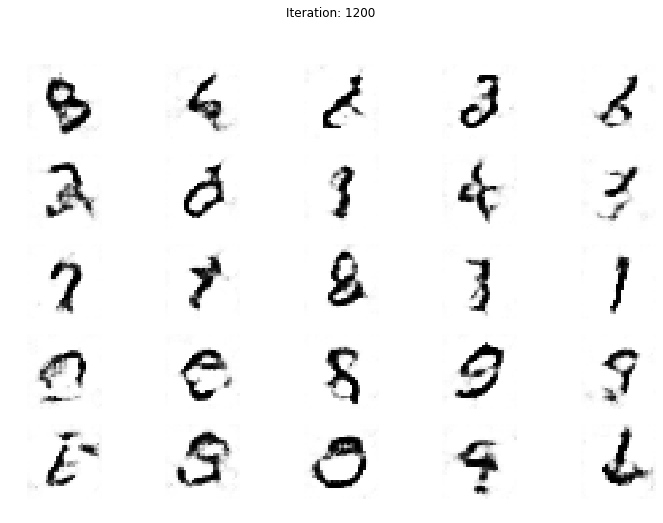

Iteration:  1201 [D loss: 0.71701, acc.:  52.73%] [G loss: 0.88781]
Iteration:  1202 [D loss: 0.68307, acc.:  57.42%] [G loss: 0.87950]
Iteration:  1203 [D loss: 0.74128, acc.:  51.17%] [G loss: 0.79758]
Iteration:  1204 [D loss: 0.71844, acc.:  49.22%] [G loss: 0.88086]
Iteration:  1205 [D loss: 0.74092, acc.:  48.05%] [G loss: 0.84624]
Iteration:  1206 [D loss: 0.75052, acc.:  48.83%] [G loss: 0.89773]
Iteration:  1207 [D loss: 0.70274, acc.:  55.47%] [G loss: 0.85616]
Iteration:  1208 [D loss: 0.73913, acc.:  49.22%] [G loss: 0.92594]
Iteration:  1209 [D loss: 0.70201, acc.:  53.12%] [G loss: 0.83420]
Iteration:  1210 [D loss: 0.70880, acc.:  53.91%] [G loss: 0.87942]
Iteration:  1211 [D loss: 0.72868, acc.:  51.17%] [G loss: 0.98544]
Iteration:  1212 [D loss: 0.74597, acc.:  46.88%] [G loss: 0.90369]
Iteration:  1213 [D loss: 0.76096, acc.:  49.61%] [G loss: 0.80649]
Iteration:  1214 [D loss: 0.74522, acc.:  48.83%] [G loss: 0.83236]
Iteration:  1215 [D loss: 0.72197, acc.:  52.73%

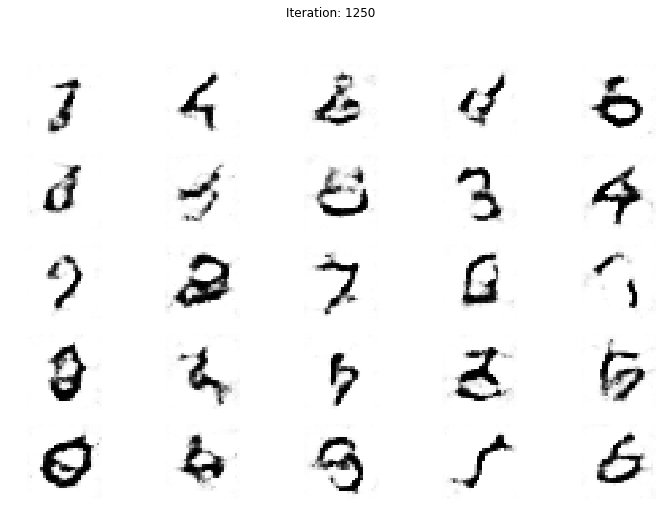

Iteration:  1251 [D loss: 0.73521, acc.:  48.05%] [G loss: 0.80232]
Iteration:  1252 [D loss: 0.72060, acc.:  51.56%] [G loss: 0.78746]
Iteration:  1253 [D loss: 0.73935, acc.:  50.39%] [G loss: 0.83639]
Iteration:  1254 [D loss: 0.67471, acc.:  58.59%] [G loss: 0.91415]
Iteration:  1255 [D loss: 0.71669, acc.:  50.39%] [G loss: 0.89861]
Iteration:  1256 [D loss: 0.72703, acc.:  53.91%] [G loss: 0.91242]
Iteration:  1257 [D loss: 0.73088, acc.:  50.78%] [G loss: 0.93177]
Iteration:  1258 [D loss: 0.70720, acc.:  54.30%] [G loss: 0.93693]
Iteration:  1259 [D loss: 0.67869, acc.:  59.77%] [G loss: 0.89345]
Iteration:  1260 [D loss: 0.73701, acc.:  51.17%] [G loss: 0.87282]
Iteration:  1261 [D loss: 0.71739, acc.:  50.78%] [G loss: 0.93539]
Iteration:  1262 [D loss: 0.72966, acc.:  49.22%] [G loss: 0.89276]
Iteration:  1263 [D loss: 0.69788, acc.:  51.95%] [G loss: 0.85993]
Iteration:  1264 [D loss: 0.73574, acc.:  48.44%] [G loss: 0.86551]
Iteration:  1265 [D loss: 0.69247, acc.:  55.86%

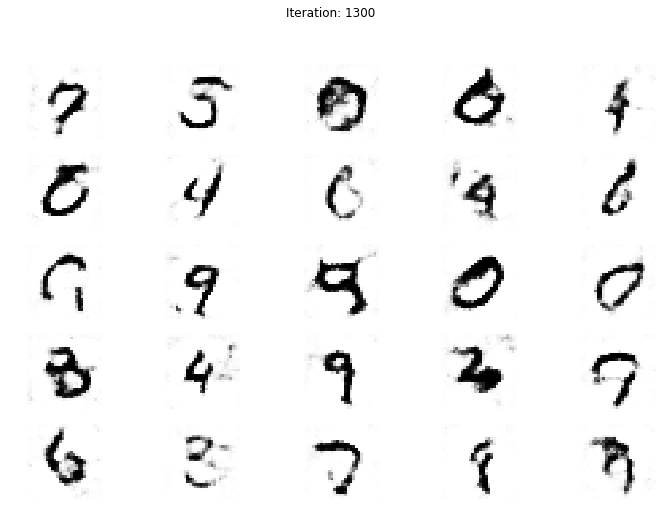

Iteration:  1301 [D loss: 0.67417, acc.:  59.77%] [G loss: 0.87390]
Iteration:  1302 [D loss: 0.70432, acc.:  51.56%] [G loss: 0.83596]
Iteration:  1303 [D loss: 0.73337, acc.:  47.66%] [G loss: 0.81826]
Iteration:  1304 [D loss: 0.70993, acc.:  55.47%] [G loss: 0.82327]
Iteration:  1305 [D loss: 0.72300, acc.:  51.17%] [G loss: 0.86650]
Iteration:  1306 [D loss: 0.72005, acc.:  51.17%] [G loss: 0.88224]
Iteration:  1307 [D loss: 0.74235, acc.:  51.95%] [G loss: 0.88123]
Iteration:  1308 [D loss: 0.72397, acc.:  53.12%] [G loss: 0.88721]
Iteration:  1309 [D loss: 0.73050, acc.:  48.83%] [G loss: 0.90263]
Iteration:  1310 [D loss: 0.70607, acc.:  52.73%] [G loss: 0.88305]
Iteration:  1311 [D loss: 0.68209, acc.:  58.59%] [G loss: 0.86478]
Iteration:  1312 [D loss: 0.70796, acc.:  54.30%] [G loss: 0.96818]
Iteration:  1313 [D loss: 0.69046, acc.:  56.64%] [G loss: 0.91190]
Iteration:  1314 [D loss: 0.72901, acc.:  55.86%] [G loss: 0.84061]
Iteration:  1315 [D loss: 0.65656, acc.:  60.55%

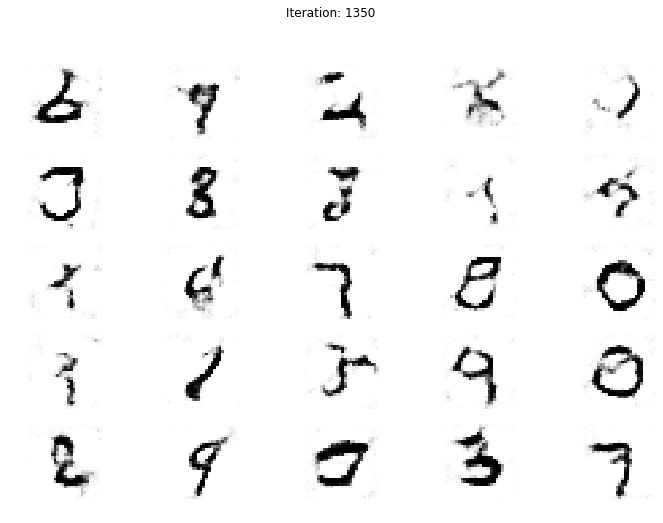

Iteration:  1351 [D loss: 0.72687, acc.:  52.73%] [G loss: 0.87427]
Iteration:  1352 [D loss: 0.68151, acc.:  58.59%] [G loss: 0.90533]
Iteration:  1353 [D loss: 0.69872, acc.:  56.25%] [G loss: 0.85401]
Iteration:  1354 [D loss: 0.70458, acc.:  56.25%] [G loss: 0.83959]
Iteration:  1355 [D loss: 0.73121, acc.:  48.05%] [G loss: 0.82918]
Iteration:  1356 [D loss: 0.74636, acc.:  50.39%] [G loss: 0.89252]
Iteration:  1357 [D loss: 0.67864, acc.:  54.30%] [G loss: 0.84827]
Iteration:  1358 [D loss: 0.73452, acc.:  50.78%] [G loss: 0.88479]
Iteration:  1359 [D loss: 0.73670, acc.:  46.88%] [G loss: 0.87011]
Iteration:  1360 [D loss: 0.69250, acc.:  59.38%] [G loss: 0.84052]
Iteration:  1361 [D loss: 0.73372, acc.:  50.39%] [G loss: 0.90674]
Iteration:  1362 [D loss: 0.71661, acc.:  55.47%] [G loss: 0.91038]
Iteration:  1363 [D loss: 0.70205, acc.:  55.86%] [G loss: 0.89876]
Iteration:  1364 [D loss: 0.74021, acc.:  48.05%] [G loss: 0.86045]
Iteration:  1365 [D loss: 0.73419, acc.:  46.88%

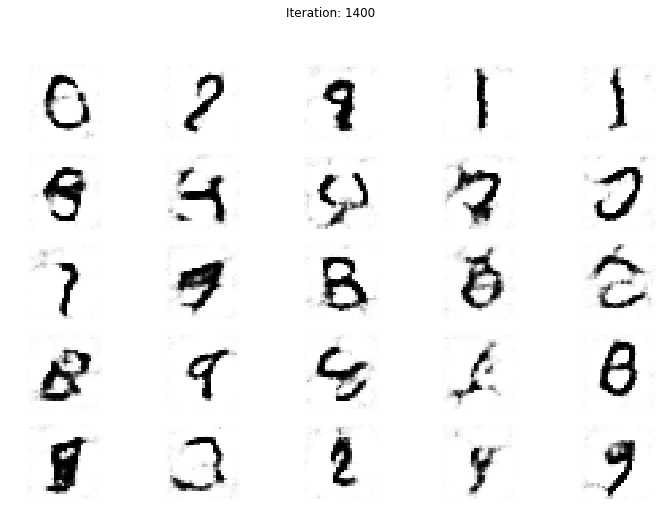

Iteration:  1401 [D loss: 0.73087, acc.:  47.66%] [G loss: 0.87445]
Iteration:  1402 [D loss: 0.71437, acc.:  53.12%] [G loss: 0.87973]
Iteration:  1403 [D loss: 0.68101, acc.:  59.38%] [G loss: 0.89830]
Iteration:  1404 [D loss: 0.67933, acc.:  55.86%] [G loss: 0.84807]
Iteration:  1405 [D loss: 0.72354, acc.:  52.34%] [G loss: 0.87458]
Iteration:  1406 [D loss: 0.73857, acc.:  48.05%] [G loss: 0.86229]
Iteration:  1407 [D loss: 0.69732, acc.:  52.73%] [G loss: 0.84782]
Iteration:  1408 [D loss: 0.72369, acc.:  52.34%] [G loss: 0.88257]
Iteration:  1409 [D loss: 0.73640, acc.:  51.56%] [G loss: 0.85168]
Iteration:  1410 [D loss: 0.72515, acc.:  53.91%] [G loss: 0.86794]
Iteration:  1411 [D loss: 0.67752, acc.:  57.03%] [G loss: 0.97192]
Iteration:  1412 [D loss: 0.69495, acc.:  52.73%] [G loss: 0.91070]
Iteration:  1413 [D loss: 0.72123, acc.:  52.34%] [G loss: 0.85908]
Iteration:  1414 [D loss: 0.69779, acc.:  56.25%] [G loss: 0.87402]
Iteration:  1415 [D loss: 0.72137, acc.:  49.61%

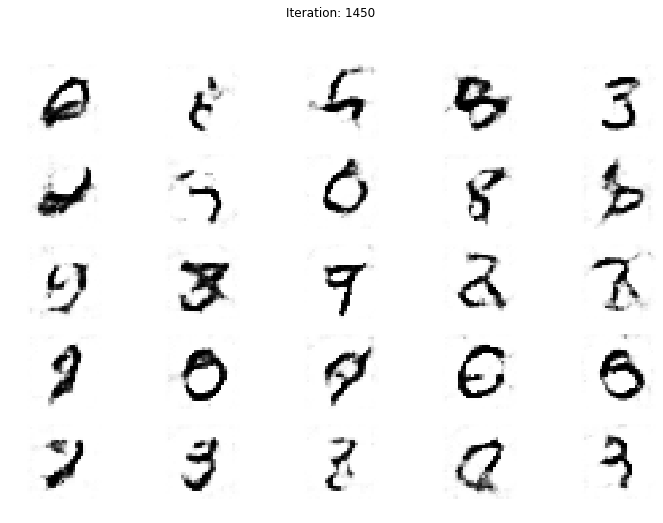

Iteration:  1451 [D loss: 0.72977, acc.:  50.39%] [G loss: 0.87996]
Iteration:  1452 [D loss: 0.72983, acc.:  49.61%] [G loss: 0.82889]
Iteration:  1453 [D loss: 0.70514, acc.:  48.05%] [G loss: 0.84537]
Iteration:  1454 [D loss: 0.73108, acc.:  51.95%] [G loss: 0.87197]
Iteration:  1455 [D loss: 0.72373, acc.:  53.91%] [G loss: 0.80968]
Iteration:  1456 [D loss: 0.69320, acc.:  56.64%] [G loss: 0.85456]
Iteration:  1457 [D loss: 0.74168, acc.:  51.95%] [G loss: 0.86714]
Iteration:  1458 [D loss: 0.71465, acc.:  52.34%] [G loss: 0.86371]
Iteration:  1459 [D loss: 0.66659, acc.:  58.20%] [G loss: 0.86183]
Iteration:  1460 [D loss: 0.69468, acc.:  57.42%] [G loss: 0.87358]
Iteration:  1461 [D loss: 0.67926, acc.:  58.59%] [G loss: 0.87343]
Iteration:  1462 [D loss: 0.71693, acc.:  51.95%] [G loss: 0.85639]
Iteration:  1463 [D loss: 0.66334, acc.:  60.55%] [G loss: 0.87179]
Iteration:  1464 [D loss: 0.70578, acc.:  52.34%] [G loss: 0.88396]
Iteration:  1465 [D loss: 0.69487, acc.:  55.08%

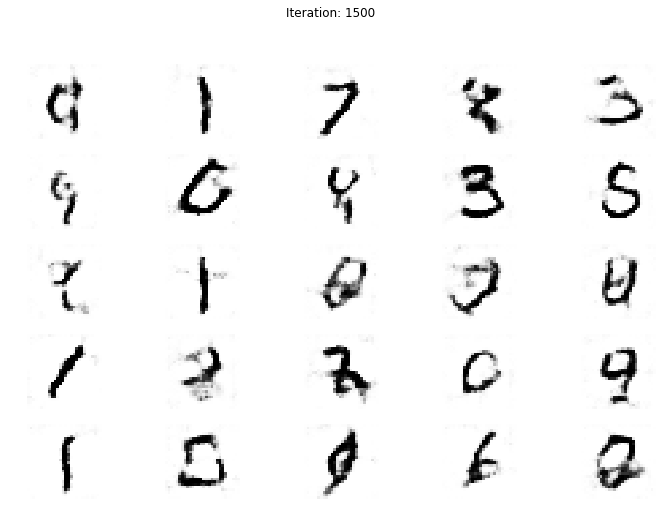

Iteration:  1501 [D loss: 0.73261, acc.:  53.12%] [G loss: 0.85369]
Iteration:  1502 [D loss: 0.70570, acc.:  53.52%] [G loss: 0.79336]
Iteration:  1503 [D loss: 0.72830, acc.:  52.73%] [G loss: 0.79858]
Iteration:  1504 [D loss: 0.71473, acc.:  51.56%] [G loss: 0.86823]
Iteration:  1505 [D loss: 0.70020, acc.:  52.73%] [G loss: 0.87386]
Iteration:  1506 [D loss: 0.73506, acc.:  50.78%] [G loss: 0.90880]
Iteration:  1507 [D loss: 0.72651, acc.:  51.95%] [G loss: 0.84244]
Iteration:  1508 [D loss: 0.67526, acc.:  58.98%] [G loss: 0.87758]
Iteration:  1509 [D loss: 0.68976, acc.:  54.30%] [G loss: 0.90324]
Iteration:  1510 [D loss: 0.69504, acc.:  56.25%] [G loss: 0.82983]
Iteration:  1511 [D loss: 0.68102, acc.:  58.59%] [G loss: 0.85470]
Iteration:  1512 [D loss: 0.71382, acc.:  50.39%] [G loss: 0.89410]
Iteration:  1513 [D loss: 0.69912, acc.:  53.91%] [G loss: 0.93184]
Iteration:  1514 [D loss: 0.71977, acc.:  50.78%] [G loss: 0.84596]
Iteration:  1515 [D loss: 0.73716, acc.:  50.78%

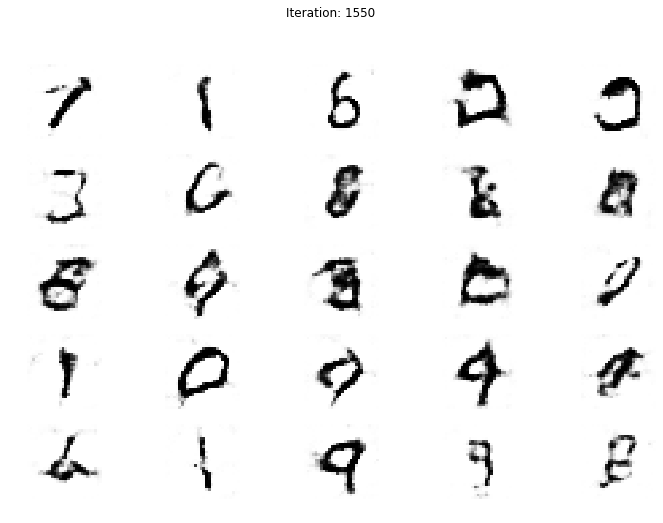

Iteration:  1551 [D loss: 0.68341, acc.:  58.98%] [G loss: 0.87458]
Iteration:  1552 [D loss: 0.70663, acc.:  53.91%] [G loss: 0.91333]
Iteration:  1553 [D loss: 0.70302, acc.:  53.12%] [G loss: 0.85220]
Iteration:  1554 [D loss: 0.74658, acc.:  47.27%] [G loss: 0.92508]
Iteration:  1555 [D loss: 0.71167, acc.:  54.69%] [G loss: 0.84847]
Iteration:  1556 [D loss: 0.70677, acc.:  53.91%] [G loss: 0.85618]
Iteration:  1557 [D loss: 0.70823, acc.:  54.69%] [G loss: 0.86898]
Iteration:  1558 [D loss: 0.76138, acc.:  48.05%] [G loss: 0.89678]
Iteration:  1559 [D loss: 0.71267, acc.:  51.56%] [G loss: 0.81401]
Iteration:  1560 [D loss: 0.76240, acc.:  46.88%] [G loss: 0.81982]
Iteration:  1561 [D loss: 0.69657, acc.:  52.73%] [G loss: 0.86801]
Iteration:  1562 [D loss: 0.70040, acc.:  57.03%] [G loss: 0.82676]
Iteration:  1563 [D loss: 0.71892, acc.:  53.52%] [G loss: 0.84157]
Iteration:  1564 [D loss: 0.71195, acc.:  55.08%] [G loss: 0.92072]
Iteration:  1565 [D loss: 0.74279, acc.:  47.66%

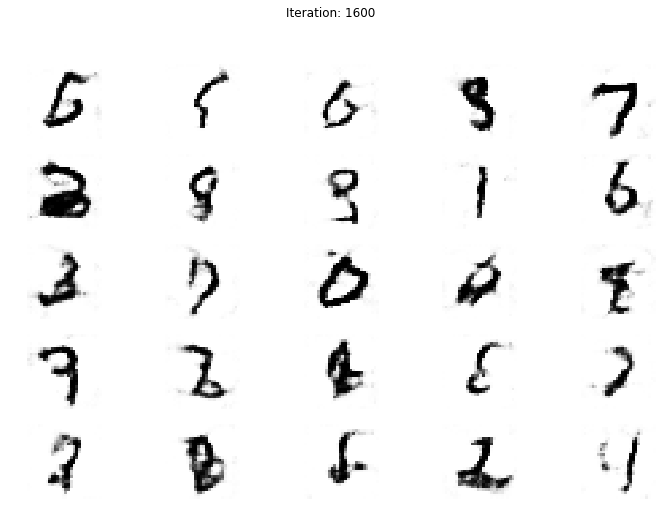

Iteration:  1601 [D loss: 0.69046, acc.:  57.42%] [G loss: 0.86787]
Iteration:  1602 [D loss: 0.71121, acc.:  51.95%] [G loss: 0.87928]
Iteration:  1603 [D loss: 0.69312, acc.:  54.30%] [G loss: 0.87077]
Iteration:  1604 [D loss: 0.70433, acc.:  53.12%] [G loss: 0.89528]
Iteration:  1605 [D loss: 0.70259, acc.:  55.47%] [G loss: 0.85646]
Iteration:  1606 [D loss: 0.72632, acc.:  51.56%] [G loss: 0.83555]
Iteration:  1607 [D loss: 0.72208, acc.:  48.83%] [G loss: 0.89949]
Iteration:  1608 [D loss: 0.68906, acc.:  56.25%] [G loss: 0.87521]
Iteration:  1609 [D loss: 0.72091, acc.:  51.95%] [G loss: 0.85287]
Iteration:  1610 [D loss: 0.68486, acc.:  55.86%] [G loss: 0.84444]
Iteration:  1611 [D loss: 0.71363, acc.:  53.52%] [G loss: 0.81357]
Iteration:  1612 [D loss: 0.71787, acc.:  52.73%] [G loss: 0.82021]
Iteration:  1613 [D loss: 0.70156, acc.:  55.08%] [G loss: 0.84925]
Iteration:  1614 [D loss: 0.70777, acc.:  51.95%] [G loss: 0.87653]
Iteration:  1615 [D loss: 0.71287, acc.:  51.95%

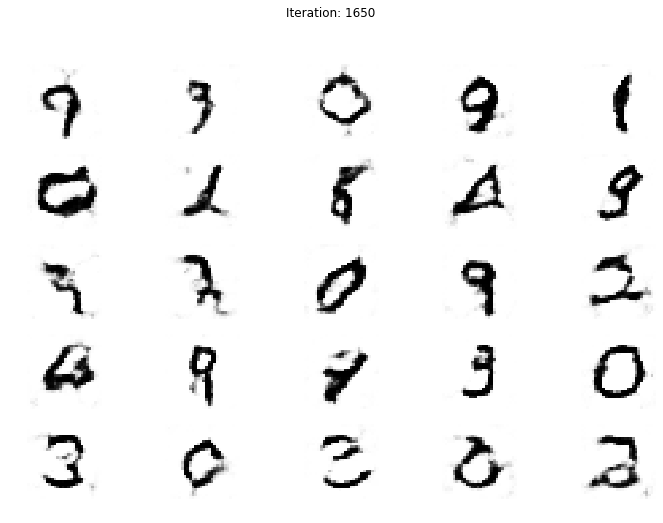

Iteration:  1651 [D loss: 0.74551, acc.:  52.34%] [G loss: 0.88742]
Iteration:  1652 [D loss: 0.74461, acc.:  47.27%] [G loss: 0.87323]
Iteration:  1653 [D loss: 0.68832, acc.:  55.47%] [G loss: 0.86294]
Iteration:  1654 [D loss: 0.72316, acc.:  50.00%] [G loss: 0.85777]
Iteration:  1655 [D loss: 0.69408, acc.:  55.08%] [G loss: 0.86102]
Iteration:  1656 [D loss: 0.69272, acc.:  53.91%] [G loss: 0.83565]
Iteration:  1657 [D loss: 0.71453, acc.:  52.73%] [G loss: 0.84834]
Iteration:  1658 [D loss: 0.70597, acc.:  53.12%] [G loss: 0.83457]
Iteration:  1659 [D loss: 0.68516, acc.:  54.69%] [G loss: 0.91067]
Iteration:  1660 [D loss: 0.65705, acc.:  58.59%] [G loss: 0.88948]
Iteration:  1661 [D loss: 0.71035, acc.:  54.69%] [G loss: 0.86026]
Iteration:  1662 [D loss: 0.73891, acc.:  51.56%] [G loss: 0.83834]
Iteration:  1663 [D loss: 0.69429, acc.:  55.08%] [G loss: 0.84877]
Iteration:  1664 [D loss: 0.71662, acc.:  52.34%] [G loss: 0.87197]
Iteration:  1665 [D loss: 0.73538, acc.:  50.39%

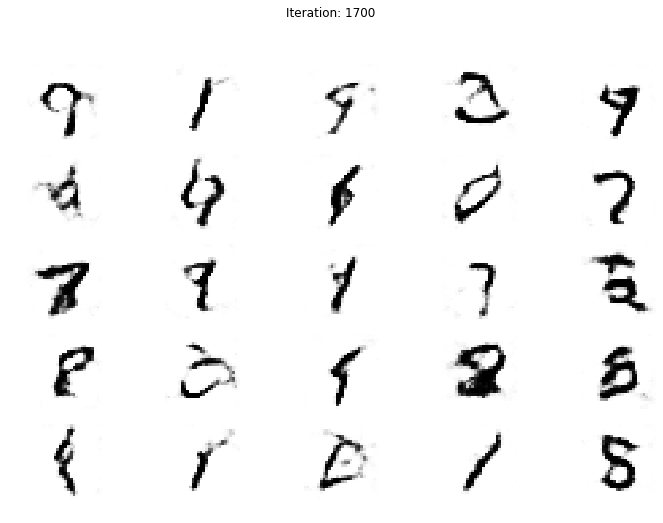

Iteration:  1701 [D loss: 0.70373, acc.:  57.81%] [G loss: 0.82285]
Iteration:  1702 [D loss: 0.66413, acc.:  61.72%] [G loss: 0.88577]
Iteration:  1703 [D loss: 0.69224, acc.:  57.81%] [G loss: 0.80260]
Iteration:  1704 [D loss: 0.70732, acc.:  54.69%] [G loss: 0.78208]
Iteration:  1705 [D loss: 0.68623, acc.:  56.64%] [G loss: 0.80217]
Iteration:  1706 [D loss: 0.74991, acc.:  50.00%] [G loss: 0.82974]
Iteration:  1707 [D loss: 0.71435, acc.:  50.78%] [G loss: 0.82024]
Iteration:  1708 [D loss: 0.71763, acc.:  53.52%] [G loss: 0.81475]
Iteration:  1709 [D loss: 0.72106, acc.:  53.52%] [G loss: 0.81777]
Iteration:  1710 [D loss: 0.71261, acc.:  48.83%] [G loss: 0.81239]
Iteration:  1711 [D loss: 0.70512, acc.:  53.52%] [G loss: 0.89699]
Iteration:  1712 [D loss: 0.69539, acc.:  57.81%] [G loss: 0.86793]
Iteration:  1713 [D loss: 0.70211, acc.:  54.69%] [G loss: 0.89191]
Iteration:  1714 [D loss: 0.69658, acc.:  55.86%] [G loss: 0.86455]
Iteration:  1715 [D loss: 0.71140, acc.:  55.47%

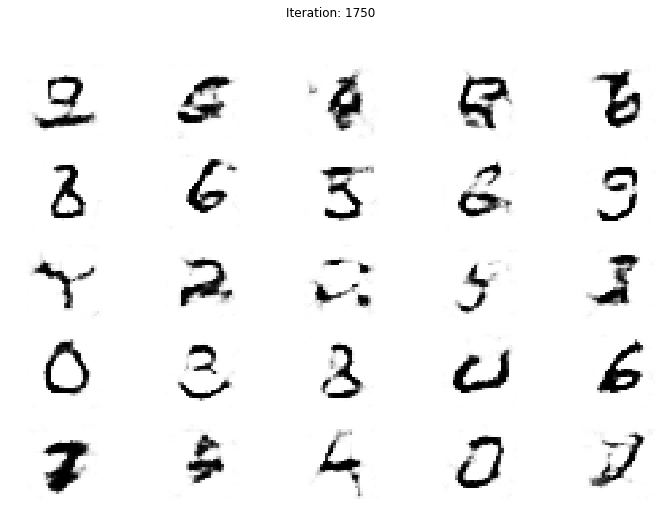

Iteration:  1751 [D loss: 0.68583, acc.:  52.73%] [G loss: 0.86281]
Iteration:  1752 [D loss: 0.70843, acc.:  54.69%] [G loss: 0.80708]
Iteration:  1753 [D loss: 0.70766, acc.:  53.91%] [G loss: 0.83491]
Iteration:  1754 [D loss: 0.67815, acc.:  61.33%] [G loss: 0.86056]
Iteration:  1755 [D loss: 0.66950, acc.:  58.20%] [G loss: 0.81678]
Iteration:  1756 [D loss: 0.67655, acc.:  56.25%] [G loss: 0.87072]
Iteration:  1757 [D loss: 0.70530, acc.:  50.39%] [G loss: 0.87394]
Iteration:  1758 [D loss: 0.67252, acc.:  57.42%] [G loss: 0.83082]
Iteration:  1759 [D loss: 0.69911, acc.:  53.52%] [G loss: 0.82439]
Iteration:  1760 [D loss: 0.69157, acc.:  60.16%] [G loss: 0.87070]
Iteration:  1761 [D loss: 0.68854, acc.:  53.12%] [G loss: 0.84644]
Iteration:  1762 [D loss: 0.71289, acc.:  52.34%] [G loss: 0.87883]
Iteration:  1763 [D loss: 0.72114, acc.:  51.56%] [G loss: 0.86541]
Iteration:  1764 [D loss: 0.74666, acc.:  46.09%] [G loss: 0.84466]
Iteration:  1765 [D loss: 0.72987, acc.:  51.95%

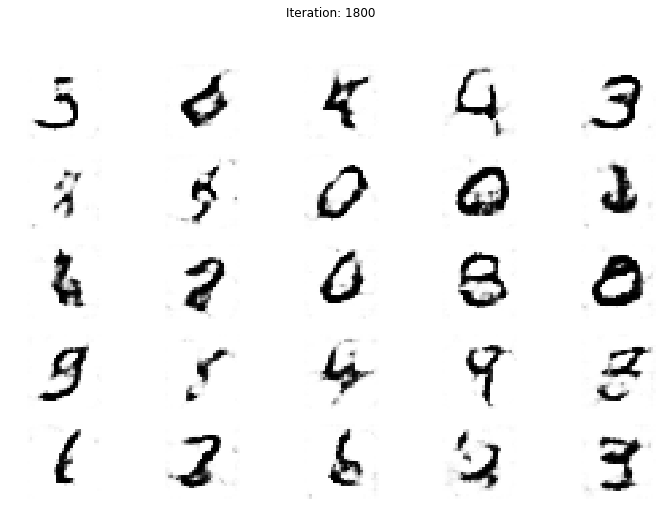

Iteration:  1801 [D loss: 0.66879, acc.:  62.50%] [G loss: 0.89129]
Iteration:  1802 [D loss: 0.74293, acc.:  52.73%] [G loss: 0.87358]
Iteration:  1803 [D loss: 0.70547, acc.:  57.03%] [G loss: 0.85625]
Iteration:  1804 [D loss: 0.66480, acc.:  62.11%] [G loss: 0.84273]
Iteration:  1805 [D loss: 0.70737, acc.:  55.47%] [G loss: 0.83078]
Iteration:  1806 [D loss: 0.67449, acc.:  58.59%] [G loss: 0.80485]
Iteration:  1807 [D loss: 0.70935, acc.:  53.12%] [G loss: 0.88433]
Iteration:  1808 [D loss: 0.68472, acc.:  57.03%] [G loss: 0.85776]
Iteration:  1809 [D loss: 0.70217, acc.:  53.52%] [G loss: 0.80550]
Iteration:  1810 [D loss: 0.69176, acc.:  52.34%] [G loss: 0.88773]
Iteration:  1811 [D loss: 0.70599, acc.:  53.12%] [G loss: 0.91360]
Iteration:  1812 [D loss: 0.70155, acc.:  54.69%] [G loss: 0.85668]
Iteration:  1813 [D loss: 0.71081, acc.:  54.69%] [G loss: 0.84502]
Iteration:  1814 [D loss: 0.72213, acc.:  50.39%] [G loss: 0.91196]
Iteration:  1815 [D loss: 0.70914, acc.:  48.44%

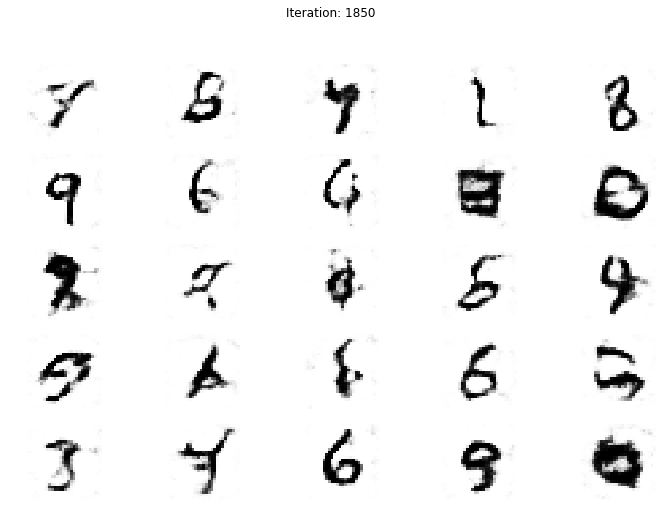

Iteration:  1851 [D loss: 0.70971, acc.:  55.86%] [G loss: 0.85175]
Iteration:  1852 [D loss: 0.71416, acc.:  47.66%] [G loss: 0.85316]
Iteration:  1853 [D loss: 0.72747, acc.:  45.31%] [G loss: 0.84399]
Iteration:  1854 [D loss: 0.68929, acc.:  58.98%] [G loss: 0.81095]
Iteration:  1855 [D loss: 0.73175, acc.:  48.83%] [G loss: 0.83615]
Iteration:  1856 [D loss: 0.69475, acc.:  57.03%] [G loss: 0.91569]
Iteration:  1857 [D loss: 0.72982, acc.:  52.34%] [G loss: 0.83510]
Iteration:  1858 [D loss: 0.69098, acc.:  56.25%] [G loss: 0.85637]
Iteration:  1859 [D loss: 0.70200, acc.:  54.30%] [G loss: 0.84521]
Iteration:  1860 [D loss: 0.71837, acc.:  50.39%] [G loss: 0.83811]
Iteration:  1861 [D loss: 0.73330, acc.:  49.61%] [G loss: 0.88523]
Iteration:  1862 [D loss: 0.67520, acc.:  59.38%] [G loss: 0.84352]
Iteration:  1863 [D loss: 0.72801, acc.:  52.73%] [G loss: 0.84536]
Iteration:  1864 [D loss: 0.70689, acc.:  52.73%] [G loss: 0.86086]
Iteration:  1865 [D loss: 0.68974, acc.:  58.20%

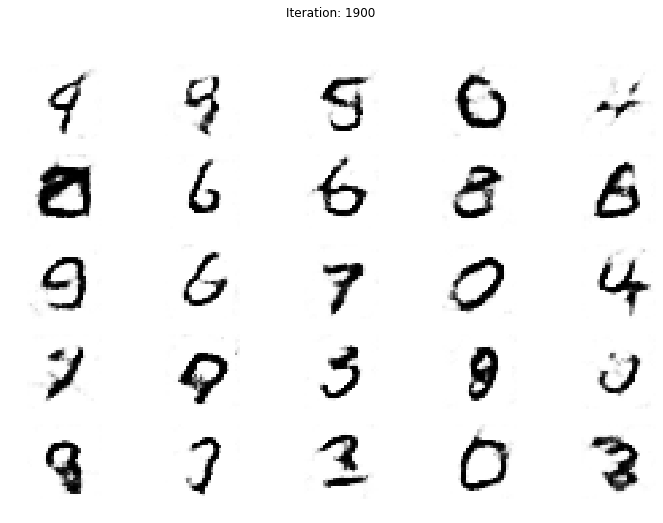

Iteration:  1901 [D loss: 0.69434, acc.:  53.12%] [G loss: 0.88126]
Iteration:  1902 [D loss: 0.72083, acc.:  48.05%] [G loss: 0.79201]
Iteration:  1903 [D loss: 0.71900, acc.:  47.27%] [G loss: 0.81548]
Iteration:  1904 [D loss: 0.72469, acc.:  47.27%] [G loss: 0.88579]
Iteration:  1905 [D loss: 0.69643, acc.:  57.81%] [G loss: 0.82216]
Iteration:  1906 [D loss: 0.70325, acc.:  55.08%] [G loss: 0.85000]
Iteration:  1907 [D loss: 0.69889, acc.:  55.08%] [G loss: 0.90620]
Iteration:  1908 [D loss: 0.73572, acc.:  47.66%] [G loss: 0.87530]
Iteration:  1909 [D loss: 0.69075, acc.:  51.56%] [G loss: 0.91187]
Iteration:  1910 [D loss: 0.72368, acc.:  52.34%] [G loss: 0.86125]
Iteration:  1911 [D loss: 0.72897, acc.:  50.00%] [G loss: 0.84572]
Iteration:  1912 [D loss: 0.70214, acc.:  54.30%] [G loss: 0.81743]
Iteration:  1913 [D loss: 0.67698, acc.:  56.25%] [G loss: 0.86869]
Iteration:  1914 [D loss: 0.71140, acc.:  51.56%] [G loss: 0.87057]
Iteration:  1915 [D loss: 0.71187, acc.:  55.86%

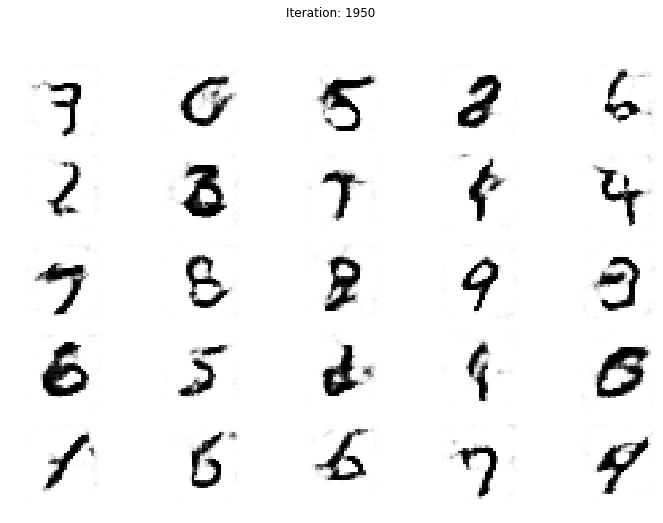

Iteration:  1951 [D loss: 0.75269, acc.:  44.14%] [G loss: 0.89234]
Iteration:  1952 [D loss: 0.67970, acc.:  55.08%] [G loss: 0.83562]
Iteration:  1953 [D loss: 0.71602, acc.:  55.86%] [G loss: 0.87805]
Iteration:  1954 [D loss: 0.69999, acc.:  53.91%] [G loss: 0.83055]
Iteration:  1955 [D loss: 0.68679, acc.:  57.03%] [G loss: 0.91271]
Iteration:  1956 [D loss: 0.73102, acc.:  52.34%] [G loss: 0.88911]
Iteration:  1957 [D loss: 0.72296, acc.:  48.83%] [G loss: 0.84119]
Iteration:  1958 [D loss: 0.71255, acc.:  53.52%] [G loss: 0.86039]
Iteration:  1959 [D loss: 0.70534, acc.:  56.64%] [G loss: 0.89109]
Iteration:  1960 [D loss: 0.67471, acc.:  55.47%] [G loss: 0.83324]
Iteration:  1961 [D loss: 0.74722, acc.:  48.05%] [G loss: 0.86839]
Iteration:  1962 [D loss: 0.72878, acc.:  51.95%] [G loss: 0.84825]
Iteration:  1963 [D loss: 0.70804, acc.:  54.69%] [G loss: 0.90382]
Iteration:  1964 [D loss: 0.71688, acc.:  50.39%] [G loss: 0.87765]
Iteration:  1965 [D loss: 0.68845, acc.:  57.42%

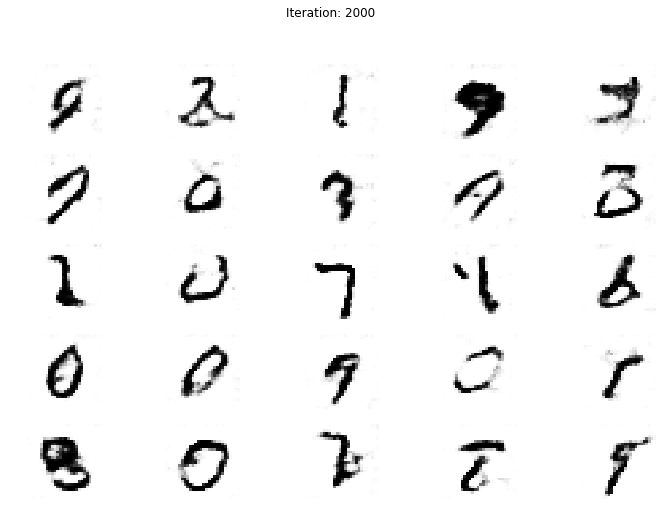

Iteration:  2001 [D loss: 0.72963, acc.:  51.56%] [G loss: 0.82164]
Iteration:  2002 [D loss: 0.69452, acc.:  58.20%] [G loss: 0.88770]
Iteration:  2003 [D loss: 0.69402, acc.:  55.08%] [G loss: 0.83215]
Iteration:  2004 [D loss: 0.70339, acc.:  53.91%] [G loss: 0.84007]
Iteration:  2005 [D loss: 0.68211, acc.:  54.30%] [G loss: 0.85662]
Iteration:  2006 [D loss: 0.71088, acc.:  51.56%] [G loss: 0.87048]
Iteration:  2007 [D loss: 0.68681, acc.:  58.20%] [G loss: 0.84372]
Iteration:  2008 [D loss: 0.68154, acc.:  57.42%] [G loss: 0.83482]
Iteration:  2009 [D loss: 0.70901, acc.:  52.73%] [G loss: 0.80637]
Iteration:  2010 [D loss: 0.69313, acc.:  55.47%] [G loss: 0.90884]
Iteration:  2011 [D loss: 0.70538, acc.:  55.47%] [G loss: 0.86232]
Iteration:  2012 [D loss: 0.70367, acc.:  50.78%] [G loss: 0.84911]
Iteration:  2013 [D loss: 0.72022, acc.:  49.22%] [G loss: 0.84941]
Iteration:  2014 [D loss: 0.69690, acc.:  52.73%] [G loss: 0.89767]
Iteration:  2015 [D loss: 0.71662, acc.:  50.78%

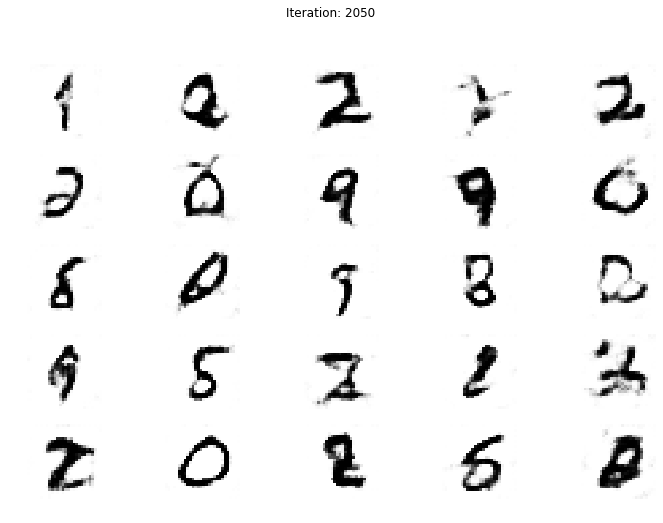

Iteration:  2051 [D loss: 0.70194, acc.:  54.69%] [G loss: 0.87201]
Iteration:  2052 [D loss: 0.70820, acc.:  51.95%] [G loss: 0.88945]
Iteration:  2053 [D loss: 0.67594, acc.:  58.98%] [G loss: 0.86397]
Iteration:  2054 [D loss: 0.71209, acc.:  49.22%] [G loss: 0.84524]
Iteration:  2055 [D loss: 0.70620, acc.:  53.91%] [G loss: 0.92048]
Iteration:  2056 [D loss: 0.70207, acc.:  53.12%] [G loss: 0.88528]
Iteration:  2057 [D loss: 0.68692, acc.:  57.81%] [G loss: 0.83492]
Iteration:  2058 [D loss: 0.71371, acc.:  53.12%] [G loss: 0.91454]
Iteration:  2059 [D loss: 0.71108, acc.:  53.91%] [G loss: 0.88073]
Iteration:  2060 [D loss: 0.68805, acc.:  53.52%] [G loss: 0.91839]
Iteration:  2061 [D loss: 0.67750, acc.:  53.91%] [G loss: 0.84875]
Iteration:  2062 [D loss: 0.72603, acc.:  49.22%] [G loss: 0.89306]
Iteration:  2063 [D loss: 0.69911, acc.:  52.34%] [G loss: 0.87538]
Iteration:  2064 [D loss: 0.72474, acc.:  48.05%] [G loss: 0.89677]
Iteration:  2065 [D loss: 0.66436, acc.:  62.11%

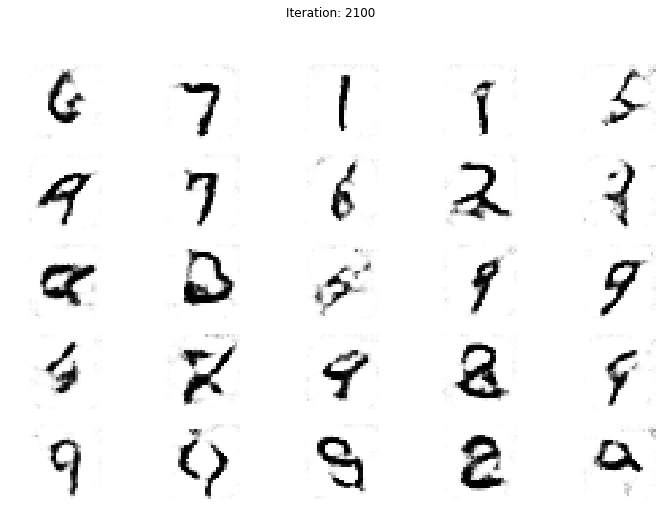

Iteration:  2101 [D loss: 0.72657, acc.:  54.30%] [G loss: 0.86378]
Iteration:  2102 [D loss: 0.72743, acc.:  47.66%] [G loss: 0.88837]
Iteration:  2103 [D loss: 0.70756, acc.:  52.73%] [G loss: 0.86438]
Iteration:  2104 [D loss: 0.71650, acc.:  49.22%] [G loss: 0.83456]
Iteration:  2105 [D loss: 0.70104, acc.:  52.73%] [G loss: 0.78183]
Iteration:  2106 [D loss: 0.72071, acc.:  51.17%] [G loss: 0.84003]
Iteration:  2107 [D loss: 0.69995, acc.:  55.08%] [G loss: 0.83346]
Iteration:  2108 [D loss: 0.71523, acc.:  48.05%] [G loss: 0.84835]
Iteration:  2109 [D loss: 0.72069, acc.:  50.39%] [G loss: 0.88261]
Iteration:  2110 [D loss: 0.72392, acc.:  53.12%] [G loss: 0.82948]
Iteration:  2111 [D loss: 0.71037, acc.:  55.47%] [G loss: 0.84088]
Iteration:  2112 [D loss: 0.72373, acc.:  50.39%] [G loss: 0.86067]
Iteration:  2113 [D loss: 0.69238, acc.:  56.64%] [G loss: 0.87451]
Iteration:  2114 [D loss: 0.72724, acc.:  43.36%] [G loss: 0.84384]
Iteration:  2115 [D loss: 0.71525, acc.:  55.47%

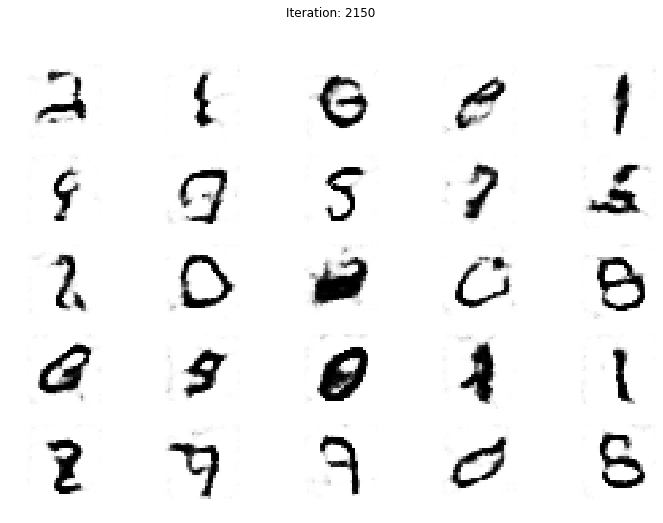

Iteration:  2151 [D loss: 0.71542, acc.:  50.78%] [G loss: 0.90293]
Iteration:  2152 [D loss: 0.73137, acc.:  50.00%] [G loss: 0.86503]
Iteration:  2153 [D loss: 0.71986, acc.:  48.44%] [G loss: 0.90627]
Iteration:  2154 [D loss: 0.64702, acc.:  62.11%] [G loss: 0.85976]
Iteration:  2155 [D loss: 0.69931, acc.:  55.47%] [G loss: 0.81581]
Iteration:  2156 [D loss: 0.68448, acc.:  55.47%] [G loss: 0.82083]
Iteration:  2157 [D loss: 0.66256, acc.:  65.62%] [G loss: 0.83937]
Iteration:  2158 [D loss: 0.69911, acc.:  53.91%] [G loss: 0.83151]
Iteration:  2159 [D loss: 0.71792, acc.:  52.34%] [G loss: 0.82088]
Iteration:  2160 [D loss: 0.69859, acc.:  55.86%] [G loss: 0.85326]
Iteration:  2161 [D loss: 0.69903, acc.:  55.86%] [G loss: 0.89269]
Iteration:  2162 [D loss: 0.71429, acc.:  50.78%] [G loss: 0.92218]
Iteration:  2163 [D loss: 0.72269, acc.:  49.61%] [G loss: 0.85583]
Iteration:  2164 [D loss: 0.70990, acc.:  52.34%] [G loss: 0.86191]
Iteration:  2165 [D loss: 0.72685, acc.:  48.05%

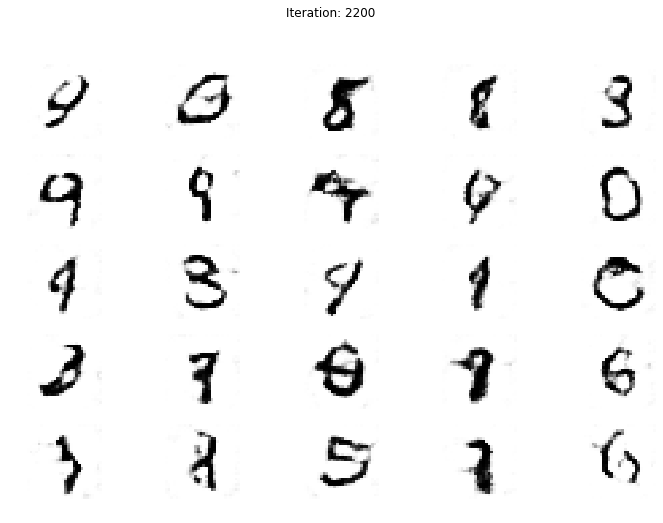

Iteration:  2201 [D loss: 0.71758, acc.:  50.00%] [G loss: 0.85868]
Iteration:  2202 [D loss: 0.70798, acc.:  51.17%] [G loss: 0.84995]
Iteration:  2203 [D loss: 0.71724, acc.:  53.91%] [G loss: 0.82434]
Iteration:  2204 [D loss: 0.72211, acc.:  50.00%] [G loss: 0.88010]
Iteration:  2205 [D loss: 0.69831, acc.:  52.73%] [G loss: 0.81109]
Iteration:  2206 [D loss: 0.70507, acc.:  51.95%] [G loss: 0.86767]
Iteration:  2207 [D loss: 0.72457, acc.:  52.73%] [G loss: 0.84795]
Iteration:  2208 [D loss: 0.69652, acc.:  60.55%] [G loss: 0.87062]
Iteration:  2209 [D loss: 0.71493, acc.:  52.73%] [G loss: 0.84067]
Iteration:  2210 [D loss: 0.70562, acc.:  54.69%] [G loss: 0.85667]
Iteration:  2211 [D loss: 0.69879, acc.:  57.03%] [G loss: 0.85762]
Iteration:  2212 [D loss: 0.71724, acc.:  52.34%] [G loss: 0.85798]
Iteration:  2213 [D loss: 0.72043, acc.:  52.73%] [G loss: 0.87810]
Iteration:  2214 [D loss: 0.68685, acc.:  51.95%] [G loss: 0.87801]
Iteration:  2215 [D loss: 0.69776, acc.:  55.08%

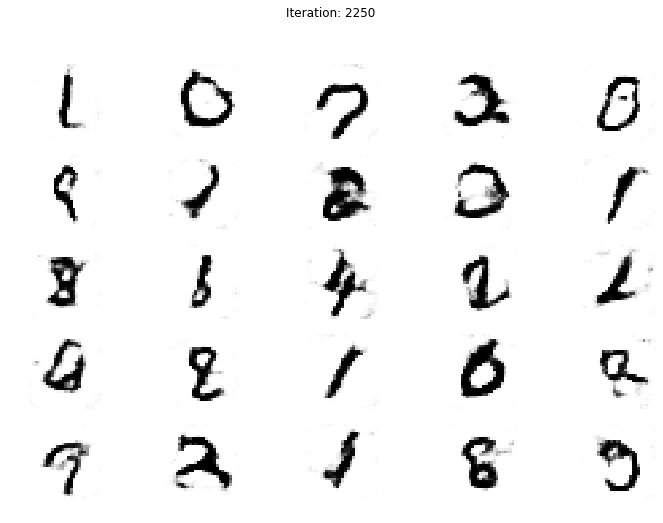

Iteration:  2251 [D loss: 0.70875, acc.:  52.73%] [G loss: 0.88800]
Iteration:  2252 [D loss: 0.69684, acc.:  55.08%] [G loss: 0.85882]
Iteration:  2253 [D loss: 0.70381, acc.:  54.30%] [G loss: 0.86086]
Iteration:  2254 [D loss: 0.69268, acc.:  53.91%] [G loss: 0.84989]
Iteration:  2255 [D loss: 0.72363, acc.:  51.95%] [G loss: 0.86448]
Iteration:  2256 [D loss: 0.67896, acc.:  58.59%] [G loss: 0.84863]
Iteration:  2257 [D loss: 0.69830, acc.:  50.00%] [G loss: 0.88397]
Iteration:  2258 [D loss: 0.72364, acc.:  50.00%] [G loss: 0.81807]
Iteration:  2259 [D loss: 0.68055, acc.:  57.42%] [G loss: 0.86038]
Iteration:  2260 [D loss: 0.72351, acc.:  48.05%] [G loss: 0.88819]
Iteration:  2261 [D loss: 0.69329, acc.:  55.08%] [G loss: 0.84938]
Iteration:  2262 [D loss: 0.70630, acc.:  53.12%] [G loss: 0.82769]
Iteration:  2263 [D loss: 0.71318, acc.:  53.52%] [G loss: 0.86395]
Iteration:  2264 [D loss: 0.68671, acc.:  52.73%] [G loss: 0.84034]
Iteration:  2265 [D loss: 0.70306, acc.:  53.52%

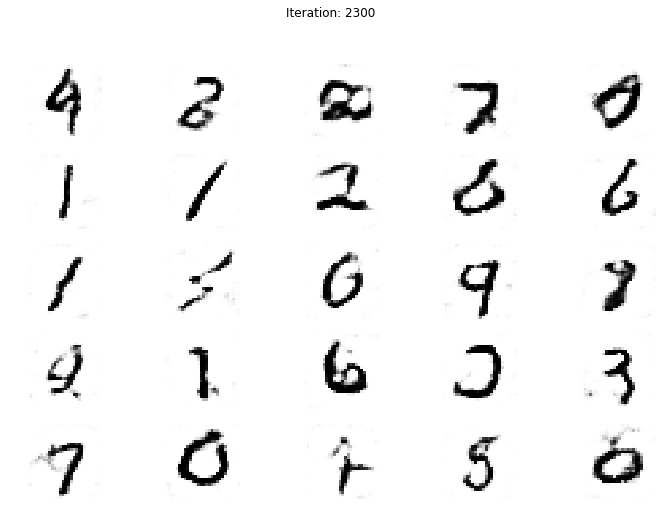

Iteration:  2301 [D loss: 0.66969, acc.:  62.50%] [G loss: 0.88128]
Iteration:  2302 [D loss: 0.67465, acc.:  59.77%] [G loss: 0.93899]
Iteration:  2303 [D loss: 0.66533, acc.:  59.38%] [G loss: 0.84259]
Iteration:  2304 [D loss: 0.69210, acc.:  56.25%] [G loss: 0.85703]
Iteration:  2305 [D loss: 0.71218, acc.:  54.30%] [G loss: 0.84131]
Iteration:  2306 [D loss: 0.66726, acc.:  60.16%] [G loss: 0.87496]
Iteration:  2307 [D loss: 0.70977, acc.:  52.73%] [G loss: 0.80644]
Iteration:  2308 [D loss: 0.71595, acc.:  55.86%] [G loss: 0.86857]
Iteration:  2309 [D loss: 0.70616, acc.:  51.56%] [G loss: 0.83215]
Iteration:  2310 [D loss: 0.69229, acc.:  54.69%] [G loss: 0.89571]
Iteration:  2311 [D loss: 0.71155, acc.:  53.52%] [G loss: 0.82121]
Iteration:  2312 [D loss: 0.70997, acc.:  52.73%] [G loss: 0.83057]
Iteration:  2313 [D loss: 0.69577, acc.:  56.64%] [G loss: 0.88313]
Iteration:  2314 [D loss: 0.69679, acc.:  51.17%] [G loss: 0.86543]
Iteration:  2315 [D loss: 0.72839, acc.:  50.39%

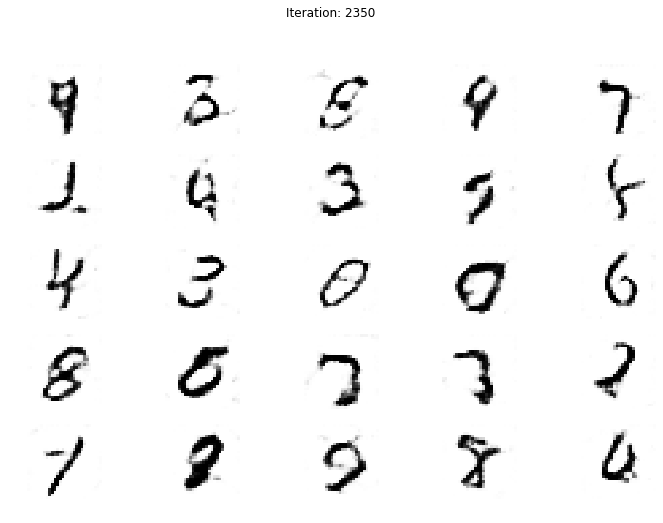

Iteration:  2351 [D loss: 0.71651, acc.:  53.52%] [G loss: 0.83468]
Iteration:  2352 [D loss: 0.70553, acc.:  51.56%] [G loss: 0.86056]
Iteration:  2353 [D loss: 0.67180, acc.:  56.64%] [G loss: 0.82584]
Iteration:  2354 [D loss: 0.69902, acc.:  53.52%] [G loss: 0.84589]
Iteration:  2355 [D loss: 0.72286, acc.:  50.00%] [G loss: 0.87194]
Iteration:  2356 [D loss: 0.71767, acc.:  54.30%] [G loss: 0.90849]
Iteration:  2357 [D loss: 0.70374, acc.:  52.73%] [G loss: 0.85207]
Iteration:  2358 [D loss: 0.71841, acc.:  52.34%] [G loss: 0.87464]
Iteration:  2359 [D loss: 0.68660, acc.:  55.86%] [G loss: 0.84621]
Iteration:  2360 [D loss: 0.67950, acc.:  56.64%] [G loss: 0.88888]
Iteration:  2361 [D loss: 0.70187, acc.:  52.73%] [G loss: 0.84667]
Iteration:  2362 [D loss: 0.70161, acc.:  55.86%] [G loss: 0.85048]
Iteration:  2363 [D loss: 0.71783, acc.:  52.34%] [G loss: 0.85261]
Iteration:  2364 [D loss: 0.71237, acc.:  52.73%] [G loss: 0.86215]
Iteration:  2365 [D loss: 0.65333, acc.:  64.84%

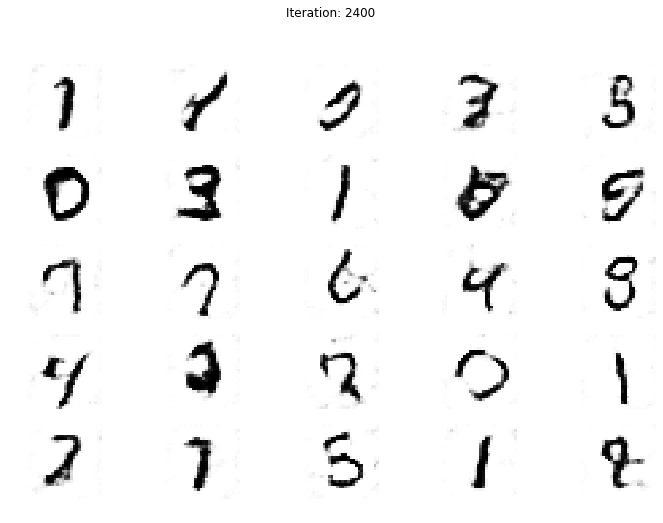

Iteration:  2401 [D loss: 0.70386, acc.:  54.69%] [G loss: 0.85719]
Iteration:  2402 [D loss: 0.72177, acc.:  49.61%] [G loss: 0.85797]
Iteration:  2403 [D loss: 0.64273, acc.:  61.72%] [G loss: 0.83905]
Iteration:  2404 [D loss: 0.69597, acc.:  55.08%] [G loss: 0.89318]
Iteration:  2405 [D loss: 0.70896, acc.:  53.91%] [G loss: 0.82796]
Iteration:  2406 [D loss: 0.71774, acc.:  52.34%] [G loss: 0.87114]
Iteration:  2407 [D loss: 0.70209, acc.:  57.03%] [G loss: 0.88434]
Iteration:  2408 [D loss: 0.70127, acc.:  55.08%] [G loss: 0.84760]
Iteration:  2409 [D loss: 0.69489, acc.:  59.77%] [G loss: 0.78193]
Iteration:  2410 [D loss: 0.75019, acc.:  46.09%] [G loss: 0.83812]
Iteration:  2411 [D loss: 0.68867, acc.:  55.47%] [G loss: 0.83881]
Iteration:  2412 [D loss: 0.71322, acc.:  52.73%] [G loss: 0.83794]
Iteration:  2413 [D loss: 0.71154, acc.:  50.78%] [G loss: 0.84450]
Iteration:  2414 [D loss: 0.69760, acc.:  51.17%] [G loss: 0.86133]
Iteration:  2415 [D loss: 0.67751, acc.:  56.25%

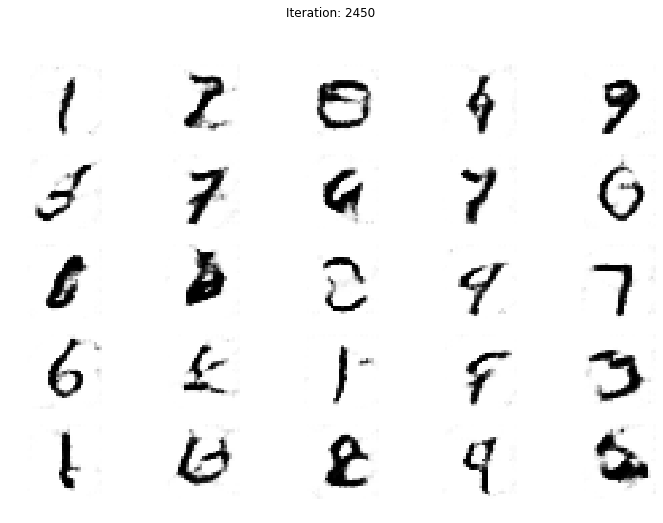

Iteration:  2451 [D loss: 0.69199, acc.:  58.59%] [G loss: 0.85349]
Iteration:  2452 [D loss: 0.68946, acc.:  53.12%] [G loss: 0.85636]
Iteration:  2453 [D loss: 0.68048, acc.:  56.25%] [G loss: 0.88727]
Iteration:  2454 [D loss: 0.72475, acc.:  50.00%] [G loss: 0.88766]
Iteration:  2455 [D loss: 0.68762, acc.:  53.91%] [G loss: 0.86109]
Iteration:  2456 [D loss: 0.72997, acc.:  50.00%] [G loss: 0.87637]
Iteration:  2457 [D loss: 0.66042, acc.:  61.72%] [G loss: 0.82376]
Iteration:  2458 [D loss: 0.71812, acc.:  50.78%] [G loss: 0.85183]
Iteration:  2459 [D loss: 0.71636, acc.:  53.52%] [G loss: 0.86790]
Iteration:  2460 [D loss: 0.68517, acc.:  54.30%] [G loss: 0.89684]
Iteration:  2461 [D loss: 0.70085, acc.:  54.69%] [G loss: 0.87934]
Iteration:  2462 [D loss: 0.72389, acc.:  51.95%] [G loss: 0.83789]
Iteration:  2463 [D loss: 0.72580, acc.:  51.56%] [G loss: 0.81790]
Iteration:  2464 [D loss: 0.73169, acc.:  50.78%] [G loss: 0.82470]
Iteration:  2465 [D loss: 0.73928, acc.:  47.27%

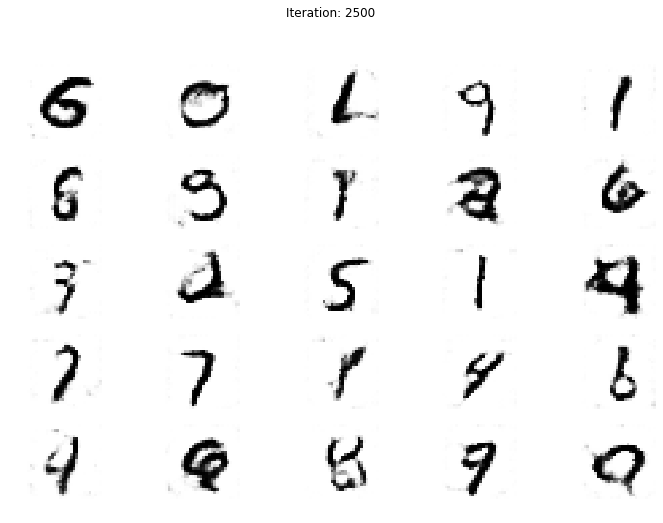

Iteration:  2501 [D loss: 0.69008, acc.:  55.86%] [G loss: 0.88612]
Iteration:  2502 [D loss: 0.72093, acc.:  48.44%] [G loss: 0.83525]
Iteration:  2503 [D loss: 0.70133, acc.:  54.69%] [G loss: 0.89298]
Iteration:  2504 [D loss: 0.69800, acc.:  57.42%] [G loss: 0.87083]
Iteration:  2505 [D loss: 0.70331, acc.:  57.42%] [G loss: 0.82170]
Iteration:  2506 [D loss: 0.69893, acc.:  51.17%] [G loss: 0.84261]
Iteration:  2507 [D loss: 0.74108, acc.:  47.66%] [G loss: 0.82228]
Iteration:  2508 [D loss: 0.71978, acc.:  48.83%] [G loss: 0.83567]
Iteration:  2509 [D loss: 0.69436, acc.:  54.30%] [G loss: 0.83336]
Iteration:  2510 [D loss: 0.74668, acc.:  47.27%] [G loss: 0.85014]
Iteration:  2511 [D loss: 0.67446, acc.:  57.42%] [G loss: 0.86076]
Iteration:  2512 [D loss: 0.69933, acc.:  50.78%] [G loss: 0.84840]
Iteration:  2513 [D loss: 0.70790, acc.:  52.34%] [G loss: 0.84109]
Iteration:  2514 [D loss: 0.69957, acc.:  55.86%] [G loss: 0.88101]
Iteration:  2515 [D loss: 0.68791, acc.:  56.64%

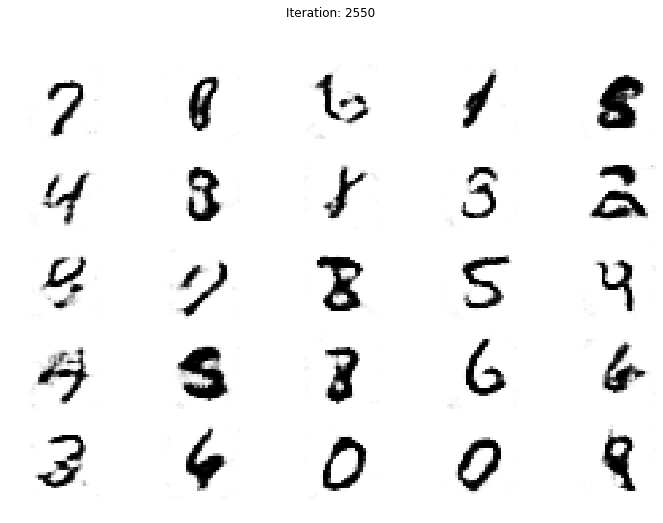

Iteration:  2551 [D loss: 0.70221, acc.:  50.78%] [G loss: 0.84280]
Iteration:  2552 [D loss: 0.70693, acc.:  50.78%] [G loss: 0.86415]
Iteration:  2553 [D loss: 0.67174, acc.:  51.95%] [G loss: 0.84594]
Iteration:  2554 [D loss: 0.71665, acc.:  51.17%] [G loss: 0.81738]
Iteration:  2555 [D loss: 0.72254, acc.:  50.78%] [G loss: 0.83509]
Iteration:  2556 [D loss: 0.68975, acc.:  53.52%] [G loss: 0.86361]
Iteration:  2557 [D loss: 0.71067, acc.:  51.17%] [G loss: 0.86265]
Iteration:  2558 [D loss: 0.77605, acc.:  42.19%] [G loss: 0.82890]
Iteration:  2559 [D loss: 0.72589, acc.:  47.66%] [G loss: 0.82696]
Iteration:  2560 [D loss: 0.70708, acc.:  52.34%] [G loss: 0.86275]
Iteration:  2561 [D loss: 0.70321, acc.:  53.12%] [G loss: 0.84508]
Iteration:  2562 [D loss: 0.68843, acc.:  59.77%] [G loss: 0.86157]
Iteration:  2563 [D loss: 0.70157, acc.:  56.64%] [G loss: 0.79002]
Iteration:  2564 [D loss: 0.68299, acc.:  57.42%] [G loss: 0.82330]
Iteration:  2565 [D loss: 0.71809, acc.:  50.00%

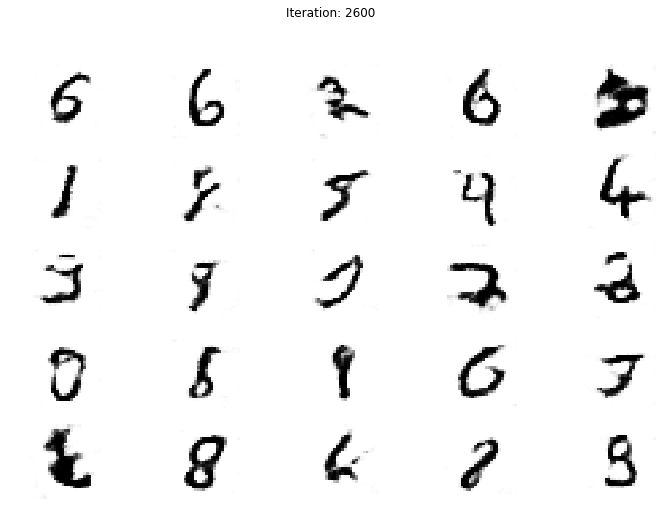

Iteration:  2601 [D loss: 0.70254, acc.:  53.12%] [G loss: 0.84121]
Iteration:  2602 [D loss: 0.68496, acc.:  55.86%] [G loss: 0.86112]
Iteration:  2603 [D loss: 0.67219, acc.:  58.98%] [G loss: 0.83902]
Iteration:  2604 [D loss: 0.70058, acc.:  54.30%] [G loss: 0.87151]
Iteration:  2605 [D loss: 0.67560, acc.:  60.16%] [G loss: 0.87515]
Iteration:  2606 [D loss: 0.70222, acc.:  50.78%] [G loss: 0.90653]
Iteration:  2607 [D loss: 0.69866, acc.:  54.69%] [G loss: 0.83275]
Iteration:  2608 [D loss: 0.70245, acc.:  51.56%] [G loss: 0.86824]
Iteration:  2609 [D loss: 0.71099, acc.:  54.30%] [G loss: 0.89071]
Iteration:  2610 [D loss: 0.66311, acc.:  60.55%] [G loss: 0.80328]
Iteration:  2611 [D loss: 0.72114, acc.:  51.56%] [G loss: 0.85733]
Iteration:  2612 [D loss: 0.68826, acc.:  60.16%] [G loss: 0.87433]
Iteration:  2613 [D loss: 0.68350, acc.:  59.77%] [G loss: 0.80236]
Iteration:  2614 [D loss: 0.68182, acc.:  57.03%] [G loss: 0.79079]
Iteration:  2615 [D loss: 0.69470, acc.:  54.69%

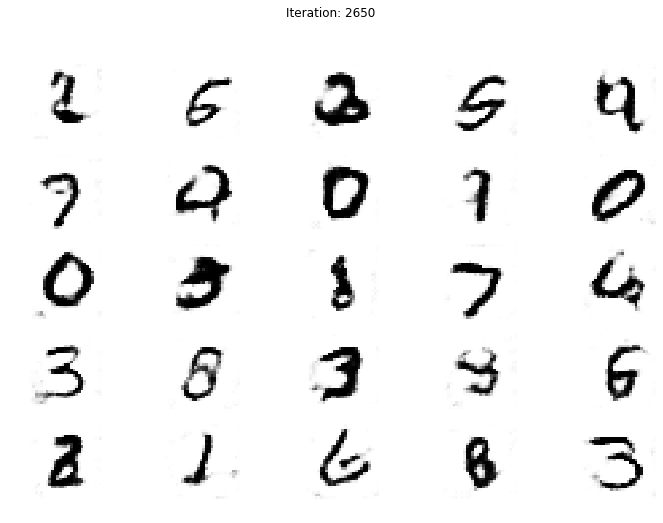

Iteration:  2651 [D loss: 0.70742, acc.:  55.08%] [G loss: 0.84271]
Iteration:  2652 [D loss: 0.71847, acc.:  50.39%] [G loss: 0.86590]
Iteration:  2653 [D loss: 0.67814, acc.:  59.77%] [G loss: 0.85634]
Iteration:  2654 [D loss: 0.70805, acc.:  51.56%] [G loss: 0.88658]
Iteration:  2655 [D loss: 0.71809, acc.:  54.69%] [G loss: 0.78922]
Iteration:  2656 [D loss: 0.70555, acc.:  53.91%] [G loss: 0.84496]
Iteration:  2657 [D loss: 0.71525, acc.:  51.56%] [G loss: 0.82088]
Iteration:  2658 [D loss: 0.67762, acc.:  58.20%] [G loss: 0.80231]
Iteration:  2659 [D loss: 0.67607, acc.:  60.16%] [G loss: 0.79477]
Iteration:  2660 [D loss: 0.70639, acc.:  51.95%] [G loss: 0.82749]
Iteration:  2661 [D loss: 0.73492, acc.:  47.66%] [G loss: 0.84745]
Iteration:  2662 [D loss: 0.70573, acc.:  52.34%] [G loss: 0.84744]
Iteration:  2663 [D loss: 0.72138, acc.:  48.44%] [G loss: 0.84093]
Iteration:  2664 [D loss: 0.68587, acc.:  55.47%] [G loss: 0.89038]
Iteration:  2665 [D loss: 0.68504, acc.:  58.20%

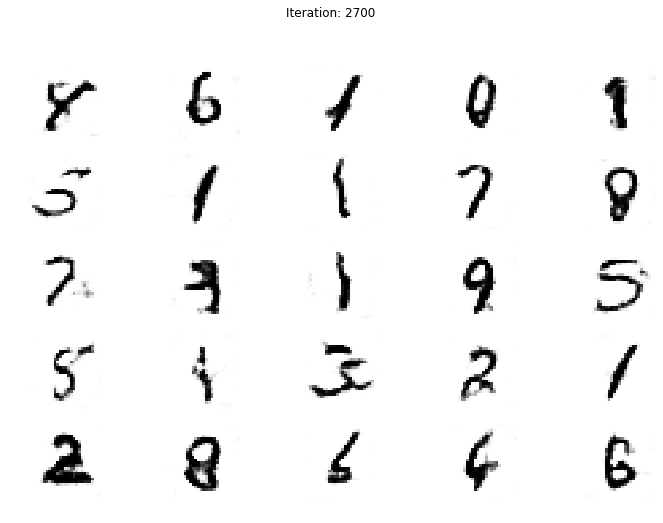

Iteration:  2701 [D loss: 0.69787, acc.:  54.30%] [G loss: 0.80146]
Iteration:  2702 [D loss: 0.70628, acc.:  51.56%] [G loss: 0.83926]
Iteration:  2703 [D loss: 0.71970, acc.:  51.56%] [G loss: 0.80357]
Iteration:  2704 [D loss: 0.68935, acc.:  53.91%] [G loss: 0.86383]
Iteration:  2705 [D loss: 0.72763, acc.:  47.66%] [G loss: 0.88543]
Iteration:  2706 [D loss: 0.74160, acc.:  47.27%] [G loss: 0.83842]
Iteration:  2707 [D loss: 0.70547, acc.:  51.56%] [G loss: 0.84809]
Iteration:  2708 [D loss: 0.71316, acc.:  51.17%] [G loss: 0.79446]
Iteration:  2709 [D loss: 0.70051, acc.:  52.34%] [G loss: 0.84340]
Iteration:  2710 [D loss: 0.67336, acc.:  58.20%] [G loss: 0.78164]
Iteration:  2711 [D loss: 0.69829, acc.:  50.39%] [G loss: 0.80433]
Iteration:  2712 [D loss: 0.68497, acc.:  52.73%] [G loss: 0.79691]
Iteration:  2713 [D loss: 0.72620, acc.:  49.22%] [G loss: 0.80807]
Iteration:  2714 [D loss: 0.68323, acc.:  58.59%] [G loss: 0.86919]
Iteration:  2715 [D loss: 0.71854, acc.:  50.78%

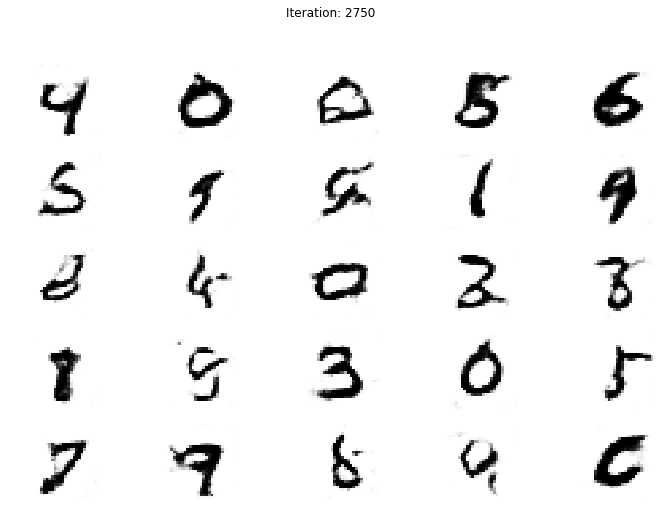

Iteration:  2751 [D loss: 0.71382, acc.:  51.17%] [G loss: 0.78884]
Iteration:  2752 [D loss: 0.71026, acc.:  51.17%] [G loss: 0.82960]
Iteration:  2753 [D loss: 0.68903, acc.:  56.25%] [G loss: 0.81010]
Iteration:  2754 [D loss: 0.71769, acc.:  55.08%] [G loss: 0.84668]
Iteration:  2755 [D loss: 0.74509, acc.:  45.70%] [G loss: 0.78303]
Iteration:  2756 [D loss: 0.72052, acc.:  52.34%] [G loss: 0.82133]
Iteration:  2757 [D loss: 0.70951, acc.:  50.00%] [G loss: 0.83248]
Iteration:  2758 [D loss: 0.72255, acc.:  51.95%] [G loss: 0.81612]
Iteration:  2759 [D loss: 0.72499, acc.:  52.73%] [G loss: 0.87332]
Iteration:  2760 [D loss: 0.72242, acc.:  50.78%] [G loss: 0.87796]
Iteration:  2761 [D loss: 0.69875, acc.:  55.08%] [G loss: 0.88435]
Iteration:  2762 [D loss: 0.71564, acc.:  53.52%] [G loss: 0.79812]
Iteration:  2763 [D loss: 0.72223, acc.:  50.39%] [G loss: 0.85211]
Iteration:  2764 [D loss: 0.68397, acc.:  56.25%] [G loss: 0.87162]
Iteration:  2765 [D loss: 0.74184, acc.:  46.09%

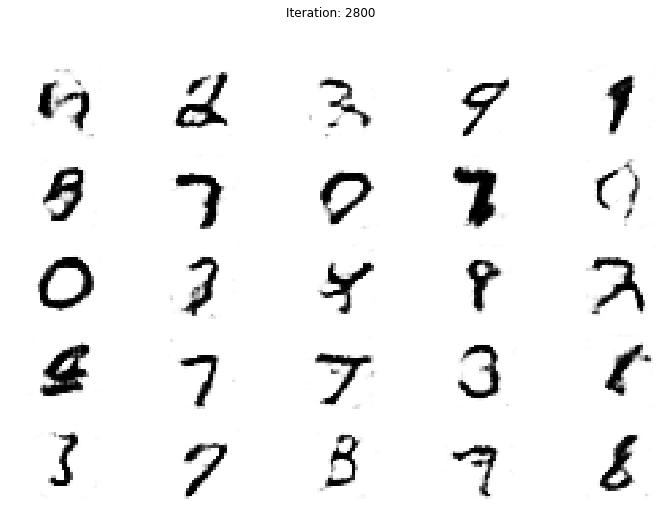

Iteration:  2801 [D loss: 0.73195, acc.:  47.66%] [G loss: 0.85123]
Iteration:  2802 [D loss: 0.70556, acc.:  55.86%] [G loss: 0.82390]
Iteration:  2803 [D loss: 0.69682, acc.:  53.91%] [G loss: 0.85872]
Iteration:  2804 [D loss: 0.69966, acc.:  51.56%] [G loss: 0.85932]
Iteration:  2805 [D loss: 0.72437, acc.:  48.83%] [G loss: 0.79337]
Iteration:  2806 [D loss: 0.70917, acc.:  53.12%] [G loss: 0.84402]
Iteration:  2807 [D loss: 0.71414, acc.:  53.91%] [G loss: 0.84590]
Iteration:  2808 [D loss: 0.73238, acc.:  45.31%] [G loss: 0.84734]
Iteration:  2809 [D loss: 0.69837, acc.:  55.86%] [G loss: 0.85524]
Iteration:  2810 [D loss: 0.68627, acc.:  55.86%] [G loss: 0.89256]
Iteration:  2811 [D loss: 0.72360, acc.:  49.61%] [G loss: 0.88193]
Iteration:  2812 [D loss: 0.67827, acc.:  60.16%] [G loss: 0.86750]
Iteration:  2813 [D loss: 0.71323, acc.:  49.61%] [G loss: 0.84341]
Iteration:  2814 [D loss: 0.70728, acc.:  53.91%] [G loss: 0.82488]
Iteration:  2815 [D loss: 0.71517, acc.:  47.66%

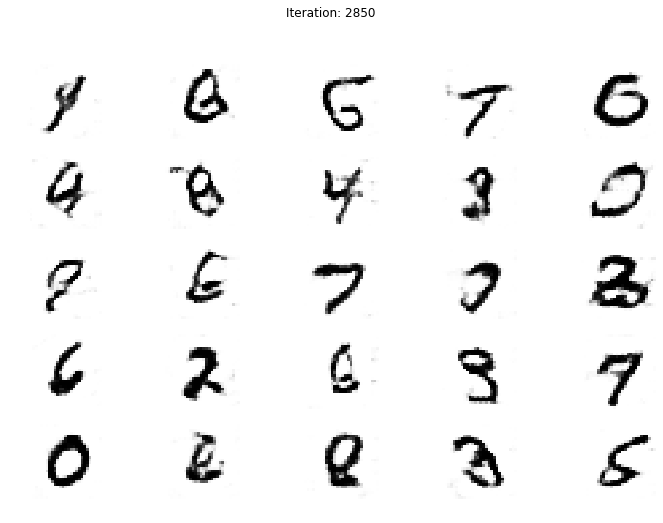

Iteration:  2851 [D loss: 0.71431, acc.:  50.78%] [G loss: 0.83302]
Iteration:  2852 [D loss: 0.68032, acc.:  58.20%] [G loss: 0.81909]
Iteration:  2853 [D loss: 0.73455, acc.:  50.00%] [G loss: 0.84276]
Iteration:  2854 [D loss: 0.70754, acc.:  50.78%] [G loss: 0.85105]
Iteration:  2855 [D loss: 0.71457, acc.:  51.17%] [G loss: 0.86755]
Iteration:  2856 [D loss: 0.70475, acc.:  55.08%] [G loss: 0.82938]
Iteration:  2857 [D loss: 0.73810, acc.:  44.14%] [G loss: 0.88977]
Iteration:  2858 [D loss: 0.69134, acc.:  50.00%] [G loss: 0.81952]
Iteration:  2859 [D loss: 0.72706, acc.:  50.39%] [G loss: 0.83578]
Iteration:  2860 [D loss: 0.73044, acc.:  47.27%] [G loss: 0.81247]
Iteration:  2861 [D loss: 0.68745, acc.:  56.64%] [G loss: 0.78311]
Iteration:  2862 [D loss: 0.70580, acc.:  53.12%] [G loss: 0.82805]
Iteration:  2863 [D loss: 0.70660, acc.:  50.39%] [G loss: 0.81935]
Iteration:  2864 [D loss: 0.71539, acc.:  51.17%] [G loss: 0.82374]
Iteration:  2865 [D loss: 0.68958, acc.:  56.64%

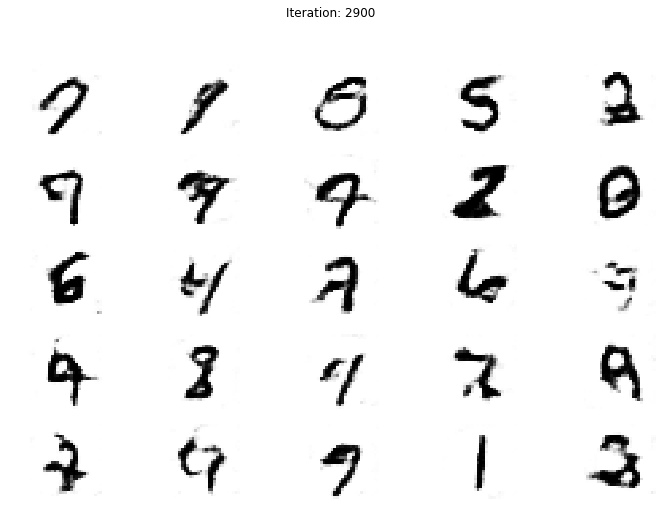

Iteration:  2901 [D loss: 0.71815, acc.:  50.39%] [G loss: 0.83561]
Iteration:  2902 [D loss: 0.71468, acc.:  53.12%] [G loss: 0.85167]
Iteration:  2903 [D loss: 0.69878, acc.:  52.34%] [G loss: 0.83473]
Iteration:  2904 [D loss: 0.74586, acc.:  48.05%] [G loss: 0.77835]
Iteration:  2905 [D loss: 0.70118, acc.:  53.91%] [G loss: 0.84630]
Iteration:  2906 [D loss: 0.69072, acc.:  55.86%] [G loss: 0.79102]
Iteration:  2907 [D loss: 0.68242, acc.:  57.42%] [G loss: 0.85760]
Iteration:  2908 [D loss: 0.73598, acc.:  48.83%] [G loss: 0.84519]
Iteration:  2909 [D loss: 0.73215, acc.:  46.48%] [G loss: 0.84030]
Iteration:  2910 [D loss: 0.72768, acc.:  47.66%] [G loss: 0.83393]
Iteration:  2911 [D loss: 0.70114, acc.:  54.30%] [G loss: 0.80453]
Iteration:  2912 [D loss: 0.70557, acc.:  51.56%] [G loss: 0.84568]
Iteration:  2913 [D loss: 0.71805, acc.:  53.12%] [G loss: 0.76877]
Iteration:  2914 [D loss: 0.71534, acc.:  47.27%] [G loss: 0.82556]
Iteration:  2915 [D loss: 0.76083, acc.:  42.58%

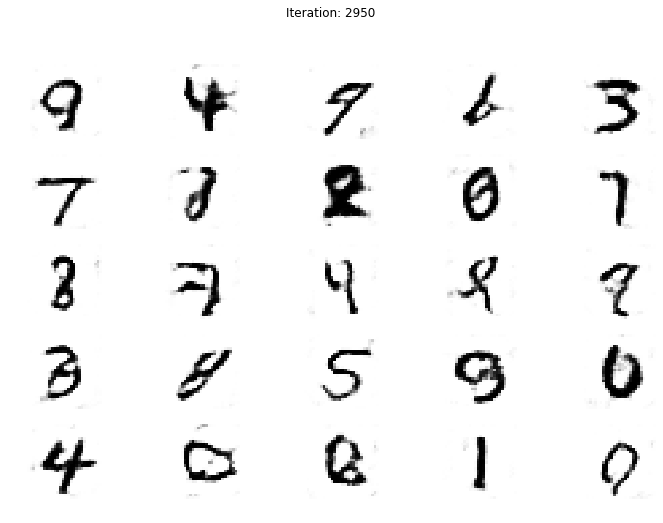

Iteration:  2951 [D loss: 0.70400, acc.:  53.12%] [G loss: 0.82359]
Iteration:  2952 [D loss: 0.69947, acc.:  51.17%] [G loss: 0.78626]
Iteration:  2953 [D loss: 0.69588, acc.:  48.44%] [G loss: 0.85542]
Iteration:  2954 [D loss: 0.72995, acc.:  48.44%] [G loss: 0.84449]
Iteration:  2955 [D loss: 0.71760, acc.:  51.95%] [G loss: 0.83488]
Iteration:  2956 [D loss: 0.73246, acc.:  48.83%] [G loss: 0.83793]
Iteration:  2957 [D loss: 0.70667, acc.:  51.56%] [G loss: 0.84583]
Iteration:  2958 [D loss: 0.74179, acc.:  47.27%] [G loss: 0.88744]
Iteration:  2959 [D loss: 0.69884, acc.:  53.91%] [G loss: 0.80949]
Iteration:  2960 [D loss: 0.73835, acc.:  47.27%] [G loss: 0.84678]
Iteration:  2961 [D loss: 0.70478, acc.:  54.69%] [G loss: 0.79180]
Iteration:  2962 [D loss: 0.70436, acc.:  54.30%] [G loss: 0.82652]
Iteration:  2963 [D loss: 0.67831, acc.:  57.81%] [G loss: 0.82843]
Iteration:  2964 [D loss: 0.72191, acc.:  50.78%] [G loss: 0.84037]
Iteration:  2965 [D loss: 0.71521, acc.:  53.12%

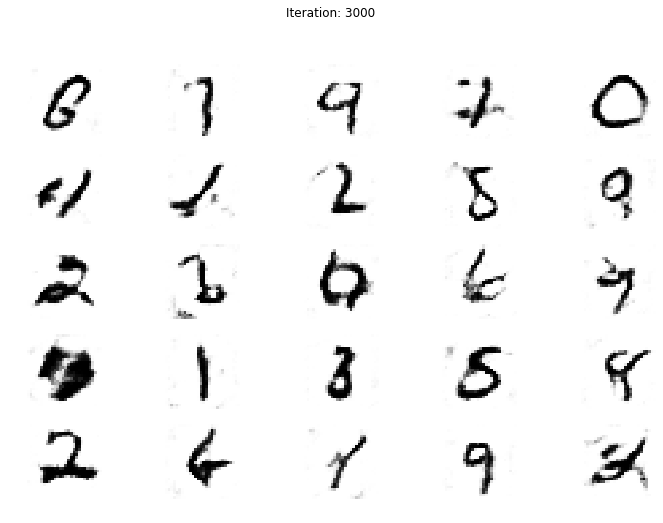

Iteration:  3001 [D loss: 0.72875, acc.:  47.27%] [G loss: 0.84465]
Iteration:  3002 [D loss: 0.71860, acc.:  50.00%] [G loss: 0.82380]
Iteration:  3003 [D loss: 0.72866, acc.:  49.61%] [G loss: 0.81508]
Iteration:  3004 [D loss: 0.71318, acc.:  52.73%] [G loss: 0.81086]
Iteration:  3005 [D loss: 0.72000, acc.:  52.34%] [G loss: 0.80515]
Iteration:  3006 [D loss: 0.68078, acc.:  57.81%] [G loss: 0.83980]
Iteration:  3007 [D loss: 0.69317, acc.:  53.52%] [G loss: 0.81751]
Iteration:  3008 [D loss: 0.71163, acc.:  54.69%] [G loss: 0.86331]
Iteration:  3009 [D loss: 0.68687, acc.:  54.69%] [G loss: 0.85044]
Iteration:  3010 [D loss: 0.66966, acc.:  57.42%] [G loss: 0.82805]
Iteration:  3011 [D loss: 0.72003, acc.:  53.91%] [G loss: 0.78617]
Iteration:  3012 [D loss: 0.72388, acc.:  48.83%] [G loss: 0.84415]
Iteration:  3013 [D loss: 0.71317, acc.:  51.95%] [G loss: 0.82903]
Iteration:  3014 [D loss: 0.71721, acc.:  51.56%] [G loss: 0.82020]
Iteration:  3015 [D loss: 0.71308, acc.:  48.44%

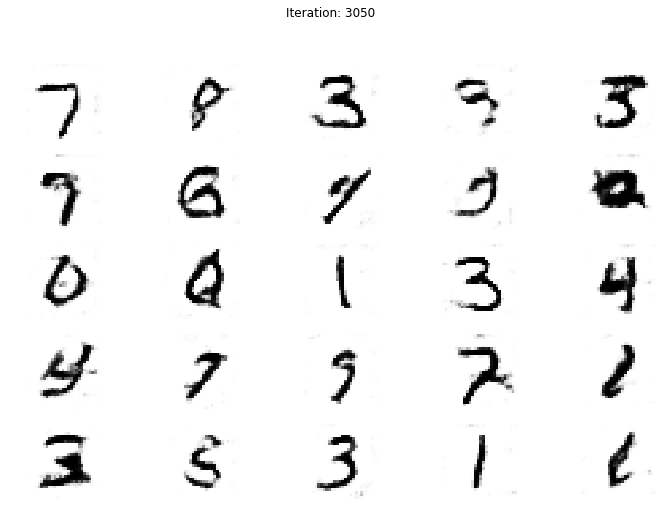

Iteration:  3051 [D loss: 0.71219, acc.:  51.17%] [G loss: 0.81444]
Iteration:  3052 [D loss: 0.72307, acc.:  45.70%] [G loss: 0.81121]
Iteration:  3053 [D loss: 0.70108, acc.:  48.44%] [G loss: 0.82657]
Iteration:  3054 [D loss: 0.73554, acc.:  45.70%] [G loss: 0.77872]
Iteration:  3055 [D loss: 0.69224, acc.:  55.86%] [G loss: 0.84073]
Iteration:  3056 [D loss: 0.74239, acc.:  45.31%] [G loss: 0.81510]
Iteration:  3057 [D loss: 0.69746, acc.:  53.91%] [G loss: 0.85250]
Iteration:  3058 [D loss: 0.71480, acc.:  55.08%] [G loss: 0.86117]
Iteration:  3059 [D loss: 0.74339, acc.:  46.09%] [G loss: 0.81177]
Iteration:  3060 [D loss: 0.72221, acc.:  50.78%] [G loss: 0.79691]
Iteration:  3061 [D loss: 0.73381, acc.:  47.66%] [G loss: 0.82417]
Iteration:  3062 [D loss: 0.66721, acc.:  59.77%] [G loss: 0.80382]
Iteration:  3063 [D loss: 0.73346, acc.:  46.88%] [G loss: 0.84428]
Iteration:  3064 [D loss: 0.70128, acc.:  51.56%] [G loss: 0.81616]
Iteration:  3065 [D loss: 0.71549, acc.:  49.61%

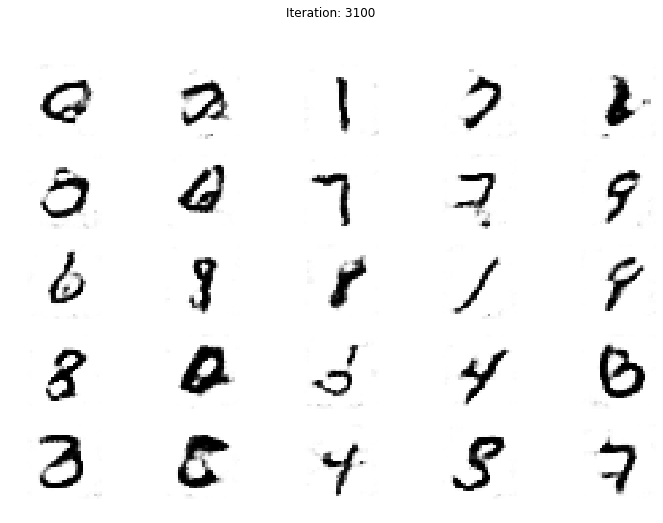

Iteration:  3101 [D loss: 0.73590, acc.:  47.27%] [G loss: 0.79032]
Iteration:  3102 [D loss: 0.69793, acc.:  51.95%] [G loss: 0.79597]
Iteration:  3103 [D loss: 0.71026, acc.:  52.34%] [G loss: 0.85921]
Iteration:  3104 [D loss: 0.70772, acc.:  51.56%] [G loss: 0.78992]
Iteration:  3105 [D loss: 0.69910, acc.:  50.00%] [G loss: 0.88749]
Iteration:  3106 [D loss: 0.72946, acc.:  48.05%] [G loss: 0.83334]
Iteration:  3107 [D loss: 0.72816, acc.:  45.70%] [G loss: 0.81630]
Iteration:  3108 [D loss: 0.72270, acc.:  51.56%] [G loss: 0.81406]
Iteration:  3109 [D loss: 0.73457, acc.:  44.14%] [G loss: 0.85674]
Iteration:  3110 [D loss: 0.71895, acc.:  53.91%] [G loss: 0.86749]
Iteration:  3111 [D loss: 0.73553, acc.:  48.44%] [G loss: 0.83577]
Iteration:  3112 [D loss: 0.70677, acc.:  52.34%] [G loss: 0.85592]
Iteration:  3113 [D loss: 0.70690, acc.:  54.69%] [G loss: 0.81891]
Iteration:  3114 [D loss: 0.69462, acc.:  55.47%] [G loss: 0.78936]
Iteration:  3115 [D loss: 0.70748, acc.:  51.56%

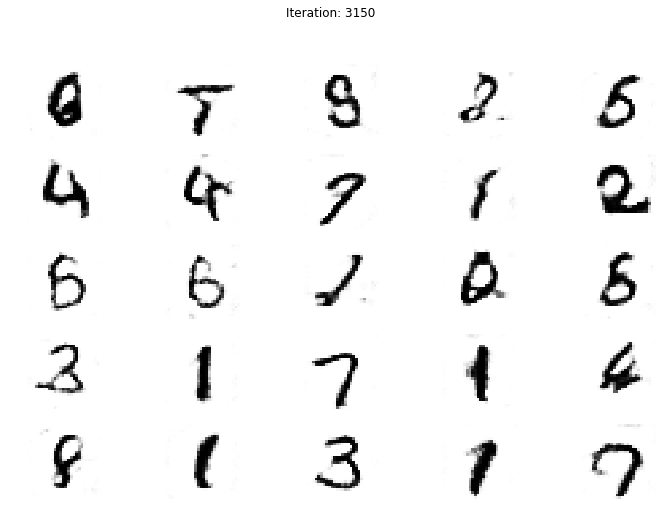

Iteration:  3151 [D loss: 0.68883, acc.:  56.25%] [G loss: 0.85152]
Iteration:  3152 [D loss: 0.70318, acc.:  53.12%] [G loss: 0.83578]
Iteration:  3153 [D loss: 0.70203, acc.:  53.52%] [G loss: 0.87107]
Iteration:  3154 [D loss: 0.66890, acc.:  57.81%] [G loss: 0.80050]
Iteration:  3155 [D loss: 0.74792, acc.:  47.27%] [G loss: 0.82689]
Iteration:  3156 [D loss: 0.68657, acc.:  54.69%] [G loss: 0.79553]
Iteration:  3157 [D loss: 0.73159, acc.:  51.56%] [G loss: 0.82620]
Iteration:  3158 [D loss: 0.70409, acc.:  51.17%] [G loss: 0.82751]
Iteration:  3159 [D loss: 0.72000, acc.:  51.95%] [G loss: 0.81906]
Iteration:  3160 [D loss: 0.70370, acc.:  54.30%] [G loss: 0.78077]
Iteration:  3161 [D loss: 0.70790, acc.:  53.12%] [G loss: 0.80816]
Iteration:  3162 [D loss: 0.71717, acc.:  54.30%] [G loss: 0.80884]
Iteration:  3163 [D loss: 0.69051, acc.:  54.30%] [G loss: 0.87419]
Iteration:  3164 [D loss: 0.70280, acc.:  53.91%] [G loss: 0.79629]
Iteration:  3165 [D loss: 0.69851, acc.:  51.95%

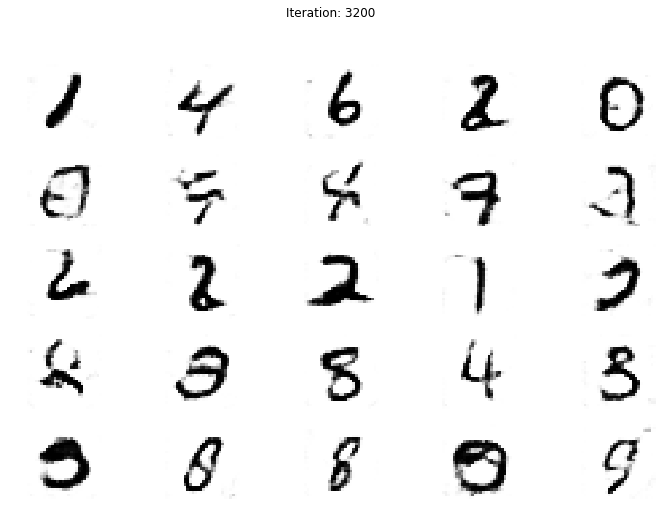

Iteration:  3201 [D loss: 0.71151, acc.:  53.12%] [G loss: 0.81988]
Iteration:  3202 [D loss: 0.68949, acc.:  55.47%] [G loss: 0.82470]
Iteration:  3203 [D loss: 0.69685, acc.:  52.73%] [G loss: 0.81563]
Iteration:  3204 [D loss: 0.68166, acc.:  58.20%] [G loss: 0.84452]
Iteration:  3205 [D loss: 0.69996, acc.:  57.42%] [G loss: 0.78963]
Iteration:  3206 [D loss: 0.72820, acc.:  48.83%] [G loss: 0.79469]
Iteration:  3207 [D loss: 0.67166, acc.:  58.20%] [G loss: 0.84571]
Iteration:  3208 [D loss: 0.69848, acc.:  57.03%] [G loss: 0.85879]
Iteration:  3209 [D loss: 0.72051, acc.:  49.22%] [G loss: 0.81348]
Iteration:  3210 [D loss: 0.70285, acc.:  52.73%] [G loss: 0.79213]
Iteration:  3211 [D loss: 0.70696, acc.:  53.91%] [G loss: 0.81677]
Iteration:  3212 [D loss: 0.70357, acc.:  50.39%] [G loss: 0.78901]
Iteration:  3213 [D loss: 0.71602, acc.:  53.91%] [G loss: 0.82701]
Iteration:  3214 [D loss: 0.75647, acc.:  44.14%] [G loss: 0.81111]
Iteration:  3215 [D loss: 0.70638, acc.:  54.30%

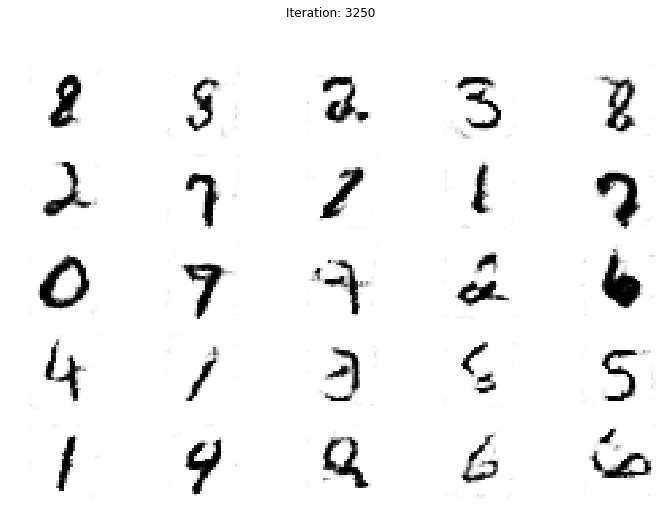

Iteration:  3251 [D loss: 0.71751, acc.:  50.00%] [G loss: 0.80782]
Iteration:  3252 [D loss: 0.68282, acc.:  58.20%] [G loss: 0.79741]
Iteration:  3253 [D loss: 0.69519, acc.:  52.73%] [G loss: 0.80658]
Iteration:  3254 [D loss: 0.72160, acc.:  51.17%] [G loss: 0.81782]
Iteration:  3255 [D loss: 0.72209, acc.:  49.61%] [G loss: 0.87575]
Iteration:  3256 [D loss: 0.71932, acc.:  49.61%] [G loss: 0.82506]
Iteration:  3257 [D loss: 0.72133, acc.:  48.44%] [G loss: 0.77211]
Iteration:  3258 [D loss: 0.69674, acc.:  54.69%] [G loss: 0.81300]
Iteration:  3259 [D loss: 0.72684, acc.:  50.00%] [G loss: 0.81059]
Iteration:  3260 [D loss: 0.71117, acc.:  52.73%] [G loss: 0.77060]
Iteration:  3261 [D loss: 0.69626, acc.:  52.73%] [G loss: 0.77789]
Iteration:  3262 [D loss: 0.68954, acc.:  55.08%] [G loss: 0.79985]
Iteration:  3263 [D loss: 0.70569, acc.:  52.34%] [G loss: 0.81569]
Iteration:  3264 [D loss: 0.68857, acc.:  56.64%] [G loss: 0.88723]
Iteration:  3265 [D loss: 0.68434, acc.:  55.47%

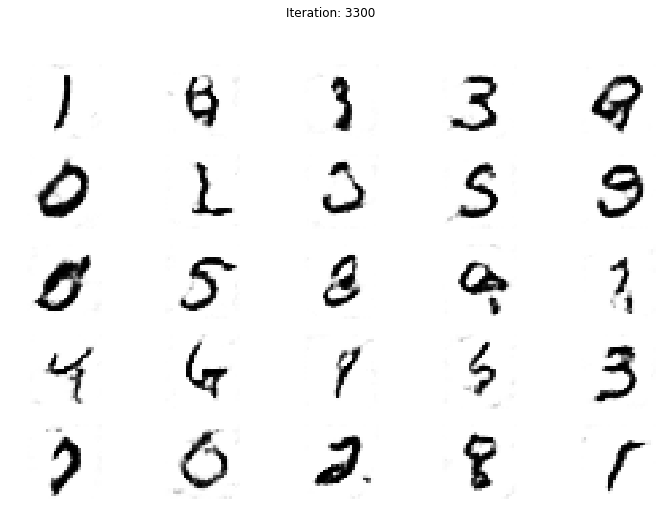

Iteration:  3301 [D loss: 0.75453, acc.:  45.31%] [G loss: 0.80158]
Iteration:  3302 [D loss: 0.73739, acc.:  48.05%] [G loss: 0.82317]
Iteration:  3303 [D loss: 0.70504, acc.:  54.69%] [G loss: 0.81512]
Iteration:  3304 [D loss: 0.69429, acc.:  53.52%] [G loss: 0.80091]
Iteration:  3305 [D loss: 0.73127, acc.:  47.66%] [G loss: 0.77092]
Iteration:  3306 [D loss: 0.69801, acc.:  53.12%] [G loss: 0.82805]
Iteration:  3307 [D loss: 0.69843, acc.:  50.78%] [G loss: 0.78707]
Iteration:  3308 [D loss: 0.69333, acc.:  51.56%] [G loss: 0.81552]
Iteration:  3309 [D loss: 0.69977, acc.:  53.91%] [G loss: 0.84474]
Iteration:  3310 [D loss: 0.71063, acc.:  50.39%] [G loss: 0.83758]
Iteration:  3311 [D loss: 0.73491, acc.:  46.48%] [G loss: 0.80131]
Iteration:  3312 [D loss: 0.69438, acc.:  57.42%] [G loss: 0.88078]
Iteration:  3313 [D loss: 0.68948, acc.:  55.47%] [G loss: 0.83429]
Iteration:  3314 [D loss: 0.69427, acc.:  53.91%] [G loss: 0.82370]
Iteration:  3315 [D loss: 0.72527, acc.:  50.39%

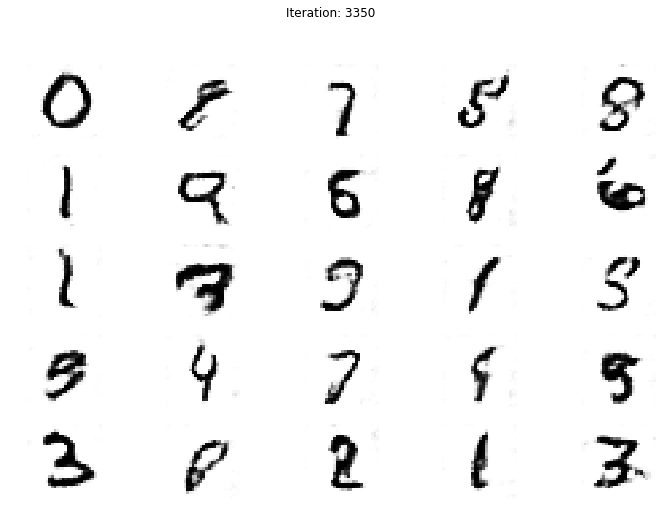

Iteration:  3351 [D loss: 0.69411, acc.:  52.73%] [G loss: 0.79897]
Iteration:  3352 [D loss: 0.66985, acc.:  55.08%] [G loss: 0.83099]
Iteration:  3353 [D loss: 0.71742, acc.:  47.27%] [G loss: 0.82275]
Iteration:  3354 [D loss: 0.68691, acc.:  56.25%] [G loss: 0.80633]
Iteration:  3355 [D loss: 0.68849, acc.:  53.91%] [G loss: 0.83984]
Iteration:  3356 [D loss: 0.67553, acc.:  56.25%] [G loss: 0.84631]
Iteration:  3357 [D loss: 0.69397, acc.:  58.20%] [G loss: 0.81063]
Iteration:  3358 [D loss: 0.71542, acc.:  50.39%] [G loss: 0.80432]
Iteration:  3359 [D loss: 0.70068, acc.:  52.73%] [G loss: 0.77968]
Iteration:  3360 [D loss: 0.72013, acc.:  48.83%] [G loss: 0.81851]
Iteration:  3361 [D loss: 0.72092, acc.:  50.78%] [G loss: 0.78373]
Iteration:  3362 [D loss: 0.70376, acc.:  55.08%] [G loss: 0.84540]
Iteration:  3363 [D loss: 0.70645, acc.:  55.47%] [G loss: 0.79823]
Iteration:  3364 [D loss: 0.73230, acc.:  45.70%] [G loss: 0.80382]
Iteration:  3365 [D loss: 0.70177, acc.:  51.95%

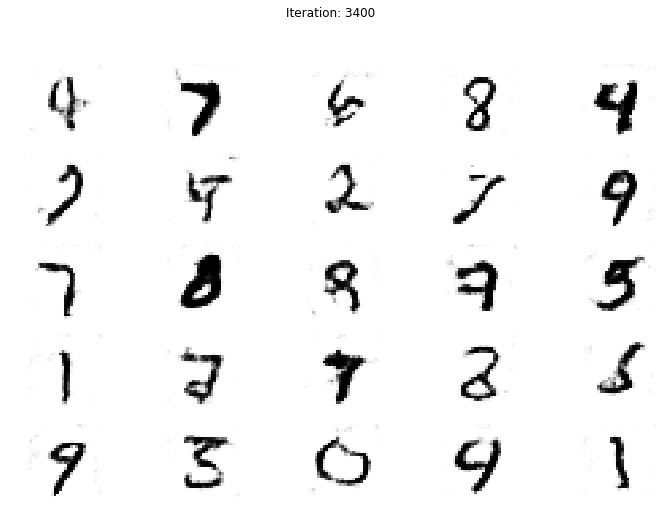

Iteration:  3401 [D loss: 0.70871, acc.:  50.00%] [G loss: 0.80150]
Iteration:  3402 [D loss: 0.70787, acc.:  50.78%] [G loss: 0.83317]
Iteration:  3403 [D loss: 0.74210, acc.:  44.53%] [G loss: 0.81870]
Iteration:  3404 [D loss: 0.72714, acc.:  50.39%] [G loss: 0.83477]
Iteration:  3405 [D loss: 0.68036, acc.:  55.08%] [G loss: 0.80439]
Iteration:  3406 [D loss: 0.68720, acc.:  56.25%] [G loss: 0.78036]
Iteration:  3407 [D loss: 0.71292, acc.:  49.22%] [G loss: 0.80060]
Iteration:  3408 [D loss: 0.68727, acc.:  54.69%] [G loss: 0.79127]
Iteration:  3409 [D loss: 0.71091, acc.:  49.61%] [G loss: 0.79006]
Iteration:  3410 [D loss: 0.65621, acc.:  58.98%] [G loss: 0.83528]
Iteration:  3411 [D loss: 0.69131, acc.:  55.47%] [G loss: 0.82288]
Iteration:  3412 [D loss: 0.69176, acc.:  54.30%] [G loss: 0.83527]
Iteration:  3413 [D loss: 0.68322, acc.:  52.73%] [G loss: 0.80993]
Iteration:  3414 [D loss: 0.71547, acc.:  49.22%] [G loss: 0.82096]
Iteration:  3415 [D loss: 0.71623, acc.:  52.73%

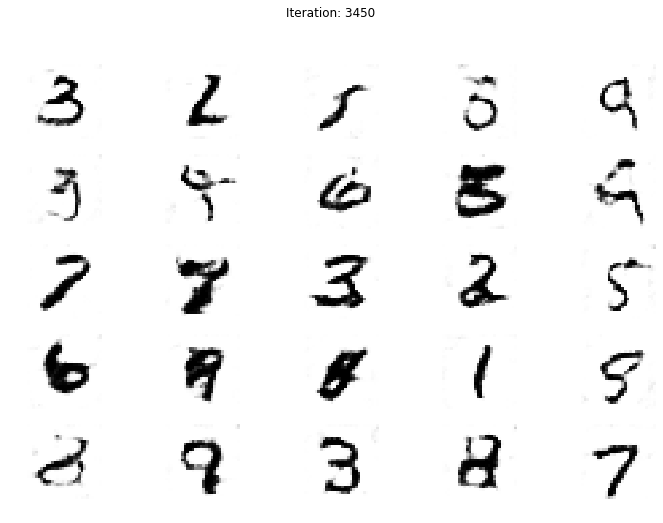

Iteration:  3451 [D loss: 0.68992, acc.:  58.20%] [G loss: 0.80918]
Iteration:  3452 [D loss: 0.70696, acc.:  51.17%] [G loss: 0.77148]
Iteration:  3453 [D loss: 0.68671, acc.:  56.64%] [G loss: 0.80000]
Iteration:  3454 [D loss: 0.71939, acc.:  49.22%] [G loss: 0.79792]
Iteration:  3455 [D loss: 0.72461, acc.:  50.78%] [G loss: 0.81551]
Iteration:  3456 [D loss: 0.68927, acc.:  55.47%] [G loss: 0.84363]
Iteration:  3457 [D loss: 0.71726, acc.:  48.44%] [G loss: 0.83186]
Iteration:  3458 [D loss: 0.70183, acc.:  52.73%] [G loss: 0.80066]
Iteration:  3459 [D loss: 0.70188, acc.:  56.64%] [G loss: 0.75783]
Iteration:  3460 [D loss: 0.73750, acc.:  44.53%] [G loss: 0.83608]
Iteration:  3461 [D loss: 0.73366, acc.:  49.61%] [G loss: 0.81012]
Iteration:  3462 [D loss: 0.71546, acc.:  48.05%] [G loss: 0.84739]
Iteration:  3463 [D loss: 0.67273, acc.:  54.69%] [G loss: 0.84748]
Iteration:  3464 [D loss: 0.68349, acc.:  57.03%] [G loss: 0.85935]
Iteration:  3465 [D loss: 0.72027, acc.:  51.95%

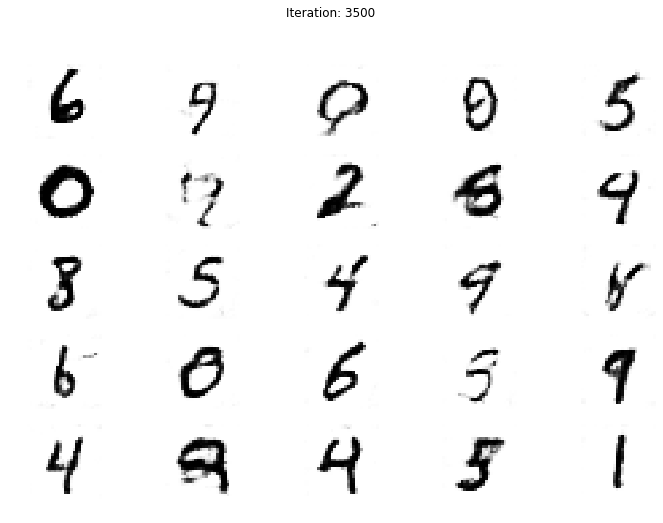

Iteration:  3501 [D loss: 0.71822, acc.:  48.83%] [G loss: 0.81909]
Iteration:  3502 [D loss: 0.72394, acc.:  46.88%] [G loss: 0.76972]
Iteration:  3503 [D loss: 0.71671, acc.:  50.00%] [G loss: 0.81482]
Iteration:  3504 [D loss: 0.70487, acc.:  54.30%] [G loss: 0.82131]
Iteration:  3505 [D loss: 0.70034, acc.:  53.52%] [G loss: 0.79115]
Iteration:  3506 [D loss: 0.69820, acc.:  54.30%] [G loss: 0.77977]
Iteration:  3507 [D loss: 0.72901, acc.:  49.61%] [G loss: 0.81510]
Iteration:  3508 [D loss: 0.72603, acc.:  50.78%] [G loss: 0.80106]
Iteration:  3509 [D loss: 0.69155, acc.:  54.30%] [G loss: 0.76825]
Iteration:  3510 [D loss: 0.72776, acc.:  47.66%] [G loss: 0.77769]
Iteration:  3511 [D loss: 0.70239, acc.:  49.61%] [G loss: 0.76982]
Iteration:  3512 [D loss: 0.71360, acc.:  53.52%] [G loss: 0.82514]
Iteration:  3513 [D loss: 0.71472, acc.:  50.39%] [G loss: 0.86685]
Iteration:  3514 [D loss: 0.71378, acc.:  48.05%] [G loss: 0.81497]
Iteration:  3515 [D loss: 0.72847, acc.:  50.39%

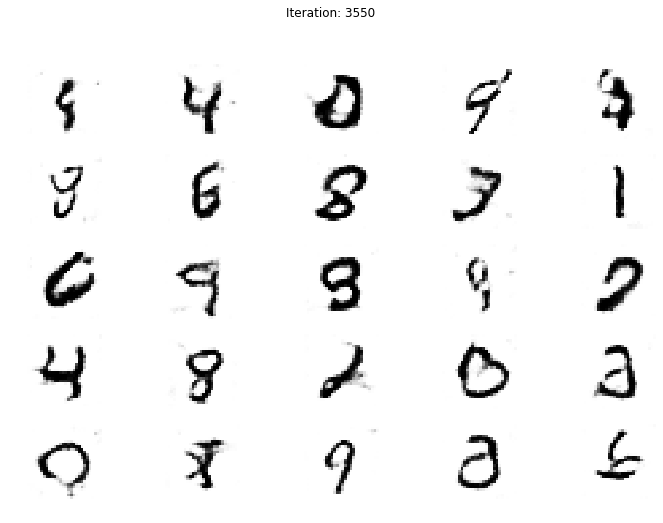

Iteration:  3551 [D loss: 0.70750, acc.:  51.56%] [G loss: 0.81289]
Iteration:  3552 [D loss: 0.75214, acc.:  46.88%] [G loss: 0.80152]
Iteration:  3553 [D loss: 0.70785, acc.:  52.34%] [G loss: 0.83743]
Iteration:  3554 [D loss: 0.70277, acc.:  52.34%] [G loss: 0.84435]
Iteration:  3555 [D loss: 0.70648, acc.:  53.12%] [G loss: 0.88988]
Iteration:  3556 [D loss: 0.69071, acc.:  56.25%] [G loss: 0.80743]
Iteration:  3557 [D loss: 0.70013, acc.:  53.12%] [G loss: 0.78161]
Iteration:  3558 [D loss: 0.69001, acc.:  55.86%] [G loss: 0.82820]
Iteration:  3559 [D loss: 0.71016, acc.:  50.78%] [G loss: 0.87200]
Iteration:  3560 [D loss: 0.72516, acc.:  45.70%] [G loss: 0.81855]
Iteration:  3561 [D loss: 0.72178, acc.:  51.17%] [G loss: 0.81338]
Iteration:  3562 [D loss: 0.67972, acc.:  54.30%] [G loss: 0.80574]
Iteration:  3563 [D loss: 0.72730, acc.:  49.22%] [G loss: 0.81640]
Iteration:  3564 [D loss: 0.69961, acc.:  50.39%] [G loss: 0.80621]
Iteration:  3565 [D loss: 0.71357, acc.:  50.39%

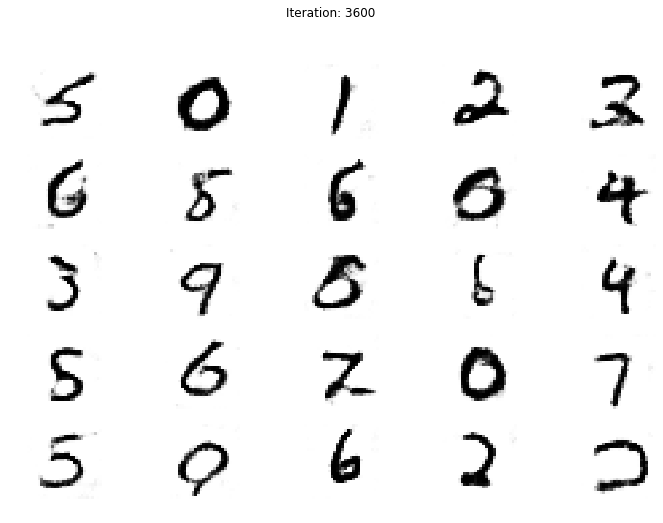

Iteration:  3601 [D loss: 0.72380, acc.:  46.48%] [G loss: 0.81796]
Iteration:  3602 [D loss: 0.69173, acc.:  53.12%] [G loss: 0.83120]
Iteration:  3603 [D loss: 0.72145, acc.:  47.66%] [G loss: 0.79438]
Iteration:  3604 [D loss: 0.68009, acc.:  58.20%] [G loss: 0.85855]
Iteration:  3605 [D loss: 0.71059, acc.:  53.12%] [G loss: 0.81974]
Iteration:  3606 [D loss: 0.66243, acc.:  58.20%] [G loss: 0.82349]
Iteration:  3607 [D loss: 0.69814, acc.:  57.42%] [G loss: 0.78504]
Iteration:  3608 [D loss: 0.68842, acc.:  53.52%] [G loss: 0.78883]
Iteration:  3609 [D loss: 0.67646, acc.:  60.55%] [G loss: 0.80001]
Iteration:  3610 [D loss: 0.73126, acc.:  45.70%] [G loss: 0.81487]
Iteration:  3611 [D loss: 0.69503, acc.:  55.08%] [G loss: 0.78533]
Iteration:  3612 [D loss: 0.71047, acc.:  54.69%] [G loss: 0.85056]
Iteration:  3613 [D loss: 0.68864, acc.:  55.86%] [G loss: 0.84510]
Iteration:  3614 [D loss: 0.73799, acc.:  46.88%] [G loss: 0.78675]
Iteration:  3615 [D loss: 0.70818, acc.:  51.17%

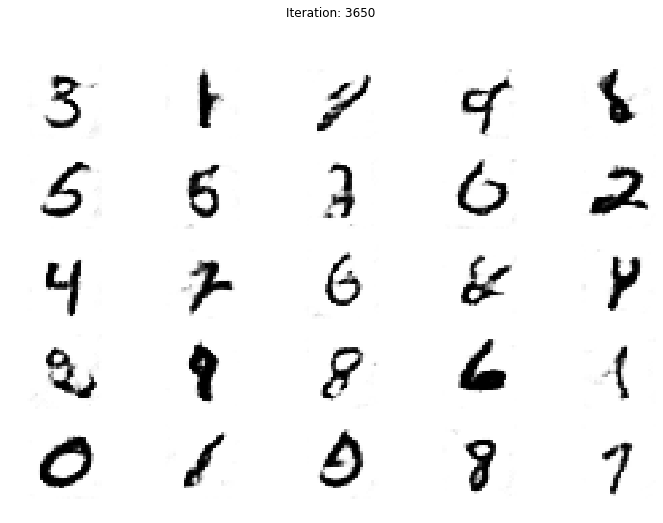

Iteration:  3651 [D loss: 0.71727, acc.:  49.22%] [G loss: 0.76346]
Iteration:  3652 [D loss: 0.69733, acc.:  53.12%] [G loss: 0.78688]
Iteration:  3653 [D loss: 0.69442, acc.:  53.91%] [G loss: 0.78225]
Iteration:  3654 [D loss: 0.68863, acc.:  55.08%] [G loss: 0.80340]
Iteration:  3655 [D loss: 0.69955, acc.:  52.34%] [G loss: 0.82446]
Iteration:  3656 [D loss: 0.71274, acc.:  51.95%] [G loss: 0.79347]
Iteration:  3657 [D loss: 0.70760, acc.:  53.91%] [G loss: 0.80835]
Iteration:  3658 [D loss: 0.70161, acc.:  53.91%] [G loss: 0.81635]
Iteration:  3659 [D loss: 0.70362, acc.:  52.73%] [G loss: 0.82959]
Iteration:  3660 [D loss: 0.70957, acc.:  53.52%] [G loss: 0.78549]
Iteration:  3661 [D loss: 0.72825, acc.:  45.70%] [G loss: 0.81930]
Iteration:  3662 [D loss: 0.69526, acc.:  53.12%] [G loss: 0.80375]
Iteration:  3663 [D loss: 0.71654, acc.:  55.08%] [G loss: 0.80377]
Iteration:  3664 [D loss: 0.70207, acc.:  54.30%] [G loss: 0.76016]
Iteration:  3665 [D loss: 0.70327, acc.:  52.73%

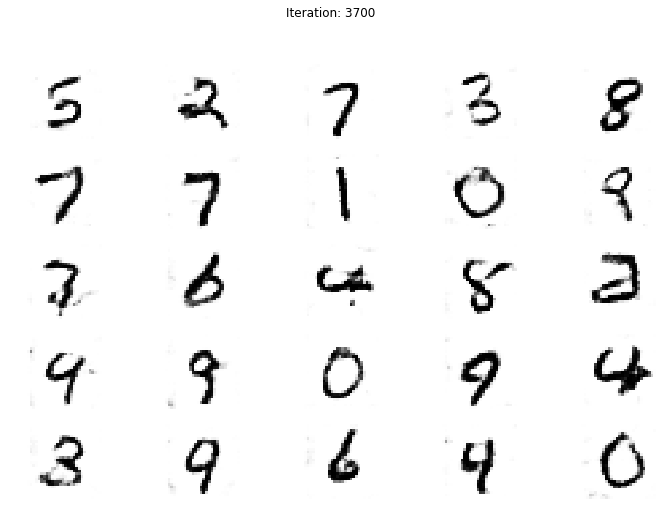

Iteration:  3701 [D loss: 0.66051, acc.:  64.06%] [G loss: 0.82202]
Iteration:  3702 [D loss: 0.68807, acc.:  53.91%] [G loss: 0.78339]
Iteration:  3703 [D loss: 0.73356, acc.:  47.66%] [G loss: 0.77125]
Iteration:  3704 [D loss: 0.67936, acc.:  53.91%] [G loss: 0.83235]
Iteration:  3705 [D loss: 0.74504, acc.:  41.80%] [G loss: 0.81587]
Iteration:  3706 [D loss: 0.68850, acc.:  55.08%] [G loss: 0.82075]
Iteration:  3707 [D loss: 0.67572, acc.:  57.03%] [G loss: 0.83815]
Iteration:  3708 [D loss: 0.68975, acc.:  57.03%] [G loss: 0.77960]
Iteration:  3709 [D loss: 0.71487, acc.:  52.73%] [G loss: 0.76710]
Iteration:  3710 [D loss: 0.70696, acc.:  51.56%] [G loss: 0.83643]
Iteration:  3711 [D loss: 0.71664, acc.:  51.95%] [G loss: 0.77880]
Iteration:  3712 [D loss: 0.73986, acc.:  49.22%] [G loss: 0.77082]
Iteration:  3713 [D loss: 0.74285, acc.:  47.66%] [G loss: 0.76174]
Iteration:  3714 [D loss: 0.69154, acc.:  55.08%] [G loss: 0.77360]
Iteration:  3715 [D loss: 0.71245, acc.:  50.39%

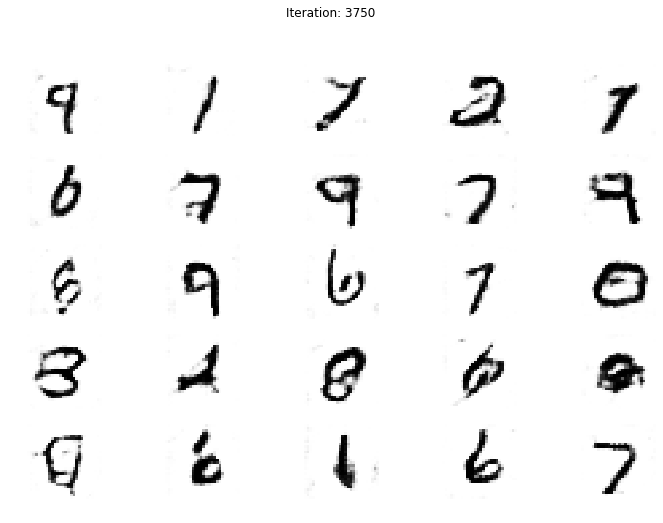

Iteration:  3751 [D loss: 0.73050, acc.:  52.34%] [G loss: 0.76945]
Iteration:  3752 [D loss: 0.72752, acc.:  48.83%] [G loss: 0.78377]
Iteration:  3753 [D loss: 0.70122, acc.:  54.30%] [G loss: 0.84421]
Iteration:  3754 [D loss: 0.69704, acc.:  54.69%] [G loss: 0.88583]
Iteration:  3755 [D loss: 0.71307, acc.:  54.30%] [G loss: 0.80538]
Iteration:  3756 [D loss: 0.72156, acc.:  48.44%] [G loss: 0.79171]
Iteration:  3757 [D loss: 0.66664, acc.:  60.94%] [G loss: 0.82785]
Iteration:  3758 [D loss: 0.71385, acc.:  55.47%] [G loss: 0.81367]
Iteration:  3759 [D loss: 0.71029, acc.:  53.91%] [G loss: 0.80581]
Iteration:  3760 [D loss: 0.70370, acc.:  49.61%] [G loss: 0.80214]
Iteration:  3761 [D loss: 0.72046, acc.:  50.39%] [G loss: 0.80351]
Iteration:  3762 [D loss: 0.70326, acc.:  54.30%] [G loss: 0.74493]
Iteration:  3763 [D loss: 0.71077, acc.:  50.00%] [G loss: 0.82955]
Iteration:  3764 [D loss: 0.67601, acc.:  57.42%] [G loss: 0.84829]
Iteration:  3765 [D loss: 0.70419, acc.:  52.73%

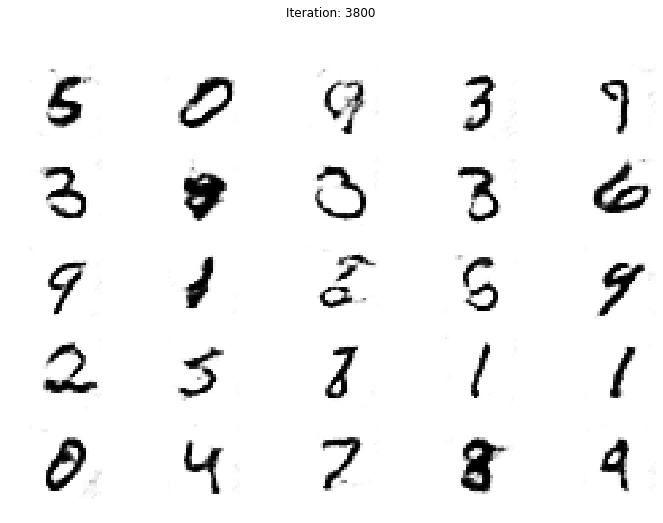

Iteration:  3801 [D loss: 0.71765, acc.:  51.56%] [G loss: 0.82268]
Iteration:  3802 [D loss: 0.69231, acc.:  53.12%] [G loss: 0.82351]
Iteration:  3803 [D loss: 0.71051, acc.:  52.34%] [G loss: 0.84392]
Iteration:  3804 [D loss: 0.72887, acc.:  46.88%] [G loss: 0.77311]
Iteration:  3805 [D loss: 0.72737, acc.:  47.66%] [G loss: 0.79850]
Iteration:  3806 [D loss: 0.72623, acc.:  46.48%] [G loss: 0.75208]
Iteration:  3807 [D loss: 0.70790, acc.:  52.73%] [G loss: 0.76073]
Iteration:  3808 [D loss: 0.70715, acc.:  57.42%] [G loss: 0.79194]
Iteration:  3809 [D loss: 0.70502, acc.:  51.95%] [G loss: 0.78402]
Iteration:  3810 [D loss: 0.67315, acc.:  54.69%] [G loss: 0.79836]
Iteration:  3811 [D loss: 0.69631, acc.:  57.03%] [G loss: 0.78619]
Iteration:  3812 [D loss: 0.74588, acc.:  44.14%] [G loss: 0.77488]
Iteration:  3813 [D loss: 0.70084, acc.:  55.08%] [G loss: 0.83082]
Iteration:  3814 [D loss: 0.70301, acc.:  51.56%] [G loss: 0.82801]
Iteration:  3815 [D loss: 0.69870, acc.:  50.78%

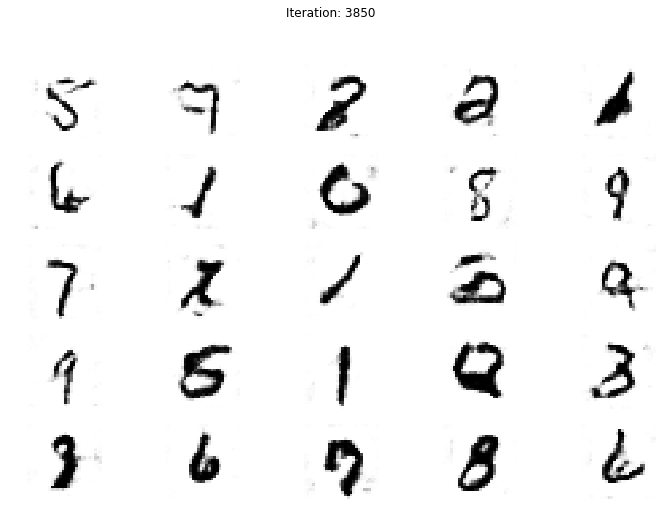

Iteration:  3851 [D loss: 0.69744, acc.:  52.73%] [G loss: 0.78371]
Iteration:  3852 [D loss: 0.71491, acc.:  51.17%] [G loss: 0.82634]
Iteration:  3853 [D loss: 0.69219, acc.:  54.69%] [G loss: 0.81871]
Iteration:  3854 [D loss: 0.73402, acc.:  44.92%] [G loss: 0.82716]
Iteration:  3855 [D loss: 0.72112, acc.:  46.88%] [G loss: 0.74944]
Iteration:  3856 [D loss: 0.68704, acc.:  59.38%] [G loss: 0.80378]
Iteration:  3857 [D loss: 0.73353, acc.:  46.88%] [G loss: 0.82387]
Iteration:  3858 [D loss: 0.70035, acc.:  49.61%] [G loss: 0.82408]
Iteration:  3859 [D loss: 0.69758, acc.:  53.91%] [G loss: 0.79650]
Iteration:  3860 [D loss: 0.71497, acc.:  48.44%] [G loss: 0.78640]
Iteration:  3861 [D loss: 0.69579, acc.:  51.56%] [G loss: 0.76970]
Iteration:  3862 [D loss: 0.70302, acc.:  55.86%] [G loss: 0.77127]
Iteration:  3863 [D loss: 0.72328, acc.:  48.44%] [G loss: 0.77816]
Iteration:  3864 [D loss: 0.72388, acc.:  50.00%] [G loss: 0.81035]
Iteration:  3865 [D loss: 0.71492, acc.:  50.00%

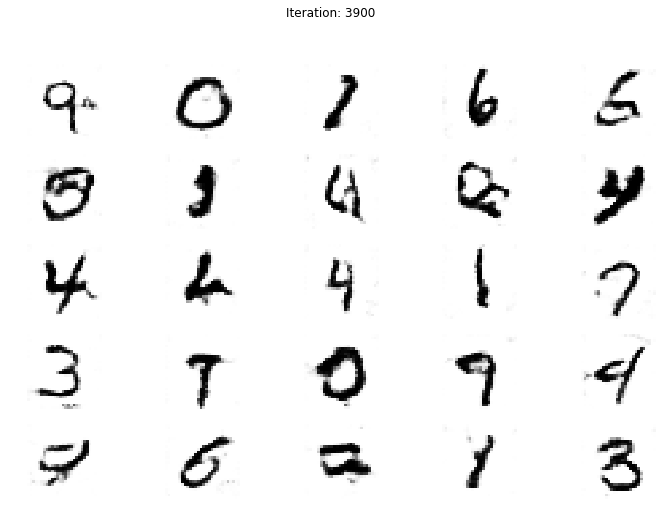

Iteration:  3901 [D loss: 0.70543, acc.:  51.95%] [G loss: 0.78911]
Iteration:  3902 [D loss: 0.68994, acc.:  55.47%] [G loss: 0.79867]
Iteration:  3903 [D loss: 0.70198, acc.:  54.30%] [G loss: 0.77493]
Iteration:  3904 [D loss: 0.69486, acc.:  57.03%] [G loss: 0.77284]
Iteration:  3905 [D loss: 0.65960, acc.:  60.94%] [G loss: 0.80471]
Iteration:  3906 [D loss: 0.70135, acc.:  55.47%] [G loss: 0.82855]
Iteration:  3907 [D loss: 0.71371, acc.:  49.61%] [G loss: 0.80994]
Iteration:  3908 [D loss: 0.72461, acc.:  49.22%] [G loss: 0.80319]
Iteration:  3909 [D loss: 0.69560, acc.:  52.73%] [G loss: 0.80286]
Iteration:  3910 [D loss: 0.70100, acc.:  53.12%] [G loss: 0.82291]
Iteration:  3911 [D loss: 0.69484, acc.:  52.73%] [G loss: 0.80829]
Iteration:  3912 [D loss: 0.71028, acc.:  50.39%] [G loss: 0.77599]
Iteration:  3913 [D loss: 0.70084, acc.:  49.61%] [G loss: 0.77518]
Iteration:  3914 [D loss: 0.70823, acc.:  54.30%] [G loss: 0.80401]
Iteration:  3915 [D loss: 0.70570, acc.:  50.00%

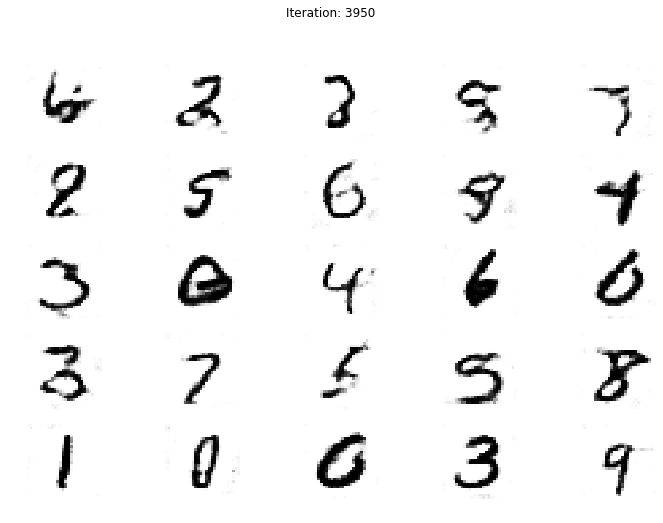

Iteration:  3951 [D loss: 0.70018, acc.:  54.69%] [G loss: 0.80816]
Iteration:  3952 [D loss: 0.71453, acc.:  53.12%] [G loss: 0.77993]
Iteration:  3953 [D loss: 0.68706, acc.:  55.86%] [G loss: 0.81220]
Iteration:  3954 [D loss: 0.71191, acc.:  52.34%] [G loss: 0.78898]
Iteration:  3955 [D loss: 0.72135, acc.:  46.09%] [G loss: 0.85746]
Iteration:  3956 [D loss: 0.69949, acc.:  53.12%] [G loss: 0.85048]
Iteration:  3957 [D loss: 0.70166, acc.:  50.39%] [G loss: 0.83604]
Iteration:  3958 [D loss: 0.69572, acc.:  54.30%] [G loss: 0.83482]
Iteration:  3959 [D loss: 0.69772, acc.:  53.12%] [G loss: 0.79551]
Iteration:  3960 [D loss: 0.71846, acc.:  47.66%] [G loss: 0.79269]
Iteration:  3961 [D loss: 0.71505, acc.:  47.66%] [G loss: 0.79105]
Iteration:  3962 [D loss: 0.68953, acc.:  55.08%] [G loss: 0.79363]
Iteration:  3963 [D loss: 0.68489, acc.:  57.81%] [G loss: 0.80228]
Iteration:  3964 [D loss: 0.71571, acc.:  52.34%] [G loss: 0.76810]
Iteration:  3965 [D loss: 0.73443, acc.:  45.70%

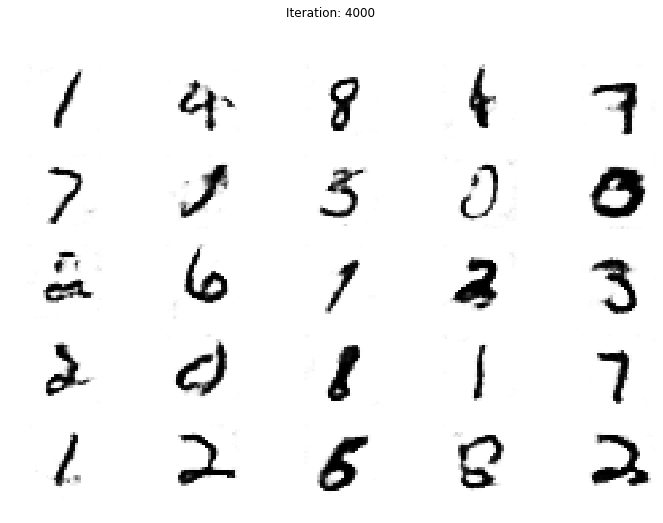

Iteration:  4001 [D loss: 0.72110, acc.:  45.70%] [G loss: 0.79188]
Iteration:  4002 [D loss: 0.71312, acc.:  50.00%] [G loss: 0.80250]
Iteration:  4003 [D loss: 0.72152, acc.:  49.61%] [G loss: 0.80583]
Iteration:  4004 [D loss: 0.70735, acc.:  51.17%] [G loss: 0.76345]
Iteration:  4005 [D loss: 0.73413, acc.:  47.27%] [G loss: 0.80520]
Iteration:  4006 [D loss: 0.69942, acc.:  51.56%] [G loss: 0.78566]
Iteration:  4007 [D loss: 0.72320, acc.:  49.61%] [G loss: 0.81378]
Iteration:  4008 [D loss: 0.68603, acc.:  56.25%] [G loss: 0.85628]
Iteration:  4009 [D loss: 0.71108, acc.:  51.56%] [G loss: 0.81394]
Iteration:  4010 [D loss: 0.73471, acc.:  43.75%] [G loss: 0.77644]
Iteration:  4011 [D loss: 0.69865, acc.:  52.73%] [G loss: 0.81342]
Iteration:  4012 [D loss: 0.69478, acc.:  53.12%] [G loss: 0.78501]
Iteration:  4013 [D loss: 0.69962, acc.:  50.00%] [G loss: 0.76077]
Iteration:  4014 [D loss: 0.71362, acc.:  51.56%] [G loss: 0.78614]
Iteration:  4015 [D loss: 0.71814, acc.:  47.27%

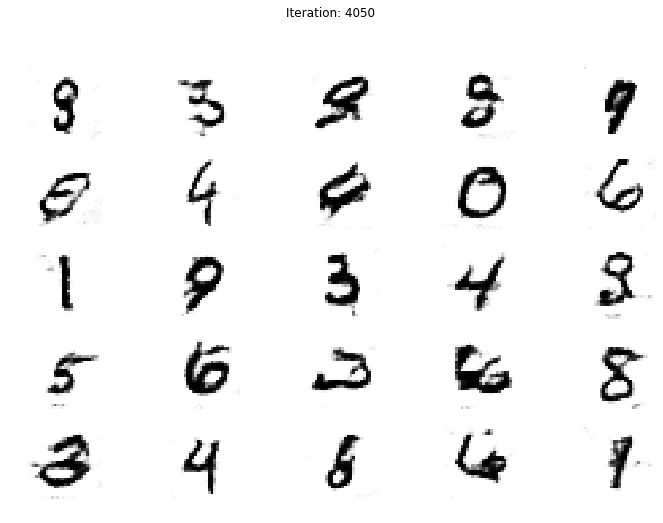

Iteration:  4051 [D loss: 0.69075, acc.:  52.34%] [G loss: 0.76799]
Iteration:  4052 [D loss: 0.73004, acc.:  48.83%] [G loss: 0.77851]
Iteration:  4053 [D loss: 0.70721, acc.:  51.17%] [G loss: 0.79735]
Iteration:  4054 [D loss: 0.70968, acc.:  51.95%] [G loss: 0.80308]
Iteration:  4055 [D loss: 0.72139, acc.:  50.39%] [G loss: 0.77423]
Iteration:  4056 [D loss: 0.69332, acc.:  55.08%] [G loss: 0.81300]
Iteration:  4057 [D loss: 0.71091, acc.:  51.17%] [G loss: 0.79423]
Iteration:  4058 [D loss: 0.70587, acc.:  52.73%] [G loss: 0.80277]
Iteration:  4059 [D loss: 0.69947, acc.:  52.73%] [G loss: 0.79658]
Iteration:  4060 [D loss: 0.71855, acc.:  48.05%] [G loss: 0.79880]
Iteration:  4061 [D loss: 0.70660, acc.:  50.00%] [G loss: 0.80608]
Iteration:  4062 [D loss: 0.71108, acc.:  54.69%] [G loss: 0.79474]
Iteration:  4063 [D loss: 0.70530, acc.:  50.78%] [G loss: 0.78169]
Iteration:  4064 [D loss: 0.72420, acc.:  48.83%] [G loss: 0.76380]
Iteration:  4065 [D loss: 0.71951, acc.:  50.78%

Iteration:  4101 [D loss: 0.72193, acc.:  47.66%] [G loss: 0.78295]
Iteration:  4102 [D loss: 0.70002, acc.:  53.12%] [G loss: 0.77842]
Iteration:  4103 [D loss: 0.70870, acc.:  53.91%] [G loss: 0.81048]
Iteration:  4104 [D loss: 0.74843, acc.:  43.75%] [G loss: 0.81615]
Iteration:  4105 [D loss: 0.69056, acc.:  57.03%] [G loss: 0.75082]
Iteration:  4106 [D loss: 0.73579, acc.:  43.36%] [G loss: 0.79738]
Iteration:  4107 [D loss: 0.72471, acc.:  46.48%] [G loss: 0.75668]
Iteration:  4108 [D loss: 0.71690, acc.:  46.48%] [G loss: 0.82058]
Iteration:  4109 [D loss: 0.73897, acc.:  43.75%] [G loss: 0.78752]
Iteration:  4110 [D loss: 0.69979, acc.:  50.00%] [G loss: 0.80960]
Iteration:  4111 [D loss: 0.71490, acc.:  49.61%] [G loss: 0.76093]
Iteration:  4112 [D loss: 0.71897, acc.:  49.61%] [G loss: 0.79660]
Iteration:  4113 [D loss: 0.70663, acc.:  53.12%] [G loss: 0.78317]
Iteration:  4114 [D loss: 0.71530, acc.:  53.52%] [G loss: 0.81378]
Iteration:  4115 [D loss: 0.70961, acc.:  48.83%

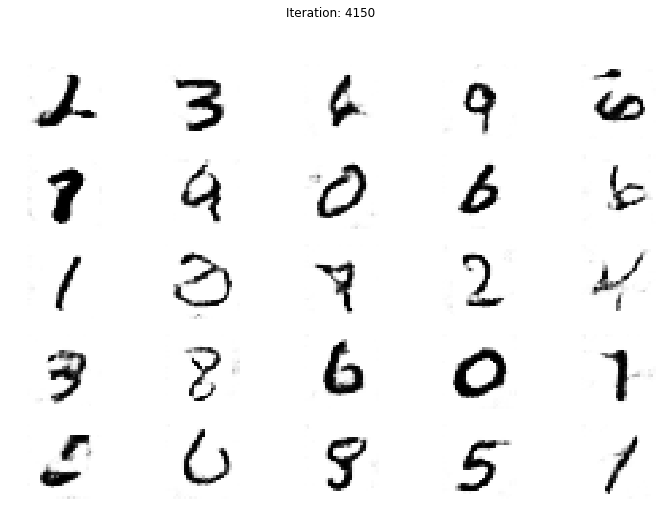

Iteration:  4151 [D loss: 0.69132, acc.:  52.73%] [G loss: 0.79913]
Iteration:  4152 [D loss: 0.70623, acc.:  48.44%] [G loss: 0.74955]
Iteration:  4153 [D loss: 0.71468, acc.:  48.44%] [G loss: 0.76807]
Iteration:  4154 [D loss: 0.72743, acc.:  46.48%] [G loss: 0.76418]
Iteration:  4155 [D loss: 0.72724, acc.:  48.05%] [G loss: 0.82492]
Iteration:  4156 [D loss: 0.70491, acc.:  51.17%] [G loss: 0.80181]
Iteration:  4157 [D loss: 0.70582, acc.:  52.73%] [G loss: 0.83819]
Iteration:  4158 [D loss: 0.71735, acc.:  50.78%] [G loss: 0.81929]
Iteration:  4159 [D loss: 0.70668, acc.:  51.17%] [G loss: 0.80696]
Iteration:  4160 [D loss: 0.71068, acc.:  54.30%] [G loss: 0.80876]
Iteration:  4161 [D loss: 0.70441, acc.:  48.83%] [G loss: 0.79524]
Iteration:  4162 [D loss: 0.71647, acc.:  51.56%] [G loss: 0.81918]
Iteration:  4163 [D loss: 0.71123, acc.:  51.17%] [G loss: 0.77200]
Iteration:  4164 [D loss: 0.69202, acc.:  56.25%] [G loss: 0.83058]
Iteration:  4165 [D loss: 0.70298, acc.:  54.30%

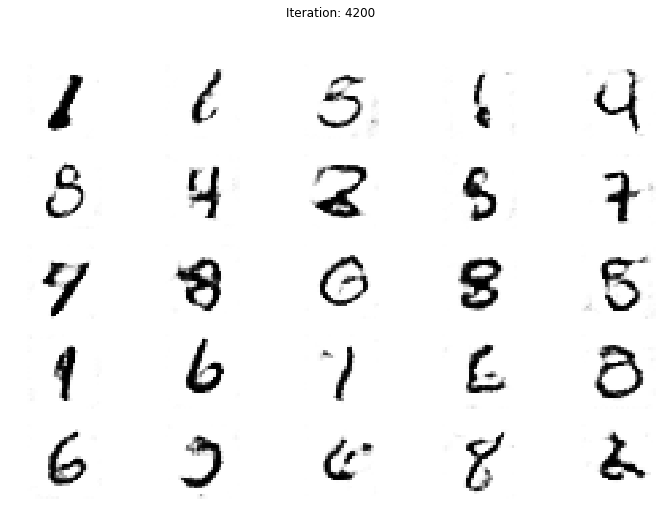

Iteration:  4201 [D loss: 0.71673, acc.:  51.95%] [G loss: 0.79068]
Iteration:  4202 [D loss: 0.73507, acc.:  46.48%] [G loss: 0.80672]
Iteration:  4203 [D loss: 0.68824, acc.:  55.08%] [G loss: 0.80952]
Iteration:  4204 [D loss: 0.71059, acc.:  51.56%] [G loss: 0.76228]
Iteration:  4205 [D loss: 0.70360, acc.:  50.00%] [G loss: 0.78160]
Iteration:  4206 [D loss: 0.70323, acc.:  50.39%] [G loss: 0.77883]
Iteration:  4207 [D loss: 0.68022, acc.:  52.73%] [G loss: 0.78753]
Iteration:  4208 [D loss: 0.69316, acc.:  53.91%] [G loss: 0.79084]
Iteration:  4209 [D loss: 0.73331, acc.:  48.05%] [G loss: 0.78255]
Iteration:  4210 [D loss: 0.70138, acc.:  54.30%] [G loss: 0.82208]
Iteration:  4211 [D loss: 0.70797, acc.:  53.12%] [G loss: 0.78073]
Iteration:  4212 [D loss: 0.73300, acc.:  48.83%] [G loss: 0.79789]
Iteration:  4213 [D loss: 0.70336, acc.:  50.78%] [G loss: 0.79136]
Iteration:  4214 [D loss: 0.68653, acc.:  58.98%] [G loss: 0.81385]
Iteration:  4215 [D loss: 0.72914, acc.:  48.44%

Iteration:  4251 [D loss: 0.68573, acc.:  53.52%] [G loss: 0.81527]
Iteration:  4252 [D loss: 0.73376, acc.:  45.31%] [G loss: 0.81565]
Iteration:  4253 [D loss: 0.70059, acc.:  51.56%] [G loss: 0.77326]
Iteration:  4254 [D loss: 0.69769, acc.:  55.86%] [G loss: 0.77546]
Iteration:  4255 [D loss: 0.70633, acc.:  53.12%] [G loss: 0.77674]
Iteration:  4256 [D loss: 0.70689, acc.:  50.78%] [G loss: 0.80542]
Iteration:  4257 [D loss: 0.69165, acc.:  53.12%] [G loss: 0.76754]
Iteration:  4258 [D loss: 0.71445, acc.:  49.22%] [G loss: 0.82721]
Iteration:  4259 [D loss: 0.72353, acc.:  44.92%] [G loss: 0.79300]
Iteration:  4260 [D loss: 0.69914, acc.:  54.69%] [G loss: 0.80425]
Iteration:  4261 [D loss: 0.69789, acc.:  52.34%] [G loss: 0.83091]
Iteration:  4262 [D loss: 0.71131, acc.:  53.52%] [G loss: 0.79550]
Iteration:  4263 [D loss: 0.71147, acc.:  51.17%] [G loss: 0.80642]
Iteration:  4264 [D loss: 0.73275, acc.:  47.27%] [G loss: 0.81498]
Iteration:  4265 [D loss: 0.70972, acc.:  50.78%

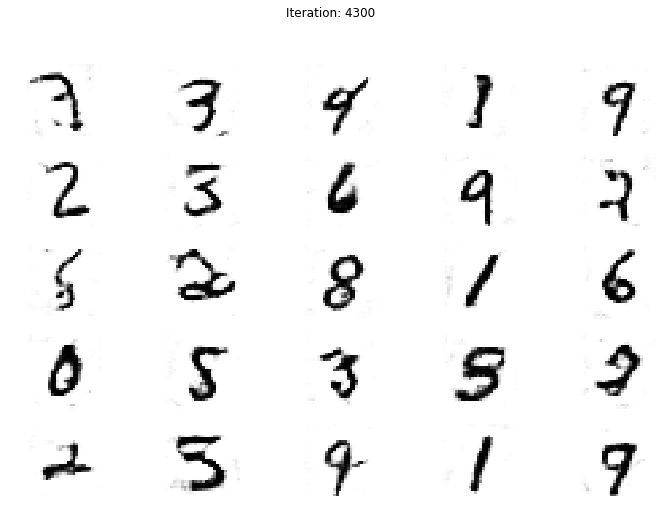

Iteration:  4301 [D loss: 0.71247, acc.:  53.91%] [G loss: 0.74855]
Iteration:  4302 [D loss: 0.71604, acc.:  46.09%] [G loss: 0.78360]
Iteration:  4303 [D loss: 0.70870, acc.:  52.73%] [G loss: 0.82487]
Iteration:  4304 [D loss: 0.71202, acc.:  51.17%] [G loss: 0.76073]
Iteration:  4305 [D loss: 0.72491, acc.:  50.78%] [G loss: 0.80209]
Iteration:  4306 [D loss: 0.66955, acc.:  57.81%] [G loss: 0.77717]
Iteration:  4307 [D loss: 0.71576, acc.:  50.39%] [G loss: 0.82570]
Iteration:  4308 [D loss: 0.71067, acc.:  53.91%] [G loss: 0.79102]
Iteration:  4309 [D loss: 0.69960, acc.:  54.30%] [G loss: 0.83238]
Iteration:  4310 [D loss: 0.73178, acc.:  47.66%] [G loss: 0.78842]
Iteration:  4311 [D loss: 0.73201, acc.:  49.61%] [G loss: 0.78925]
Iteration:  4312 [D loss: 0.71820, acc.:  49.61%] [G loss: 0.81718]
Iteration:  4313 [D loss: 0.69995, acc.:  53.12%] [G loss: 0.78424]
Iteration:  4314 [D loss: 0.71910, acc.:  49.61%] [G loss: 0.80995]
Iteration:  4315 [D loss: 0.71350, acc.:  49.22%

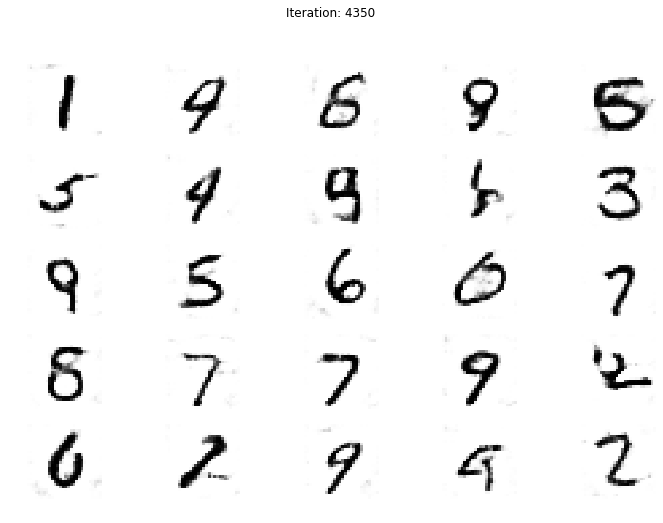

Iteration:  4351 [D loss: 0.70778, acc.:  48.83%] [G loss: 0.84417]
Iteration:  4352 [D loss: 0.71910, acc.:  48.05%] [G loss: 0.81234]
Iteration:  4353 [D loss: 0.69221, acc.:  56.25%] [G loss: 0.75999]
Iteration:  4354 [D loss: 0.70060, acc.:  50.00%] [G loss: 0.80245]
Iteration:  4355 [D loss: 0.72408, acc.:  51.17%] [G loss: 0.79267]
Iteration:  4356 [D loss: 0.71066, acc.:  49.61%] [G loss: 0.75584]
Iteration:  4357 [D loss: 0.69341, acc.:  53.91%] [G loss: 0.80511]
Iteration:  4358 [D loss: 0.73840, acc.:  44.14%] [G loss: 0.83966]
Iteration:  4359 [D loss: 0.70019, acc.:  53.91%] [G loss: 0.83052]
Iteration:  4360 [D loss: 0.71437, acc.:  51.17%] [G loss: 0.80020]
Iteration:  4361 [D loss: 0.70515, acc.:  53.12%] [G loss: 0.79140]
Iteration:  4362 [D loss: 0.74614, acc.:  45.70%] [G loss: 0.79869]
Iteration:  4363 [D loss: 0.72226, acc.:  47.27%] [G loss: 0.78164]
Iteration:  4364 [D loss: 0.69844, acc.:  53.91%] [G loss: 0.80495]
Iteration:  4365 [D loss: 0.70109, acc.:  51.95%

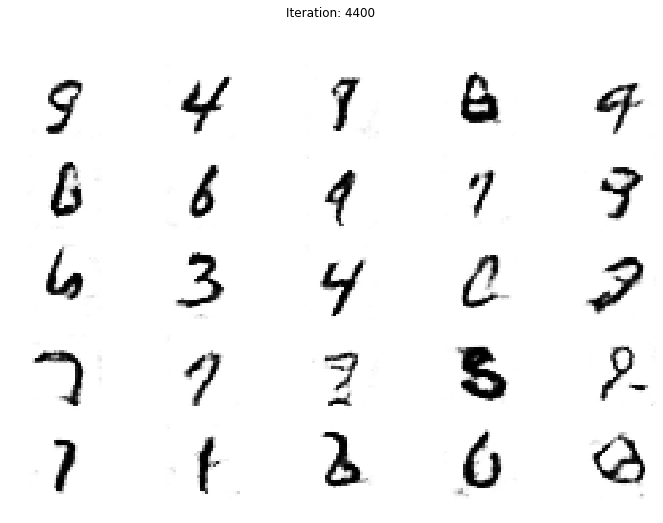

Iteration:  4401 [D loss: 0.71585, acc.:  50.78%] [G loss: 0.80022]
Iteration:  4402 [D loss: 0.71639, acc.:  46.88%] [G loss: 0.80505]
Iteration:  4403 [D loss: 0.72758, acc.:  47.27%] [G loss: 0.75112]
Iteration:  4404 [D loss: 0.72253, acc.:  49.22%] [G loss: 0.78536]
Iteration:  4405 [D loss: 0.71669, acc.:  49.61%] [G loss: 0.80738]
Iteration:  4406 [D loss: 0.68073, acc.:  55.08%] [G loss: 0.79896]
Iteration:  4407 [D loss: 0.71013, acc.:  53.91%] [G loss: 0.78122]
Iteration:  4408 [D loss: 0.68676, acc.:  55.47%] [G loss: 0.77483]
Iteration:  4409 [D loss: 0.69217, acc.:  55.47%] [G loss: 0.77890]
Iteration:  4410 [D loss: 0.70471, acc.:  47.66%] [G loss: 0.78250]
Iteration:  4411 [D loss: 0.71894, acc.:  50.00%] [G loss: 0.77093]
Iteration:  4412 [D loss: 0.73321, acc.:  48.83%] [G loss: 0.72335]
Iteration:  4413 [D loss: 0.67328, acc.:  55.86%] [G loss: 0.73469]
Iteration:  4414 [D loss: 0.70343, acc.:  53.12%] [G loss: 0.77948]
Iteration:  4415 [D loss: 0.71288, acc.:  49.22%

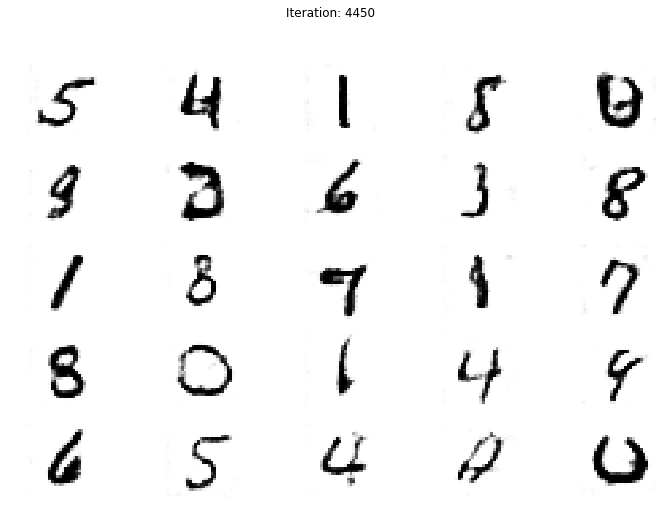

Iteration:  4451 [D loss: 0.71481, acc.:  50.39%] [G loss: 0.77078]
Iteration:  4452 [D loss: 0.71504, acc.:  49.22%] [G loss: 0.80137]
Iteration:  4453 [D loss: 0.69373, acc.:  50.39%] [G loss: 0.81084]
Iteration:  4454 [D loss: 0.70189, acc.:  53.12%] [G loss: 0.79139]
Iteration:  4455 [D loss: 0.71827, acc.:  48.44%] [G loss: 0.78612]
Iteration:  4456 [D loss: 0.70054, acc.:  53.12%] [G loss: 0.78129]
Iteration:  4457 [D loss: 0.72164, acc.:  46.48%] [G loss: 0.78248]
Iteration:  4458 [D loss: 0.71359, acc.:  46.88%] [G loss: 0.76209]
Iteration:  4459 [D loss: 0.69688, acc.:  52.73%] [G loss: 0.78777]
Iteration:  4460 [D loss: 0.69342, acc.:  53.52%] [G loss: 0.76093]
Iteration:  4461 [D loss: 0.70574, acc.:  51.56%] [G loss: 0.76047]
Iteration:  4462 [D loss: 0.70315, acc.:  47.27%] [G loss: 0.79335]
Iteration:  4463 [D loss: 0.70476, acc.:  52.34%] [G loss: 0.77934]
Iteration:  4464 [D loss: 0.70688, acc.:  50.00%] [G loss: 0.79330]
Iteration:  4465 [D loss: 0.71801, acc.:  48.44%

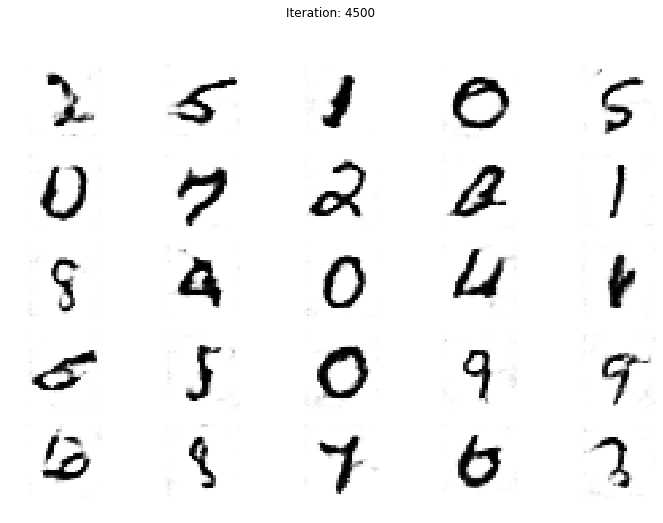

Iteration:  4501 [D loss: 0.72592, acc.:  50.78%] [G loss: 0.80502]
Iteration:  4502 [D loss: 0.73085, acc.:  44.92%] [G loss: 0.79379]
Iteration:  4503 [D loss: 0.65795, acc.:  59.77%] [G loss: 0.80062]
Iteration:  4504 [D loss: 0.72028, acc.:  47.27%] [G loss: 0.77313]
Iteration:  4505 [D loss: 0.74090, acc.:  41.80%] [G loss: 0.80166]
Iteration:  4506 [D loss: 0.69102, acc.:  51.17%] [G loss: 0.80951]
Iteration:  4507 [D loss: 0.69314, acc.:  54.30%] [G loss: 0.76420]
Iteration:  4508 [D loss: 0.73774, acc.:  42.58%] [G loss: 0.78715]
Iteration:  4509 [D loss: 0.68024, acc.:  58.59%] [G loss: 0.79279]
Iteration:  4510 [D loss: 0.71289, acc.:  47.66%] [G loss: 0.77721]
Iteration:  4511 [D loss: 0.70333, acc.:  54.30%] [G loss: 0.82632]
Iteration:  4512 [D loss: 0.75020, acc.:  41.80%] [G loss: 0.76697]
Iteration:  4513 [D loss: 0.68227, acc.:  55.86%] [G loss: 0.79059]
Iteration:  4514 [D loss: 0.71939, acc.:  47.27%] [G loss: 0.78656]
Iteration:  4515 [D loss: 0.72834, acc.:  45.31%

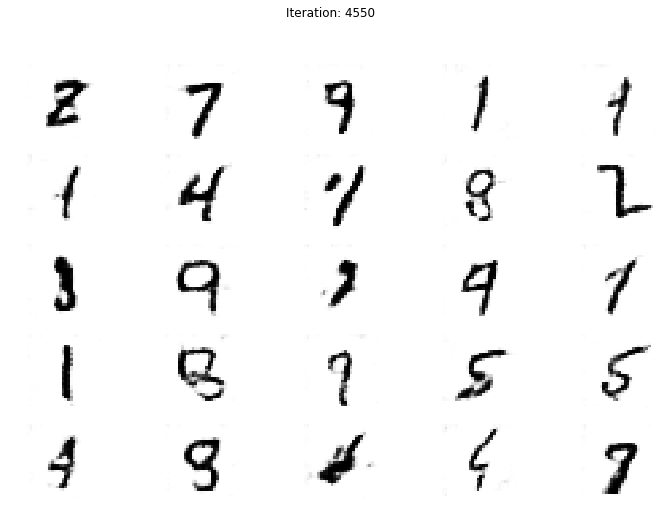

Iteration:  4551 [D loss: 0.68083, acc.:  56.25%] [G loss: 0.79623]
Iteration:  4552 [D loss: 0.71324, acc.:  49.61%] [G loss: 0.76219]
Iteration:  4553 [D loss: 0.69521, acc.:  53.91%] [G loss: 0.78465]
Iteration:  4554 [D loss: 0.68726, acc.:  55.86%] [G loss: 0.76940]
Iteration:  4555 [D loss: 0.70151, acc.:  49.61%] [G loss: 0.81921]
Iteration:  4556 [D loss: 0.74235, acc.:  42.19%] [G loss: 0.78327]
Iteration:  4557 [D loss: 0.72154, acc.:  50.39%] [G loss: 0.74971]
Iteration:  4558 [D loss: 0.71572, acc.:  52.73%] [G loss: 0.81388]
Iteration:  4559 [D loss: 0.69871, acc.:  53.52%] [G loss: 0.75409]
Iteration:  4560 [D loss: 0.72676, acc.:  49.22%] [G loss: 0.77136]
Iteration:  4561 [D loss: 0.70944, acc.:  50.78%] [G loss: 0.76844]
Iteration:  4562 [D loss: 0.69792, acc.:  52.73%] [G loss: 0.78423]
Iteration:  4563 [D loss: 0.70112, acc.:  50.00%] [G loss: 0.81579]
Iteration:  4564 [D loss: 0.71861, acc.:  49.61%] [G loss: 0.80962]
Iteration:  4565 [D loss: 0.68766, acc.:  53.12%

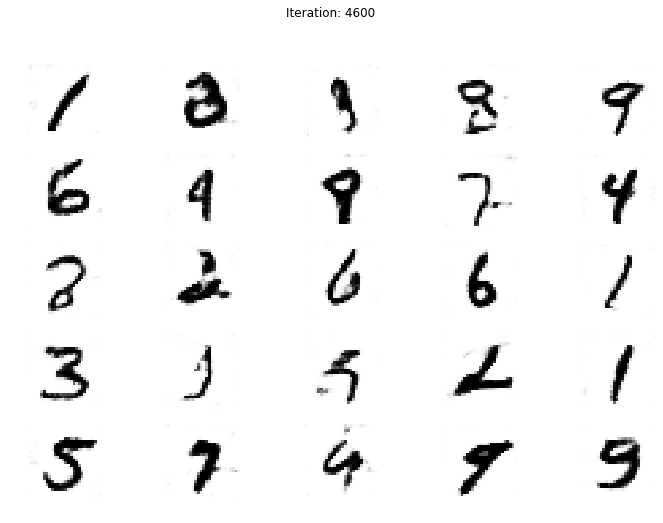

Iteration:  4601 [D loss: 0.73256, acc.:  44.53%] [G loss: 0.76154]
Iteration:  4602 [D loss: 0.71473, acc.:  51.56%] [G loss: 0.78071]
Iteration:  4603 [D loss: 0.70375, acc.:  48.44%] [G loss: 0.76747]
Iteration:  4604 [D loss: 0.72440, acc.:  48.44%] [G loss: 0.77536]
Iteration:  4605 [D loss: 0.72491, acc.:  48.05%] [G loss: 0.73607]
Iteration:  4606 [D loss: 0.71442, acc.:  50.78%] [G loss: 0.77205]
Iteration:  4607 [D loss: 0.72038, acc.:  48.83%] [G loss: 0.78333]
Iteration:  4608 [D loss: 0.70033, acc.:  54.30%] [G loss: 0.78797]
Iteration:  4609 [D loss: 0.73309, acc.:  47.66%] [G loss: 0.79403]
Iteration:  4610 [D loss: 0.70297, acc.:  52.73%] [G loss: 0.80512]
Iteration:  4611 [D loss: 0.70681, acc.:  53.12%] [G loss: 0.78811]
Iteration:  4612 [D loss: 0.71623, acc.:  49.61%] [G loss: 0.81681]
Iteration:  4613 [D loss: 0.72355, acc.:  50.00%] [G loss: 0.77581]
Iteration:  4614 [D loss: 0.72514, acc.:  48.05%] [G loss: 0.78601]
Iteration:  4615 [D loss: 0.69608, acc.:  53.12%

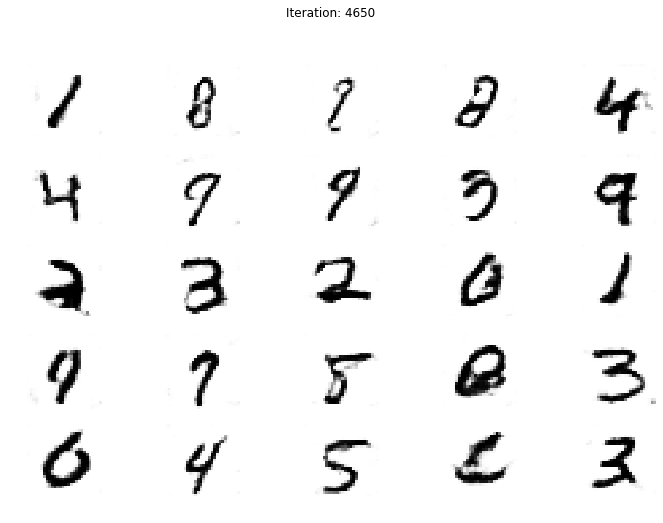

Iteration:  4651 [D loss: 0.69313, acc.:  50.39%] [G loss: 0.77681]
Iteration:  4652 [D loss: 0.68636, acc.:  58.98%] [G loss: 0.78118]
Iteration:  4653 [D loss: 0.69931, acc.:  53.52%] [G loss: 0.77861]
Iteration:  4654 [D loss: 0.71702, acc.:  48.44%] [G loss: 0.80781]
Iteration:  4655 [D loss: 0.72415, acc.:  45.70%] [G loss: 0.79638]
Iteration:  4656 [D loss: 0.71879, acc.:  47.66%] [G loss: 0.80350]
Iteration:  4657 [D loss: 0.71206, acc.:  51.95%] [G loss: 0.75226]
Iteration:  4658 [D loss: 0.70550, acc.:  52.34%] [G loss: 0.79766]
Iteration:  4659 [D loss: 0.70995, acc.:  50.78%] [G loss: 0.79905]
Iteration:  4660 [D loss: 0.69488, acc.:  55.08%] [G loss: 0.77986]
Iteration:  4661 [D loss: 0.69868, acc.:  49.22%] [G loss: 0.76924]
Iteration:  4662 [D loss: 0.70236, acc.:  53.52%] [G loss: 0.79003]
Iteration:  4663 [D loss: 0.70653, acc.:  53.12%] [G loss: 0.81147]
Iteration:  4664 [D loss: 0.71817, acc.:  52.34%] [G loss: 0.79960]
Iteration:  4665 [D loss: 0.71106, acc.:  50.39%

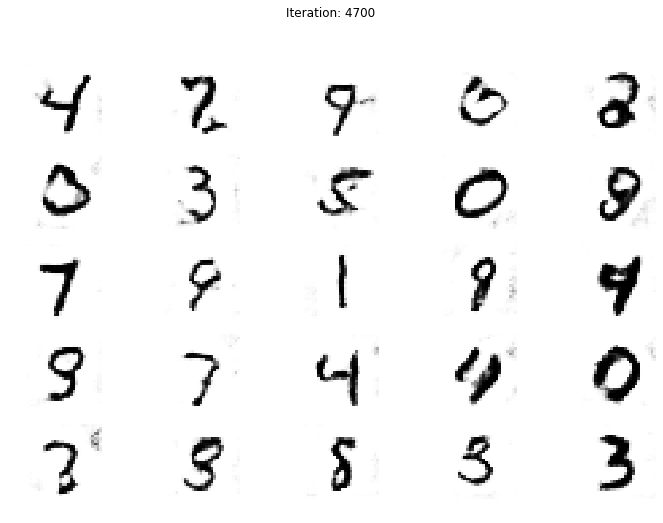

Iteration:  4701 [D loss: 0.71022, acc.:  48.44%] [G loss: 0.80042]
Iteration:  4702 [D loss: 0.70436, acc.:  50.78%] [G loss: 0.78572]
Iteration:  4703 [D loss: 0.70115, acc.:  53.52%] [G loss: 0.77747]
Iteration:  4704 [D loss: 0.72354, acc.:  47.66%] [G loss: 0.82116]
Iteration:  4705 [D loss: 0.72035, acc.:  50.00%] [G loss: 0.81061]
Iteration:  4706 [D loss: 0.68243, acc.:  57.42%] [G loss: 0.79478]
Iteration:  4707 [D loss: 0.69328, acc.:  50.78%] [G loss: 0.77027]
Iteration:  4708 [D loss: 0.69656, acc.:  51.95%] [G loss: 0.79792]
Iteration:  4709 [D loss: 0.70324, acc.:  53.52%] [G loss: 0.80560]
Iteration:  4710 [D loss: 0.72073, acc.:  43.75%] [G loss: 0.79450]
Iteration:  4711 [D loss: 0.72044, acc.:  51.17%] [G loss: 0.78783]
Iteration:  4712 [D loss: 0.71220, acc.:  46.48%] [G loss: 0.74482]
Iteration:  4713 [D loss: 0.70643, acc.:  53.52%] [G loss: 0.78683]
Iteration:  4714 [D loss: 0.69330, acc.:  54.30%] [G loss: 0.77226]
Iteration:  4715 [D loss: 0.70059, acc.:  49.61%

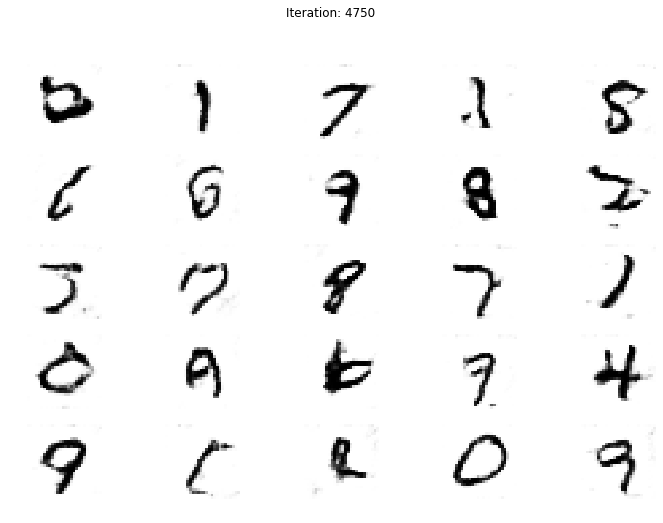

Iteration:  4751 [D loss: 0.68710, acc.:  57.42%] [G loss: 0.78184]
Iteration:  4752 [D loss: 0.71022, acc.:  48.05%] [G loss: 0.79172]
Iteration:  4753 [D loss: 0.70841, acc.:  48.05%] [G loss: 0.74963]
Iteration:  4754 [D loss: 0.70608, acc.:  53.12%] [G loss: 0.72831]
Iteration:  4755 [D loss: 0.68924, acc.:  54.69%] [G loss: 0.78673]
Iteration:  4756 [D loss: 0.70465, acc.:  52.73%] [G loss: 0.78106]
Iteration:  4757 [D loss: 0.70022, acc.:  51.56%] [G loss: 0.77346]
Iteration:  4758 [D loss: 0.70885, acc.:  50.78%] [G loss: 0.76959]
Iteration:  4759 [D loss: 0.73776, acc.:  49.61%] [G loss: 0.77368]
Iteration:  4760 [D loss: 0.72372, acc.:  48.44%] [G loss: 0.76305]
Iteration:  4761 [D loss: 0.70443, acc.:  53.52%] [G loss: 0.76584]
Iteration:  4762 [D loss: 0.70888, acc.:  48.44%] [G loss: 0.78547]
Iteration:  4763 [D loss: 0.70835, acc.:  51.17%] [G loss: 0.77059]
Iteration:  4764 [D loss: 0.71613, acc.:  48.05%] [G loss: 0.77419]
Iteration:  4765 [D loss: 0.71793, acc.:  44.53%

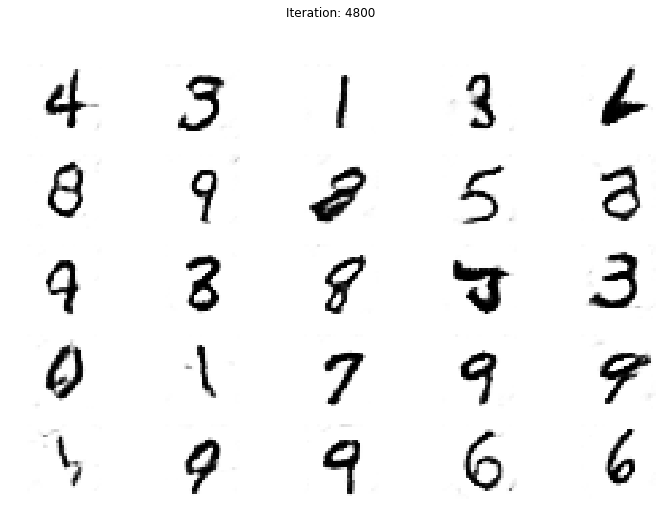

Iteration:  4801 [D loss: 0.71562, acc.:  47.66%] [G loss: 0.79942]
Iteration:  4802 [D loss: 0.73544, acc.:  50.39%] [G loss: 0.80473]
Iteration:  4803 [D loss: 0.71900, acc.:  50.39%] [G loss: 0.79269]
Iteration:  4804 [D loss: 0.72140, acc.:  45.70%] [G loss: 0.75538]
Iteration:  4805 [D loss: 0.69948, acc.:  52.73%] [G loss: 0.76075]
Iteration:  4806 [D loss: 0.70348, acc.:  51.56%] [G loss: 0.74336]
Iteration:  4807 [D loss: 0.72340, acc.:  47.27%] [G loss: 0.79386]
Iteration:  4808 [D loss: 0.69410, acc.:  53.12%] [G loss: 0.76858]
Iteration:  4809 [D loss: 0.70157, acc.:  53.91%] [G loss: 0.78358]
Iteration:  4810 [D loss: 0.70151, acc.:  51.17%] [G loss: 0.78709]
Iteration:  4811 [D loss: 0.71265, acc.:  47.66%] [G loss: 0.76403]
Iteration:  4812 [D loss: 0.74305, acc.:  45.70%] [G loss: 0.78482]
Iteration:  4813 [D loss: 0.71859, acc.:  47.27%] [G loss: 0.75684]
Iteration:  4814 [D loss: 0.71781, acc.:  44.14%] [G loss: 0.74769]
Iteration:  4815 [D loss: 0.72507, acc.:  50.39%

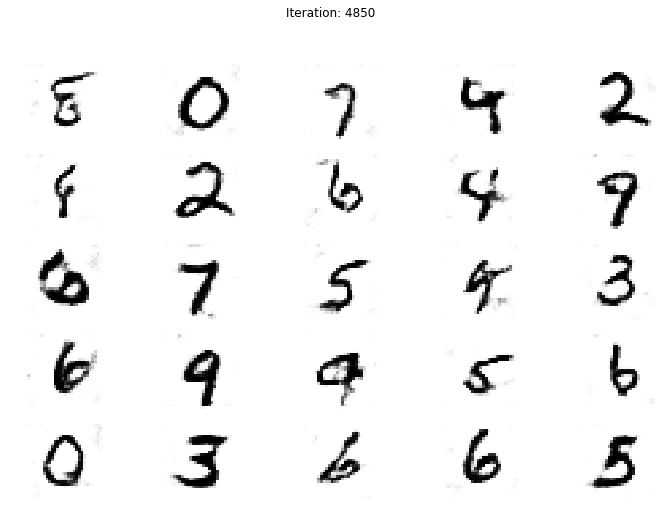

Iteration:  4851 [D loss: 0.69439, acc.:  57.03%] [G loss: 0.78396]
Iteration:  4852 [D loss: 0.70931, acc.:  50.39%] [G loss: 0.79677]
Iteration:  4853 [D loss: 0.69626, acc.:  51.56%] [G loss: 0.82328]
Iteration:  4854 [D loss: 0.68973, acc.:  55.86%] [G loss: 0.79865]
Iteration:  4855 [D loss: 0.71563, acc.:  48.83%] [G loss: 0.80027]
Iteration:  4856 [D loss: 0.69258, acc.:  52.34%] [G loss: 0.81053]
Iteration:  4857 [D loss: 0.71163, acc.:  49.61%] [G loss: 0.78607]
Iteration:  4858 [D loss: 0.70777, acc.:  48.44%] [G loss: 0.76169]
Iteration:  4859 [D loss: 0.70830, acc.:  50.39%] [G loss: 0.76579]
Iteration:  4860 [D loss: 0.73552, acc.:  46.09%] [G loss: 0.81308]
Iteration:  4861 [D loss: 0.70800, acc.:  50.39%] [G loss: 0.76851]
Iteration:  4862 [D loss: 0.70439, acc.:  54.30%] [G loss: 0.81785]
Iteration:  4863 [D loss: 0.69976, acc.:  50.78%] [G loss: 0.77582]
Iteration:  4864 [D loss: 0.74611, acc.:  45.70%] [G loss: 0.72321]
Iteration:  4865 [D loss: 0.70891, acc.:  50.78%

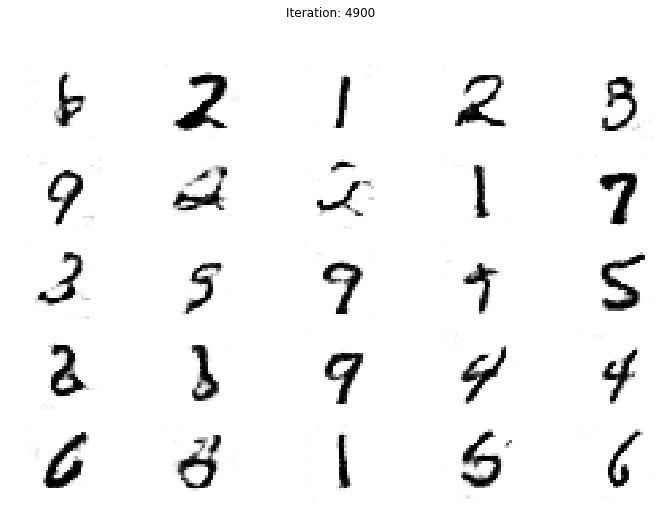

Iteration:  4901 [D loss: 0.71092, acc.:  50.39%] [G loss: 0.77314]
Iteration:  4902 [D loss: 0.68569, acc.:  53.12%] [G loss: 0.78329]
Iteration:  4903 [D loss: 0.72967, acc.:  46.09%] [G loss: 0.78362]
Iteration:  4904 [D loss: 0.70939, acc.:  49.61%] [G loss: 0.78711]
Iteration:  4905 [D loss: 0.68838, acc.:  55.47%] [G loss: 0.76246]
Iteration:  4906 [D loss: 0.69446, acc.:  53.91%] [G loss: 0.77414]
Iteration:  4907 [D loss: 0.73737, acc.:  46.09%] [G loss: 0.81613]
Iteration:  4908 [D loss: 0.68934, acc.:  52.34%] [G loss: 0.75484]
Iteration:  4909 [D loss: 0.71476, acc.:  45.31%] [G loss: 0.77850]
Iteration:  4910 [D loss: 0.71254, acc.:  49.22%] [G loss: 0.75633]
Iteration:  4911 [D loss: 0.72409, acc.:  44.14%] [G loss: 0.77208]
Iteration:  4912 [D loss: 0.71488, acc.:  49.22%] [G loss: 0.76394]
Iteration:  4913 [D loss: 0.70512, acc.:  52.34%] [G loss: 0.80973]
Iteration:  4914 [D loss: 0.69351, acc.:  54.69%] [G loss: 0.77425]
Iteration:  4915 [D loss: 0.67897, acc.:  58.98%

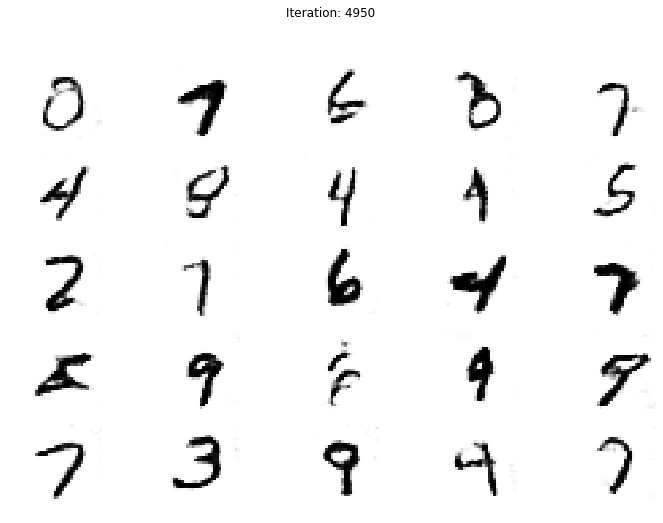

Iteration:  4951 [D loss: 0.71379, acc.:  50.78%] [G loss: 0.78098]
Iteration:  4952 [D loss: 0.70354, acc.:  53.12%] [G loss: 0.80158]
Iteration:  4953 [D loss: 0.73062, acc.:  46.48%] [G loss: 0.80063]
Iteration:  4954 [D loss: 0.71077, acc.:  51.56%] [G loss: 0.74867]
Iteration:  4955 [D loss: 0.70067, acc.:  52.34%] [G loss: 0.76432]
Iteration:  4956 [D loss: 0.71057, acc.:  50.78%] [G loss: 0.77592]
Iteration:  4957 [D loss: 0.70700, acc.:  49.61%] [G loss: 0.78920]
Iteration:  4958 [D loss: 0.71456, acc.:  51.56%] [G loss: 0.79209]
Iteration:  4959 [D loss: 0.70934, acc.:  50.00%] [G loss: 0.77821]
Iteration:  4960 [D loss: 0.68340, acc.:  56.25%] [G loss: 0.84395]
Iteration:  4961 [D loss: 0.70752, acc.:  52.34%] [G loss: 0.79183]
Iteration:  4962 [D loss: 0.70978, acc.:  52.73%] [G loss: 0.79517]
Iteration:  4963 [D loss: 0.71039, acc.:  49.22%] [G loss: 0.78633]
Iteration:  4964 [D loss: 0.72443, acc.:  48.83%] [G loss: 0.78208]
Iteration:  4965 [D loss: 0.72763, acc.:  48.05%

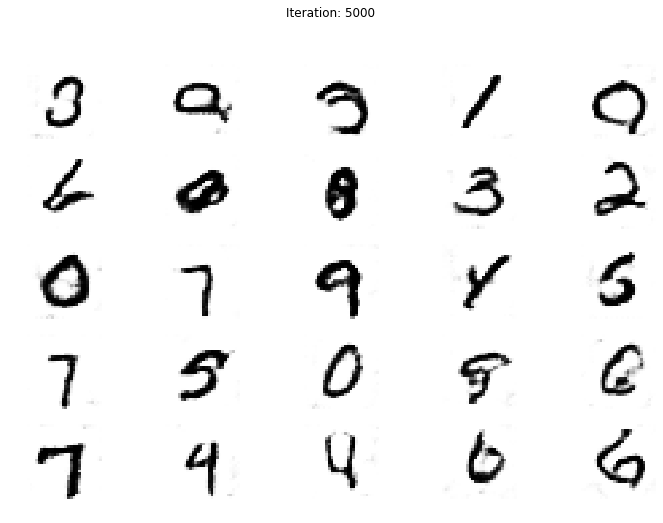

Iteration:  5001 [D loss: 0.69374, acc.:  56.25%] [G loss: 0.78481]
Iteration:  5002 [D loss: 0.72127, acc.:  46.48%] [G loss: 0.79953]
Iteration:  5003 [D loss: 0.71875, acc.:  45.31%] [G loss: 0.76299]
Iteration:  5004 [D loss: 0.71090, acc.:  54.30%] [G loss: 0.79222]
Iteration:  5005 [D loss: 0.71362, acc.:  51.17%] [G loss: 0.78839]
Iteration:  5006 [D loss: 0.71248, acc.:  48.44%] [G loss: 0.78889]
Iteration:  5007 [D loss: 0.71969, acc.:  46.88%] [G loss: 0.78132]
Iteration:  5008 [D loss: 0.69733, acc.:  51.95%] [G loss: 0.80219]
Iteration:  5009 [D loss: 0.69932, acc.:  52.73%] [G loss: 0.78711]
Iteration:  5010 [D loss: 0.71176, acc.:  49.61%] [G loss: 0.77718]
Iteration:  5011 [D loss: 0.70825, acc.:  48.05%] [G loss: 0.78176]
Iteration:  5012 [D loss: 0.68508, acc.:  56.25%] [G loss: 0.78101]
Iteration:  5013 [D loss: 0.70346, acc.:  52.73%] [G loss: 0.77384]
Iteration:  5014 [D loss: 0.68365, acc.:  52.34%] [G loss: 0.81232]
Iteration:  5015 [D loss: 0.73275, acc.:  47.66%

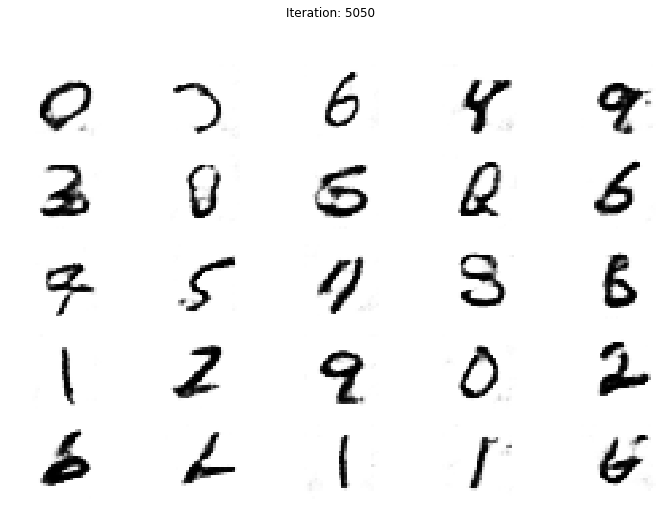

Iteration:  5051 [D loss: 0.71826, acc.:  46.48%] [G loss: 0.80046]
Iteration:  5052 [D loss: 0.69549, acc.:  53.52%] [G loss: 0.75868]
Iteration:  5053 [D loss: 0.72096, acc.:  47.66%] [G loss: 0.76326]
Iteration:  5054 [D loss: 0.69791, acc.:  54.69%] [G loss: 0.76586]
Iteration:  5055 [D loss: 0.71742, acc.:  48.83%] [G loss: 0.73707]
Iteration:  5056 [D loss: 0.69533, acc.:  53.12%] [G loss: 0.74331]
Iteration:  5057 [D loss: 0.68557, acc.:  57.81%] [G loss: 0.80050]
Iteration:  5058 [D loss: 0.71562, acc.:  47.66%] [G loss: 0.76443]
Iteration:  5059 [D loss: 0.72303, acc.:  48.44%] [G loss: 0.80703]
Iteration:  5060 [D loss: 0.68193, acc.:  55.47%] [G loss: 0.79183]
Iteration:  5061 [D loss: 0.71452, acc.:  50.39%] [G loss: 0.77807]
Iteration:  5062 [D loss: 0.71240, acc.:  49.22%] [G loss: 0.82312]
Iteration:  5063 [D loss: 0.72139, acc.:  48.05%] [G loss: 0.78834]
Iteration:  5064 [D loss: 0.69493, acc.:  52.34%] [G loss: 0.78056]
Iteration:  5065 [D loss: 0.72054, acc.:  46.09%

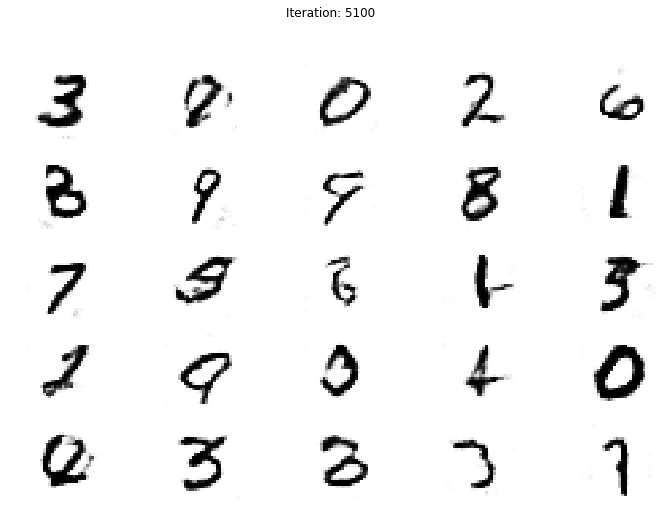

Iteration:  5101 [D loss: 0.70085, acc.:  53.91%] [G loss: 0.81279]
Iteration:  5102 [D loss: 0.70051, acc.:  50.39%] [G loss: 0.83637]
Iteration:  5103 [D loss: 0.73391, acc.:  47.66%] [G loss: 0.80370]
Iteration:  5104 [D loss: 0.69658, acc.:  52.73%] [G loss: 0.80096]
Iteration:  5105 [D loss: 0.69801, acc.:  53.91%] [G loss: 0.80128]
Iteration:  5106 [D loss: 0.69630, acc.:  53.52%] [G loss: 0.81361]
Iteration:  5107 [D loss: 0.71962, acc.:  47.66%] [G loss: 0.75436]
Iteration:  5108 [D loss: 0.71028, acc.:  50.78%] [G loss: 0.82613]
Iteration:  5109 [D loss: 0.71539, acc.:  50.39%] [G loss: 0.75909]
Iteration:  5110 [D loss: 0.70977, acc.:  53.12%] [G loss: 0.77698]
Iteration:  5111 [D loss: 0.70699, acc.:  50.39%] [G loss: 0.79566]
Iteration:  5112 [D loss: 0.69806, acc.:  53.52%] [G loss: 0.78271]
Iteration:  5113 [D loss: 0.72548, acc.:  50.39%] [G loss: 0.79183]
Iteration:  5114 [D loss: 0.73382, acc.:  44.92%] [G loss: 0.75721]
Iteration:  5115 [D loss: 0.69820, acc.:  52.73%

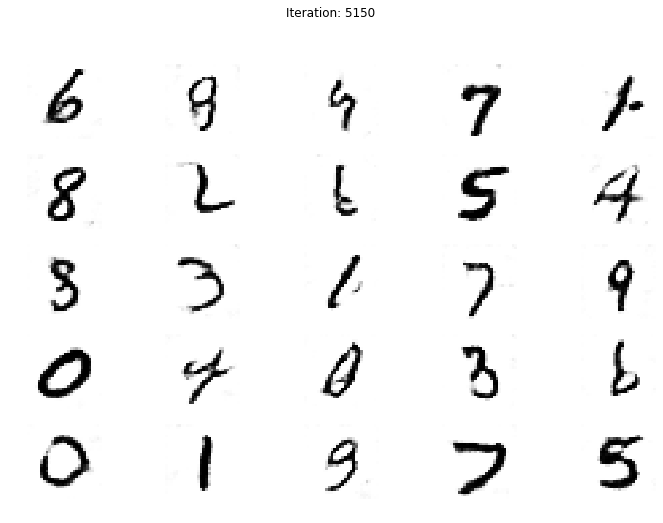

Iteration:  5151 [D loss: 0.71565, acc.:  49.61%] [G loss: 0.76127]
Iteration:  5152 [D loss: 0.69519, acc.:  55.08%] [G loss: 0.73203]
Iteration:  5153 [D loss: 0.72117, acc.:  48.44%] [G loss: 0.76994]
Iteration:  5154 [D loss: 0.74187, acc.:  42.97%] [G loss: 0.77161]
Iteration:  5155 [D loss: 0.69788, acc.:  52.73%] [G loss: 0.80022]
Iteration:  5156 [D loss: 0.70703, acc.:  50.00%] [G loss: 0.78849]
Iteration:  5157 [D loss: 0.71693, acc.:  47.27%] [G loss: 0.76884]
Iteration:  5158 [D loss: 0.69535, acc.:  53.12%] [G loss: 0.74945]
Iteration:  5159 [D loss: 0.69624, acc.:  50.78%] [G loss: 0.75749]
Iteration:  5160 [D loss: 0.68966, acc.:  54.30%] [G loss: 0.80043]
Iteration:  5161 [D loss: 0.73895, acc.:  41.80%] [G loss: 0.77841]
Iteration:  5162 [D loss: 0.70043, acc.:  51.56%] [G loss: 0.75863]
Iteration:  5163 [D loss: 0.69824, acc.:  52.73%] [G loss: 0.75949]
Iteration:  5164 [D loss: 0.71066, acc.:  52.34%] [G loss: 0.77494]
Iteration:  5165 [D loss: 0.71089, acc.:  50.00%

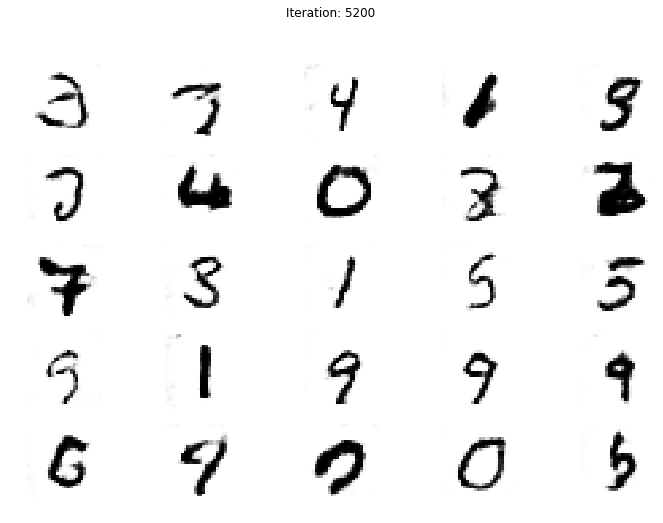

Iteration:  5201 [D loss: 0.71457, acc.:  49.22%] [G loss: 0.76318]
Iteration:  5202 [D loss: 0.70374, acc.:  48.05%] [G loss: 0.75169]
Iteration:  5203 [D loss: 0.70433, acc.:  52.34%] [G loss: 0.79326]
Iteration:  5204 [D loss: 0.71188, acc.:  50.39%] [G loss: 0.77643]
Iteration:  5205 [D loss: 0.71335, acc.:  49.22%] [G loss: 0.74481]
Iteration:  5206 [D loss: 0.71990, acc.:  49.22%] [G loss: 0.72130]
Iteration:  5207 [D loss: 0.70876, acc.:  54.69%] [G loss: 0.74967]
Iteration:  5208 [D loss: 0.70337, acc.:  49.61%] [G loss: 0.73211]
Iteration:  5209 [D loss: 0.73294, acc.:  46.09%] [G loss: 0.75413]
Iteration:  5210 [D loss: 0.71510, acc.:  47.27%] [G loss: 0.79835]
Iteration:  5211 [D loss: 0.69386, acc.:  55.08%] [G loss: 0.78701]
Iteration:  5212 [D loss: 0.68682, acc.:  55.08%] [G loss: 0.74336]
Iteration:  5213 [D loss: 0.69770, acc.:  51.56%] [G loss: 0.79056]
Iteration:  5214 [D loss: 0.69734, acc.:  52.73%] [G loss: 0.75778]
Iteration:  5215 [D loss: 0.68719, acc.:  56.25%

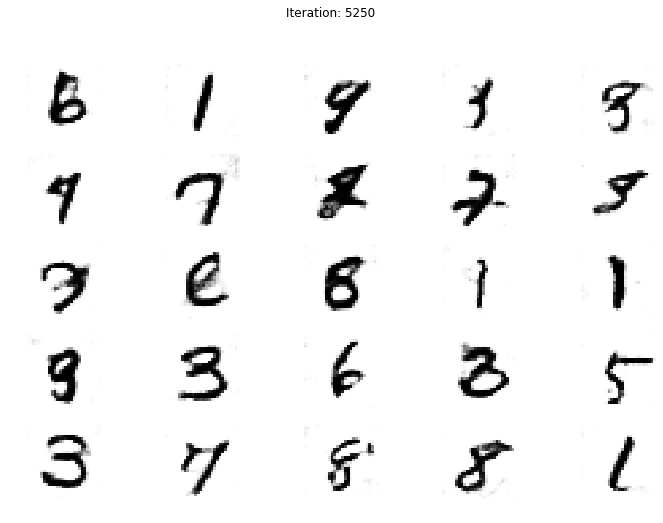

Iteration:  5251 [D loss: 0.68120, acc.:  57.81%] [G loss: 0.77830]
Iteration:  5252 [D loss: 0.72179, acc.:  50.39%] [G loss: 0.77797]
Iteration:  5253 [D loss: 0.74365, acc.:  41.80%] [G loss: 0.79482]
Iteration:  5254 [D loss: 0.72458, acc.:  50.00%] [G loss: 0.78526]
Iteration:  5255 [D loss: 0.71000, acc.:  49.61%] [G loss: 0.77470]
Iteration:  5256 [D loss: 0.70275, acc.:  49.22%] [G loss: 0.76459]
Iteration:  5257 [D loss: 0.70310, acc.:  50.00%] [G loss: 0.79271]
Iteration:  5258 [D loss: 0.72194, acc.:  50.78%] [G loss: 0.77567]
Iteration:  5259 [D loss: 0.70456, acc.:  48.44%] [G loss: 0.78158]
Iteration:  5260 [D loss: 0.69113, acc.:  57.03%] [G loss: 0.76789]
Iteration:  5261 [D loss: 0.69845, acc.:  51.95%] [G loss: 0.77599]
Iteration:  5262 [D loss: 0.71136, acc.:  49.61%] [G loss: 0.81767]
Iteration:  5263 [D loss: 0.70831, acc.:  51.17%] [G loss: 0.78698]
Iteration:  5264 [D loss: 0.73378, acc.:  44.53%] [G loss: 0.78875]
Iteration:  5265 [D loss: 0.72322, acc.:  48.44%

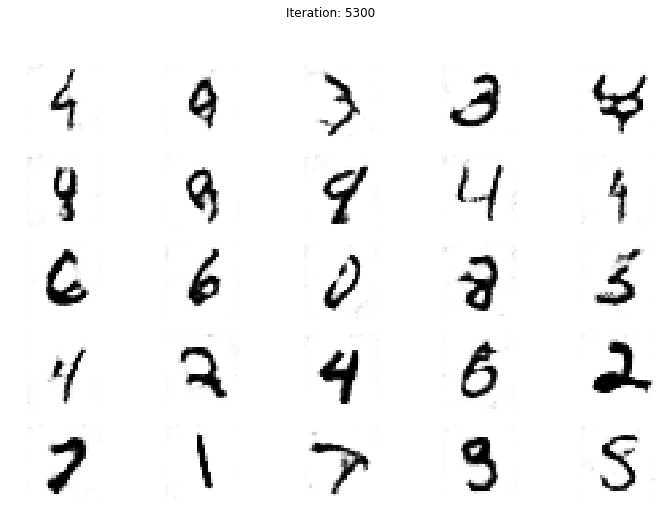

Iteration:  5301 [D loss: 0.73381, acc.:  44.14%] [G loss: 0.73035]
Iteration:  5302 [D loss: 0.72841, acc.:  47.27%] [G loss: 0.78951]
Iteration:  5303 [D loss: 0.72910, acc.:  46.09%] [G loss: 0.78451]
Iteration:  5304 [D loss: 0.69872, acc.:  51.95%] [G loss: 0.75017]
Iteration:  5305 [D loss: 0.72964, acc.:  46.88%] [G loss: 0.79992]
Iteration:  5306 [D loss: 0.69784, acc.:  54.30%] [G loss: 0.80560]
Iteration:  5307 [D loss: 0.70670, acc.:  51.95%] [G loss: 0.82910]
Iteration:  5308 [D loss: 0.71544, acc.:  50.00%] [G loss: 0.79646]
Iteration:  5309 [D loss: 0.69134, acc.:  52.73%] [G loss: 0.83050]
Iteration:  5310 [D loss: 0.69714, acc.:  54.30%] [G loss: 0.80463]
Iteration:  5311 [D loss: 0.69254, acc.:  55.47%] [G loss: 0.77992]
Iteration:  5312 [D loss: 0.69459, acc.:  54.69%] [G loss: 0.82516]
Iteration:  5313 [D loss: 0.71808, acc.:  50.39%] [G loss: 0.80702]
Iteration:  5314 [D loss: 0.69095, acc.:  53.12%] [G loss: 0.75772]
Iteration:  5315 [D loss: 0.72394, acc.:  46.48%

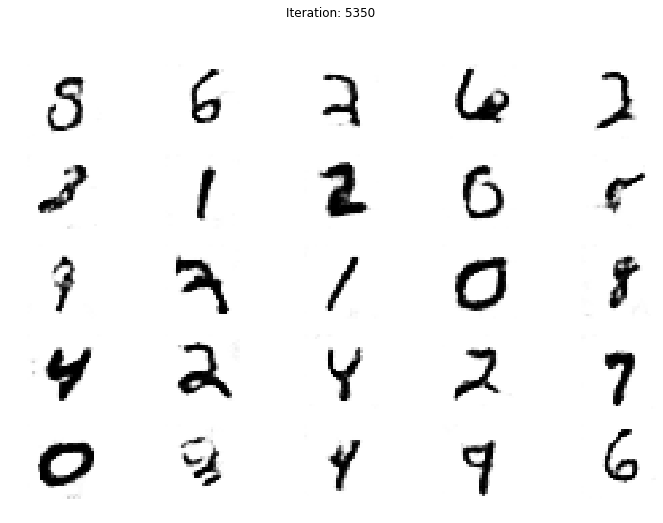

Iteration:  5351 [D loss: 0.71114, acc.:  50.00%] [G loss: 0.81163]
Iteration:  5352 [D loss: 0.66589, acc.:  62.11%] [G loss: 0.80643]
Iteration:  5353 [D loss: 0.70106, acc.:  50.39%] [G loss: 0.76825]
Iteration:  5354 [D loss: 0.69741, acc.:  49.22%] [G loss: 0.75379]
Iteration:  5355 [D loss: 0.71433, acc.:  47.27%] [G loss: 0.76242]
Iteration:  5356 [D loss: 0.68757, acc.:  55.47%] [G loss: 0.78430]
Iteration:  5357 [D loss: 0.71299, acc.:  52.73%] [G loss: 0.75443]
Iteration:  5358 [D loss: 0.71633, acc.:  46.09%] [G loss: 0.79324]
Iteration:  5359 [D loss: 0.70946, acc.:  52.34%] [G loss: 0.79851]
Iteration:  5360 [D loss: 0.71034, acc.:  49.22%] [G loss: 0.77940]
Iteration:  5361 [D loss: 0.69814, acc.:  55.08%] [G loss: 0.73662]
Iteration:  5362 [D loss: 0.69753, acc.:  52.34%] [G loss: 0.78321]
Iteration:  5363 [D loss: 0.68839, acc.:  51.95%] [G loss: 0.81333]
Iteration:  5364 [D loss: 0.72543, acc.:  44.92%] [G loss: 0.78838]
Iteration:  5365 [D loss: 0.67373, acc.:  55.86%

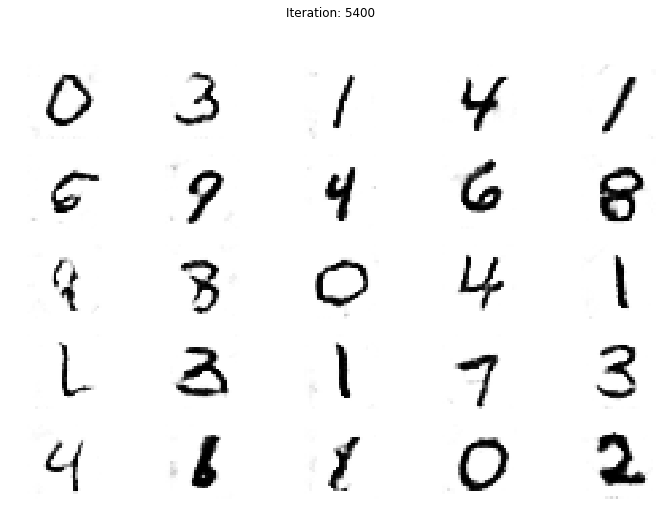

Iteration:  5401 [D loss: 0.70923, acc.:  48.83%] [G loss: 0.75470]
Iteration:  5402 [D loss: 0.68551, acc.:  55.47%] [G loss: 0.77922]
Iteration:  5403 [D loss: 0.69606, acc.:  52.73%] [G loss: 0.78978]
Iteration:  5404 [D loss: 0.68169, acc.:  53.12%] [G loss: 0.78636]
Iteration:  5405 [D loss: 0.69707, acc.:  56.64%] [G loss: 0.79537]
Iteration:  5406 [D loss: 0.71124, acc.:  46.48%] [G loss: 0.82904]
Iteration:  5407 [D loss: 0.70918, acc.:  49.61%] [G loss: 0.75884]
Iteration:  5408 [D loss: 0.68082, acc.:  60.16%] [G loss: 0.75277]
Iteration:  5409 [D loss: 0.69917, acc.:  49.61%] [G loss: 0.82963]
Iteration:  5410 [D loss: 0.70587, acc.:  51.17%] [G loss: 0.79305]
Iteration:  5411 [D loss: 0.68647, acc.:  55.47%] [G loss: 0.79133]
Iteration:  5412 [D loss: 0.70780, acc.:  50.39%] [G loss: 0.77881]
Iteration:  5413 [D loss: 0.72680, acc.:  44.53%] [G loss: 0.77021]
Iteration:  5414 [D loss: 0.73922, acc.:  42.97%] [G loss: 0.76914]
Iteration:  5415 [D loss: 0.71989, acc.:  46.09%

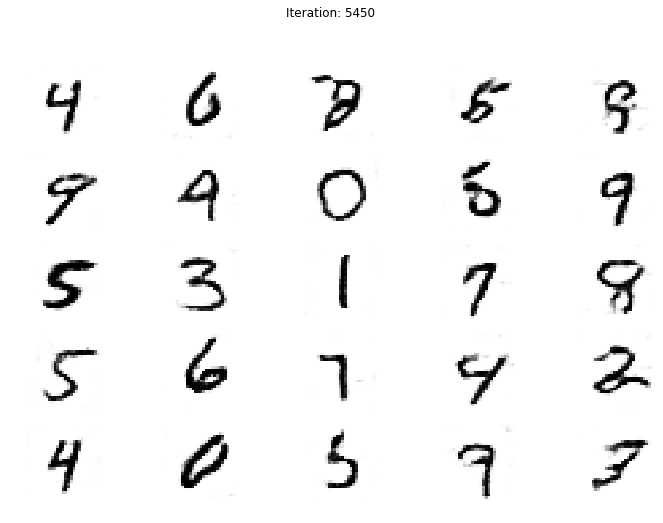

Iteration:  5451 [D loss: 0.71219, acc.:  51.56%] [G loss: 0.77216]
Iteration:  5452 [D loss: 0.70738, acc.:  50.00%] [G loss: 0.82002]
Iteration:  5453 [D loss: 0.72674, acc.:  48.05%] [G loss: 0.82106]
Iteration:  5454 [D loss: 0.72286, acc.:  46.48%] [G loss: 0.79257]
Iteration:  5455 [D loss: 0.72291, acc.:  45.70%] [G loss: 0.79582]
Iteration:  5456 [D loss: 0.71277, acc.:  48.83%] [G loss: 0.79364]
Iteration:  5457 [D loss: 0.71468, acc.:  50.00%] [G loss: 0.77465]
Iteration:  5458 [D loss: 0.70380, acc.:  53.12%] [G loss: 0.79387]
Iteration:  5459 [D loss: 0.70106, acc.:  46.88%] [G loss: 0.79652]
Iteration:  5460 [D loss: 0.71720, acc.:  45.70%] [G loss: 0.77205]
Iteration:  5461 [D loss: 0.70206, acc.:  54.30%] [G loss: 0.79753]
Iteration:  5462 [D loss: 0.70848, acc.:  51.95%] [G loss: 0.75574]
Iteration:  5463 [D loss: 0.71359, acc.:  53.91%] [G loss: 0.77194]
Iteration:  5464 [D loss: 0.71526, acc.:  48.83%] [G loss: 0.80832]
Iteration:  5465 [D loss: 0.70572, acc.:  52.73%

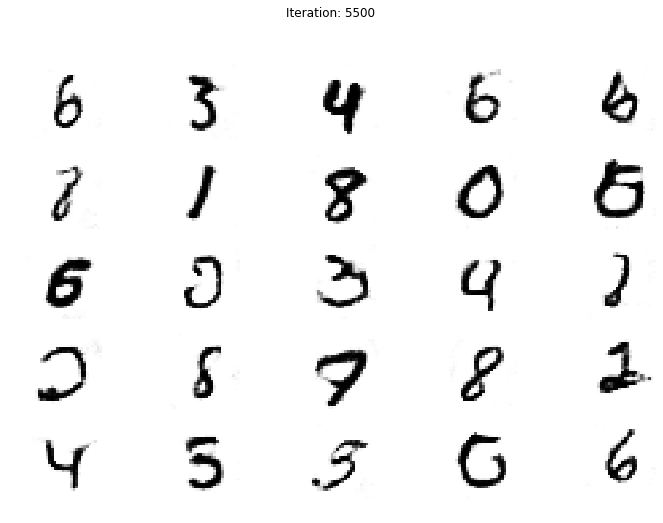

Iteration:  5501 [D loss: 0.69464, acc.:  53.91%] [G loss: 0.72653]
Iteration:  5502 [D loss: 0.71344, acc.:  49.61%] [G loss: 0.78047]
Iteration:  5503 [D loss: 0.69889, acc.:  51.56%] [G loss: 0.81956]
Iteration:  5504 [D loss: 0.70381, acc.:  52.73%] [G loss: 0.79633]
Iteration:  5505 [D loss: 0.70803, acc.:  47.27%] [G loss: 0.78462]
Iteration:  5506 [D loss: 0.70784, acc.:  51.95%] [G loss: 0.74814]
Iteration:  5507 [D loss: 0.71745, acc.:  45.31%] [G loss: 0.80337]
Iteration:  5508 [D loss: 0.71177, acc.:  48.44%] [G loss: 0.76508]
Iteration:  5509 [D loss: 0.71546, acc.:  46.09%] [G loss: 0.80829]
Iteration:  5510 [D loss: 0.68581, acc.:  56.25%] [G loss: 0.79872]
Iteration:  5511 [D loss: 0.72274, acc.:  48.83%] [G loss: 0.76776]
Iteration:  5512 [D loss: 0.71806, acc.:  50.00%] [G loss: 0.81828]
Iteration:  5513 [D loss: 0.71137, acc.:  48.44%] [G loss: 0.80472]
Iteration:  5514 [D loss: 0.71218, acc.:  47.66%] [G loss: 0.79903]
Iteration:  5515 [D loss: 0.69441, acc.:  56.64%

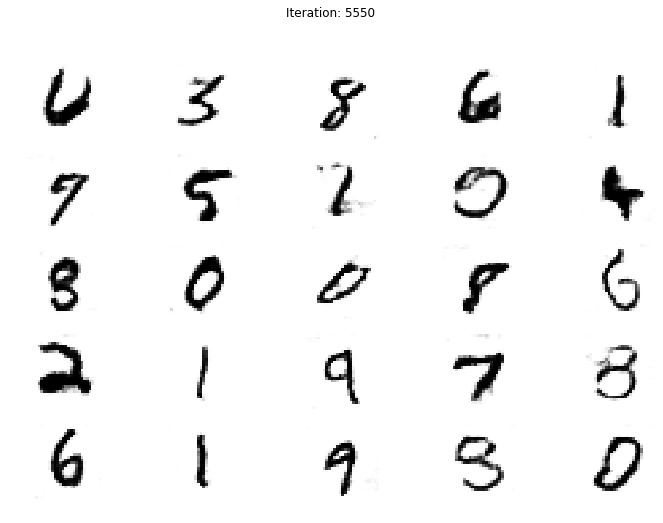

Iteration:  5551 [D loss: 0.69977, acc.:  52.34%] [G loss: 0.82348]
Iteration:  5552 [D loss: 0.69196, acc.:  50.78%] [G loss: 0.76618]
Iteration:  5553 [D loss: 0.70241, acc.:  48.83%] [G loss: 0.75312]
Iteration:  5554 [D loss: 0.72001, acc.:  48.05%] [G loss: 0.79045]
Iteration:  5555 [D loss: 0.71278, acc.:  48.05%] [G loss: 0.78460]
Iteration:  5556 [D loss: 0.71852, acc.:  48.83%] [G loss: 0.77205]
Iteration:  5557 [D loss: 0.70458, acc.:  48.44%] [G loss: 0.76489]
Iteration:  5558 [D loss: 0.72057, acc.:  50.39%] [G loss: 0.78148]
Iteration:  5559 [D loss: 0.68884, acc.:  52.73%] [G loss: 0.78667]
Iteration:  5560 [D loss: 0.70904, acc.:  49.22%] [G loss: 0.77749]
Iteration:  5561 [D loss: 0.71983, acc.:  45.31%] [G loss: 0.75355]
Iteration:  5562 [D loss: 0.68986, acc.:  57.81%] [G loss: 0.77807]
Iteration:  5563 [D loss: 0.70454, acc.:  50.78%] [G loss: 0.78033]
Iteration:  5564 [D loss: 0.72658, acc.:  45.31%] [G loss: 0.75162]
Iteration:  5565 [D loss: 0.69765, acc.:  51.17%

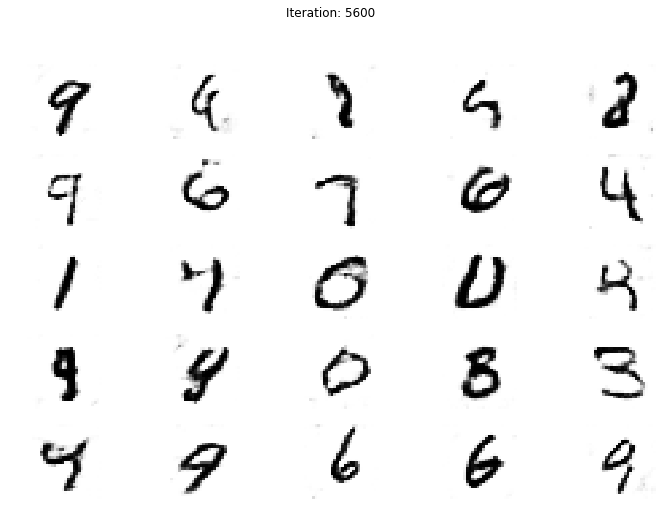

Iteration:  5601 [D loss: 0.71348, acc.:  50.78%] [G loss: 0.79103]
Iteration:  5602 [D loss: 0.70142, acc.:  52.34%] [G loss: 0.80109]
Iteration:  5603 [D loss: 0.71547, acc.:  50.39%] [G loss: 0.76163]
Iteration:  5604 [D loss: 0.70029, acc.:  56.64%] [G loss: 0.78525]
Iteration:  5605 [D loss: 0.71567, acc.:  50.39%] [G loss: 0.78468]
Iteration:  5606 [D loss: 0.71001, acc.:  48.83%] [G loss: 0.77944]
Iteration:  5607 [D loss: 0.72742, acc.:  40.62%] [G loss: 0.78363]
Iteration:  5608 [D loss: 0.68768, acc.:  56.25%] [G loss: 0.75403]
Iteration:  5609 [D loss: 0.69242, acc.:  53.12%] [G loss: 0.77318]
Iteration:  5610 [D loss: 0.68867, acc.:  50.39%] [G loss: 0.79292]
Iteration:  5611 [D loss: 0.72834, acc.:  47.66%] [G loss: 0.79956]
Iteration:  5612 [D loss: 0.70507, acc.:  51.17%] [G loss: 0.76882]
Iteration:  5613 [D loss: 0.70053, acc.:  52.73%] [G loss: 0.72936]
Iteration:  5614 [D loss: 0.70746, acc.:  49.61%] [G loss: 0.78130]
Iteration:  5615 [D loss: 0.70091, acc.:  52.34%

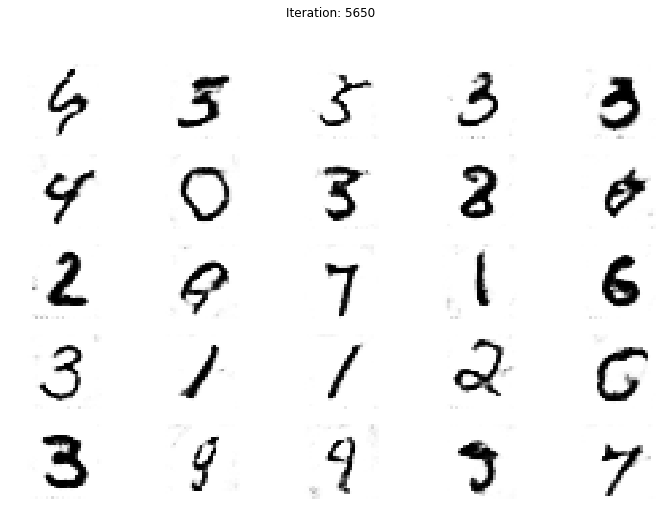

Iteration:  5651 [D loss: 0.72195, acc.:  44.92%] [G loss: 0.78073]
Iteration:  5652 [D loss: 0.68474, acc.:  54.69%] [G loss: 0.80938]
Iteration:  5653 [D loss: 0.72928, acc.:  45.70%] [G loss: 0.79936]
Iteration:  5654 [D loss: 0.71897, acc.:  47.66%] [G loss: 0.78973]
Iteration:  5655 [D loss: 0.71175, acc.:  49.22%] [G loss: 0.76859]
Iteration:  5656 [D loss: 0.71547, acc.:  48.05%] [G loss: 0.76244]
Iteration:  5657 [D loss: 0.72542, acc.:  46.48%] [G loss: 0.75452]
Iteration:  5658 [D loss: 0.70124, acc.:  51.56%] [G loss: 0.78514]
Iteration:  5659 [D loss: 0.71311, acc.:  46.48%] [G loss: 0.81684]
Iteration:  5660 [D loss: 0.70562, acc.:  51.95%] [G loss: 0.78524]
Iteration:  5661 [D loss: 0.70646, acc.:  51.56%] [G loss: 0.77439]
Iteration:  5662 [D loss: 0.70779, acc.:  47.27%] [G loss: 0.79073]
Iteration:  5663 [D loss: 0.68792, acc.:  52.73%] [G loss: 0.78702]
Iteration:  5664 [D loss: 0.73192, acc.:  47.27%] [G loss: 0.79199]
Iteration:  5665 [D loss: 0.70571, acc.:  52.73%

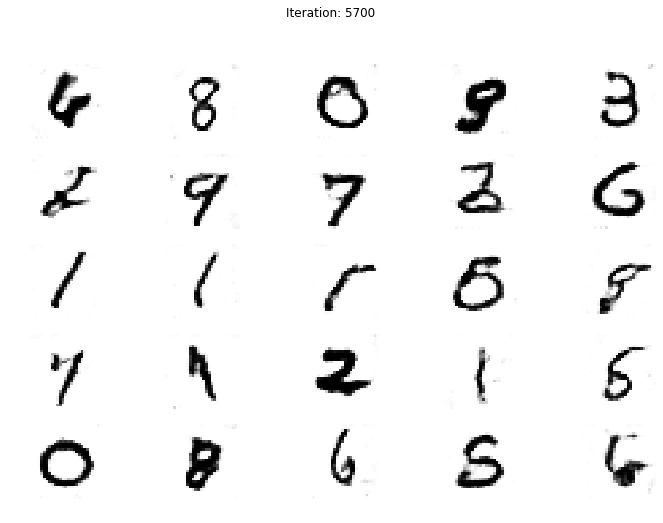

Iteration:  5701 [D loss: 0.68229, acc.:  54.69%] [G loss: 0.77318]
Iteration:  5702 [D loss: 0.68796, acc.:  53.91%] [G loss: 0.79512]
Iteration:  5703 [D loss: 0.69370, acc.:  55.08%] [G loss: 0.75605]
Iteration:  5704 [D loss: 0.70399, acc.:  54.30%] [G loss: 0.74579]
Iteration:  5705 [D loss: 0.68899, acc.:  48.05%] [G loss: 0.77129]
Iteration:  5706 [D loss: 0.71646, acc.:  44.14%] [G loss: 0.81219]
Iteration:  5707 [D loss: 0.71101, acc.:  47.27%] [G loss: 0.76082]
Iteration:  5708 [D loss: 0.70312, acc.:  51.95%] [G loss: 0.78770]
Iteration:  5709 [D loss: 0.71902, acc.:  47.27%] [G loss: 0.74306]
Iteration:  5710 [D loss: 0.70470, acc.:  48.05%] [G loss: 0.75326]
Iteration:  5711 [D loss: 0.70252, acc.:  53.52%] [G loss: 0.78940]
Iteration:  5712 [D loss: 0.68285, acc.:  58.20%] [G loss: 0.73942]
Iteration:  5713 [D loss: 0.70426, acc.:  53.12%] [G loss: 0.78414]
Iteration:  5714 [D loss: 0.71908, acc.:  50.00%] [G loss: 0.76897]
Iteration:  5715 [D loss: 0.69827, acc.:  53.91%

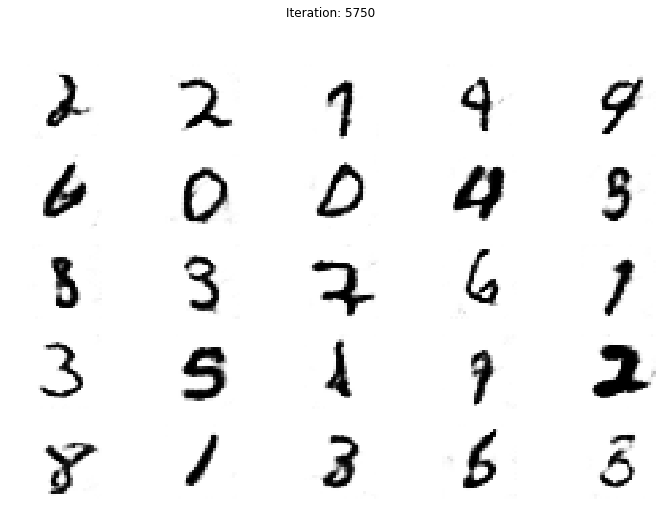

Iteration:  5751 [D loss: 0.70752, acc.:  52.34%] [G loss: 0.77549]
Iteration:  5752 [D loss: 0.69952, acc.:  52.73%] [G loss: 0.78663]
Iteration:  5753 [D loss: 0.70834, acc.:  48.83%] [G loss: 0.76896]
Iteration:  5754 [D loss: 0.68717, acc.:  56.25%] [G loss: 0.75022]
Iteration:  5755 [D loss: 0.71060, acc.:  52.73%] [G loss: 0.79761]
Iteration:  5756 [D loss: 0.70669, acc.:  50.78%] [G loss: 0.78899]
Iteration:  5757 [D loss: 0.71492, acc.:  43.36%] [G loss: 0.77706]
Iteration:  5758 [D loss: 0.70227, acc.:  49.61%] [G loss: 0.75700]
Iteration:  5759 [D loss: 0.69581, acc.:  55.08%] [G loss: 0.75846]
Iteration:  5760 [D loss: 0.72810, acc.:  42.19%] [G loss: 0.77111]
Iteration:  5761 [D loss: 0.71036, acc.:  49.61%] [G loss: 0.79112]
Iteration:  5762 [D loss: 0.68142, acc.:  55.08%] [G loss: 0.79912]
Iteration:  5763 [D loss: 0.70315, acc.:  51.56%] [G loss: 0.75412]
Iteration:  5764 [D loss: 0.71462, acc.:  49.61%] [G loss: 0.76882]
Iteration:  5765 [D loss: 0.72835, acc.:  43.36%

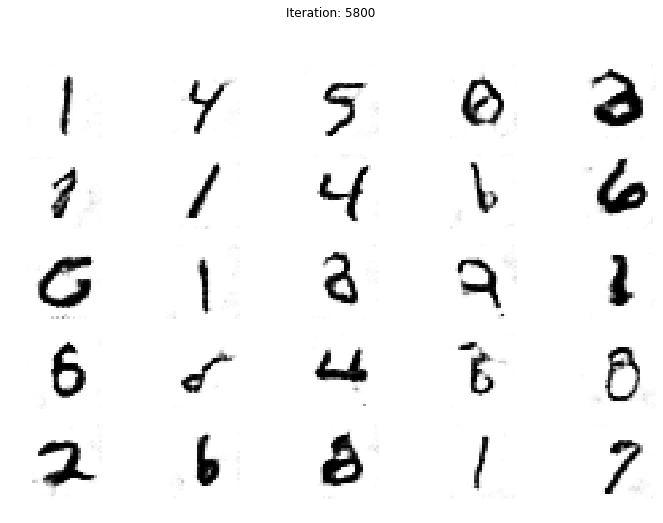

Iteration:  5801 [D loss: 0.70909, acc.:  45.70%] [G loss: 0.76323]
Iteration:  5802 [D loss: 0.68904, acc.:  53.52%] [G loss: 0.78775]
Iteration:  5803 [D loss: 0.70469, acc.:  50.39%] [G loss: 0.80944]
Iteration:  5804 [D loss: 0.70916, acc.:  53.12%] [G loss: 0.77193]
Iteration:  5805 [D loss: 0.72605, acc.:  47.66%] [G loss: 0.79482]
Iteration:  5806 [D loss: 0.71206, acc.:  46.48%] [G loss: 0.71136]
Iteration:  5807 [D loss: 0.69253, acc.:  56.25%] [G loss: 0.76919]
Iteration:  5808 [D loss: 0.69551, acc.:  52.34%] [G loss: 0.75744]
Iteration:  5809 [D loss: 0.70556, acc.:  48.83%] [G loss: 0.78569]
Iteration:  5810 [D loss: 0.70500, acc.:  52.34%] [G loss: 0.76785]
Iteration:  5811 [D loss: 0.70755, acc.:  51.17%] [G loss: 0.76085]
Iteration:  5812 [D loss: 0.72248, acc.:  46.48%] [G loss: 0.77420]
Iteration:  5813 [D loss: 0.70997, acc.:  53.12%] [G loss: 0.81623]
Iteration:  5814 [D loss: 0.69601, acc.:  50.00%] [G loss: 0.78847]
Iteration:  5815 [D loss: 0.69642, acc.:  54.30%

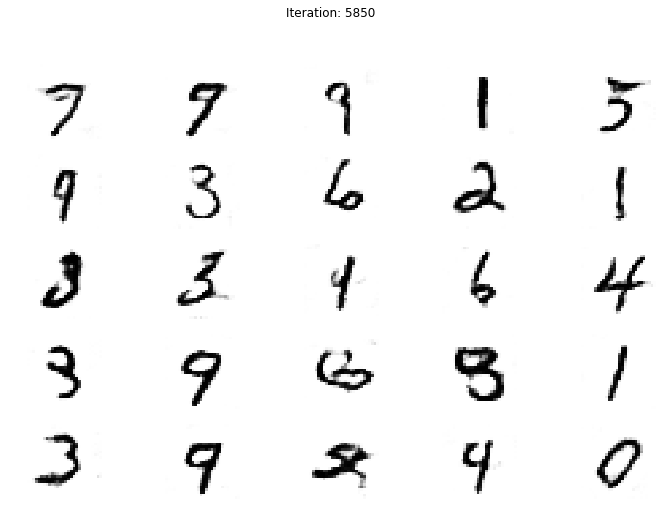

Iteration:  5851 [D loss: 0.70224, acc.:  48.83%] [G loss: 0.78205]
Iteration:  5852 [D loss: 0.70912, acc.:  48.05%] [G loss: 0.79909]
Iteration:  5853 [D loss: 0.71843, acc.:  48.83%] [G loss: 0.73776]
Iteration:  5854 [D loss: 0.70692, acc.:  52.34%] [G loss: 0.77967]
Iteration:  5855 [D loss: 0.72064, acc.:  46.48%] [G loss: 0.77224]
Iteration:  5856 [D loss: 0.71734, acc.:  48.05%] [G loss: 0.81060]
Iteration:  5857 [D loss: 0.68716, acc.:  55.47%] [G loss: 0.82265]
Iteration:  5858 [D loss: 0.71861, acc.:  48.05%] [G loss: 0.80547]
Iteration:  5859 [D loss: 0.74280, acc.:  45.31%] [G loss: 0.77711]
Iteration:  5860 [D loss: 0.70476, acc.:  47.27%] [G loss: 0.77423]
Iteration:  5861 [D loss: 0.70563, acc.:  51.95%] [G loss: 0.75319]
Iteration:  5862 [D loss: 0.69882, acc.:  49.22%] [G loss: 0.78406]
Iteration:  5863 [D loss: 0.69929, acc.:  50.78%] [G loss: 0.81787]
Iteration:  5864 [D loss: 0.71035, acc.:  51.17%] [G loss: 0.79868]
Iteration:  5865 [D loss: 0.72012, acc.:  44.53%

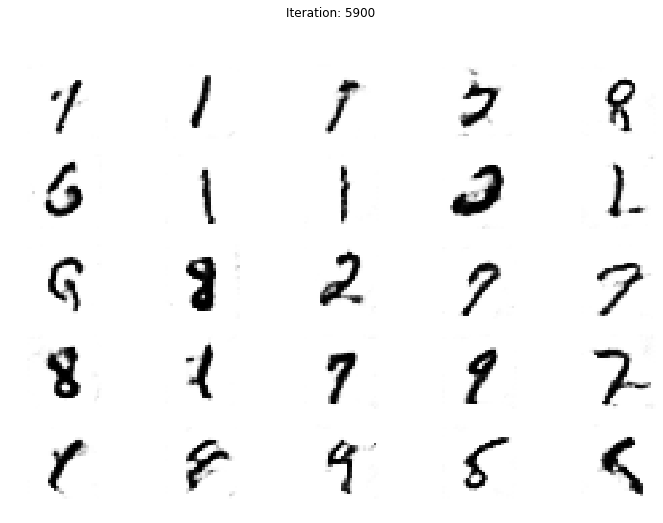

Iteration:  5901 [D loss: 0.69956, acc.:  52.73%] [G loss: 0.79539]
Iteration:  5902 [D loss: 0.70571, acc.:  53.12%] [G loss: 0.79545]
Iteration:  5903 [D loss: 0.70973, acc.:  50.00%] [G loss: 0.76713]
Iteration:  5904 [D loss: 0.69776, acc.:  49.61%] [G loss: 0.76395]
Iteration:  5905 [D loss: 0.69693, acc.:  52.73%] [G loss: 0.74074]
Iteration:  5906 [D loss: 0.68568, acc.:  52.34%] [G loss: 0.74967]
Iteration:  5907 [D loss: 0.69450, acc.:  50.78%] [G loss: 0.80153]
Iteration:  5908 [D loss: 0.69039, acc.:  54.69%] [G loss: 0.79380]
Iteration:  5909 [D loss: 0.68341, acc.:  57.42%] [G loss: 0.80231]
Iteration:  5910 [D loss: 0.71963, acc.:  48.05%] [G loss: 0.76264]
Iteration:  5911 [D loss: 0.70311, acc.:  50.00%] [G loss: 0.75841]
Iteration:  5912 [D loss: 0.71241, acc.:  50.00%] [G loss: 0.79336]
Iteration:  5913 [D loss: 0.70156, acc.:  51.95%] [G loss: 0.75368]
Iteration:  5914 [D loss: 0.69242, acc.:  55.47%] [G loss: 0.76931]
Iteration:  5915 [D loss: 0.70652, acc.:  53.91%

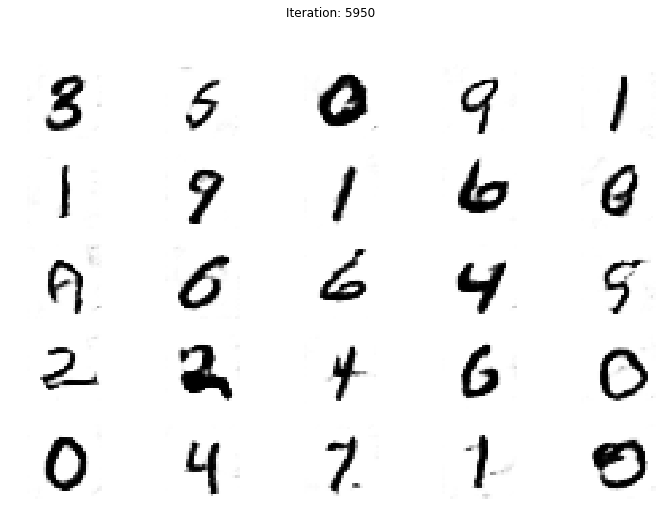

Iteration:  5951 [D loss: 0.71939, acc.:  48.83%] [G loss: 0.73821]
Iteration:  5952 [D loss: 0.70504, acc.:  52.73%] [G loss: 0.77562]
Iteration:  5953 [D loss: 0.70641, acc.:  51.95%] [G loss: 0.79097]
Iteration:  5954 [D loss: 0.71457, acc.:  46.48%] [G loss: 0.77735]
Iteration:  5955 [D loss: 0.72788, acc.:  45.70%] [G loss: 0.78592]
Iteration:  5956 [D loss: 0.68405, acc.:  53.52%] [G loss: 0.78597]
Iteration:  5957 [D loss: 0.71302, acc.:  51.17%] [G loss: 0.80851]
Iteration:  5958 [D loss: 0.68973, acc.:  54.69%] [G loss: 0.77859]
Iteration:  5959 [D loss: 0.69459, acc.:  53.91%] [G loss: 0.79112]
Iteration:  5960 [D loss: 0.72023, acc.:  46.48%] [G loss: 0.76079]
Iteration:  5961 [D loss: 0.71723, acc.:  46.09%] [G loss: 0.74995]
Iteration:  5962 [D loss: 0.69053, acc.:  51.95%] [G loss: 0.75994]
Iteration:  5963 [D loss: 0.71202, acc.:  50.39%] [G loss: 0.77379]
Iteration:  5964 [D loss: 0.70879, acc.:  48.83%] [G loss: 0.76999]
Iteration:  5965 [D loss: 0.70978, acc.:  48.83%

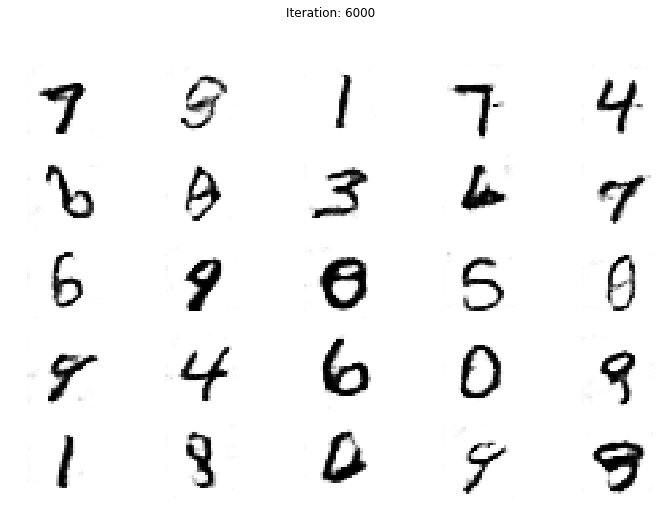

Iteration:  6001 [D loss: 0.68543, acc.:  57.42%] [G loss: 0.76793]
Iteration:  6002 [D loss: 0.69246, acc.:  55.86%] [G loss: 0.80592]
Iteration:  6003 [D loss: 0.69757, acc.:  52.34%] [G loss: 0.78432]
Iteration:  6004 [D loss: 0.72367, acc.:  46.09%] [G loss: 0.76348]
Iteration:  6005 [D loss: 0.71449, acc.:  50.78%] [G loss: 0.78038]
Iteration:  6006 [D loss: 0.71500, acc.:  52.34%] [G loss: 0.77880]
Iteration:  6007 [D loss: 0.69752, acc.:  52.34%] [G loss: 0.81337]
Iteration:  6008 [D loss: 0.69035, acc.:  53.12%] [G loss: 0.75859]
Iteration:  6009 [D loss: 0.69542, acc.:  53.12%] [G loss: 0.79082]
Iteration:  6010 [D loss: 0.69415, acc.:  52.73%] [G loss: 0.77937]
Iteration:  6011 [D loss: 0.70587, acc.:  51.95%] [G loss: 0.80097]
Iteration:  6012 [D loss: 0.71047, acc.:  50.39%] [G loss: 0.77212]
Iteration:  6013 [D loss: 0.70625, acc.:  51.17%] [G loss: 0.76693]
Iteration:  6014 [D loss: 0.70346, acc.:  55.47%] [G loss: 0.77656]
Iteration:  6015 [D loss: 0.68832, acc.:  51.56%

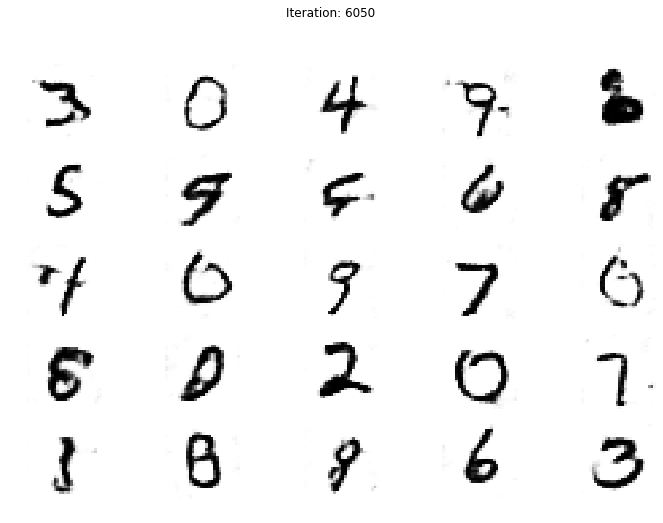

Iteration:  6051 [D loss: 0.67788, acc.:  55.86%] [G loss: 0.80081]
Iteration:  6052 [D loss: 0.70665, acc.:  50.39%] [G loss: 0.81709]
Iteration:  6053 [D loss: 0.69085, acc.:  52.73%] [G loss: 0.74794]
Iteration:  6054 [D loss: 0.71272, acc.:  50.00%] [G loss: 0.79603]
Iteration:  6055 [D loss: 0.71629, acc.:  48.05%] [G loss: 0.77192]
Iteration:  6056 [D loss: 0.69504, acc.:  53.52%] [G loss: 0.76844]
Iteration:  6057 [D loss: 0.69285, acc.:  51.56%] [G loss: 0.78635]
Iteration:  6058 [D loss: 0.70398, acc.:  54.30%] [G loss: 0.76436]
Iteration:  6059 [D loss: 0.71698, acc.:  44.92%] [G loss: 0.77140]
Iteration:  6060 [D loss: 0.69463, acc.:  54.69%] [G loss: 0.73156]
Iteration:  6061 [D loss: 0.71809, acc.:  46.48%] [G loss: 0.76771]
Iteration:  6062 [D loss: 0.69828, acc.:  54.30%] [G loss: 0.72805]
Iteration:  6063 [D loss: 0.71826, acc.:  48.05%] [G loss: 0.76929]
Iteration:  6064 [D loss: 0.70940, acc.:  52.34%] [G loss: 0.75770]
Iteration:  6065 [D loss: 0.70888, acc.:  48.44%

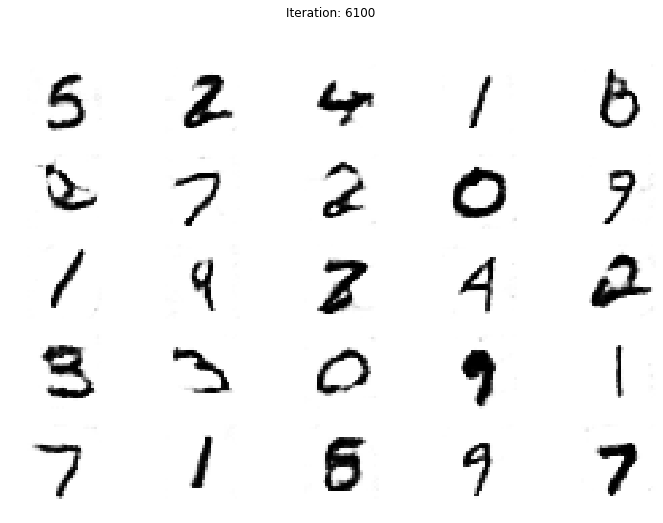

Iteration:  6101 [D loss: 0.70950, acc.:  51.17%] [G loss: 0.77644]
Iteration:  6102 [D loss: 0.72042, acc.:  46.48%] [G loss: 0.74990]
Iteration:  6103 [D loss: 0.71176, acc.:  50.39%] [G loss: 0.78216]
Iteration:  6104 [D loss: 0.74458, acc.:  38.67%] [G loss: 0.77769]
Iteration:  6105 [D loss: 0.72038, acc.:  46.09%] [G loss: 0.80197]
Iteration:  6106 [D loss: 0.72198, acc.:  42.97%] [G loss: 0.75735]
Iteration:  6107 [D loss: 0.67346, acc.:  62.11%] [G loss: 0.79969]
Iteration:  6108 [D loss: 0.71342, acc.:  48.44%] [G loss: 0.80654]
Iteration:  6109 [D loss: 0.71221, acc.:  48.44%] [G loss: 0.80364]
Iteration:  6110 [D loss: 0.70907, acc.:  46.09%] [G loss: 0.77354]
Iteration:  6111 [D loss: 0.73313, acc.:  42.97%] [G loss: 0.79777]
Iteration:  6112 [D loss: 0.69812, acc.:  53.91%] [G loss: 0.78797]
Iteration:  6113 [D loss: 0.69830, acc.:  52.73%] [G loss: 0.79765]
Iteration:  6114 [D loss: 0.70523, acc.:  49.61%] [G loss: 0.77502]
Iteration:  6115 [D loss: 0.68960, acc.:  51.95%

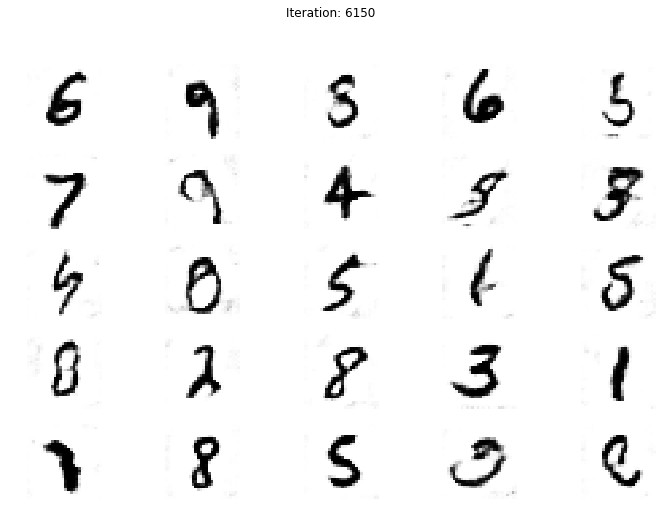

Iteration:  6151 [D loss: 0.69701, acc.:  50.78%] [G loss: 0.76321]
Iteration:  6152 [D loss: 0.71569, acc.:  49.22%] [G loss: 0.77662]
Iteration:  6153 [D loss: 0.72172, acc.:  47.27%] [G loss: 0.78625]
Iteration:  6154 [D loss: 0.70071, acc.:  50.39%] [G loss: 0.76643]
Iteration:  6155 [D loss: 0.68382, acc.:  54.69%] [G loss: 0.80710]
Iteration:  6156 [D loss: 0.67398, acc.:  57.03%] [G loss: 0.78756]
Iteration:  6157 [D loss: 0.71695, acc.:  49.22%] [G loss: 0.76482]
Iteration:  6158 [D loss: 0.71251, acc.:  51.17%] [G loss: 0.76954]
Iteration:  6159 [D loss: 0.70240, acc.:  50.78%] [G loss: 0.76729]
Iteration:  6160 [D loss: 0.71626, acc.:  45.70%] [G loss: 0.76840]
Iteration:  6161 [D loss: 0.70552, acc.:  50.00%] [G loss: 0.74736]
Iteration:  6162 [D loss: 0.72453, acc.:  44.92%] [G loss: 0.76848]
Iteration:  6163 [D loss: 0.70922, acc.:  48.83%] [G loss: 0.77589]
Iteration:  6164 [D loss: 0.71317, acc.:  45.31%] [G loss: 0.76904]
Iteration:  6165 [D loss: 0.67502, acc.:  59.38%

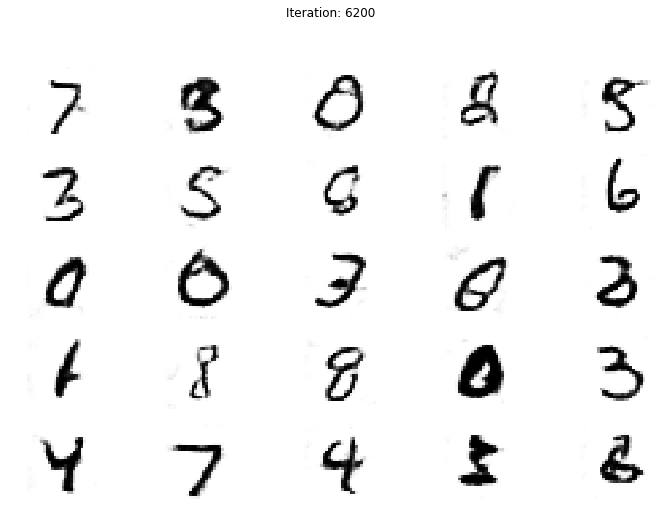

Iteration:  6201 [D loss: 0.70256, acc.:  52.73%] [G loss: 0.76760]
Iteration:  6202 [D loss: 0.69053, acc.:  50.00%] [G loss: 0.80629]
Iteration:  6203 [D loss: 0.71246, acc.:  49.22%] [G loss: 0.73179]
Iteration:  6204 [D loss: 0.71964, acc.:  46.48%] [G loss: 0.76191]
Iteration:  6205 [D loss: 0.69612, acc.:  49.22%] [G loss: 0.75671]
Iteration:  6206 [D loss: 0.71734, acc.:  47.66%] [G loss: 0.73367]
Iteration:  6207 [D loss: 0.70528, acc.:  47.66%] [G loss: 0.75065]
Iteration:  6208 [D loss: 0.69599, acc.:  51.17%] [G loss: 0.74334]
Iteration:  6209 [D loss: 0.71863, acc.:  48.05%] [G loss: 0.74869]
Iteration:  6210 [D loss: 0.69999, acc.:  54.30%] [G loss: 0.73525]
Iteration:  6211 [D loss: 0.69364, acc.:  51.95%] [G loss: 0.75316]
Iteration:  6212 [D loss: 0.71504, acc.:  51.95%] [G loss: 0.77363]
Iteration:  6213 [D loss: 0.69934, acc.:  53.52%] [G loss: 0.75834]
Iteration:  6214 [D loss: 0.66806, acc.:  60.55%] [G loss: 0.81032]
Iteration:  6215 [D loss: 0.69634, acc.:  51.56%

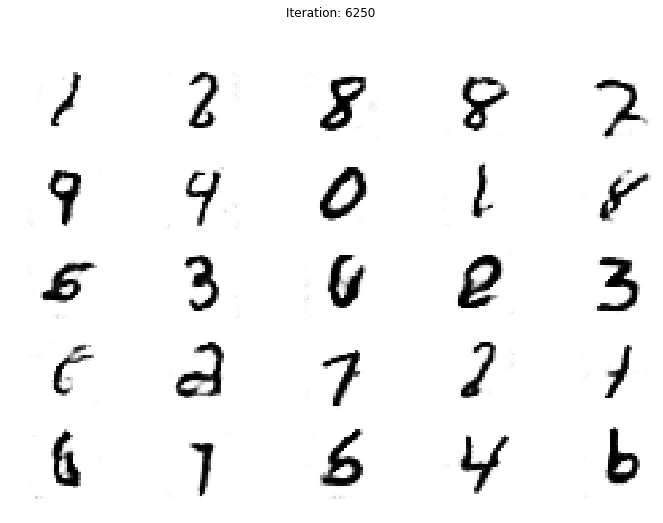

Iteration:  6251 [D loss: 0.70543, acc.:  48.05%] [G loss: 0.78478]
Iteration:  6252 [D loss: 0.72424, acc.:  44.92%] [G loss: 0.75572]
Iteration:  6253 [D loss: 0.70403, acc.:  48.05%] [G loss: 0.74808]
Iteration:  6254 [D loss: 0.69905, acc.:  52.73%] [G loss: 0.78282]
Iteration:  6255 [D loss: 0.71788, acc.:  46.88%] [G loss: 0.77974]
Iteration:  6256 [D loss: 0.71876, acc.:  49.22%] [G loss: 0.74845]
Iteration:  6257 [D loss: 0.71714, acc.:  47.66%] [G loss: 0.74866]
Iteration:  6258 [D loss: 0.69747, acc.:  53.12%] [G loss: 0.79686]
Iteration:  6259 [D loss: 0.72017, acc.:  44.92%] [G loss: 0.81565]
Iteration:  6260 [D loss: 0.71025, acc.:  52.34%] [G loss: 0.77348]
Iteration:  6261 [D loss: 0.71689, acc.:  47.66%] [G loss: 0.71537]
Iteration:  6262 [D loss: 0.69253, acc.:  52.73%] [G loss: 0.73450]
Iteration:  6263 [D loss: 0.68804, acc.:  53.52%] [G loss: 0.73751]
Iteration:  6264 [D loss: 0.71322, acc.:  51.17%] [G loss: 0.74289]
Iteration:  6265 [D loss: 0.70029, acc.:  50.78%

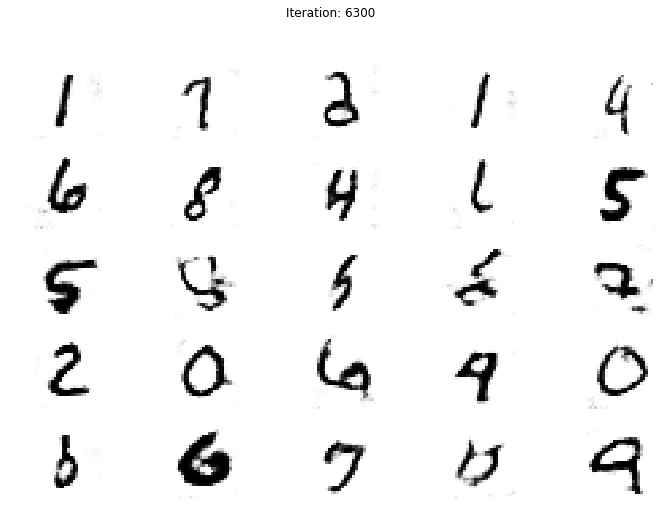

Iteration:  6301 [D loss: 0.69522, acc.:  54.69%] [G loss: 0.76438]
Iteration:  6302 [D loss: 0.69398, acc.:  54.69%] [G loss: 0.74493]
Iteration:  6303 [D loss: 0.69398, acc.:  53.91%] [G loss: 0.70414]
Iteration:  6304 [D loss: 0.71217, acc.:  46.48%] [G loss: 0.75483]
Iteration:  6305 [D loss: 0.72035, acc.:  45.70%] [G loss: 0.74770]
Iteration:  6306 [D loss: 0.71763, acc.:  47.66%] [G loss: 0.78405]
Iteration:  6307 [D loss: 0.67154, acc.:  58.20%] [G loss: 0.76715]
Iteration:  6308 [D loss: 0.72681, acc.:  45.70%] [G loss: 0.78734]
Iteration:  6309 [D loss: 0.70603, acc.:  48.05%] [G loss: 0.75849]
Iteration:  6310 [D loss: 0.69241, acc.:  53.12%] [G loss: 0.80797]
Iteration:  6311 [D loss: 0.70823, acc.:  49.61%] [G loss: 0.78618]
Iteration:  6312 [D loss: 0.70365, acc.:  54.30%] [G loss: 0.78755]
Iteration:  6313 [D loss: 0.72424, acc.:  45.31%] [G loss: 0.77613]
Iteration:  6314 [D loss: 0.69817, acc.:  51.56%] [G loss: 0.74981]
Iteration:  6315 [D loss: 0.69134, acc.:  52.34%

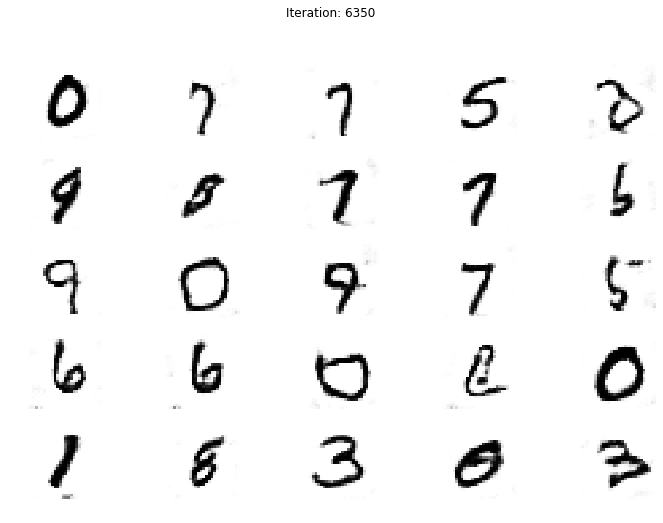

Iteration:  6351 [D loss: 0.70657, acc.:  53.12%] [G loss: 0.82512]
Iteration:  6352 [D loss: 0.71229, acc.:  49.22%] [G loss: 0.79444]
Iteration:  6353 [D loss: 0.71318, acc.:  48.83%] [G loss: 0.78732]
Iteration:  6354 [D loss: 0.71024, acc.:  50.00%] [G loss: 0.78082]
Iteration:  6355 [D loss: 0.72563, acc.:  46.48%] [G loss: 0.77041]
Iteration:  6356 [D loss: 0.71442, acc.:  50.00%] [G loss: 0.75020]
Iteration:  6357 [D loss: 0.74399, acc.:  43.36%] [G loss: 0.76432]
Iteration:  6358 [D loss: 0.70463, acc.:  50.39%] [G loss: 0.77410]
Iteration:  6359 [D loss: 0.69117, acc.:  56.64%] [G loss: 0.76812]
Iteration:  6360 [D loss: 0.72394, acc.:  48.83%] [G loss: 0.77488]
Iteration:  6361 [D loss: 0.70641, acc.:  53.52%] [G loss: 0.78953]
Iteration:  6362 [D loss: 0.70161, acc.:  52.34%] [G loss: 0.75651]
Iteration:  6363 [D loss: 0.71564, acc.:  50.00%] [G loss: 0.80995]
Iteration:  6364 [D loss: 0.72637, acc.:  47.66%] [G loss: 0.76863]
Iteration:  6365 [D loss: 0.69746, acc.:  50.78%

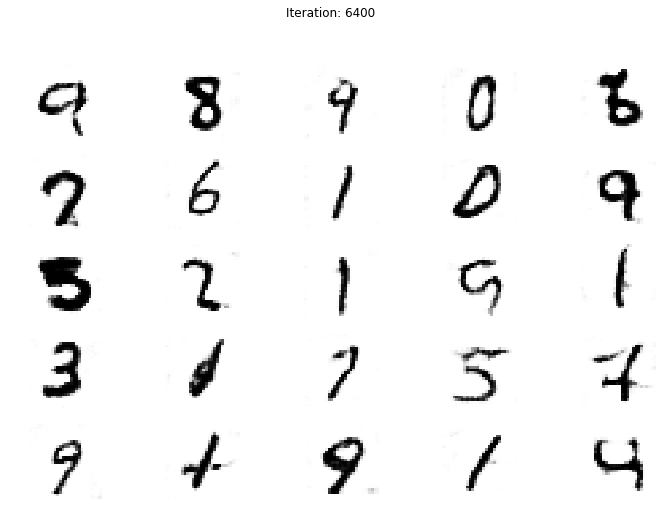

Iteration:  6401 [D loss: 0.70496, acc.:  50.39%] [G loss: 0.77916]
Iteration:  6402 [D loss: 0.69515, acc.:  51.56%] [G loss: 0.80797]
Iteration:  6403 [D loss: 0.70834, acc.:  48.83%] [G loss: 0.81927]
Iteration:  6404 [D loss: 0.70163, acc.:  52.73%] [G loss: 0.76038]
Iteration:  6405 [D loss: 0.70911, acc.:  47.27%] [G loss: 0.75735]
Iteration:  6406 [D loss: 0.72531, acc.:  44.92%] [G loss: 0.75387]
Iteration:  6407 [D loss: 0.71531, acc.:  44.92%] [G loss: 0.76750]
Iteration:  6408 [D loss: 0.69846, acc.:  51.56%] [G loss: 0.75707]
Iteration:  6409 [D loss: 0.69724, acc.:  52.73%] [G loss: 0.76325]
Iteration:  6410 [D loss: 0.70674, acc.:  52.34%] [G loss: 0.76990]
Iteration:  6411 [D loss: 0.71242, acc.:  48.83%] [G loss: 0.76372]
Iteration:  6412 [D loss: 0.70910, acc.:  51.17%] [G loss: 0.75983]
Iteration:  6413 [D loss: 0.68992, acc.:  55.86%] [G loss: 0.75349]
Iteration:  6414 [D loss: 0.70860, acc.:  48.44%] [G loss: 0.77346]
Iteration:  6415 [D loss: 0.73376, acc.:  43.75%

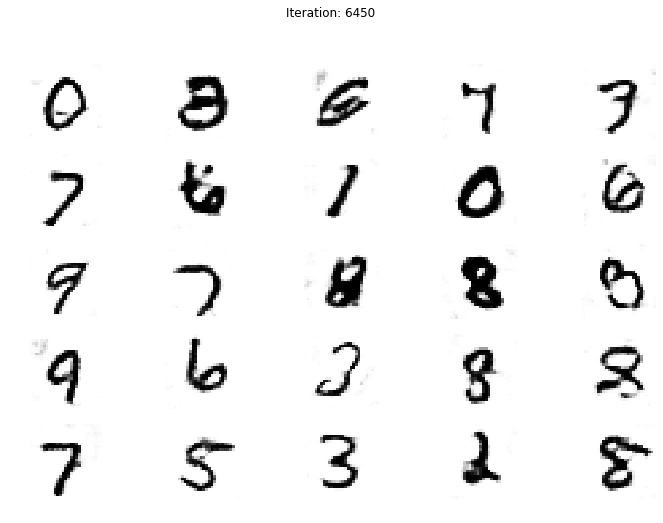

Iteration:  6451 [D loss: 0.69437, acc.:  55.08%] [G loss: 0.80942]
Iteration:  6452 [D loss: 0.67326, acc.:  57.42%] [G loss: 0.77523]
Iteration:  6453 [D loss: 0.69538, acc.:  52.73%] [G loss: 0.78713]
Iteration:  6454 [D loss: 0.72071, acc.:  47.27%] [G loss: 0.78027]
Iteration:  6455 [D loss: 0.71181, acc.:  49.22%] [G loss: 0.78203]
Iteration:  6456 [D loss: 0.68020, acc.:  57.42%] [G loss: 0.79021]
Iteration:  6457 [D loss: 0.70054, acc.:  53.12%] [G loss: 0.76183]
Iteration:  6458 [D loss: 0.69752, acc.:  49.22%] [G loss: 0.76517]
Iteration:  6459 [D loss: 0.72539, acc.:  44.14%] [G loss: 0.74726]
Iteration:  6460 [D loss: 0.70440, acc.:  50.00%] [G loss: 0.76116]
Iteration:  6461 [D loss: 0.72026, acc.:  44.14%] [G loss: 0.74561]
Iteration:  6462 [D loss: 0.70590, acc.:  52.34%] [G loss: 0.74287]
Iteration:  6463 [D loss: 0.68143, acc.:  57.42%] [G loss: 0.75926]
Iteration:  6464 [D loss: 0.69368, acc.:  54.69%] [G loss: 0.76175]
Iteration:  6465 [D loss: 0.71256, acc.:  46.09%

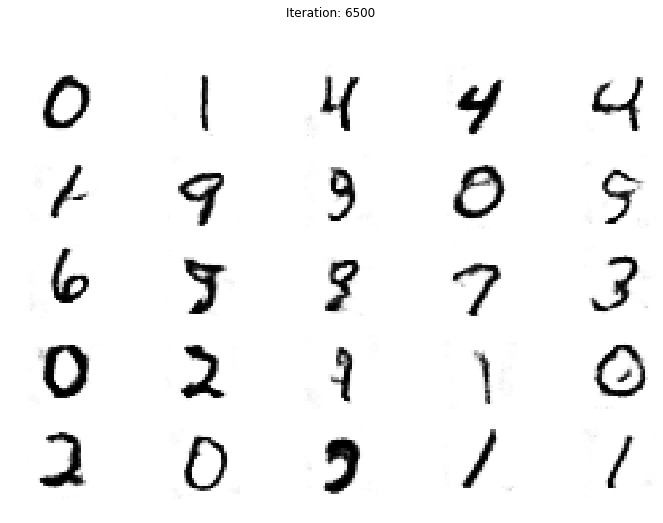

Iteration:  6501 [D loss: 0.67756, acc.:  54.69%] [G loss: 0.77923]
Iteration:  6502 [D loss: 0.71728, acc.:  49.61%] [G loss: 0.78313]
Iteration:  6503 [D loss: 0.69575, acc.:  52.73%] [G loss: 0.77890]
Iteration:  6504 [D loss: 0.69831, acc.:  50.00%] [G loss: 0.79177]
Iteration:  6505 [D loss: 0.72310, acc.:  48.83%] [G loss: 0.77817]
Iteration:  6506 [D loss: 0.70002, acc.:  51.95%] [G loss: 0.79318]
Iteration:  6507 [D loss: 0.69756, acc.:  51.56%] [G loss: 0.75515]
Iteration:  6508 [D loss: 0.70989, acc.:  50.78%] [G loss: 0.76498]
Iteration:  6509 [D loss: 0.73296, acc.:  44.92%] [G loss: 0.75297]
Iteration:  6510 [D loss: 0.70125, acc.:  50.39%] [G loss: 0.77179]
Iteration:  6511 [D loss: 0.71163, acc.:  47.27%] [G loss: 0.76565]
Iteration:  6512 [D loss: 0.70705, acc.:  51.17%] [G loss: 0.77486]
Iteration:  6513 [D loss: 0.70371, acc.:  51.56%] [G loss: 0.78207]
Iteration:  6514 [D loss: 0.73540, acc.:  48.05%] [G loss: 0.78166]
Iteration:  6515 [D loss: 0.72202, acc.:  46.48%

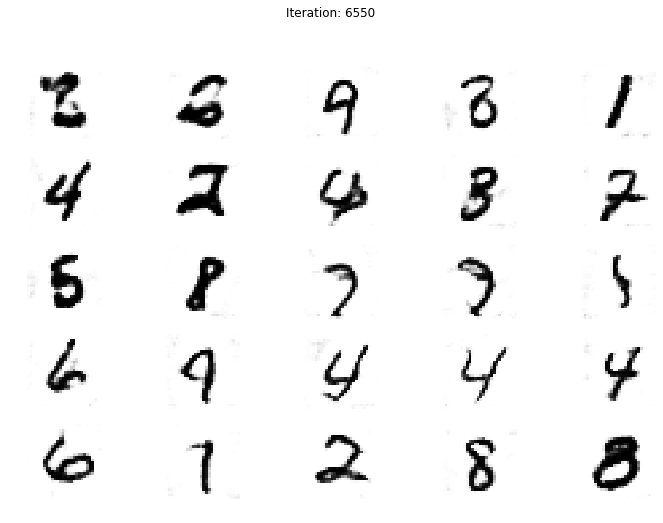

Iteration:  6551 [D loss: 0.67734, acc.:  53.12%] [G loss: 0.75025]
Iteration:  6552 [D loss: 0.70685, acc.:  49.22%] [G loss: 0.76577]
Iteration:  6553 [D loss: 0.71254, acc.:  50.00%] [G loss: 0.73971]
Iteration:  6554 [D loss: 0.70931, acc.:  49.22%] [G loss: 0.76981]
Iteration:  6555 [D loss: 0.72150, acc.:  46.09%] [G loss: 0.79135]
Iteration:  6556 [D loss: 0.70270, acc.:  48.83%] [G loss: 0.74981]
Iteration:  6557 [D loss: 0.69939, acc.:  52.34%] [G loss: 0.75252]
Iteration:  6558 [D loss: 0.70082, acc.:  51.95%] [G loss: 0.78361]
Iteration:  6559 [D loss: 0.71523, acc.:  52.34%] [G loss: 0.79366]
Iteration:  6560 [D loss: 0.69254, acc.:  52.73%] [G loss: 0.76596]
Iteration:  6561 [D loss: 0.69343, acc.:  59.77%] [G loss: 0.75356]
Iteration:  6562 [D loss: 0.71051, acc.:  46.88%] [G loss: 0.76632]
Iteration:  6563 [D loss: 0.67220, acc.:  58.20%] [G loss: 0.81213]
Iteration:  6564 [D loss: 0.70013, acc.:  54.30%] [G loss: 0.80130]
Iteration:  6565 [D loss: 0.70723, acc.:  50.78%

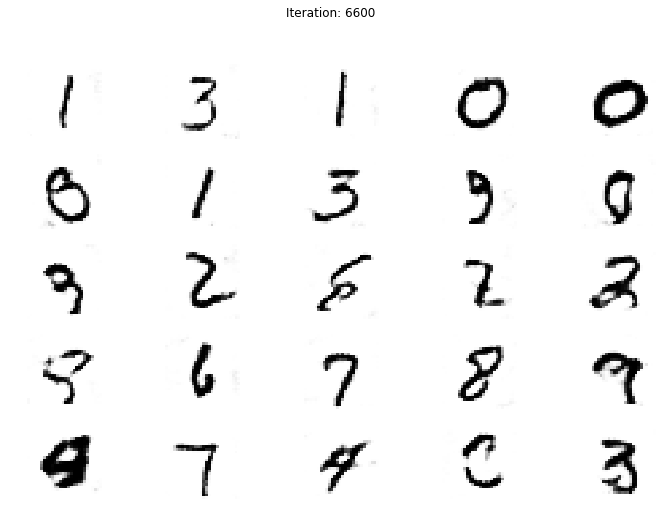

Iteration:  6601 [D loss: 0.68470, acc.:  54.69%] [G loss: 0.74956]
Iteration:  6602 [D loss: 0.69917, acc.:  51.95%] [G loss: 0.76192]
Iteration:  6603 [D loss: 0.72462, acc.:  44.14%] [G loss: 0.74955]
Iteration:  6604 [D loss: 0.70711, acc.:  49.61%] [G loss: 0.74099]
Iteration:  6605 [D loss: 0.68415, acc.:  52.34%] [G loss: 0.74561]
Iteration:  6606 [D loss: 0.70291, acc.:  52.34%] [G loss: 0.76494]
Iteration:  6607 [D loss: 0.73630, acc.:  41.41%] [G loss: 0.74735]
Iteration:  6608 [D loss: 0.72375, acc.:  48.05%] [G loss: 0.75507]
Iteration:  6609 [D loss: 0.68627, acc.:  57.42%] [G loss: 0.76636]
Iteration:  6610 [D loss: 0.71670, acc.:  46.88%] [G loss: 0.79441]
Iteration:  6611 [D loss: 0.68650, acc.:  55.08%] [G loss: 0.74660]
Iteration:  6612 [D loss: 0.71130, acc.:  49.61%] [G loss: 0.78111]
Iteration:  6613 [D loss: 0.68945, acc.:  53.52%] [G loss: 0.80281]
Iteration:  6614 [D loss: 0.69835, acc.:  51.56%] [G loss: 0.75598]
Iteration:  6615 [D loss: 0.71946, acc.:  46.88%

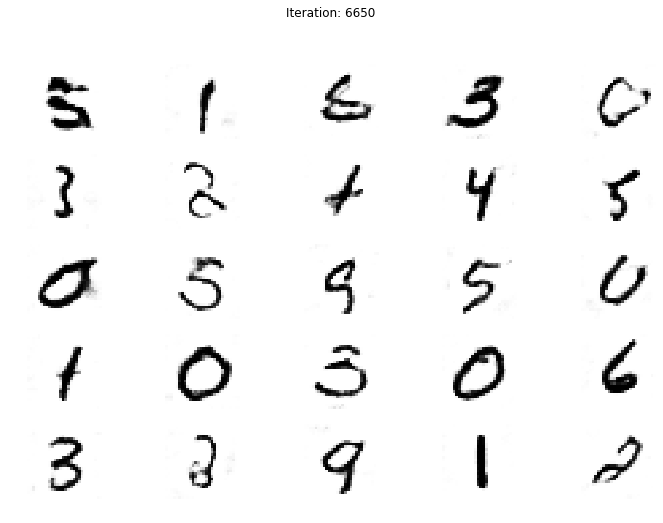

Iteration:  6651 [D loss: 0.71301, acc.:  48.83%] [G loss: 0.75752]
Iteration:  6652 [D loss: 0.71245, acc.:  46.88%] [G loss: 0.79791]
Iteration:  6653 [D loss: 0.69408, acc.:  51.56%] [G loss: 0.75266]
Iteration:  6654 [D loss: 0.71027, acc.:  46.48%] [G loss: 0.79820]
Iteration:  6655 [D loss: 0.71019, acc.:  49.22%] [G loss: 0.74563]
Iteration:  6656 [D loss: 0.69799, acc.:  50.39%] [G loss: 0.76041]
Iteration:  6657 [D loss: 0.71421, acc.:  46.88%] [G loss: 0.73678]
Iteration:  6658 [D loss: 0.70740, acc.:  50.39%] [G loss: 0.73878]
Iteration:  6659 [D loss: 0.70377, acc.:  47.66%] [G loss: 0.78076]
Iteration:  6660 [D loss: 0.68169, acc.:  58.98%] [G loss: 0.75563]
Iteration:  6661 [D loss: 0.69168, acc.:  55.86%] [G loss: 0.77440]
Iteration:  6662 [D loss: 0.69770, acc.:  53.52%] [G loss: 0.74079]
Iteration:  6663 [D loss: 0.72750, acc.:  49.22%] [G loss: 0.72983]
Iteration:  6664 [D loss: 0.69406, acc.:  53.91%] [G loss: 0.77093]
Iteration:  6665 [D loss: 0.70457, acc.:  55.47%

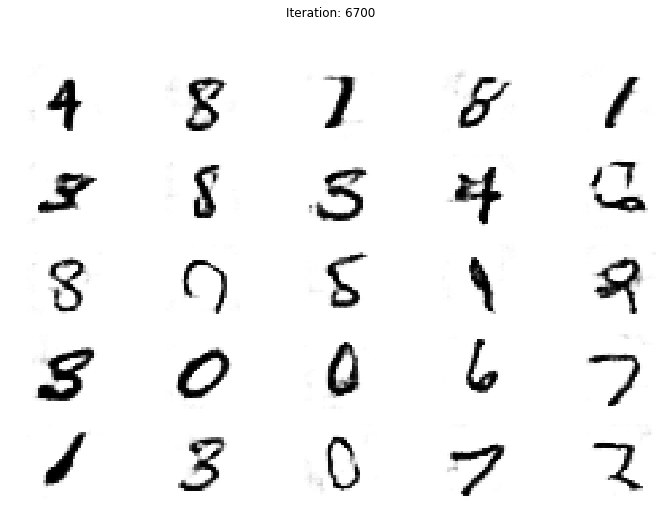

Iteration:  6701 [D loss: 0.68397, acc.:  53.52%] [G loss: 0.77532]
Iteration:  6702 [D loss: 0.69394, acc.:  51.95%] [G loss: 0.75818]
Iteration:  6703 [D loss: 0.69564, acc.:  53.12%] [G loss: 0.76453]
Iteration:  6704 [D loss: 0.71697, acc.:  43.75%] [G loss: 0.76640]
Iteration:  6705 [D loss: 0.72762, acc.:  46.09%] [G loss: 0.79779]
Iteration:  6706 [D loss: 0.70510, acc.:  50.39%] [G loss: 0.74838]
Iteration:  6707 [D loss: 0.71913, acc.:  51.95%] [G loss: 0.75039]
Iteration:  6708 [D loss: 0.70608, acc.:  53.52%] [G loss: 0.79613]
Iteration:  6709 [D loss: 0.68761, acc.:  55.47%] [G loss: 0.75441]
Iteration:  6710 [D loss: 0.71679, acc.:  47.66%] [G loss: 0.75037]
Iteration:  6711 [D loss: 0.70319, acc.:  49.22%] [G loss: 0.79407]
Iteration:  6712 [D loss: 0.70177, acc.:  53.12%] [G loss: 0.75258]
Iteration:  6713 [D loss: 0.69824, acc.:  53.52%] [G loss: 0.75990]
Iteration:  6714 [D loss: 0.68272, acc.:  56.64%] [G loss: 0.78143]
Iteration:  6715 [D loss: 0.71549, acc.:  47.27%

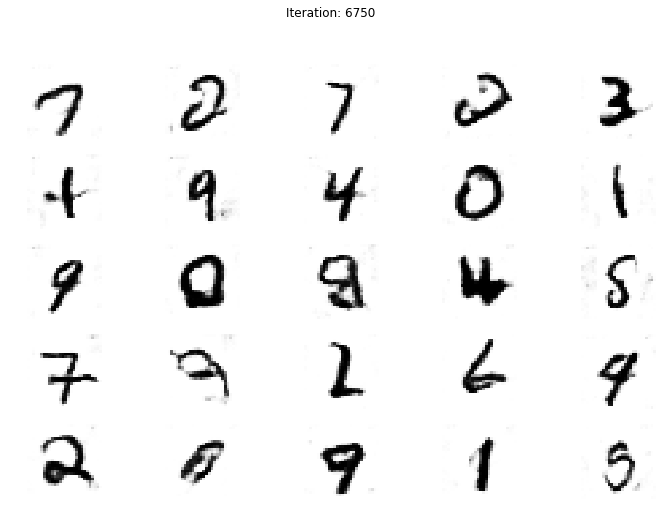

Iteration:  6751 [D loss: 0.68030, acc.:  56.25%] [G loss: 0.80069]
Iteration:  6752 [D loss: 0.68176, acc.:  56.25%] [G loss: 0.82715]
Iteration:  6753 [D loss: 0.70073, acc.:  50.00%] [G loss: 0.78735]
Iteration:  6754 [D loss: 0.69118, acc.:  54.30%] [G loss: 0.77360]
Iteration:  6755 [D loss: 0.70833, acc.:  48.83%] [G loss: 0.77383]
Iteration:  6756 [D loss: 0.72547, acc.:  50.00%] [G loss: 0.79234]
Iteration:  6757 [D loss: 0.71241, acc.:  50.78%] [G loss: 0.77685]
Iteration:  6758 [D loss: 0.70438, acc.:  52.73%] [G loss: 0.75655]
Iteration:  6759 [D loss: 0.71071, acc.:  50.00%] [G loss: 0.77431]
Iteration:  6760 [D loss: 0.70770, acc.:  50.78%] [G loss: 0.79972]
Iteration:  6761 [D loss: 0.69518, acc.:  53.52%] [G loss: 0.80887]
Iteration:  6762 [D loss: 0.68461, acc.:  53.52%] [G loss: 0.77638]
Iteration:  6763 [D loss: 0.70435, acc.:  49.61%] [G loss: 0.79471]
Iteration:  6764 [D loss: 0.69805, acc.:  50.78%] [G loss: 0.80507]
Iteration:  6765 [D loss: 0.70623, acc.:  51.56%

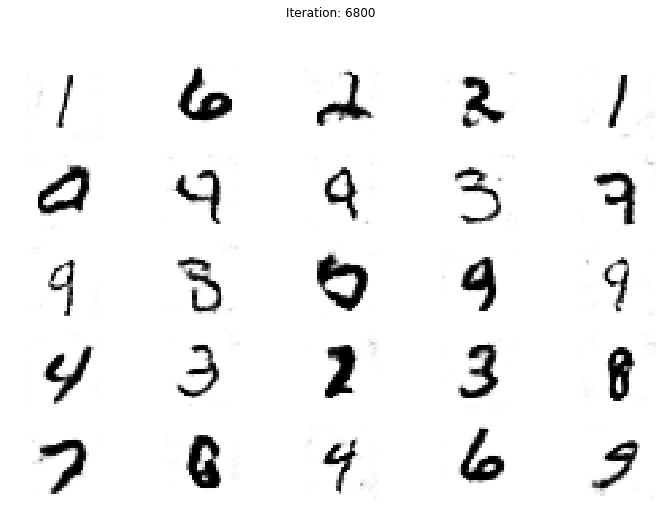

Iteration:  6801 [D loss: 0.71057, acc.:  51.56%] [G loss: 0.76898]
Iteration:  6802 [D loss: 0.69853, acc.:  51.56%] [G loss: 0.78649]
Iteration:  6803 [D loss: 0.71739, acc.:  47.66%] [G loss: 0.76571]
Iteration:  6804 [D loss: 0.71975, acc.:  46.88%] [G loss: 0.75250]
Iteration:  6805 [D loss: 0.69385, acc.:  52.34%] [G loss: 0.75592]
Iteration:  6806 [D loss: 0.71417, acc.:  48.44%] [G loss: 0.81008]
Iteration:  6807 [D loss: 0.70156, acc.:  52.34%] [G loss: 0.74769]
Iteration:  6808 [D loss: 0.69365, acc.:  51.95%] [G loss: 0.79025]
Iteration:  6809 [D loss: 0.68747, acc.:  53.12%] [G loss: 0.78201]
Iteration:  6810 [D loss: 0.70355, acc.:  50.39%] [G loss: 0.72152]
Iteration:  6811 [D loss: 0.71805, acc.:  46.09%] [G loss: 0.74649]
Iteration:  6812 [D loss: 0.68889, acc.:  56.25%] [G loss: 0.75071]
Iteration:  6813 [D loss: 0.71861, acc.:  47.27%] [G loss: 0.77854]
Iteration:  6814 [D loss: 0.72525, acc.:  46.88%] [G loss: 0.76003]
Iteration:  6815 [D loss: 0.70860, acc.:  50.00%

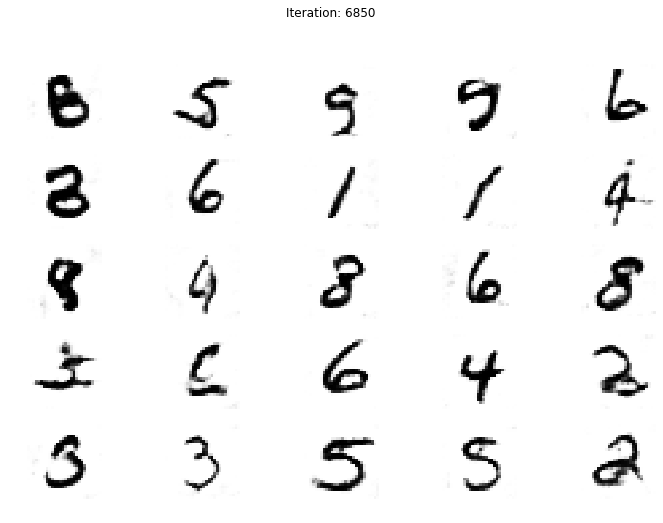

Iteration:  6851 [D loss: 0.69878, acc.:  50.78%] [G loss: 0.76252]
Iteration:  6852 [D loss: 0.68561, acc.:  55.08%] [G loss: 0.76932]
Iteration:  6853 [D loss: 0.69563, acc.:  52.73%] [G loss: 0.74753]
Iteration:  6854 [D loss: 0.69670, acc.:  49.22%] [G loss: 0.76215]
Iteration:  6855 [D loss: 0.69138, acc.:  51.95%] [G loss: 0.76847]
Iteration:  6856 [D loss: 0.70398, acc.:  51.56%] [G loss: 0.71473]
Iteration:  6857 [D loss: 0.69589, acc.:  55.47%] [G loss: 0.74830]
Iteration:  6858 [D loss: 0.70611, acc.:  52.34%] [G loss: 0.73439]
Iteration:  6859 [D loss: 0.72962, acc.:  43.75%] [G loss: 0.74571]
Iteration:  6860 [D loss: 0.70134, acc.:  49.22%] [G loss: 0.76416]
Iteration:  6861 [D loss: 0.73899, acc.:  38.67%] [G loss: 0.76174]
Iteration:  6862 [D loss: 0.70971, acc.:  51.56%] [G loss: 0.79551]
Iteration:  6863 [D loss: 0.72485, acc.:  42.19%] [G loss: 0.75683]
Iteration:  6864 [D loss: 0.71700, acc.:  46.48%] [G loss: 0.77804]
Iteration:  6865 [D loss: 0.69948, acc.:  47.27%

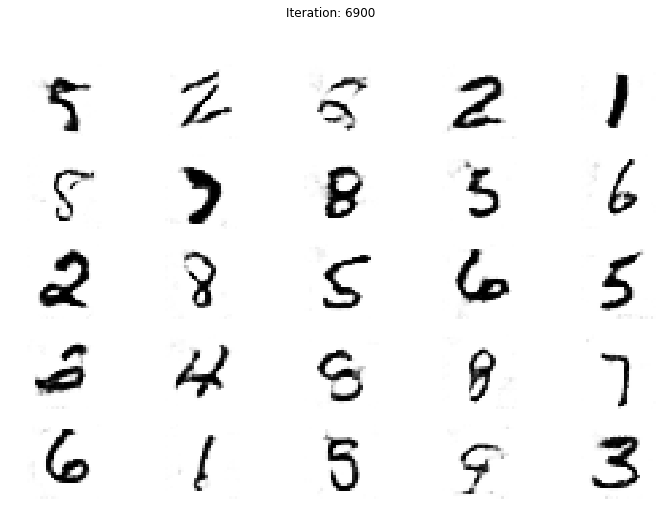

Iteration:  6901 [D loss: 0.71411, acc.:  49.61%] [G loss: 0.78688]
Iteration:  6902 [D loss: 0.72175, acc.:  50.00%] [G loss: 0.73893]
Iteration:  6903 [D loss: 0.69448, acc.:  52.34%] [G loss: 0.79841]
Iteration:  6904 [D loss: 0.70468, acc.:  51.17%] [G loss: 0.75377]
Iteration:  6905 [D loss: 0.72350, acc.:  47.27%] [G loss: 0.78265]
Iteration:  6906 [D loss: 0.72341, acc.:  45.70%] [G loss: 0.78823]
Iteration:  6907 [D loss: 0.70695, acc.:  51.56%] [G loss: 0.78317]
Iteration:  6908 [D loss: 0.69599, acc.:  52.73%] [G loss: 0.75319]
Iteration:  6909 [D loss: 0.70985, acc.:  53.12%] [G loss: 0.75045]
Iteration:  6910 [D loss: 0.70531, acc.:  48.44%] [G loss: 0.77174]
Iteration:  6911 [D loss: 0.70317, acc.:  51.17%] [G loss: 0.77515]
Iteration:  6912 [D loss: 0.69145, acc.:  53.52%] [G loss: 0.78154]
Iteration:  6913 [D loss: 0.68101, acc.:  55.47%] [G loss: 0.75471]
Iteration:  6914 [D loss: 0.69554, acc.:  53.91%] [G loss: 0.78926]
Iteration:  6915 [D loss: 0.72894, acc.:  48.44%

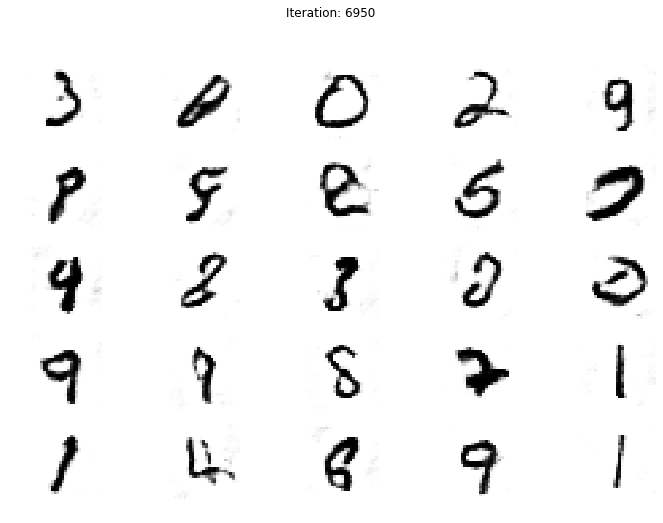

Iteration:  6951 [D loss: 0.68982, acc.:  52.73%] [G loss: 0.75232]
Iteration:  6952 [D loss: 0.69991, acc.:  52.34%] [G loss: 0.74550]
Iteration:  6953 [D loss: 0.72176, acc.:  48.05%] [G loss: 0.76942]
Iteration:  6954 [D loss: 0.69971, acc.:  49.22%] [G loss: 0.75271]
Iteration:  6955 [D loss: 0.71362, acc.:  46.48%] [G loss: 0.77395]
Iteration:  6956 [D loss: 0.69392, acc.:  56.64%] [G loss: 0.79897]
Iteration:  6957 [D loss: 0.70090, acc.:  53.91%] [G loss: 0.75088]
Iteration:  6958 [D loss: 0.71827, acc.:  48.83%] [G loss: 0.77707]
Iteration:  6959 [D loss: 0.71105, acc.:  49.61%] [G loss: 0.77580]
Iteration:  6960 [D loss: 0.71743, acc.:  47.66%] [G loss: 0.77190]
Iteration:  6961 [D loss: 0.70128, acc.:  51.56%] [G loss: 0.75940]
Iteration:  6962 [D loss: 0.68849, acc.:  51.17%] [G loss: 0.78709]
Iteration:  6963 [D loss: 0.67553, acc.:  56.64%] [G loss: 0.79594]
Iteration:  6964 [D loss: 0.70659, acc.:  50.78%] [G loss: 0.76749]
Iteration:  6965 [D loss: 0.70328, acc.:  48.83%

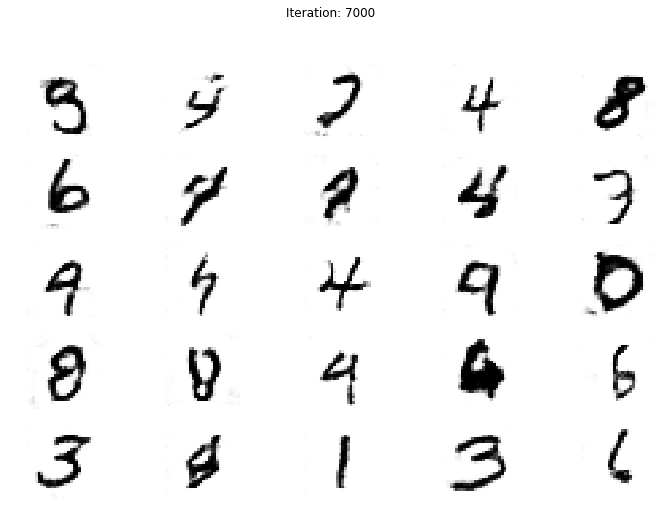

Iteration:  7001 [D loss: 0.71125, acc.:  46.48%] [G loss: 0.76181]
Iteration:  7002 [D loss: 0.71957, acc.:  46.88%] [G loss: 0.73189]
Iteration:  7003 [D loss: 0.69906, acc.:  53.52%] [G loss: 0.72278]
Iteration:  7004 [D loss: 0.75262, acc.:  39.45%] [G loss: 0.73537]
Iteration:  7005 [D loss: 0.71834, acc.:  47.66%] [G loss: 0.74767]
Iteration:  7006 [D loss: 0.67363, acc.:  59.38%] [G loss: 0.76847]
Iteration:  7007 [D loss: 0.69973, acc.:  48.44%] [G loss: 0.72186]
Iteration:  7008 [D loss: 0.70369, acc.:  52.34%] [G loss: 0.75990]
Iteration:  7009 [D loss: 0.69128, acc.:  53.12%] [G loss: 0.75393]
Iteration:  7010 [D loss: 0.70014, acc.:  47.27%] [G loss: 0.78894]
Iteration:  7011 [D loss: 0.71383, acc.:  47.66%] [G loss: 0.76527]
Iteration:  7012 [D loss: 0.70994, acc.:  51.95%] [G loss: 0.77922]
Iteration:  7013 [D loss: 0.68448, acc.:  56.64%] [G loss: 0.75314]
Iteration:  7014 [D loss: 0.68015, acc.:  56.25%] [G loss: 0.72940]
Iteration:  7015 [D loss: 0.70058, acc.:  52.34%

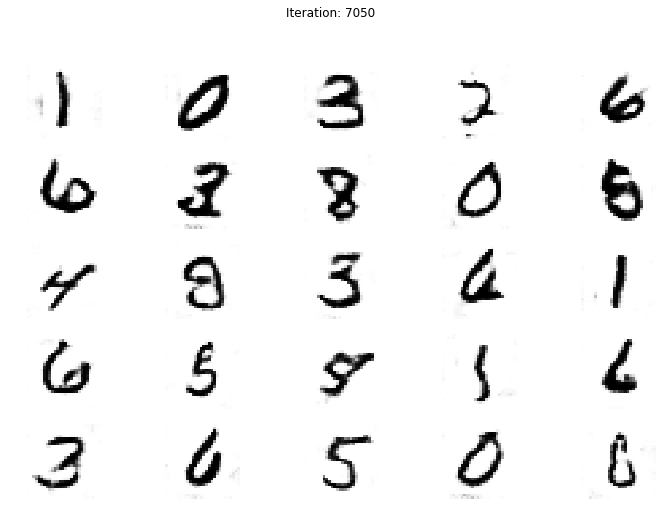

Iteration:  7051 [D loss: 0.72149, acc.:  45.70%] [G loss: 0.74112]
Iteration:  7052 [D loss: 0.69846, acc.:  50.39%] [G loss: 0.75468]
Iteration:  7053 [D loss: 0.70627, acc.:  45.31%] [G loss: 0.76684]
Iteration:  7054 [D loss: 0.69386, acc.:  49.61%] [G loss: 0.74399]
Iteration:  7055 [D loss: 0.70258, acc.:  51.17%] [G loss: 0.76615]
Iteration:  7056 [D loss: 0.70202, acc.:  51.17%] [G loss: 0.75263]
Iteration:  7057 [D loss: 0.70852, acc.:  50.00%] [G loss: 0.77827]
Iteration:  7058 [D loss: 0.69912, acc.:  50.78%] [G loss: 0.76063]
Iteration:  7059 [D loss: 0.69207, acc.:  55.08%] [G loss: 0.75735]
Iteration:  7060 [D loss: 0.72362, acc.:  43.75%] [G loss: 0.73938]
Iteration:  7061 [D loss: 0.73209, acc.:  44.53%] [G loss: 0.74253]
Iteration:  7062 [D loss: 0.72016, acc.:  49.22%] [G loss: 0.75898]
Iteration:  7063 [D loss: 0.69350, acc.:  52.73%] [G loss: 0.77687]
Iteration:  7064 [D loss: 0.72553, acc.:  48.44%] [G loss: 0.78263]
Iteration:  7065 [D loss: 0.72093, acc.:  48.05%

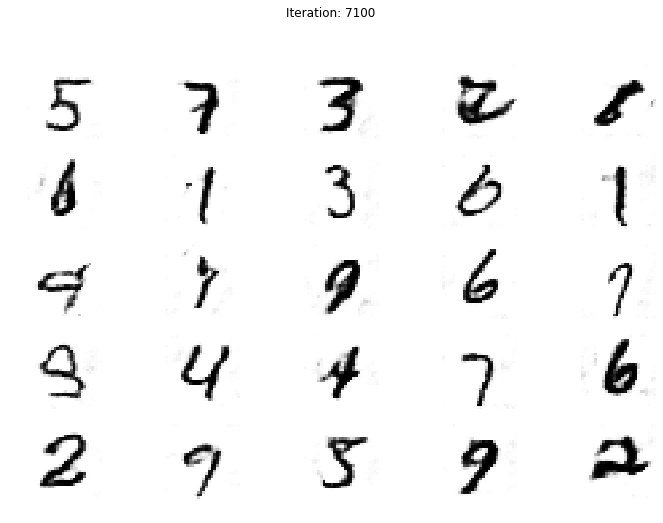

Iteration:  7101 [D loss: 0.72791, acc.:  44.53%] [G loss: 0.76968]
Iteration:  7102 [D loss: 0.69934, acc.:  52.73%] [G loss: 0.80575]
Iteration:  7103 [D loss: 0.71267, acc.:  49.61%] [G loss: 0.79986]
Iteration:  7104 [D loss: 0.69048, acc.:  52.73%] [G loss: 0.75222]
Iteration:  7105 [D loss: 0.68221, acc.:  58.59%] [G loss: 0.73311]
Iteration:  7106 [D loss: 0.69611, acc.:  53.52%] [G loss: 0.73131]
Iteration:  7107 [D loss: 0.70693, acc.:  49.61%] [G loss: 0.77400]
Iteration:  7108 [D loss: 0.70407, acc.:  50.78%] [G loss: 0.73937]
Iteration:  7109 [D loss: 0.71709, acc.:  48.83%] [G loss: 0.79771]
Iteration:  7110 [D loss: 0.70086, acc.:  53.91%] [G loss: 0.75245]
Iteration:  7111 [D loss: 0.71237, acc.:  47.66%] [G loss: 0.76764]
Iteration:  7112 [D loss: 0.71862, acc.:  47.66%] [G loss: 0.78827]
Iteration:  7113 [D loss: 0.71635, acc.:  46.88%] [G loss: 0.77820]
Iteration:  7114 [D loss: 0.72757, acc.:  44.14%] [G loss: 0.76598]
Iteration:  7115 [D loss: 0.71199, acc.:  49.22%

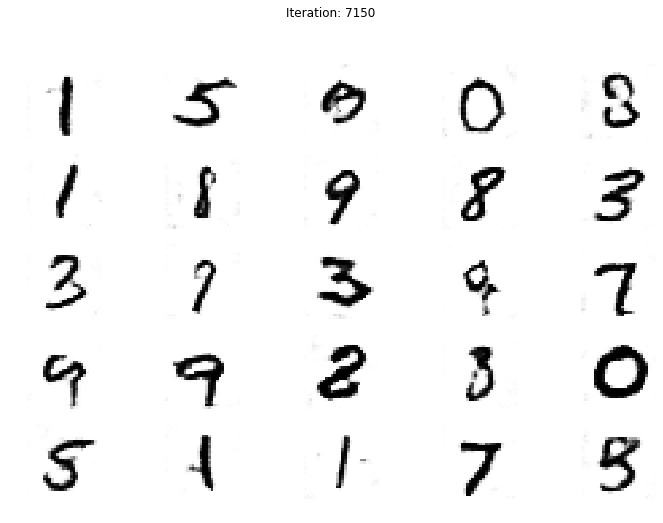

Iteration:  7151 [D loss: 0.70044, acc.:  52.73%] [G loss: 0.74419]
Iteration:  7152 [D loss: 0.70958, acc.:  51.95%] [G loss: 0.76603]
Iteration:  7153 [D loss: 0.69425, acc.:  50.39%] [G loss: 0.78082]
Iteration:  7154 [D loss: 0.69891, acc.:  50.00%] [G loss: 0.78059]
Iteration:  7155 [D loss: 0.69671, acc.:  50.78%] [G loss: 0.75154]
Iteration:  7156 [D loss: 0.71002, acc.:  48.44%] [G loss: 0.76780]
Iteration:  7157 [D loss: 0.71029, acc.:  48.44%] [G loss: 0.73616]
Iteration:  7158 [D loss: 0.71558, acc.:  48.44%] [G loss: 0.74436]
Iteration:  7159 [D loss: 0.69562, acc.:  48.83%] [G loss: 0.74267]
Iteration:  7160 [D loss: 0.69675, acc.:  51.17%] [G loss: 0.76018]
Iteration:  7161 [D loss: 0.70397, acc.:  51.56%] [G loss: 0.74635]
Iteration:  7162 [D loss: 0.71503, acc.:  50.00%] [G loss: 0.77528]
Iteration:  7163 [D loss: 0.70884, acc.:  46.48%] [G loss: 0.73806]
Iteration:  7164 [D loss: 0.69794, acc.:  56.25%] [G loss: 0.79245]
Iteration:  7165 [D loss: 0.71742, acc.:  45.70%

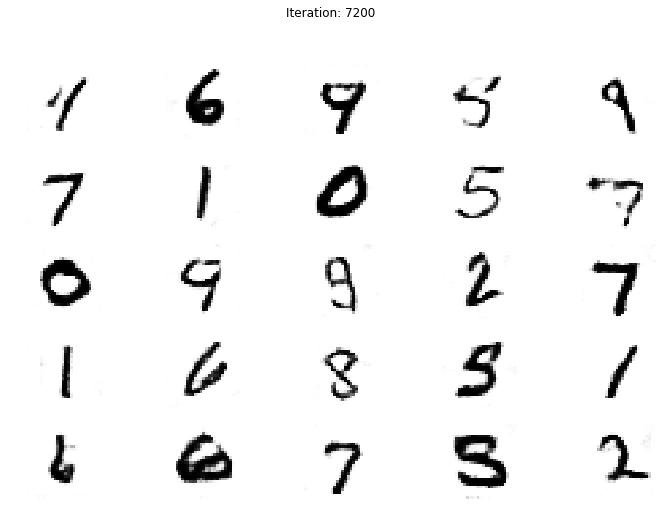

Iteration:  7201 [D loss: 0.67856, acc.:  58.59%] [G loss: 0.79014]
Iteration:  7202 [D loss: 0.72120, acc.:  46.48%] [G loss: 0.76449]
Iteration:  7203 [D loss: 0.71347, acc.:  47.66%] [G loss: 0.75436]
Iteration:  7204 [D loss: 0.69555, acc.:  51.95%] [G loss: 0.81368]
Iteration:  7205 [D loss: 0.70558, acc.:  53.12%] [G loss: 0.75073]
Iteration:  7206 [D loss: 0.70932, acc.:  47.27%] [G loss: 0.77197]
Iteration:  7207 [D loss: 0.69135, acc.:  57.42%] [G loss: 0.76852]
Iteration:  7208 [D loss: 0.71894, acc.:  48.05%] [G loss: 0.74830]
Iteration:  7209 [D loss: 0.71377, acc.:  50.39%] [G loss: 0.79022]
Iteration:  7210 [D loss: 0.69211, acc.:  53.91%] [G loss: 0.75332]
Iteration:  7211 [D loss: 0.70003, acc.:  49.61%] [G loss: 0.76294]
Iteration:  7212 [D loss: 0.69857, acc.:  55.47%] [G loss: 0.72148]
Iteration:  7213 [D loss: 0.69095, acc.:  55.47%] [G loss: 0.74706]
Iteration:  7214 [D loss: 0.68915, acc.:  54.30%] [G loss: 0.78234]
Iteration:  7215 [D loss: 0.69806, acc.:  53.12%

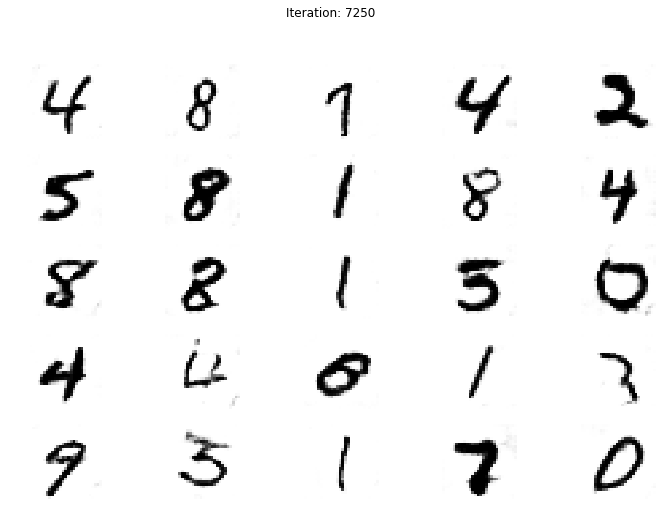

Iteration:  7251 [D loss: 0.73257, acc.:  47.27%] [G loss: 0.78868]
Iteration:  7252 [D loss: 0.68915, acc.:  56.64%] [G loss: 0.74156]
Iteration:  7253 [D loss: 0.71048, acc.:  49.22%] [G loss: 0.76078]
Iteration:  7254 [D loss: 0.71689, acc.:  46.48%] [G loss: 0.76704]
Iteration:  7255 [D loss: 0.69433, acc.:  52.34%] [G loss: 0.75632]
Iteration:  7256 [D loss: 0.71753, acc.:  48.05%] [G loss: 0.76738]
Iteration:  7257 [D loss: 0.69619, acc.:  51.56%] [G loss: 0.77158]
Iteration:  7258 [D loss: 0.72689, acc.:  44.14%] [G loss: 0.75758]
Iteration:  7259 [D loss: 0.68111, acc.:  57.42%] [G loss: 0.74612]
Iteration:  7260 [D loss: 0.70608, acc.:  53.52%] [G loss: 0.75032]
Iteration:  7261 [D loss: 0.69258, acc.:  49.22%] [G loss: 0.77774]
Iteration:  7262 [D loss: 0.70811, acc.:  44.92%] [G loss: 0.76135]
Iteration:  7263 [D loss: 0.69254, acc.:  53.52%] [G loss: 0.77965]
Iteration:  7264 [D loss: 0.68851, acc.:  52.34%] [G loss: 0.76808]
Iteration:  7265 [D loss: 0.73173, acc.:  44.92%

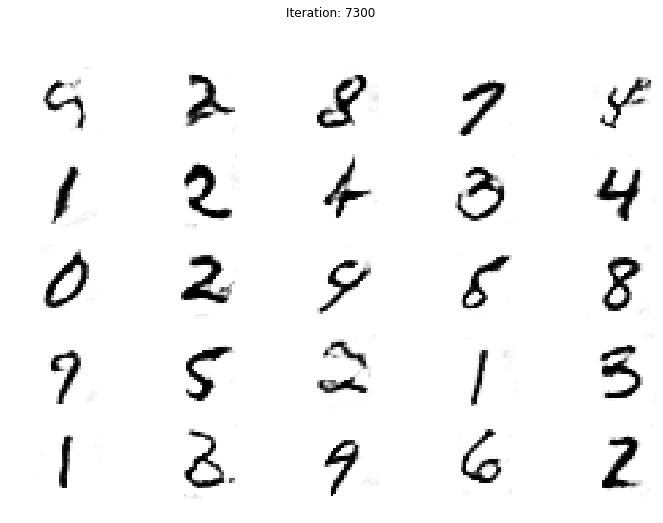

Iteration:  7301 [D loss: 0.69269, acc.:  51.95%] [G loss: 0.77857]
Iteration:  7302 [D loss: 0.69886, acc.:  53.52%] [G loss: 0.78423]
Iteration:  7303 [D loss: 0.70643, acc.:  47.27%] [G loss: 0.77902]
Iteration:  7304 [D loss: 0.70880, acc.:  51.17%] [G loss: 0.76878]
Iteration:  7305 [D loss: 0.70355, acc.:  49.22%] [G loss: 0.78128]
Iteration:  7306 [D loss: 0.72804, acc.:  44.14%] [G loss: 0.74598]
Iteration:  7307 [D loss: 0.71098, acc.:  44.14%] [G loss: 0.78135]
Iteration:  7308 [D loss: 0.69067, acc.:  53.12%] [G loss: 0.77655]
Iteration:  7309 [D loss: 0.71790, acc.:  48.83%] [G loss: 0.74589]
Iteration:  7310 [D loss: 0.71573, acc.:  44.14%] [G loss: 0.72680]
Iteration:  7311 [D loss: 0.71103, acc.:  49.22%] [G loss: 0.77763]
Iteration:  7312 [D loss: 0.68842, acc.:  54.69%] [G loss: 0.76013]
Iteration:  7313 [D loss: 0.70347, acc.:  50.78%] [G loss: 0.74308]
Iteration:  7314 [D loss: 0.70098, acc.:  49.61%] [G loss: 0.75708]
Iteration:  7315 [D loss: 0.68569, acc.:  54.69%

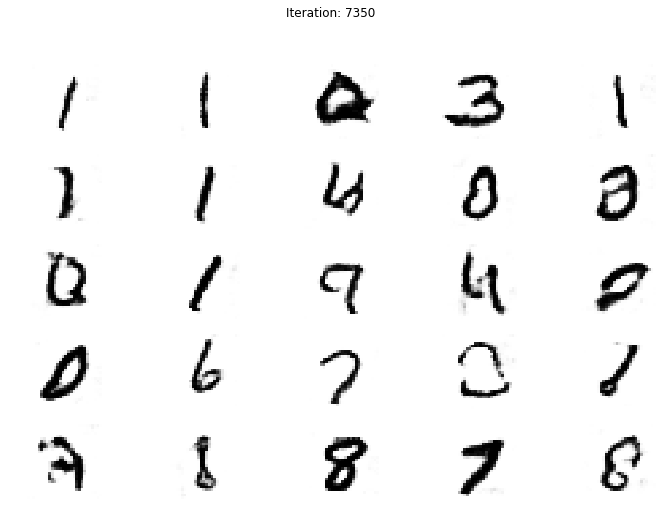

Iteration:  7351 [D loss: 0.70225, acc.:  51.56%] [G loss: 0.78118]
Iteration:  7352 [D loss: 0.70623, acc.:  53.91%] [G loss: 0.76485]
Iteration:  7353 [D loss: 0.71823, acc.:  48.05%] [G loss: 0.77661]
Iteration:  7354 [D loss: 0.69598, acc.:  53.12%] [G loss: 0.72867]
Iteration:  7355 [D loss: 0.70873, acc.:  49.61%] [G loss: 0.77233]
Iteration:  7356 [D loss: 0.69426, acc.:  54.30%] [G loss: 0.79379]
Iteration:  7357 [D loss: 0.70331, acc.:  49.61%] [G loss: 0.76610]
Iteration:  7358 [D loss: 0.70533, acc.:  49.22%] [G loss: 0.76047]
Iteration:  7359 [D loss: 0.69975, acc.:  51.95%] [G loss: 0.78296]
Iteration:  7360 [D loss: 0.70063, acc.:  54.30%] [G loss: 0.76736]
Iteration:  7361 [D loss: 0.69919, acc.:  53.12%] [G loss: 0.76445]
Iteration:  7362 [D loss: 0.69235, acc.:  50.00%] [G loss: 0.75280]
Iteration:  7363 [D loss: 0.69255, acc.:  53.12%] [G loss: 0.76994]
Iteration:  7364 [D loss: 0.73479, acc.:  45.31%] [G loss: 0.78652]
Iteration:  7365 [D loss: 0.69856, acc.:  55.47%

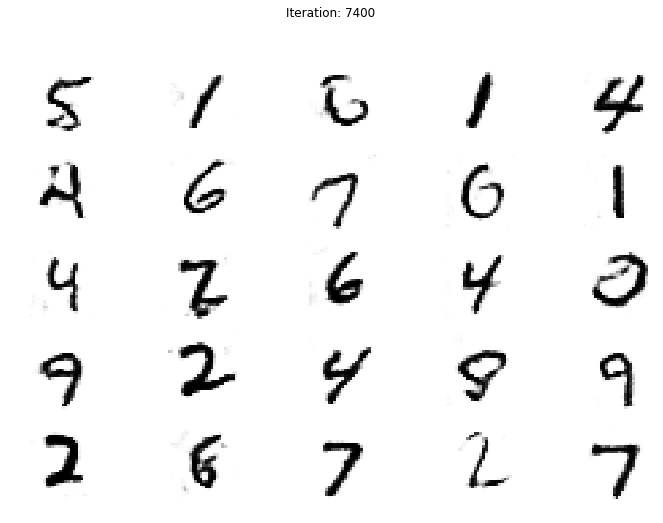

Iteration:  7401 [D loss: 0.71323, acc.:  51.95%] [G loss: 0.77385]
Iteration:  7402 [D loss: 0.70383, acc.:  50.39%] [G loss: 0.73974]
Iteration:  7403 [D loss: 0.71350, acc.:  46.88%] [G loss: 0.79567]
Iteration:  7404 [D loss: 0.69844, acc.:  52.73%] [G loss: 0.78661]
Iteration:  7405 [D loss: 0.70375, acc.:  50.78%] [G loss: 0.79941]
Iteration:  7406 [D loss: 0.70209, acc.:  53.91%] [G loss: 0.77417]
Iteration:  7407 [D loss: 0.70722, acc.:  47.27%] [G loss: 0.76909]
Iteration:  7408 [D loss: 0.71212, acc.:  51.95%] [G loss: 0.79488]
Iteration:  7409 [D loss: 0.71530, acc.:  47.27%] [G loss: 0.75159]
Iteration:  7410 [D loss: 0.70995, acc.:  51.95%] [G loss: 0.73937]
Iteration:  7411 [D loss: 0.71606, acc.:  46.88%] [G loss: 0.74687]
Iteration:  7412 [D loss: 0.70287, acc.:  53.52%] [G loss: 0.74031]
Iteration:  7413 [D loss: 0.70346, acc.:  48.44%] [G loss: 0.77061]
Iteration:  7414 [D loss: 0.71436, acc.:  46.09%] [G loss: 0.77510]
Iteration:  7415 [D loss: 0.69650, acc.:  53.12%

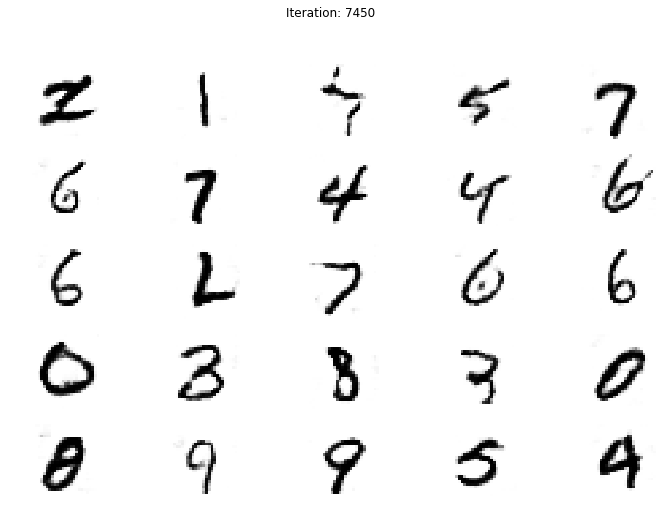

Iteration:  7451 [D loss: 0.69251, acc.:  53.52%] [G loss: 0.74801]
Iteration:  7452 [D loss: 0.69362, acc.:  55.47%] [G loss: 0.77697]
Iteration:  7453 [D loss: 0.71268, acc.:  52.73%] [G loss: 0.75428]
Iteration:  7454 [D loss: 0.70231, acc.:  53.91%] [G loss: 0.79506]
Iteration:  7455 [D loss: 0.70807, acc.:  51.17%] [G loss: 0.74024]
Iteration:  7456 [D loss: 0.70098, acc.:  52.73%] [G loss: 0.74931]
Iteration:  7457 [D loss: 0.71221, acc.:  53.52%] [G loss: 0.73950]
Iteration:  7458 [D loss: 0.72157, acc.:  45.31%] [G loss: 0.74469]
Iteration:  7459 [D loss: 0.71620, acc.:  46.09%] [G loss: 0.76107]
Iteration:  7460 [D loss: 0.70381, acc.:  52.34%] [G loss: 0.76327]
Iteration:  7461 [D loss: 0.70576, acc.:  51.95%] [G loss: 0.77824]
Iteration:  7462 [D loss: 0.70785, acc.:  50.00%] [G loss: 0.76352]
Iteration:  7463 [D loss: 0.68537, acc.:  58.98%] [G loss: 0.77055]
Iteration:  7464 [D loss: 0.71567, acc.:  45.70%] [G loss: 0.77794]
Iteration:  7465 [D loss: 0.69113, acc.:  52.73%

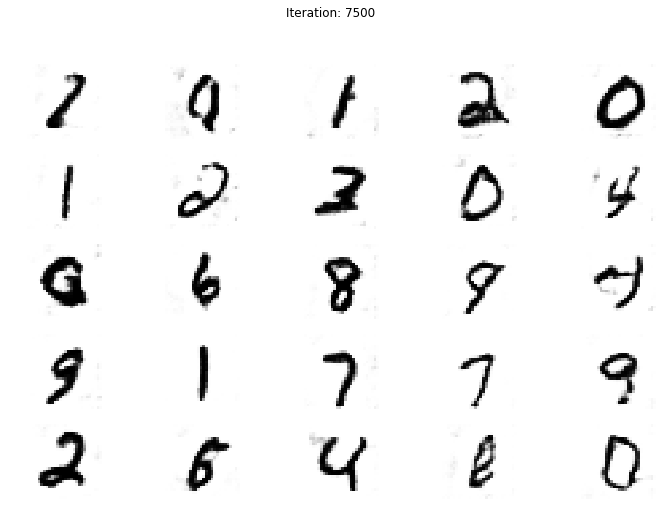

Iteration:  7501 [D loss: 0.71528, acc.:  44.53%] [G loss: 0.76521]
Iteration:  7502 [D loss: 0.70165, acc.:  51.56%] [G loss: 0.74120]
Iteration:  7503 [D loss: 0.68742, acc.:  53.52%] [G loss: 0.79419]
Iteration:  7504 [D loss: 0.69390, acc.:  53.12%] [G loss: 0.77242]
Iteration:  7505 [D loss: 0.72242, acc.:  43.75%] [G loss: 0.78102]
Iteration:  7506 [D loss: 0.71631, acc.:  49.22%] [G loss: 0.74137]
Iteration:  7507 [D loss: 0.68683, acc.:  51.56%] [G loss: 0.74402]
Iteration:  7508 [D loss: 0.70024, acc.:  49.61%] [G loss: 0.76973]
Iteration:  7509 [D loss: 0.69563, acc.:  51.56%] [G loss: 0.76724]
Iteration:  7510 [D loss: 0.72217, acc.:  46.48%] [G loss: 0.75651]
Iteration:  7511 [D loss: 0.68780, acc.:  55.47%] [G loss: 0.76162]
Iteration:  7512 [D loss: 0.70073, acc.:  48.44%] [G loss: 0.78269]
Iteration:  7513 [D loss: 0.71154, acc.:  48.83%] [G loss: 0.75492]
Iteration:  7514 [D loss: 0.69074, acc.:  56.25%] [G loss: 0.76867]
Iteration:  7515 [D loss: 0.71974, acc.:  48.05%

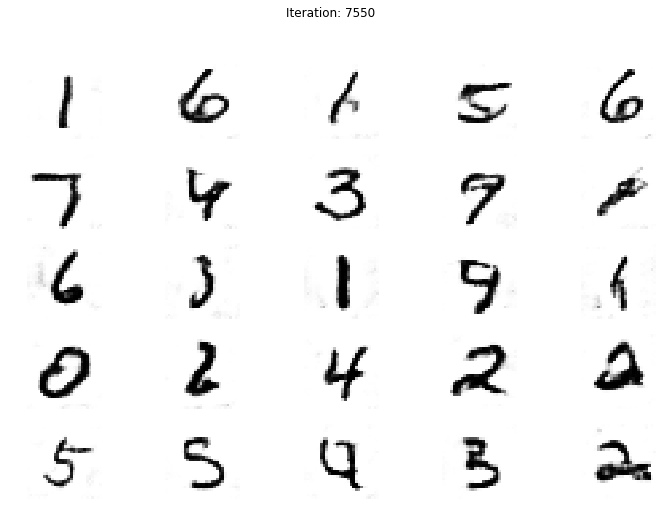

Iteration:  7551 [D loss: 0.69800, acc.:  52.73%] [G loss: 0.78076]
Iteration:  7552 [D loss: 0.69032, acc.:  53.91%] [G loss: 0.75003]
Iteration:  7553 [D loss: 0.69368, acc.:  54.69%] [G loss: 0.77261]
Iteration:  7554 [D loss: 0.72440, acc.:  46.88%] [G loss: 0.75880]
Iteration:  7555 [D loss: 0.70579, acc.:  50.78%] [G loss: 0.78134]
Iteration:  7556 [D loss: 0.71896, acc.:  48.83%] [G loss: 0.74662]
Iteration:  7557 [D loss: 0.71039, acc.:  48.83%] [G loss: 0.78880]
Iteration:  7558 [D loss: 0.70182, acc.:  51.17%] [G loss: 0.79550]
Iteration:  7559 [D loss: 0.71147, acc.:  49.22%] [G loss: 0.78246]
Iteration:  7560 [D loss: 0.69736, acc.:  53.52%] [G loss: 0.74454]
Iteration:  7561 [D loss: 0.70991, acc.:  47.27%] [G loss: 0.76383]
Iteration:  7562 [D loss: 0.72903, acc.:  41.02%] [G loss: 0.78465]
Iteration:  7563 [D loss: 0.72847, acc.:  50.00%] [G loss: 0.74371]
Iteration:  7564 [D loss: 0.69483, acc.:  51.56%] [G loss: 0.76054]
Iteration:  7565 [D loss: 0.69101, acc.:  51.56%

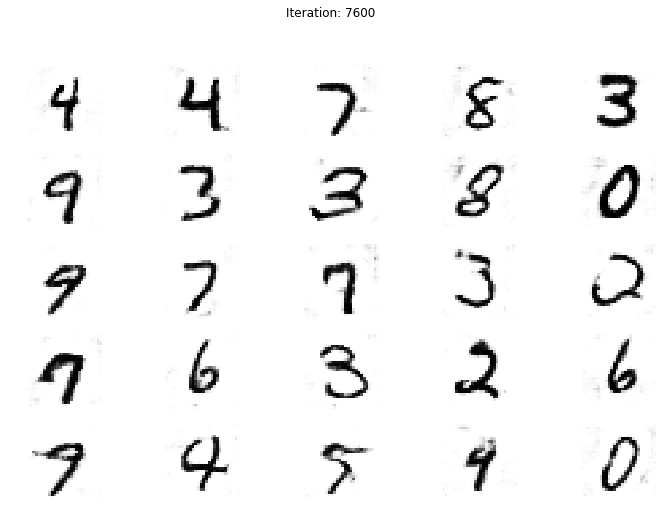

Iteration:  7601 [D loss: 0.71135, acc.:  44.53%] [G loss: 0.79540]
Iteration:  7602 [D loss: 0.71167, acc.:  48.83%] [G loss: 0.76567]
Iteration:  7603 [D loss: 0.69791, acc.:  53.12%] [G loss: 0.75404]
Iteration:  7604 [D loss: 0.70715, acc.:  52.34%] [G loss: 0.79728]
Iteration:  7605 [D loss: 0.69095, acc.:  51.95%] [G loss: 0.76442]
Iteration:  7606 [D loss: 0.72229, acc.:  47.66%] [G loss: 0.73734]
Iteration:  7607 [D loss: 0.71216, acc.:  50.00%] [G loss: 0.76960]
Iteration:  7608 [D loss: 0.70019, acc.:  51.56%] [G loss: 0.75494]
Iteration:  7609 [D loss: 0.70561, acc.:  50.39%] [G loss: 0.73202]
Iteration:  7610 [D loss: 0.71415, acc.:  48.05%] [G loss: 0.75973]
Iteration:  7611 [D loss: 0.70773, acc.:  51.56%] [G loss: 0.75968]
Iteration:  7612 [D loss: 0.71105, acc.:  50.78%] [G loss: 0.75462]
Iteration:  7613 [D loss: 0.72049, acc.:  48.83%] [G loss: 0.76457]
Iteration:  7614 [D loss: 0.68198, acc.:  55.86%] [G loss: 0.76283]
Iteration:  7615 [D loss: 0.70256, acc.:  49.61%

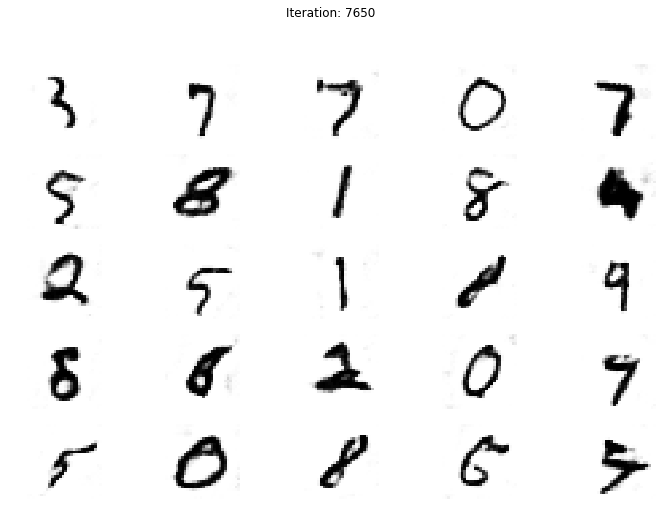

Iteration:  7651 [D loss: 0.69669, acc.:  53.12%] [G loss: 0.76957]
Iteration:  7652 [D loss: 0.69345, acc.:  51.95%] [G loss: 0.74879]
Iteration:  7653 [D loss: 0.70530, acc.:  51.17%] [G loss: 0.76046]
Iteration:  7654 [D loss: 0.69370, acc.:  51.17%] [G loss: 0.74796]
Iteration:  7655 [D loss: 0.71173, acc.:  49.61%] [G loss: 0.75903]
Iteration:  7656 [D loss: 0.71844, acc.:  45.70%] [G loss: 0.76009]
Iteration:  7657 [D loss: 0.70070, acc.:  51.95%] [G loss: 0.76751]
Iteration:  7658 [D loss: 0.71639, acc.:  50.39%] [G loss: 0.72506]
Iteration:  7659 [D loss: 0.71900, acc.:  46.09%] [G loss: 0.74765]
Iteration:  7660 [D loss: 0.73001, acc.:  44.53%] [G loss: 0.76003]
Iteration:  7661 [D loss: 0.71094, acc.:  47.66%] [G loss: 0.77596]
Iteration:  7662 [D loss: 0.71380, acc.:  46.48%] [G loss: 0.74882]
Iteration:  7663 [D loss: 0.71480, acc.:  47.27%] [G loss: 0.77732]
Iteration:  7664 [D loss: 0.71560, acc.:  46.09%] [G loss: 0.77656]
Iteration:  7665 [D loss: 0.70353, acc.:  50.78%

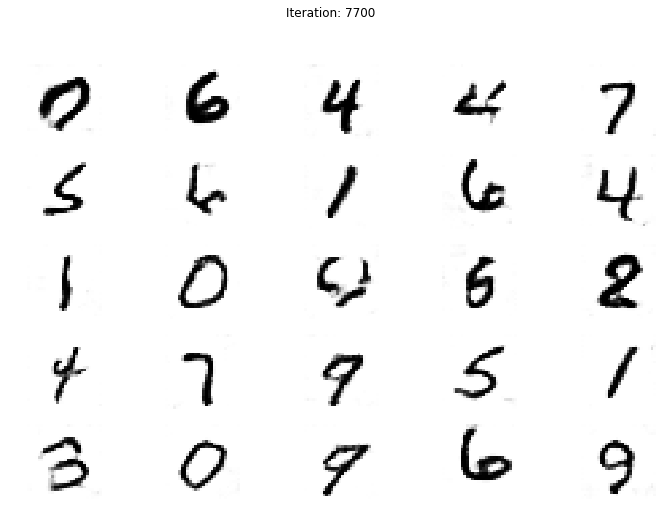

Iteration:  7701 [D loss: 0.69608, acc.:  48.44%] [G loss: 0.76061]
Iteration:  7702 [D loss: 0.70126, acc.:  50.78%] [G loss: 0.76934]
Iteration:  7703 [D loss: 0.70107, acc.:  52.73%] [G loss: 0.76287]
Iteration:  7704 [D loss: 0.71424, acc.:  46.88%] [G loss: 0.76289]
Iteration:  7705 [D loss: 0.68796, acc.:  55.08%] [G loss: 0.74489]
Iteration:  7706 [D loss: 0.69029, acc.:  54.69%] [G loss: 0.75369]
Iteration:  7707 [D loss: 0.70427, acc.:  49.61%] [G loss: 0.76442]
Iteration:  7708 [D loss: 0.70528, acc.:  51.95%] [G loss: 0.77308]
Iteration:  7709 [D loss: 0.69299, acc.:  56.64%] [G loss: 0.76592]
Iteration:  7710 [D loss: 0.71602, acc.:  46.48%] [G loss: 0.73923]
Iteration:  7711 [D loss: 0.71102, acc.:  44.92%] [G loss: 0.77361]
Iteration:  7712 [D loss: 0.70979, acc.:  51.56%] [G loss: 0.76342]
Iteration:  7713 [D loss: 0.70303, acc.:  50.78%] [G loss: 0.77159]
Iteration:  7714 [D loss: 0.69436, acc.:  53.52%] [G loss: 0.78549]
Iteration:  7715 [D loss: 0.72573, acc.:  46.88%

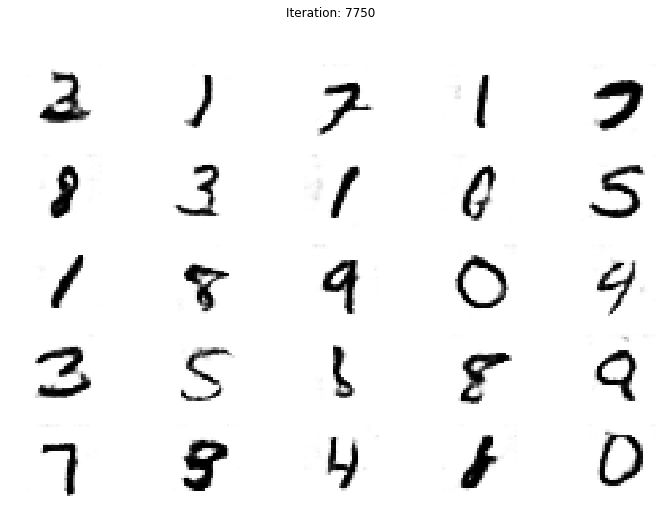

Iteration:  7751 [D loss: 0.72288, acc.:  48.83%] [G loss: 0.72800]
Iteration:  7752 [D loss: 0.70593, acc.:  49.22%] [G loss: 0.73393]
Iteration:  7753 [D loss: 0.70336, acc.:  52.73%] [G loss: 0.76758]
Iteration:  7754 [D loss: 0.71335, acc.:  47.27%] [G loss: 0.76361]
Iteration:  7755 [D loss: 0.70849, acc.:  49.61%] [G loss: 0.76830]
Iteration:  7756 [D loss: 0.68890, acc.:  58.20%] [G loss: 0.75890]
Iteration:  7757 [D loss: 0.70589, acc.:  48.83%] [G loss: 0.77081]
Iteration:  7758 [D loss: 0.69360, acc.:  53.12%] [G loss: 0.79258]
Iteration:  7759 [D loss: 0.70336, acc.:  51.56%] [G loss: 0.76657]
Iteration:  7760 [D loss: 0.70737, acc.:  46.09%] [G loss: 0.80064]
Iteration:  7761 [D loss: 0.71468, acc.:  54.69%] [G loss: 0.76503]
Iteration:  7762 [D loss: 0.70130, acc.:  52.73%] [G loss: 0.78367]
Iteration:  7763 [D loss: 0.68950, acc.:  55.08%] [G loss: 0.77903]
Iteration:  7764 [D loss: 0.69020, acc.:  54.30%] [G loss: 0.76749]
Iteration:  7765 [D loss: 0.71425, acc.:  49.61%

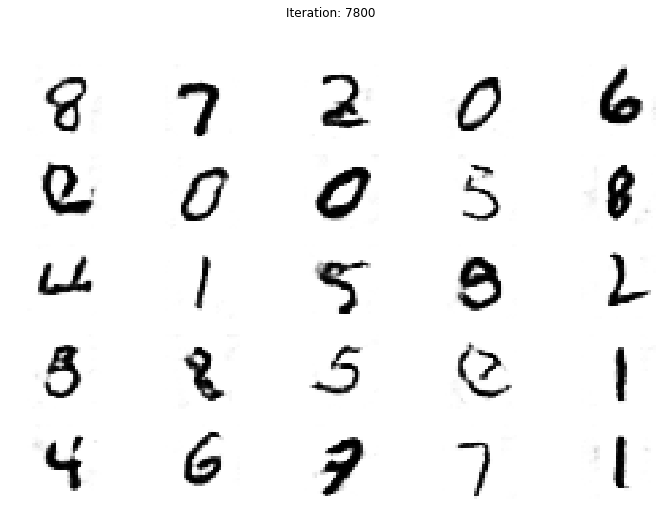

Iteration:  7801 [D loss: 0.72275, acc.:  47.27%] [G loss: 0.79141]
Iteration:  7802 [D loss: 0.70915, acc.:  46.88%] [G loss: 0.76349]
Iteration:  7803 [D loss: 0.70514, acc.:  51.56%] [G loss: 0.78448]
Iteration:  7804 [D loss: 0.71120, acc.:  48.44%] [G loss: 0.75170]
Iteration:  7805 [D loss: 0.69119, acc.:  51.56%] [G loss: 0.72904]
Iteration:  7806 [D loss: 0.71740, acc.:  48.83%] [G loss: 0.74587]
Iteration:  7807 [D loss: 0.71320, acc.:  48.05%] [G loss: 0.76568]
Iteration:  7808 [D loss: 0.71080, acc.:  46.88%] [G loss: 0.72688]
Iteration:  7809 [D loss: 0.68962, acc.:  54.30%] [G loss: 0.73048]
Iteration:  7810 [D loss: 0.70451, acc.:  48.83%] [G loss: 0.77513]
Iteration:  7811 [D loss: 0.69596, acc.:  53.91%] [G loss: 0.76705]
Iteration:  7812 [D loss: 0.71668, acc.:  47.27%] [G loss: 0.76096]
Iteration:  7813 [D loss: 0.71378, acc.:  46.09%] [G loss: 0.78057]
Iteration:  7814 [D loss: 0.69854, acc.:  51.56%] [G loss: 0.74347]
Iteration:  7815 [D loss: 0.69796, acc.:  55.86%

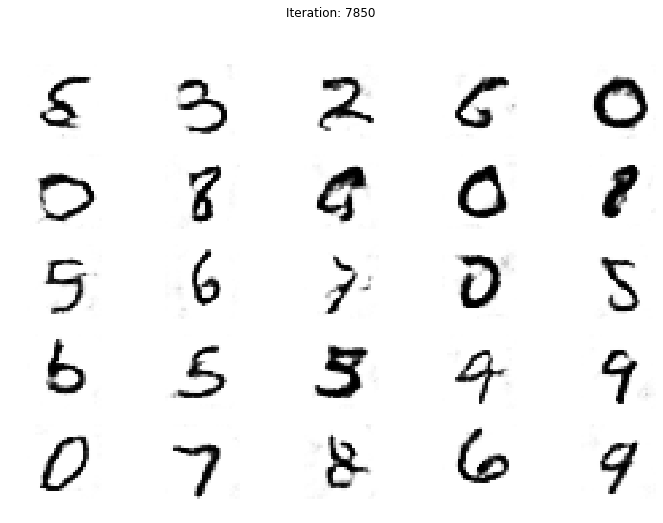

Iteration:  7851 [D loss: 0.70438, acc.:  47.66%] [G loss: 0.78685]
Iteration:  7852 [D loss: 0.70321, acc.:  54.69%] [G loss: 0.71000]
Iteration:  7853 [D loss: 0.71441, acc.:  51.17%] [G loss: 0.78551]
Iteration:  7854 [D loss: 0.69629, acc.:  54.30%] [G loss: 0.75096]
Iteration:  7855 [D loss: 0.71510, acc.:  48.83%] [G loss: 0.75404]
Iteration:  7856 [D loss: 0.70778, acc.:  45.31%] [G loss: 0.79337]
Iteration:  7857 [D loss: 0.71712, acc.:  50.39%] [G loss: 0.75347]
Iteration:  7858 [D loss: 0.70312, acc.:  53.91%] [G loss: 0.73136]
Iteration:  7859 [D loss: 0.68123, acc.:  53.91%] [G loss: 0.74934]
Iteration:  7860 [D loss: 0.70966, acc.:  51.17%] [G loss: 0.77560]
Iteration:  7861 [D loss: 0.70899, acc.:  43.75%] [G loss: 0.76957]
Iteration:  7862 [D loss: 0.71633, acc.:  49.22%] [G loss: 0.77077]
Iteration:  7863 [D loss: 0.71710, acc.:  46.09%] [G loss: 0.76225]
Iteration:  7864 [D loss: 0.70817, acc.:  50.78%] [G loss: 0.75386]
Iteration:  7865 [D loss: 0.70312, acc.:  48.83%

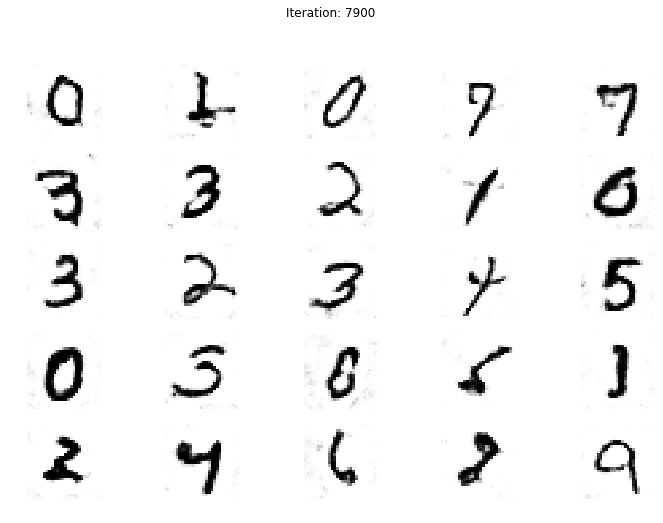

Iteration:  7901 [D loss: 0.70124, acc.:  54.30%] [G loss: 0.75901]
Iteration:  7902 [D loss: 0.72648, acc.:  46.09%] [G loss: 0.76809]
Iteration:  7903 [D loss: 0.68555, acc.:  52.34%] [G loss: 0.76119]
Iteration:  7904 [D loss: 0.68924, acc.:  53.12%] [G loss: 0.72382]
Iteration:  7905 [D loss: 0.69553, acc.:  52.34%] [G loss: 0.79937]
Iteration:  7906 [D loss: 0.70188, acc.:  49.22%] [G loss: 0.76395]
Iteration:  7907 [D loss: 0.72329, acc.:  49.61%] [G loss: 0.76993]
Iteration:  7908 [D loss: 0.68174, acc.:  53.91%] [G loss: 0.77304]
Iteration:  7909 [D loss: 0.70512, acc.:  51.56%] [G loss: 0.74515]
Iteration:  7910 [D loss: 0.71305, acc.:  51.95%] [G loss: 0.74651]
Iteration:  7911 [D loss: 0.71094, acc.:  43.36%] [G loss: 0.73966]
Iteration:  7912 [D loss: 0.69349, acc.:  54.69%] [G loss: 0.75243]
Iteration:  7913 [D loss: 0.70543, acc.:  48.83%] [G loss: 0.73296]
Iteration:  7914 [D loss: 0.71409, acc.:  48.44%] [G loss: 0.75888]
Iteration:  7915 [D loss: 0.70477, acc.:  46.88%

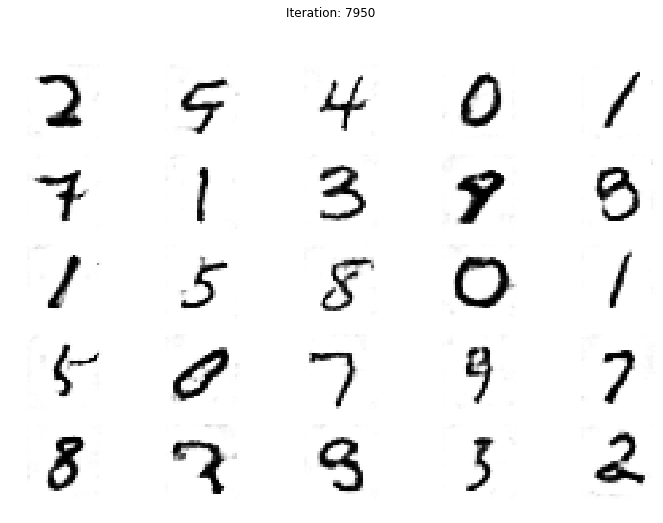

Iteration:  7951 [D loss: 0.71790, acc.:  42.97%] [G loss: 0.74310]
Iteration:  7952 [D loss: 0.70153, acc.:  50.39%] [G loss: 0.77861]
Iteration:  7953 [D loss: 0.68310, acc.:  54.69%] [G loss: 0.75477]
Iteration:  7954 [D loss: 0.71390, acc.:  44.14%] [G loss: 0.76249]
Iteration:  7955 [D loss: 0.70264, acc.:  50.39%] [G loss: 0.75360]
Iteration:  7956 [D loss: 0.73826, acc.:  42.97%] [G loss: 0.72096]
Iteration:  7957 [D loss: 0.69095, acc.:  50.00%] [G loss: 0.74682]
Iteration:  7958 [D loss: 0.68666, acc.:  57.03%] [G loss: 0.76209]
Iteration:  7959 [D loss: 0.69430, acc.:  51.56%] [G loss: 0.77748]
Iteration:  7960 [D loss: 0.68253, acc.:  52.34%] [G loss: 0.77294]
Iteration:  7961 [D loss: 0.69247, acc.:  50.00%] [G loss: 0.75153]
Iteration:  7962 [D loss: 0.69185, acc.:  56.25%] [G loss: 0.76544]
Iteration:  7963 [D loss: 0.68673, acc.:  55.08%] [G loss: 0.76044]
Iteration:  7964 [D loss: 0.68852, acc.:  55.08%] [G loss: 0.78345]
Iteration:  7965 [D loss: 0.72290, acc.:  42.58%

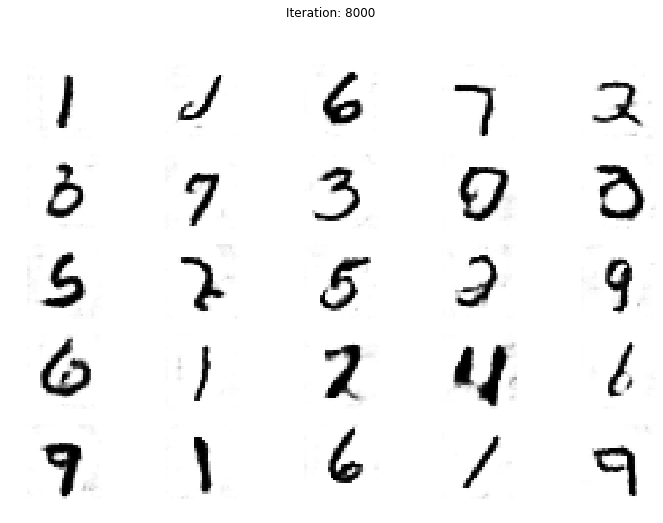

Iteration:  8001 [D loss: 0.70786, acc.:  51.56%] [G loss: 0.75095]
Iteration:  8002 [D loss: 0.70109, acc.:  54.30%] [G loss: 0.75521]
Iteration:  8003 [D loss: 0.68775, acc.:  49.61%] [G loss: 0.73312]
Iteration:  8004 [D loss: 0.69717, acc.:  52.34%] [G loss: 0.76207]
Iteration:  8005 [D loss: 0.69474, acc.:  53.12%] [G loss: 0.74513]
Iteration:  8006 [D loss: 0.71627, acc.:  51.17%] [G loss: 0.74784]
Iteration:  8007 [D loss: 0.69805, acc.:  48.83%] [G loss: 0.76961]
Iteration:  8008 [D loss: 0.71570, acc.:  46.48%] [G loss: 0.75364]
Iteration:  8009 [D loss: 0.69861, acc.:  48.05%] [G loss: 0.75256]
Iteration:  8010 [D loss: 0.71567, acc.:  46.88%] [G loss: 0.76611]
Iteration:  8011 [D loss: 0.72523, acc.:  47.27%] [G loss: 0.75971]
Iteration:  8012 [D loss: 0.69742, acc.:  52.73%] [G loss: 0.76183]
Iteration:  8013 [D loss: 0.68290, acc.:  54.69%] [G loss: 0.74382]
Iteration:  8014 [D loss: 0.71598, acc.:  47.66%] [G loss: 0.76832]
Iteration:  8015 [D loss: 0.70774, acc.:  49.22%

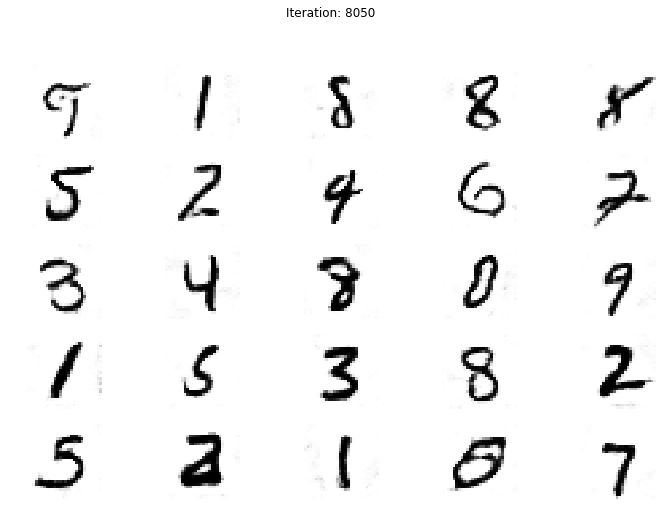

Iteration:  8051 [D loss: 0.70610, acc.:  50.78%] [G loss: 0.76442]
Iteration:  8052 [D loss: 0.67779, acc.:  58.98%] [G loss: 0.74165]
Iteration:  8053 [D loss: 0.69859, acc.:  53.12%] [G loss: 0.75211]
Iteration:  8054 [D loss: 0.71024, acc.:  49.22%] [G loss: 0.74868]
Iteration:  8055 [D loss: 0.70321, acc.:  49.22%] [G loss: 0.78736]
Iteration:  8056 [D loss: 0.71323, acc.:  50.39%] [G loss: 0.79225]
Iteration:  8057 [D loss: 0.70726, acc.:  47.66%] [G loss: 0.77115]
Iteration:  8058 [D loss: 0.69762, acc.:  51.56%] [G loss: 0.74416]
Iteration:  8059 [D loss: 0.68932, acc.:  51.56%] [G loss: 0.77273]
Iteration:  8060 [D loss: 0.69901, acc.:  49.61%] [G loss: 0.76210]
Iteration:  8061 [D loss: 0.70631, acc.:  48.05%] [G loss: 0.75813]
Iteration:  8062 [D loss: 0.71345, acc.:  49.61%] [G loss: 0.76723]
Iteration:  8063 [D loss: 0.69457, acc.:  52.73%] [G loss: 0.74864]
Iteration:  8064 [D loss: 0.69730, acc.:  50.78%] [G loss: 0.77167]
Iteration:  8065 [D loss: 0.71521, acc.:  46.88%

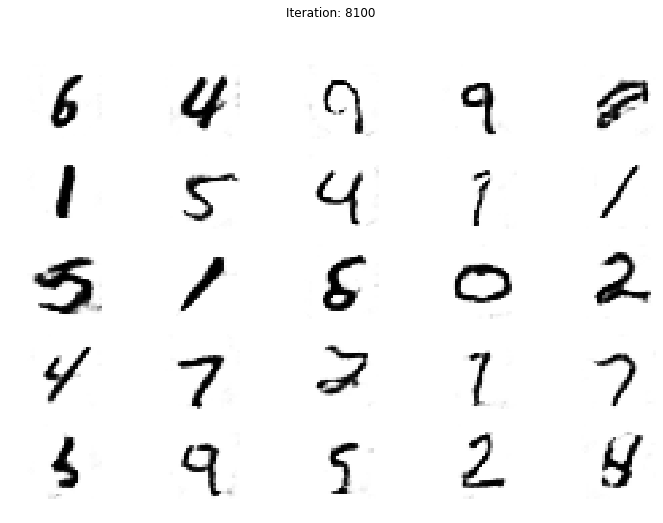

Iteration:  8101 [D loss: 0.70829, acc.:  48.44%] [G loss: 0.74105]
Iteration:  8102 [D loss: 0.69906, acc.:  51.95%] [G loss: 0.77006]
Iteration:  8103 [D loss: 0.70241, acc.:  46.88%] [G loss: 0.73622]
Iteration:  8104 [D loss: 0.72226, acc.:  45.31%] [G loss: 0.76963]
Iteration:  8105 [D loss: 0.72768, acc.:  48.83%] [G loss: 0.75901]
Iteration:  8106 [D loss: 0.71156, acc.:  48.83%] [G loss: 0.77267]
Iteration:  8107 [D loss: 0.71201, acc.:  46.88%] [G loss: 0.73281]
Iteration:  8108 [D loss: 0.72089, acc.:  45.70%] [G loss: 0.74072]
Iteration:  8109 [D loss: 0.69677, acc.:  51.95%] [G loss: 0.77799]
Iteration:  8110 [D loss: 0.71626, acc.:  48.05%] [G loss: 0.71547]
Iteration:  8111 [D loss: 0.69773, acc.:  50.00%] [G loss: 0.75547]
Iteration:  8112 [D loss: 0.69689, acc.:  56.64%] [G loss: 0.76931]
Iteration:  8113 [D loss: 0.68540, acc.:  55.86%] [G loss: 0.76186]
Iteration:  8114 [D loss: 0.71804, acc.:  46.09%] [G loss: 0.75882]
Iteration:  8115 [D loss: 0.70652, acc.:  50.78%

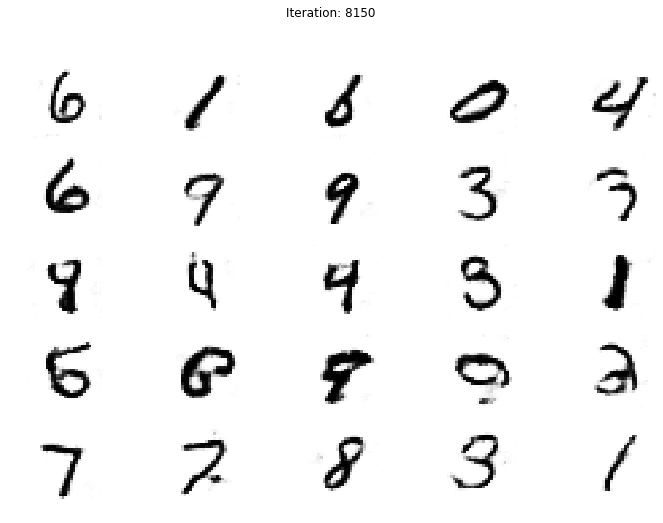

Iteration:  8151 [D loss: 0.72065, acc.:  48.05%] [G loss: 0.77237]
Iteration:  8152 [D loss: 0.69964, acc.:  51.56%] [G loss: 0.78927]
Iteration:  8153 [D loss: 0.70229, acc.:  52.73%] [G loss: 0.75809]
Iteration:  8154 [D loss: 0.70352, acc.:  47.27%] [G loss: 0.75448]
Iteration:  8155 [D loss: 0.72120, acc.:  44.14%] [G loss: 0.74161]
Iteration:  8156 [D loss: 0.68334, acc.:  54.69%] [G loss: 0.73927]
Iteration:  8157 [D loss: 0.68473, acc.:  52.34%] [G loss: 0.75552]
Iteration:  8158 [D loss: 0.69174, acc.:  51.95%] [G loss: 0.75949]
Iteration:  8159 [D loss: 0.71710, acc.:  45.31%] [G loss: 0.76094]
Iteration:  8160 [D loss: 0.69362, acc.:  50.78%] [G loss: 0.81473]
Iteration:  8161 [D loss: 0.70440, acc.:  49.22%] [G loss: 0.79071]
Iteration:  8162 [D loss: 0.69106, acc.:  53.52%] [G loss: 0.73890]
Iteration:  8163 [D loss: 0.69399, acc.:  52.34%] [G loss: 0.72611]
Iteration:  8164 [D loss: 0.71800, acc.:  46.09%] [G loss: 0.77118]
Iteration:  8165 [D loss: 0.70765, acc.:  49.22%

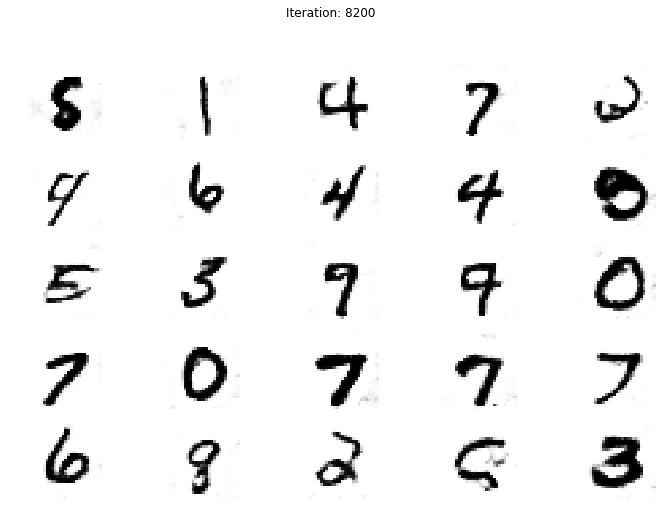

Iteration:  8201 [D loss: 0.69942, acc.:  49.61%] [G loss: 0.75158]
Iteration:  8202 [D loss: 0.70290, acc.:  49.61%] [G loss: 0.75655]
Iteration:  8203 [D loss: 0.73056, acc.:  42.97%] [G loss: 0.76721]
Iteration:  8204 [D loss: 0.71079, acc.:  46.88%] [G loss: 0.78335]
Iteration:  8205 [D loss: 0.69283, acc.:  50.78%] [G loss: 0.77185]
Iteration:  8206 [D loss: 0.71014, acc.:  48.83%] [G loss: 0.75990]
Iteration:  8207 [D loss: 0.71060, acc.:  50.00%] [G loss: 0.73950]
Iteration:  8208 [D loss: 0.69721, acc.:  52.34%] [G loss: 0.78211]
Iteration:  8209 [D loss: 0.69840, acc.:  52.34%] [G loss: 0.73560]
Iteration:  8210 [D loss: 0.71357, acc.:  46.48%] [G loss: 0.78147]
Iteration:  8211 [D loss: 0.70033, acc.:  53.52%] [G loss: 0.78308]
Iteration:  8212 [D loss: 0.71758, acc.:  41.80%] [G loss: 0.77042]
Iteration:  8213 [D loss: 0.70159, acc.:  50.78%] [G loss: 0.75939]
Iteration:  8214 [D loss: 0.71112, acc.:  46.48%] [G loss: 0.75675]
Iteration:  8215 [D loss: 0.70475, acc.:  46.48%

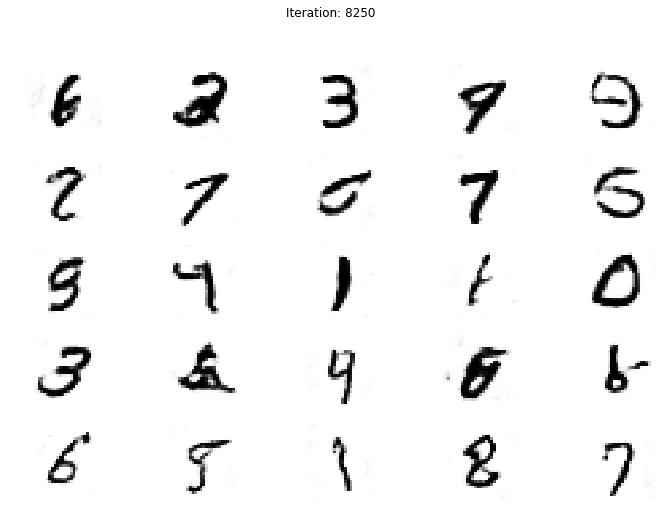

Iteration:  8251 [D loss: 0.69532, acc.:  49.61%] [G loss: 0.75885]
Iteration:  8252 [D loss: 0.72224, acc.:  43.75%] [G loss: 0.75250]
Iteration:  8253 [D loss: 0.70686, acc.:  50.39%] [G loss: 0.73902]
Iteration:  8254 [D loss: 0.69628, acc.:  54.30%] [G loss: 0.72529]
Iteration:  8255 [D loss: 0.71708, acc.:  44.14%] [G loss: 0.76775]
Iteration:  8256 [D loss: 0.70566, acc.:  46.88%] [G loss: 0.75629]
Iteration:  8257 [D loss: 0.70927, acc.:  48.44%] [G loss: 0.77587]
Iteration:  8258 [D loss: 0.68464, acc.:  54.30%] [G loss: 0.76776]
Iteration:  8259 [D loss: 0.71520, acc.:  48.05%] [G loss: 0.75589]
Iteration:  8260 [D loss: 0.71041, acc.:  48.83%] [G loss: 0.75104]
Iteration:  8261 [D loss: 0.71419, acc.:  49.22%] [G loss: 0.73456]
Iteration:  8262 [D loss: 0.71243, acc.:  50.78%] [G loss: 0.72970]
Iteration:  8263 [D loss: 0.71599, acc.:  47.66%] [G loss: 0.77119]
Iteration:  8264 [D loss: 0.72380, acc.:  44.14%] [G loss: 0.75925]
Iteration:  8265 [D loss: 0.68903, acc.:  53.52%

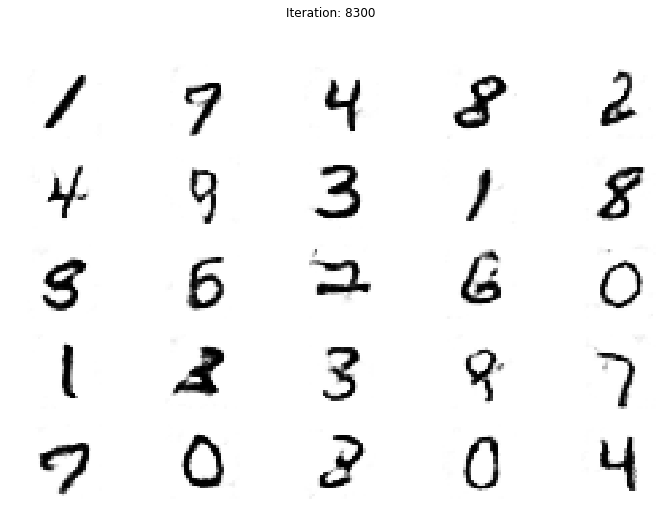

Iteration:  8301 [D loss: 0.69954, acc.:  50.00%] [G loss: 0.78283]
Iteration:  8302 [D loss: 0.71002, acc.:  50.78%] [G loss: 0.74522]
Iteration:  8303 [D loss: 0.69308, acc.:  53.12%] [G loss: 0.76333]
Iteration:  8304 [D loss: 0.70054, acc.:  48.44%] [G loss: 0.76283]
Iteration:  8305 [D loss: 0.73299, acc.:  42.97%] [G loss: 0.76166]
Iteration:  8306 [D loss: 0.70301, acc.:  50.39%] [G loss: 0.76856]
Iteration:  8307 [D loss: 0.70096, acc.:  50.78%] [G loss: 0.74277]
Iteration:  8308 [D loss: 0.69761, acc.:  50.00%] [G loss: 0.79655]
Iteration:  8309 [D loss: 0.69626, acc.:  53.12%] [G loss: 0.76307]
Iteration:  8310 [D loss: 0.71015, acc.:  47.27%] [G loss: 0.78270]
Iteration:  8311 [D loss: 0.71884, acc.:  48.44%] [G loss: 0.74462]
Iteration:  8312 [D loss: 0.68765, acc.:  55.86%] [G loss: 0.75029]
Iteration:  8313 [D loss: 0.72631, acc.:  44.92%] [G loss: 0.77237]
Iteration:  8314 [D loss: 0.69267, acc.:  53.91%] [G loss: 0.75133]
Iteration:  8315 [D loss: 0.69243, acc.:  51.17%

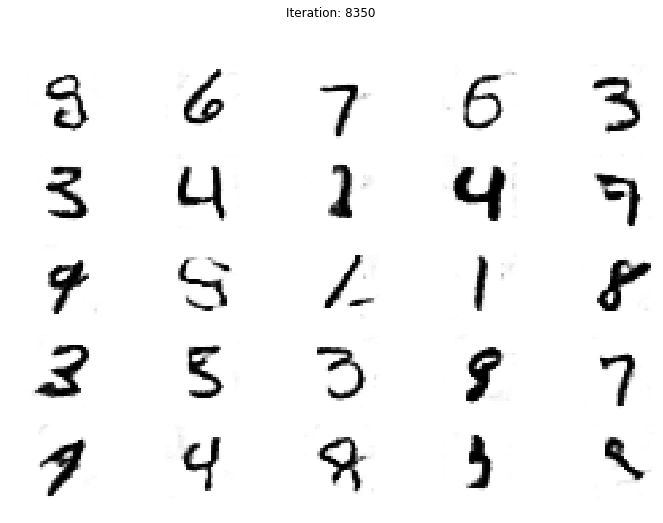

Iteration:  8351 [D loss: 0.70638, acc.:  49.22%] [G loss: 0.75904]
Iteration:  8352 [D loss: 0.70939, acc.:  46.88%] [G loss: 0.74482]
Iteration:  8353 [D loss: 0.69891, acc.:  53.12%] [G loss: 0.76271]
Iteration:  8354 [D loss: 0.71344, acc.:  50.00%] [G loss: 0.76476]
Iteration:  8355 [D loss: 0.70474, acc.:  49.22%] [G loss: 0.75203]
Iteration:  8356 [D loss: 0.68515, acc.:  56.25%] [G loss: 0.76419]
Iteration:  8357 [D loss: 0.70592, acc.:  51.17%] [G loss: 0.72868]
Iteration:  8358 [D loss: 0.71855, acc.:  48.83%] [G loss: 0.72027]
Iteration:  8359 [D loss: 0.69486, acc.:  53.12%] [G loss: 0.75195]
Iteration:  8360 [D loss: 0.71617, acc.:  49.22%] [G loss: 0.72054]
Iteration:  8361 [D loss: 0.68592, acc.:  55.86%] [G loss: 0.77965]
Iteration:  8362 [D loss: 0.70902, acc.:  48.05%] [G loss: 0.73623]
Iteration:  8363 [D loss: 0.71864, acc.:  46.48%] [G loss: 0.76255]
Iteration:  8364 [D loss: 0.69483, acc.:  51.17%] [G loss: 0.72414]
Iteration:  8365 [D loss: 0.69532, acc.:  53.12%

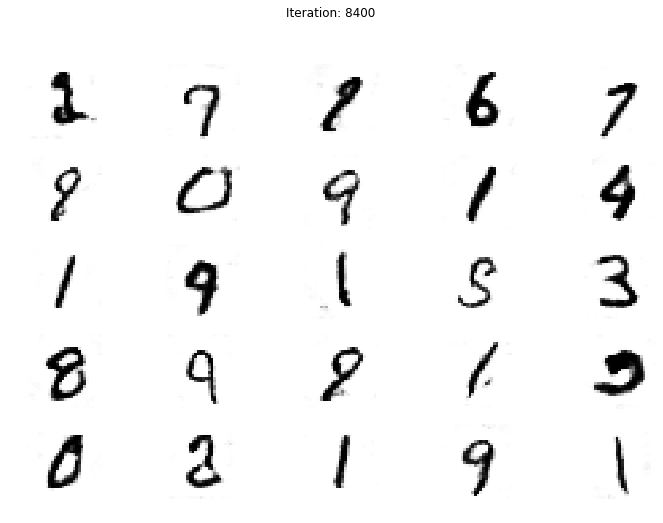

Iteration:  8401 [D loss: 0.70070, acc.:  50.00%] [G loss: 0.73818]
Iteration:  8402 [D loss: 0.70402, acc.:  52.34%] [G loss: 0.75795]
Iteration:  8403 [D loss: 0.72481, acc.:  46.09%] [G loss: 0.72075]
Iteration:  8404 [D loss: 0.71663, acc.:  42.58%] [G loss: 0.73331]
Iteration:  8405 [D loss: 0.69809, acc.:  53.91%] [G loss: 0.78473]
Iteration:  8406 [D loss: 0.68358, acc.:  57.81%] [G loss: 0.78480]
Iteration:  8407 [D loss: 0.69702, acc.:  51.17%] [G loss: 0.77325]
Iteration:  8408 [D loss: 0.68604, acc.:  53.52%] [G loss: 0.79824]
Iteration:  8409 [D loss: 0.69515, acc.:  48.44%] [G loss: 0.75687]
Iteration:  8410 [D loss: 0.70234, acc.:  48.44%] [G loss: 0.78143]
Iteration:  8411 [D loss: 0.69035, acc.:  52.73%] [G loss: 0.75451]
Iteration:  8412 [D loss: 0.71833, acc.:  48.05%] [G loss: 0.73996]
Iteration:  8413 [D loss: 0.71368, acc.:  46.88%] [G loss: 0.73723]
Iteration:  8414 [D loss: 0.73097, acc.:  45.31%] [G loss: 0.76282]
Iteration:  8415 [D loss: 0.71428, acc.:  48.83%

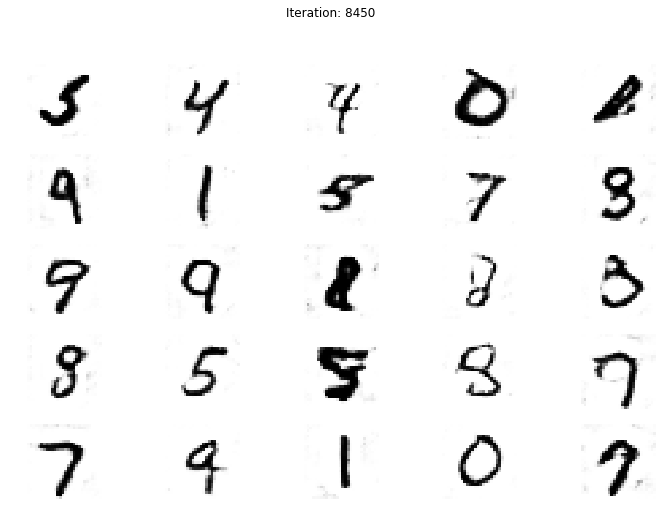

Iteration:  8451 [D loss: 0.70909, acc.:  49.61%] [G loss: 0.76772]
Iteration:  8452 [D loss: 0.69111, acc.:  56.64%] [G loss: 0.72096]
Iteration:  8453 [D loss: 0.71583, acc.:  48.44%] [G loss: 0.76911]
Iteration:  8454 [D loss: 0.72341, acc.:  46.09%] [G loss: 0.77193]
Iteration:  8455 [D loss: 0.70438, acc.:  48.83%] [G loss: 0.75504]
Iteration:  8456 [D loss: 0.69169, acc.:  55.08%] [G loss: 0.76930]
Iteration:  8457 [D loss: 0.72813, acc.:  41.80%] [G loss: 0.75324]
Iteration:  8458 [D loss: 0.72032, acc.:  46.48%] [G loss: 0.75615]
Iteration:  8459 [D loss: 0.68652, acc.:  54.69%] [G loss: 0.73532]
Iteration:  8460 [D loss: 0.70130, acc.:  50.39%] [G loss: 0.74720]
Iteration:  8461 [D loss: 0.68841, acc.:  54.30%] [G loss: 0.78325]
Iteration:  8462 [D loss: 0.69155, acc.:  55.47%] [G loss: 0.76786]
Iteration:  8463 [D loss: 0.67660, acc.:  57.42%] [G loss: 0.77875]
Iteration:  8464 [D loss: 0.70529, acc.:  46.48%] [G loss: 0.75052]
Iteration:  8465 [D loss: 0.71001, acc.:  48.44%

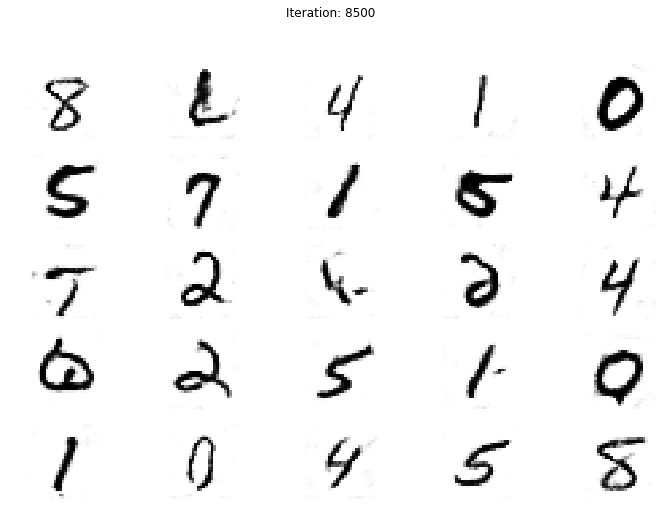

Iteration:  8501 [D loss: 0.69426, acc.:  55.47%] [G loss: 0.79141]
Iteration:  8502 [D loss: 0.70381, acc.:  45.70%] [G loss: 0.76772]
Iteration:  8503 [D loss: 0.68730, acc.:  56.25%] [G loss: 0.77927]
Iteration:  8504 [D loss: 0.70426, acc.:  48.05%] [G loss: 0.77685]
Iteration:  8505 [D loss: 0.70215, acc.:  48.44%] [G loss: 0.74574]
Iteration:  8506 [D loss: 0.70852, acc.:  51.17%] [G loss: 0.74178]
Iteration:  8507 [D loss: 0.69020, acc.:  54.69%] [G loss: 0.74910]
Iteration:  8508 [D loss: 0.70233, acc.:  45.70%] [G loss: 0.76512]
Iteration:  8509 [D loss: 0.70132, acc.:  50.78%] [G loss: 0.78316]
Iteration:  8510 [D loss: 0.69284, acc.:  50.39%] [G loss: 0.75144]
Iteration:  8511 [D loss: 0.70834, acc.:  47.66%] [G loss: 0.76841]
Iteration:  8512 [D loss: 0.69414, acc.:  55.08%] [G loss: 0.75515]
Iteration:  8513 [D loss: 0.70374, acc.:  49.22%] [G loss: 0.76622]
Iteration:  8514 [D loss: 0.68608, acc.:  54.30%] [G loss: 0.74033]
Iteration:  8515 [D loss: 0.70370, acc.:  50.00%

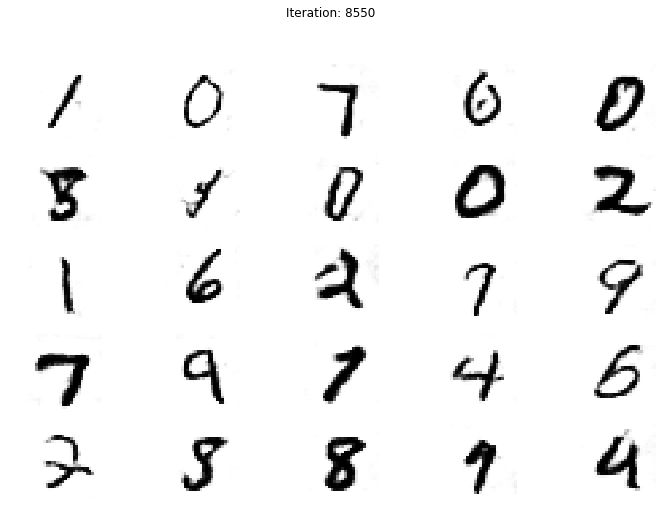

Iteration:  8551 [D loss: 0.69248, acc.:  53.52%] [G loss: 0.76351]
Iteration:  8552 [D loss: 0.73325, acc.:  38.67%] [G loss: 0.73599]
Iteration:  8553 [D loss: 0.71607, acc.:  46.48%] [G loss: 0.75203]
Iteration:  8554 [D loss: 0.71516, acc.:  45.70%] [G loss: 0.74683]
Iteration:  8555 [D loss: 0.73092, acc.:  44.14%] [G loss: 0.75129]
Iteration:  8556 [D loss: 0.69587, acc.:  51.95%] [G loss: 0.74117]
Iteration:  8557 [D loss: 0.69452, acc.:  54.30%] [G loss: 0.75599]
Iteration:  8558 [D loss: 0.69628, acc.:  56.64%] [G loss: 0.73187]
Iteration:  8559 [D loss: 0.70900, acc.:  50.39%] [G loss: 0.74753]
Iteration:  8560 [D loss: 0.68727, acc.:  53.52%] [G loss: 0.73188]
Iteration:  8561 [D loss: 0.71301, acc.:  44.92%] [G loss: 0.75680]
Iteration:  8562 [D loss: 0.71420, acc.:  48.05%] [G loss: 0.73595]
Iteration:  8563 [D loss: 0.68925, acc.:  49.61%] [G loss: 0.75541]
Iteration:  8564 [D loss: 0.71028, acc.:  42.97%] [G loss: 0.73720]
Iteration:  8565 [D loss: 0.72195, acc.:  46.09%

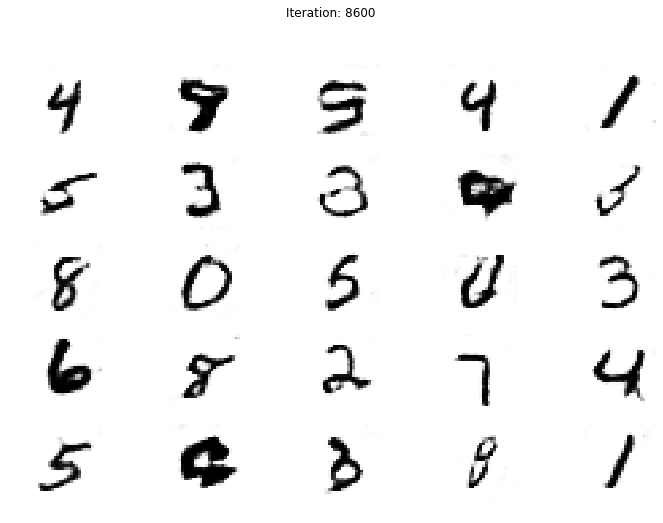

Iteration:  8601 [D loss: 0.70417, acc.:  51.56%] [G loss: 0.77133]
Iteration:  8602 [D loss: 0.71620, acc.:  47.27%] [G loss: 0.75449]
Iteration:  8603 [D loss: 0.71154, acc.:  46.09%] [G loss: 0.74329]
Iteration:  8604 [D loss: 0.69376, acc.:  52.34%] [G loss: 0.76863]
Iteration:  8605 [D loss: 0.68241, acc.:  55.08%] [G loss: 0.75046]
Iteration:  8606 [D loss: 0.69657, acc.:  55.86%] [G loss: 0.73639]
Iteration:  8607 [D loss: 0.70696, acc.:  50.00%] [G loss: 0.74610]
Iteration:  8608 [D loss: 0.70140, acc.:  51.17%] [G loss: 0.74082]
Iteration:  8609 [D loss: 0.69132, acc.:  51.95%] [G loss: 0.75245]
Iteration:  8610 [D loss: 0.69843, acc.:  53.12%] [G loss: 0.74112]
Iteration:  8611 [D loss: 0.68297, acc.:  56.25%] [G loss: 0.76728]
Iteration:  8612 [D loss: 0.70214, acc.:  50.00%] [G loss: 0.74841]
Iteration:  8613 [D loss: 0.70859, acc.:  50.00%] [G loss: 0.76224]
Iteration:  8614 [D loss: 0.70740, acc.:  51.95%] [G loss: 0.74889]
Iteration:  8615 [D loss: 0.70165, acc.:  47.27%

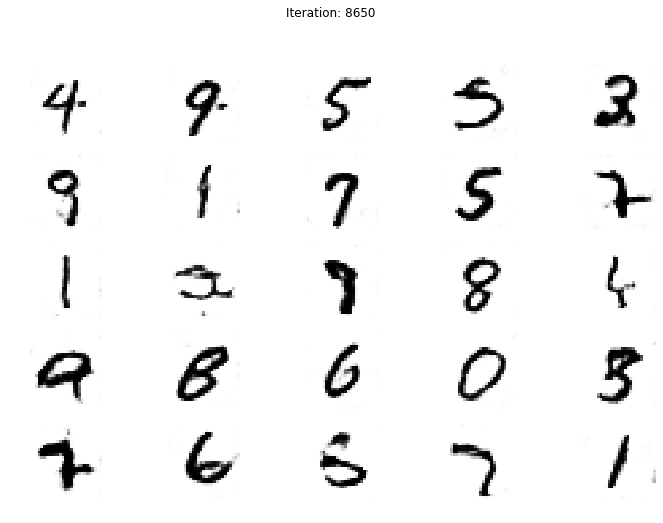

Iteration:  8651 [D loss: 0.70231, acc.:  51.56%] [G loss: 0.76206]
Iteration:  8652 [D loss: 0.69895, acc.:  49.61%] [G loss: 0.80570]
Iteration:  8653 [D loss: 0.71220, acc.:  51.17%] [G loss: 0.74863]
Iteration:  8654 [D loss: 0.70863, acc.:  47.66%] [G loss: 0.75219]
Iteration:  8655 [D loss: 0.70420, acc.:  48.44%] [G loss: 0.76599]
Iteration:  8656 [D loss: 0.69022, acc.:  51.17%] [G loss: 0.76121]
Iteration:  8657 [D loss: 0.70335, acc.:  50.39%] [G loss: 0.75208]
Iteration:  8658 [D loss: 0.68630, acc.:  54.30%] [G loss: 0.77256]
Iteration:  8659 [D loss: 0.68392, acc.:  53.12%] [G loss: 0.73106]
Iteration:  8660 [D loss: 0.70801, acc.:  53.91%] [G loss: 0.74219]
Iteration:  8661 [D loss: 0.69998, acc.:  53.12%] [G loss: 0.77658]
Iteration:  8662 [D loss: 0.72032, acc.:  45.31%] [G loss: 0.76897]
Iteration:  8663 [D loss: 0.69852, acc.:  49.61%] [G loss: 0.72321]
Iteration:  8664 [D loss: 0.70585, acc.:  49.22%] [G loss: 0.75723]
Iteration:  8665 [D loss: 0.70824, acc.:  48.83%

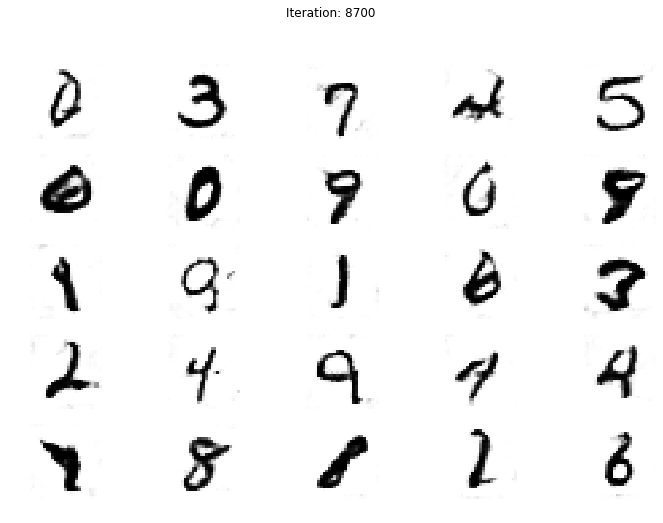

Iteration:  8701 [D loss: 0.69515, acc.:  50.00%] [G loss: 0.72138]
Iteration:  8702 [D loss: 0.72787, acc.:  44.14%] [G loss: 0.74843]
Iteration:  8703 [D loss: 0.71011, acc.:  50.00%] [G loss: 0.72552]
Iteration:  8704 [D loss: 0.71903, acc.:  45.70%] [G loss: 0.75207]
Iteration:  8705 [D loss: 0.68659, acc.:  53.52%] [G loss: 0.77812]
Iteration:  8706 [D loss: 0.71175, acc.:  46.48%] [G loss: 0.74046]
Iteration:  8707 [D loss: 0.68429, acc.:  53.91%] [G loss: 0.78618]
Iteration:  8708 [D loss: 0.70903, acc.:  46.48%] [G loss: 0.74850]
Iteration:  8709 [D loss: 0.72339, acc.:  44.53%] [G loss: 0.74103]
Iteration:  8710 [D loss: 0.70810, acc.:  46.09%] [G loss: 0.76250]
Iteration:  8711 [D loss: 0.72330, acc.:  44.53%] [G loss: 0.76837]
Iteration:  8712 [D loss: 0.70316, acc.:  50.00%] [G loss: 0.73794]
Iteration:  8713 [D loss: 0.72113, acc.:  48.05%] [G loss: 0.76951]
Iteration:  8714 [D loss: 0.67763, acc.:  56.64%] [G loss: 0.78732]
Iteration:  8715 [D loss: 0.69721, acc.:  53.12%

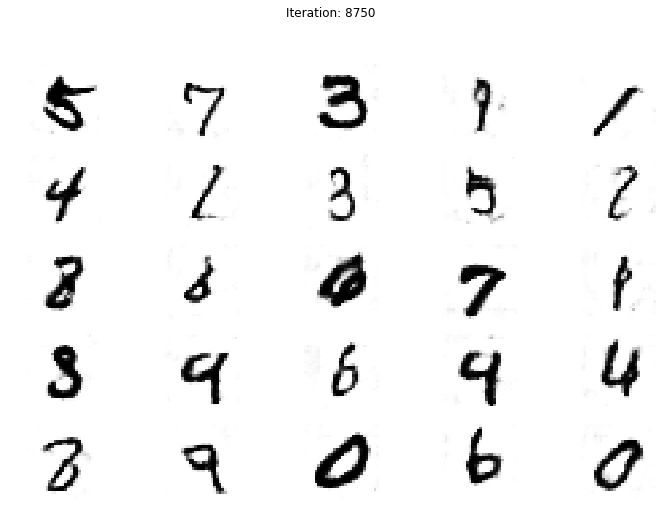

Iteration:  8751 [D loss: 0.70325, acc.:  52.73%] [G loss: 0.74282]
Iteration:  8752 [D loss: 0.70332, acc.:  53.91%] [G loss: 0.73122]
Iteration:  8753 [D loss: 0.69201, acc.:  50.78%] [G loss: 0.73797]
Iteration:  8754 [D loss: 0.70915, acc.:  48.05%] [G loss: 0.75233]
Iteration:  8755 [D loss: 0.71247, acc.:  50.39%] [G loss: 0.72216]
Iteration:  8756 [D loss: 0.73111, acc.:  41.41%] [G loss: 0.75822]
Iteration:  8757 [D loss: 0.69508, acc.:  55.08%] [G loss: 0.74026]
Iteration:  8758 [D loss: 0.69717, acc.:  48.83%] [G loss: 0.77042]
Iteration:  8759 [D loss: 0.69473, acc.:  51.56%] [G loss: 0.76210]
Iteration:  8760 [D loss: 0.72737, acc.:  44.92%] [G loss: 0.74550]
Iteration:  8761 [D loss: 0.69049, acc.:  53.52%] [G loss: 0.74956]
Iteration:  8762 [D loss: 0.70157, acc.:  51.95%] [G loss: 0.73396]
Iteration:  8763 [D loss: 0.72559, acc.:  44.14%] [G loss: 0.75654]
Iteration:  8764 [D loss: 0.71274, acc.:  48.44%] [G loss: 0.75239]
Iteration:  8765 [D loss: 0.69482, acc.:  51.56%

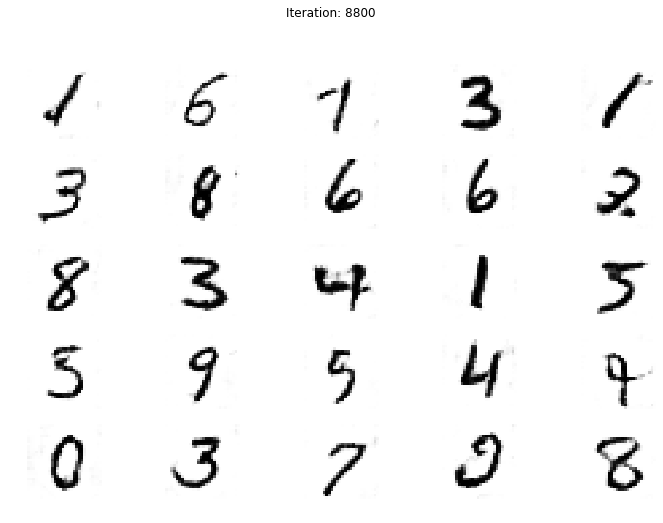

Iteration:  8801 [D loss: 0.70726, acc.:  44.92%] [G loss: 0.76780]
Iteration:  8802 [D loss: 0.68881, acc.:  53.12%] [G loss: 0.73031]
Iteration:  8803 [D loss: 0.71074, acc.:  48.05%] [G loss: 0.77735]
Iteration:  8804 [D loss: 0.69524, acc.:  54.30%] [G loss: 0.74298]
Iteration:  8805 [D loss: 0.71320, acc.:  48.83%] [G loss: 0.74183]
Iteration:  8806 [D loss: 0.68726, acc.:  55.86%] [G loss: 0.76087]
Iteration:  8807 [D loss: 0.70598, acc.:  47.27%] [G loss: 0.76176]
Iteration:  8808 [D loss: 0.67553, acc.:  57.81%] [G loss: 0.76802]
Iteration:  8809 [D loss: 0.70239, acc.:  52.73%] [G loss: 0.74398]
Iteration:  8810 [D loss: 0.70710, acc.:  50.39%] [G loss: 0.78613]
Iteration:  8811 [D loss: 0.70558, acc.:  52.73%] [G loss: 0.76212]
Iteration:  8812 [D loss: 0.70321, acc.:  49.22%] [G loss: 0.77045]
Iteration:  8813 [D loss: 0.72467, acc.:  44.14%] [G loss: 0.75937]
Iteration:  8814 [D loss: 0.71084, acc.:  48.83%] [G loss: 0.74365]
Iteration:  8815 [D loss: 0.71790, acc.:  44.92%

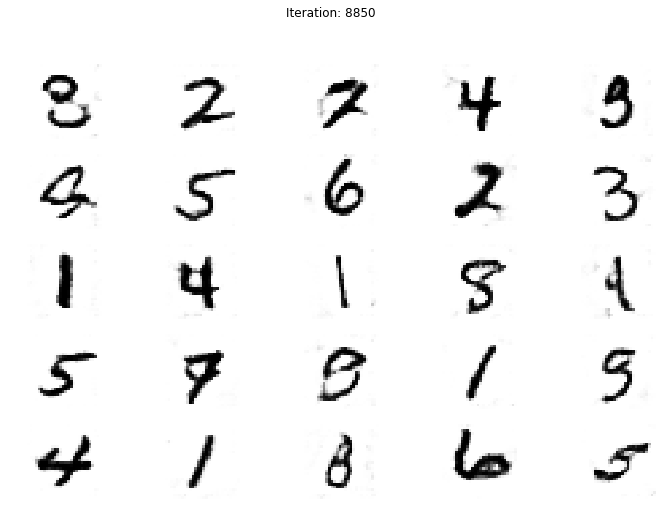

Iteration:  8851 [D loss: 0.72161, acc.:  43.75%] [G loss: 0.76953]
Iteration:  8852 [D loss: 0.70753, acc.:  49.22%] [G loss: 0.76643]
Iteration:  8853 [D loss: 0.70965, acc.:  50.39%] [G loss: 0.74844]
Iteration:  8854 [D loss: 0.70378, acc.:  45.31%] [G loss: 0.74593]
Iteration:  8855 [D loss: 0.71202, acc.:  47.66%] [G loss: 0.73257]
Iteration:  8856 [D loss: 0.71915, acc.:  44.53%] [G loss: 0.76165]
Iteration:  8857 [D loss: 0.70418, acc.:  45.70%] [G loss: 0.76354]
Iteration:  8858 [D loss: 0.70583, acc.:  49.61%] [G loss: 0.74565]
Iteration:  8859 [D loss: 0.68462, acc.:  57.03%] [G loss: 0.75438]
Iteration:  8860 [D loss: 0.73092, acc.:  45.31%] [G loss: 0.74333]
Iteration:  8861 [D loss: 0.71901, acc.:  41.80%] [G loss: 0.74824]
Iteration:  8862 [D loss: 0.71196, acc.:  49.22%] [G loss: 0.77411]
Iteration:  8863 [D loss: 0.70453, acc.:  49.61%] [G loss: 0.76373]
Iteration:  8864 [D loss: 0.70328, acc.:  49.61%] [G loss: 0.74393]
Iteration:  8865 [D loss: 0.68987, acc.:  51.95%

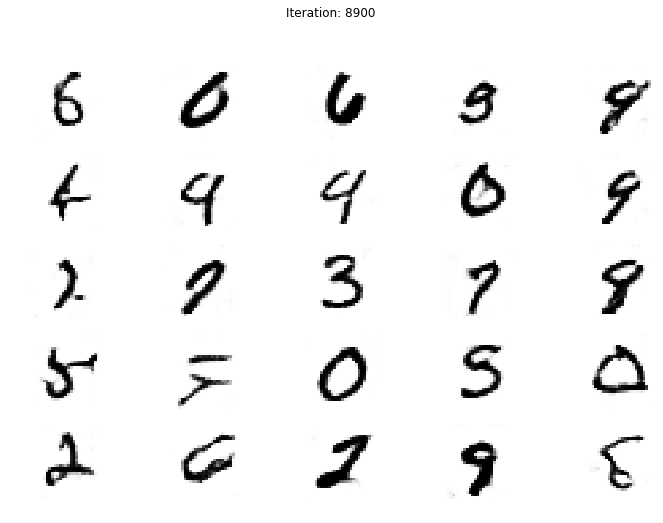

Iteration:  8901 [D loss: 0.70668, acc.:  46.88%] [G loss: 0.72780]
Iteration:  8902 [D loss: 0.69504, acc.:  54.30%] [G loss: 0.73714]
Iteration:  8903 [D loss: 0.70320, acc.:  52.34%] [G loss: 0.77352]
Iteration:  8904 [D loss: 0.70804, acc.:  50.78%] [G loss: 0.74892]
Iteration:  8905 [D loss: 0.70849, acc.:  49.22%] [G loss: 0.74761]
Iteration:  8906 [D loss: 0.70845, acc.:  51.17%] [G loss: 0.75372]
Iteration:  8907 [D loss: 0.71202, acc.:  51.56%] [G loss: 0.76875]
Iteration:  8908 [D loss: 0.70559, acc.:  50.78%] [G loss: 0.75236]
Iteration:  8909 [D loss: 0.70651, acc.:  49.22%] [G loss: 0.74695]
Iteration:  8910 [D loss: 0.71888, acc.:  42.19%] [G loss: 0.75005]
Iteration:  8911 [D loss: 0.68343, acc.:  53.52%] [G loss: 0.72766]
Iteration:  8912 [D loss: 0.70163, acc.:  50.78%] [G loss: 0.75518]
Iteration:  8913 [D loss: 0.70437, acc.:  48.05%] [G loss: 0.76325]
Iteration:  8914 [D loss: 0.67961, acc.:  57.42%] [G loss: 0.76256]
Iteration:  8915 [D loss: 0.70456, acc.:  50.78%

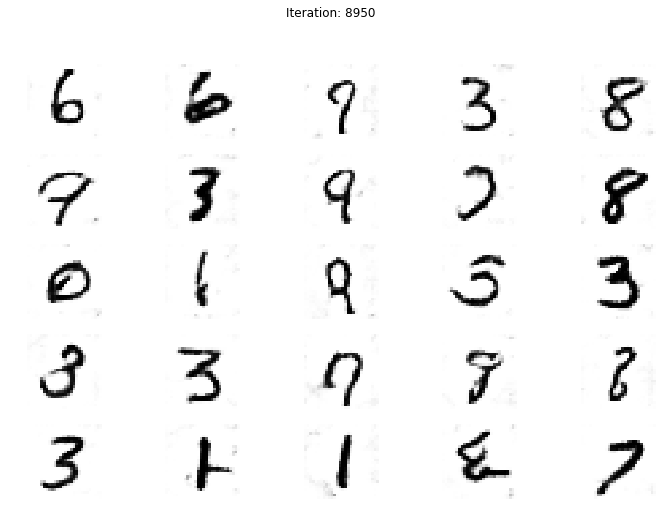

Iteration:  8951 [D loss: 0.70040, acc.:  52.34%] [G loss: 0.77675]
Iteration:  8952 [D loss: 0.70518, acc.:  54.30%] [G loss: 0.75884]
Iteration:  8953 [D loss: 0.71639, acc.:  44.92%] [G loss: 0.71784]
Iteration:  8954 [D loss: 0.70218, acc.:  49.22%] [G loss: 0.75504]
Iteration:  8955 [D loss: 0.72068, acc.:  44.92%] [G loss: 0.77806]
Iteration:  8956 [D loss: 0.71058, acc.:  46.48%] [G loss: 0.71412]
Iteration:  8957 [D loss: 0.71595, acc.:  44.53%] [G loss: 0.71349]
Iteration:  8958 [D loss: 0.69822, acc.:  52.34%] [G loss: 0.73305]
Iteration:  8959 [D loss: 0.70176, acc.:  52.34%] [G loss: 0.74514]
Iteration:  8960 [D loss: 0.70652, acc.:  48.05%] [G loss: 0.74066]
Iteration:  8961 [D loss: 0.71539, acc.:  46.88%] [G loss: 0.76514]
Iteration:  8962 [D loss: 0.70906, acc.:  50.39%] [G loss: 0.77066]
Iteration:  8963 [D loss: 0.69485, acc.:  50.78%] [G loss: 0.75404]
Iteration:  8964 [D loss: 0.68491, acc.:  51.95%] [G loss: 0.75267]
Iteration:  8965 [D loss: 0.68472, acc.:  57.03%

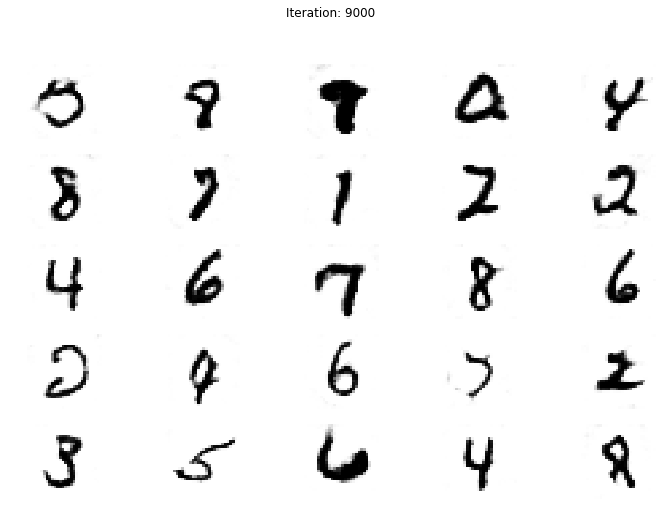

Iteration:  9001 [D loss: 0.70936, acc.:  49.61%] [G loss: 0.73027]
Iteration:  9002 [D loss: 0.70973, acc.:  52.34%] [G loss: 0.74995]
Iteration:  9003 [D loss: 0.69483, acc.:  53.12%] [G loss: 0.77030]
Iteration:  9004 [D loss: 0.71197, acc.:  46.48%] [G loss: 0.74838]
Iteration:  9005 [D loss: 0.70620, acc.:  47.27%] [G loss: 0.75779]
Iteration:  9006 [D loss: 0.71677, acc.:  46.09%] [G loss: 0.74357]
Iteration:  9007 [D loss: 0.70635, acc.:  49.22%] [G loss: 0.72149]
Iteration:  9008 [D loss: 0.71049, acc.:  48.05%] [G loss: 0.74521]
Iteration:  9009 [D loss: 0.69787, acc.:  51.56%] [G loss: 0.74295]
Iteration:  9010 [D loss: 0.69104, acc.:  54.30%] [G loss: 0.73828]
Iteration:  9011 [D loss: 0.70814, acc.:  48.44%] [G loss: 0.76934]
Iteration:  9012 [D loss: 0.72250, acc.:  51.17%] [G loss: 0.74282]
Iteration:  9013 [D loss: 0.72049, acc.:  43.75%] [G loss: 0.74922]
Iteration:  9014 [D loss: 0.70781, acc.:  46.48%] [G loss: 0.74315]
Iteration:  9015 [D loss: 0.71065, acc.:  44.92%

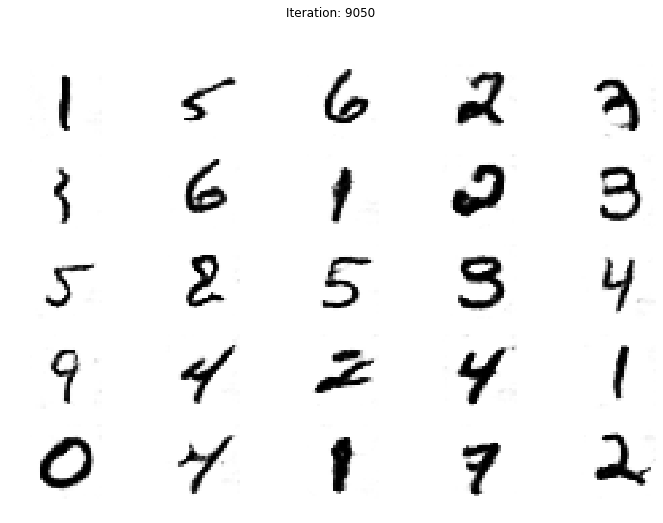

Iteration:  9051 [D loss: 0.69732, acc.:  51.56%] [G loss: 0.80407]
Iteration:  9052 [D loss: 0.69572, acc.:  53.91%] [G loss: 0.75522]
Iteration:  9053 [D loss: 0.69417, acc.:  54.30%] [G loss: 0.74862]
Iteration:  9054 [D loss: 0.70988, acc.:  47.27%] [G loss: 0.73608]
Iteration:  9055 [D loss: 0.70083, acc.:  47.66%] [G loss: 0.77449]
Iteration:  9056 [D loss: 0.72334, acc.:  44.53%] [G loss: 0.72070]
Iteration:  9057 [D loss: 0.69924, acc.:  50.39%] [G loss: 0.73511]
Iteration:  9058 [D loss: 0.68978, acc.:  53.52%] [G loss: 0.75114]
Iteration:  9059 [D loss: 0.72386, acc.:  45.70%] [G loss: 0.76596]
Iteration:  9060 [D loss: 0.70654, acc.:  49.22%] [G loss: 0.76315]
Iteration:  9061 [D loss: 0.71713, acc.:  47.66%] [G loss: 0.74072]
Iteration:  9062 [D loss: 0.70793, acc.:  50.39%] [G loss: 0.77218]
Iteration:  9063 [D loss: 0.70090, acc.:  48.44%] [G loss: 0.74484]
Iteration:  9064 [D loss: 0.69394, acc.:  53.12%] [G loss: 0.76114]
Iteration:  9065 [D loss: 0.69892, acc.:  49.22%

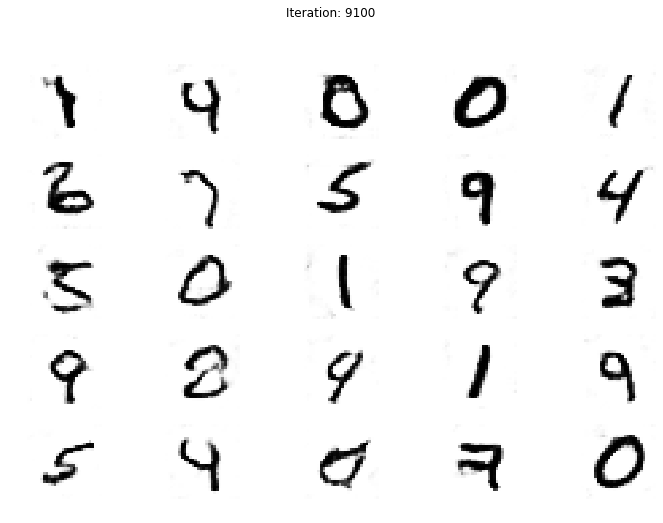

Iteration:  9101 [D loss: 0.71028, acc.:  49.22%] [G loss: 0.79932]
Iteration:  9102 [D loss: 0.71706, acc.:  48.05%] [G loss: 0.74514]
Iteration:  9103 [D loss: 0.68035, acc.:  54.69%] [G loss: 0.76400]
Iteration:  9104 [D loss: 0.70616, acc.:  48.44%] [G loss: 0.77660]
Iteration:  9105 [D loss: 0.69485, acc.:  52.34%] [G loss: 0.75490]
Iteration:  9106 [D loss: 0.69701, acc.:  50.39%] [G loss: 0.74487]
Iteration:  9107 [D loss: 0.71553, acc.:  48.05%] [G loss: 0.72713]
Iteration:  9108 [D loss: 0.68879, acc.:  55.47%] [G loss: 0.75536]
Iteration:  9109 [D loss: 0.69092, acc.:  56.64%] [G loss: 0.74306]
Iteration:  9110 [D loss: 0.69984, acc.:  51.56%] [G loss: 0.78230]
Iteration:  9111 [D loss: 0.68337, acc.:  52.73%] [G loss: 0.76504]
Iteration:  9112 [D loss: 0.72666, acc.:  45.31%] [G loss: 0.78208]
Iteration:  9113 [D loss: 0.68679, acc.:  53.52%] [G loss: 0.76857]
Iteration:  9114 [D loss: 0.68916, acc.:  50.78%] [G loss: 0.73717]
Iteration:  9115 [D loss: 0.69507, acc.:  55.47%

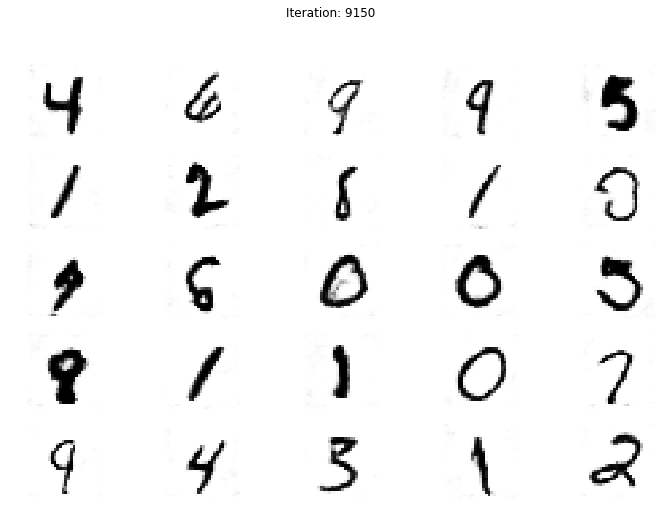

Iteration:  9151 [D loss: 0.69139, acc.:  51.95%] [G loss: 0.72384]
Iteration:  9152 [D loss: 0.71233, acc.:  46.09%] [G loss: 0.75753]
Iteration:  9153 [D loss: 0.70218, acc.:  50.78%] [G loss: 0.74178]
Iteration:  9154 [D loss: 0.70598, acc.:  47.27%] [G loss: 0.78331]
Iteration:  9155 [D loss: 0.71886, acc.:  46.09%] [G loss: 0.75042]
Iteration:  9156 [D loss: 0.70698, acc.:  50.00%] [G loss: 0.75902]
Iteration:  9157 [D loss: 0.70556, acc.:  47.66%] [G loss: 0.73385]
Iteration:  9158 [D loss: 0.71698, acc.:  45.31%] [G loss: 0.75706]
Iteration:  9159 [D loss: 0.71343, acc.:  45.70%] [G loss: 0.75131]
Iteration:  9160 [D loss: 0.70804, acc.:  49.61%] [G loss: 0.78808]
Iteration:  9161 [D loss: 0.71648, acc.:  46.09%] [G loss: 0.77002]
Iteration:  9162 [D loss: 0.70120, acc.:  52.34%] [G loss: 0.75045]
Iteration:  9163 [D loss: 0.70295, acc.:  51.56%] [G loss: 0.78272]
Iteration:  9164 [D loss: 0.70227, acc.:  50.39%] [G loss: 0.75097]
Iteration:  9165 [D loss: 0.71439, acc.:  43.75%

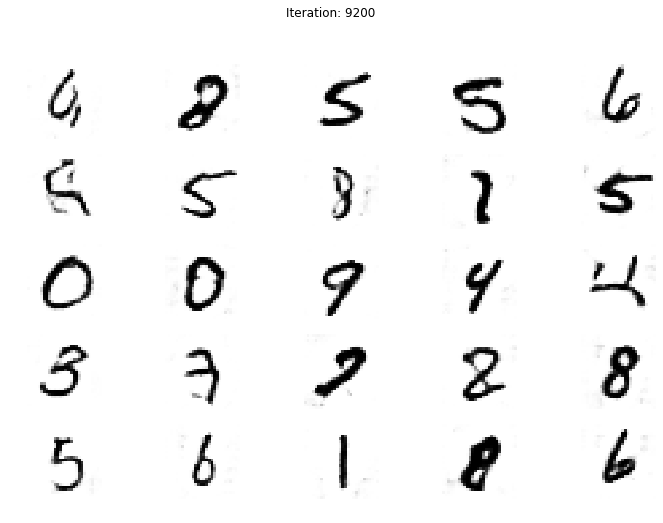

Iteration:  9201 [D loss: 0.71254, acc.:  48.83%] [G loss: 0.74603]
Iteration:  9202 [D loss: 0.71729, acc.:  45.31%] [G loss: 0.74449]
Iteration:  9203 [D loss: 0.70721, acc.:  51.95%] [G loss: 0.73800]
Iteration:  9204 [D loss: 0.72159, acc.:  41.02%] [G loss: 0.71380]
Iteration:  9205 [D loss: 0.69933, acc.:  50.39%] [G loss: 0.75834]
Iteration:  9206 [D loss: 0.70045, acc.:  50.00%] [G loss: 0.75450]
Iteration:  9207 [D loss: 0.69809, acc.:  53.91%] [G loss: 0.71029]
Iteration:  9208 [D loss: 0.72091, acc.:  49.22%] [G loss: 0.77800]
Iteration:  9209 [D loss: 0.70117, acc.:  51.17%] [G loss: 0.73426]
Iteration:  9210 [D loss: 0.72051, acc.:  46.88%] [G loss: 0.76723]
Iteration:  9211 [D loss: 0.70995, acc.:  48.05%] [G loss: 0.76939]
Iteration:  9212 [D loss: 0.69708, acc.:  53.12%] [G loss: 0.76836]
Iteration:  9213 [D loss: 0.71322, acc.:  46.09%] [G loss: 0.76716]
Iteration:  9214 [D loss: 0.68463, acc.:  55.47%] [G loss: 0.77124]
Iteration:  9215 [D loss: 0.69484, acc.:  52.73%

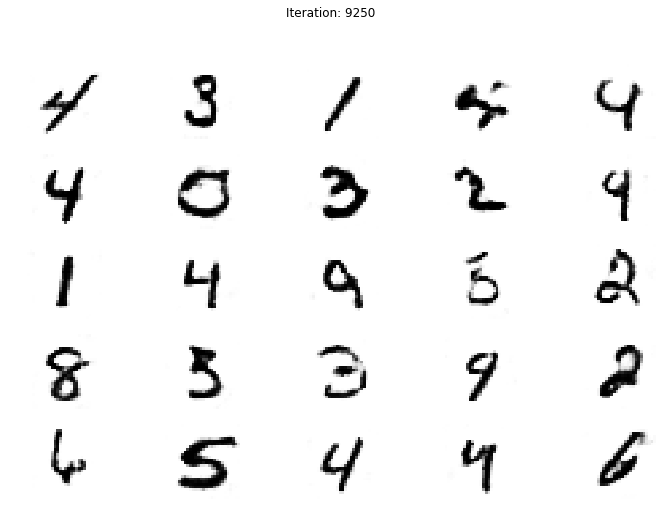

Iteration:  9251 [D loss: 0.69125, acc.:  54.69%] [G loss: 0.75967]
Iteration:  9252 [D loss: 0.70821, acc.:  48.44%] [G loss: 0.75163]
Iteration:  9253 [D loss: 0.68683, acc.:  53.52%] [G loss: 0.76845]
Iteration:  9254 [D loss: 0.69245, acc.:  50.39%] [G loss: 0.78364]
Iteration:  9255 [D loss: 0.70616, acc.:  48.44%] [G loss: 0.78233]
Iteration:  9256 [D loss: 0.71267, acc.:  46.48%] [G loss: 0.73641]
Iteration:  9257 [D loss: 0.72233, acc.:  46.09%] [G loss: 0.75758]
Iteration:  9258 [D loss: 0.70495, acc.:  48.44%] [G loss: 0.75450]
Iteration:  9259 [D loss: 0.70898, acc.:  47.66%] [G loss: 0.75888]
Iteration:  9260 [D loss: 0.70179, acc.:  51.17%] [G loss: 0.75536]
Iteration:  9261 [D loss: 0.72287, acc.:  45.31%] [G loss: 0.74339]
Iteration:  9262 [D loss: 0.68617, acc.:  54.69%] [G loss: 0.75046]
Iteration:  9263 [D loss: 0.70657, acc.:  49.22%] [G loss: 0.75321]
Iteration:  9264 [D loss: 0.70230, acc.:  45.31%] [G loss: 0.73350]
Iteration:  9265 [D loss: 0.69922, acc.:  54.69%

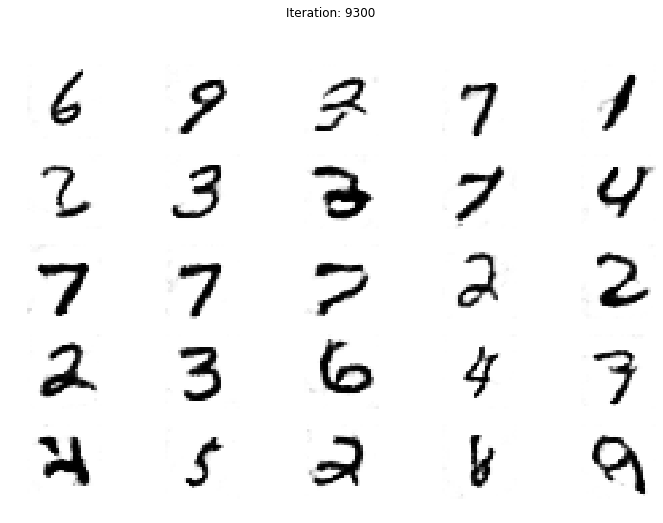

Iteration:  9301 [D loss: 0.72080, acc.:  45.31%] [G loss: 0.77716]
Iteration:  9302 [D loss: 0.69728, acc.:  51.17%] [G loss: 0.77356]
Iteration:  9303 [D loss: 0.70208, acc.:  53.91%] [G loss: 0.76722]
Iteration:  9304 [D loss: 0.70564, acc.:  50.00%] [G loss: 0.72513]
Iteration:  9305 [D loss: 0.70279, acc.:  51.56%] [G loss: 0.75547]
Iteration:  9306 [D loss: 0.69279, acc.:  53.12%] [G loss: 0.75817]
Iteration:  9307 [D loss: 0.70150, acc.:  47.27%] [G loss: 0.77118]
Iteration:  9308 [D loss: 0.70488, acc.:  51.56%] [G loss: 0.76061]
Iteration:  9309 [D loss: 0.70993, acc.:  50.78%] [G loss: 0.72799]
Iteration:  9310 [D loss: 0.72219, acc.:  42.58%] [G loss: 0.74937]
Iteration:  9311 [D loss: 0.69886, acc.:  53.91%] [G loss: 0.76457]
Iteration:  9312 [D loss: 0.70656, acc.:  46.09%] [G loss: 0.75071]
Iteration:  9313 [D loss: 0.72674, acc.:  43.75%] [G loss: 0.73149]
Iteration:  9314 [D loss: 0.71333, acc.:  45.70%] [G loss: 0.75516]
Iteration:  9315 [D loss: 0.71279, acc.:  46.88%

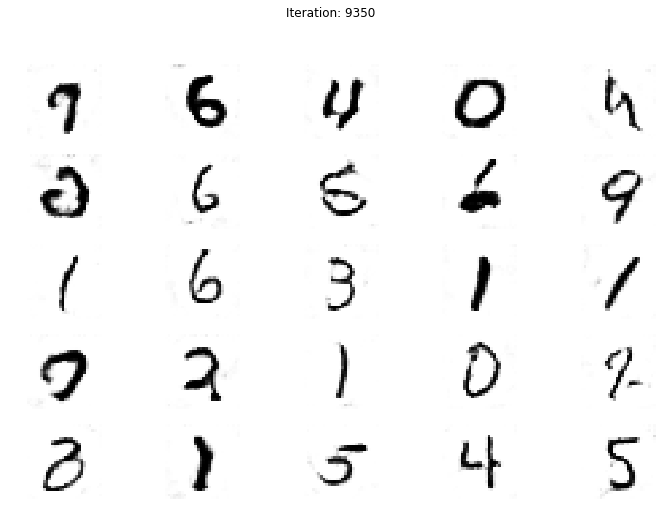

Iteration:  9351 [D loss: 0.69945, acc.:  54.69%] [G loss: 0.75207]
Iteration:  9352 [D loss: 0.70863, acc.:  48.83%] [G loss: 0.77262]
Iteration:  9353 [D loss: 0.68754, acc.:  53.12%] [G loss: 0.76277]
Iteration:  9354 [D loss: 0.69144, acc.:  50.78%] [G loss: 0.75914]
Iteration:  9355 [D loss: 0.71277, acc.:  48.83%] [G loss: 0.73207]
Iteration:  9356 [D loss: 0.69948, acc.:  50.00%] [G loss: 0.74546]
Iteration:  9357 [D loss: 0.68997, acc.:  56.25%] [G loss: 0.74245]
Iteration:  9358 [D loss: 0.71782, acc.:  48.05%] [G loss: 0.72604]
Iteration:  9359 [D loss: 0.69259, acc.:  50.78%] [G loss: 0.73559]
Iteration:  9360 [D loss: 0.70010, acc.:  51.17%] [G loss: 0.75161]
Iteration:  9361 [D loss: 0.71523, acc.:  47.27%] [G loss: 0.73501]
Iteration:  9362 [D loss: 0.70361, acc.:  47.66%] [G loss: 0.75579]
Iteration:  9363 [D loss: 0.70313, acc.:  50.39%] [G loss: 0.75381]
Iteration:  9364 [D loss: 0.70935, acc.:  48.83%] [G loss: 0.75390]
Iteration:  9365 [D loss: 0.71169, acc.:  50.78%

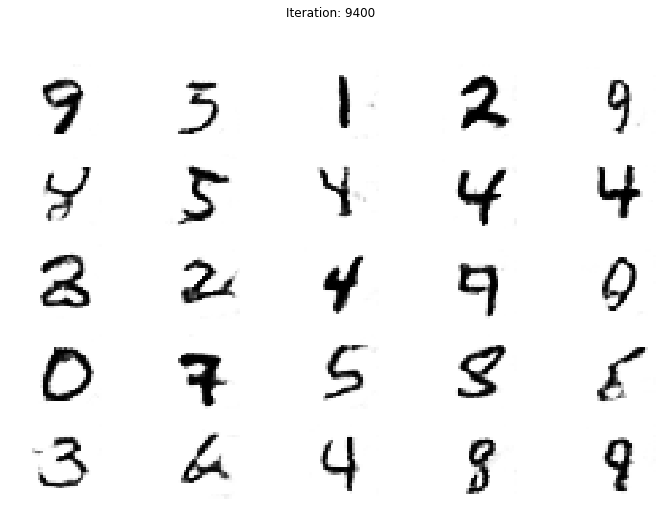

Iteration:  9401 [D loss: 0.71548, acc.:  46.09%] [G loss: 0.76115]
Iteration:  9402 [D loss: 0.68838, acc.:  54.30%] [G loss: 0.75433]
Iteration:  9403 [D loss: 0.70339, acc.:  48.05%] [G loss: 0.75829]
Iteration:  9404 [D loss: 0.69433, acc.:  52.73%] [G loss: 0.76729]
Iteration:  9405 [D loss: 0.70094, acc.:  47.27%] [G loss: 0.75585]
Iteration:  9406 [D loss: 0.71716, acc.:  46.88%] [G loss: 0.78414]
Iteration:  9407 [D loss: 0.69099, acc.:  56.64%] [G loss: 0.75205]
Iteration:  9408 [D loss: 0.69217, acc.:  50.78%] [G loss: 0.77467]
Iteration:  9409 [D loss: 0.69907, acc.:  51.95%] [G loss: 0.73636]
Iteration:  9410 [D loss: 0.71538, acc.:  42.19%] [G loss: 0.76610]
Iteration:  9411 [D loss: 0.69674, acc.:  55.08%] [G loss: 0.73800]
Iteration:  9412 [D loss: 0.70020, acc.:  48.83%] [G loss: 0.74580]
Iteration:  9413 [D loss: 0.71429, acc.:  46.48%] [G loss: 0.75553]
Iteration:  9414 [D loss: 0.70754, acc.:  51.95%] [G loss: 0.75928]
Iteration:  9415 [D loss: 0.71299, acc.:  46.09%

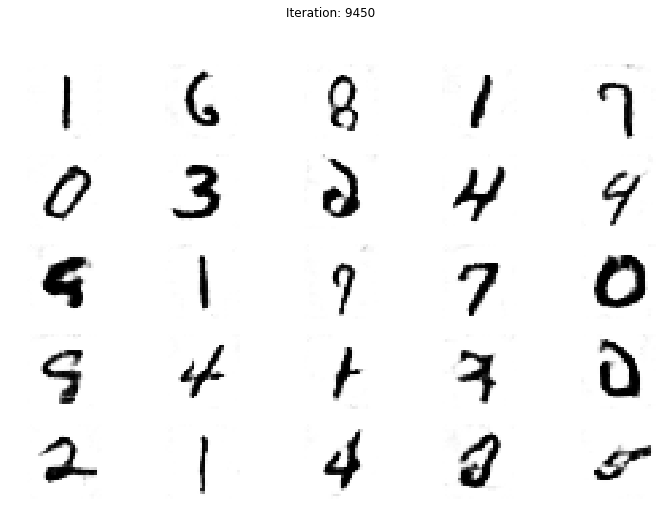

Iteration:  9451 [D loss: 0.72251, acc.:  42.19%] [G loss: 0.76868]
Iteration:  9452 [D loss: 0.70690, acc.:  49.22%] [G loss: 0.74493]
Iteration:  9453 [D loss: 0.69514, acc.:  51.95%] [G loss: 0.74344]
Iteration:  9454 [D loss: 0.69068, acc.:  53.91%] [G loss: 0.73695]
Iteration:  9455 [D loss: 0.71788, acc.:  45.31%] [G loss: 0.76320]
Iteration:  9456 [D loss: 0.72243, acc.:  48.44%] [G loss: 0.75187]
Iteration:  9457 [D loss: 0.69507, acc.:  52.73%] [G loss: 0.77842]
Iteration:  9458 [D loss: 0.69566, acc.:  52.73%] [G loss: 0.77875]
Iteration:  9459 [D loss: 0.69780, acc.:  51.17%] [G loss: 0.75661]
Iteration:  9460 [D loss: 0.68893, acc.:  55.47%] [G loss: 0.76767]
Iteration:  9461 [D loss: 0.69042, acc.:  50.78%] [G loss: 0.75840]
Iteration:  9462 [D loss: 0.71085, acc.:  45.31%] [G loss: 0.75685]
Iteration:  9463 [D loss: 0.70327, acc.:  50.78%] [G loss: 0.76155]
Iteration:  9464 [D loss: 0.71368, acc.:  48.05%] [G loss: 0.73961]
Iteration:  9465 [D loss: 0.70868, acc.:  51.17%

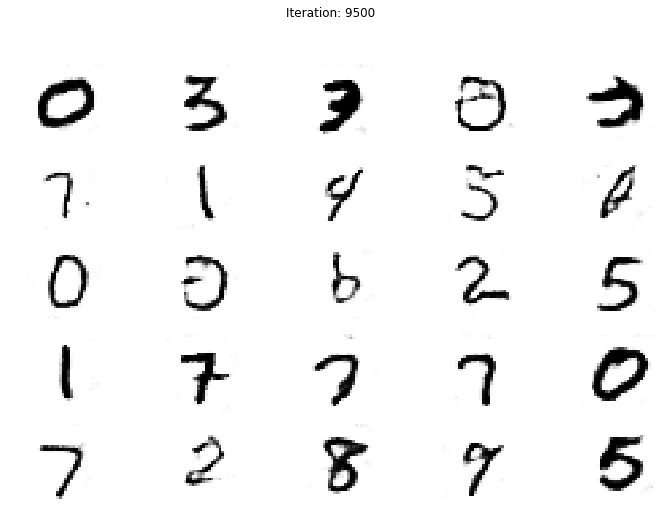

Iteration:  9501 [D loss: 0.69368, acc.:  48.83%] [G loss: 0.77316]
Iteration:  9502 [D loss: 0.73883, acc.:  42.19%] [G loss: 0.75005]
Iteration:  9503 [D loss: 0.69333, acc.:  53.91%] [G loss: 0.74614]
Iteration:  9504 [D loss: 0.70936, acc.:  46.88%] [G loss: 0.76315]
Iteration:  9505 [D loss: 0.70717, acc.:  48.05%] [G loss: 0.74993]
Iteration:  9506 [D loss: 0.68549, acc.:  51.56%] [G loss: 0.72665]
Iteration:  9507 [D loss: 0.69851, acc.:  55.86%] [G loss: 0.75299]
Iteration:  9508 [D loss: 0.71408, acc.:  49.61%] [G loss: 0.74474]
Iteration:  9509 [D loss: 0.70504, acc.:  46.09%] [G loss: 0.75074]
Iteration:  9510 [D loss: 0.70206, acc.:  52.73%] [G loss: 0.77183]
Iteration:  9511 [D loss: 0.69383, acc.:  51.95%] [G loss: 0.73652]
Iteration:  9512 [D loss: 0.70052, acc.:  44.92%] [G loss: 0.75651]
Iteration:  9513 [D loss: 0.69246, acc.:  55.47%] [G loss: 0.75924]
Iteration:  9514 [D loss: 0.70842, acc.:  50.00%] [G loss: 0.71046]
Iteration:  9515 [D loss: 0.70909, acc.:  49.22%

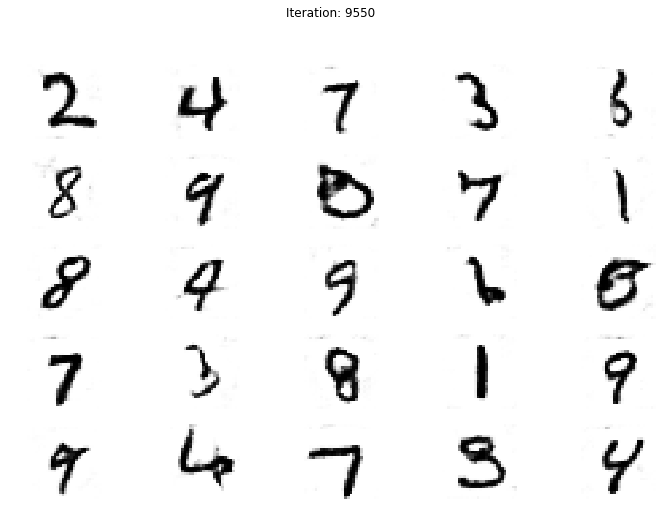

Iteration:  9551 [D loss: 0.69825, acc.:  48.44%] [G loss: 0.76701]
Iteration:  9552 [D loss: 0.69976, acc.:  51.17%] [G loss: 0.78485]
Iteration:  9553 [D loss: 0.68862, acc.:  52.73%] [G loss: 0.77647]
Iteration:  9554 [D loss: 0.69288, acc.:  50.39%] [G loss: 0.75372]
Iteration:  9555 [D loss: 0.69458, acc.:  53.52%] [G loss: 0.75671]
Iteration:  9556 [D loss: 0.70501, acc.:  53.52%] [G loss: 0.75176]
Iteration:  9557 [D loss: 0.72186, acc.:  46.48%] [G loss: 0.72547]
Iteration:  9558 [D loss: 0.70604, acc.:  48.05%] [G loss: 0.74650]
Iteration:  9559 [D loss: 0.68683, acc.:  53.12%] [G loss: 0.72730]
Iteration:  9560 [D loss: 0.69538, acc.:  54.69%] [G loss: 0.75469]
Iteration:  9561 [D loss: 0.70339, acc.:  50.78%] [G loss: 0.76061]
Iteration:  9562 [D loss: 0.69960, acc.:  51.56%] [G loss: 0.75837]
Iteration:  9563 [D loss: 0.69866, acc.:  50.39%] [G loss: 0.72951]
Iteration:  9564 [D loss: 0.69943, acc.:  51.17%] [G loss: 0.74035]
Iteration:  9565 [D loss: 0.71300, acc.:  46.88%

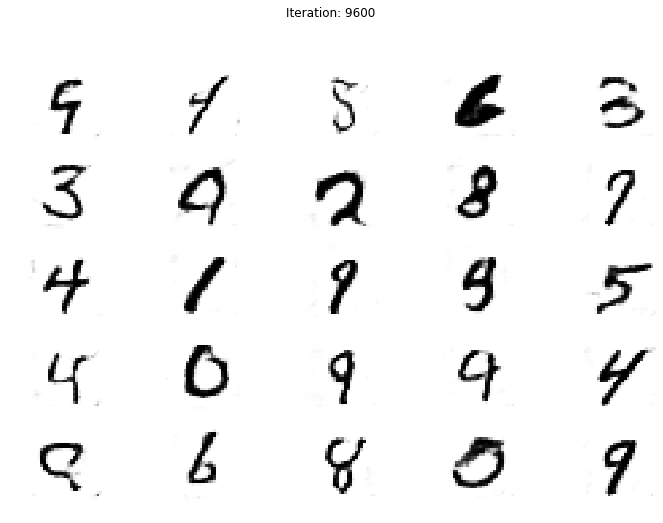

Iteration:  9601 [D loss: 0.70533, acc.:  48.05%] [G loss: 0.73399]
Iteration:  9602 [D loss: 0.70582, acc.:  48.44%] [G loss: 0.72512]
Iteration:  9603 [D loss: 0.72248, acc.:  45.70%] [G loss: 0.73828]
Iteration:  9604 [D loss: 0.70788, acc.:  47.27%] [G loss: 0.77028]
Iteration:  9605 [D loss: 0.71501, acc.:  46.48%] [G loss: 0.76235]
Iteration:  9606 [D loss: 0.72581, acc.:  44.53%] [G loss: 0.74944]
Iteration:  9607 [D loss: 0.69153, acc.:  53.52%] [G loss: 0.76206]
Iteration:  9608 [D loss: 0.70957, acc.:  48.83%] [G loss: 0.76698]
Iteration:  9609 [D loss: 0.71534, acc.:  43.75%] [G loss: 0.74419]
Iteration:  9610 [D loss: 0.69877, acc.:  52.73%] [G loss: 0.74751]
Iteration:  9611 [D loss: 0.70675, acc.:  48.83%] [G loss: 0.72661]
Iteration:  9612 [D loss: 0.70695, acc.:  46.88%] [G loss: 0.76346]
Iteration:  9613 [D loss: 0.69539, acc.:  53.91%] [G loss: 0.75139]
Iteration:  9614 [D loss: 0.69754, acc.:  48.83%] [G loss: 0.74200]
Iteration:  9615 [D loss: 0.70254, acc.:  50.78%

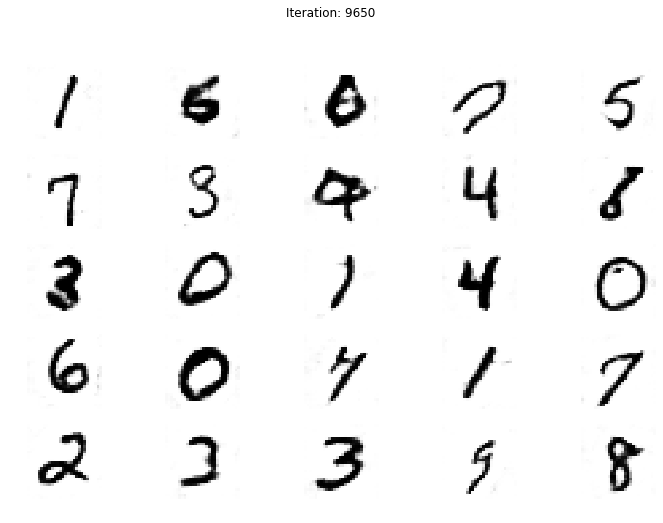

Iteration:  9651 [D loss: 0.69899, acc.:  55.08%] [G loss: 0.73850]
Iteration:  9652 [D loss: 0.70768, acc.:  47.27%] [G loss: 0.76819]
Iteration:  9653 [D loss: 0.71023, acc.:  46.88%] [G loss: 0.78477]
Iteration:  9654 [D loss: 0.69803, acc.:  52.34%] [G loss: 0.75635]
Iteration:  9655 [D loss: 0.70828, acc.:  49.61%] [G loss: 0.74635]
Iteration:  9656 [D loss: 0.69517, acc.:  50.39%] [G loss: 0.77862]
Iteration:  9657 [D loss: 0.69994, acc.:  48.83%] [G loss: 0.76397]
Iteration:  9658 [D loss: 0.69872, acc.:  52.34%] [G loss: 0.75260]
Iteration:  9659 [D loss: 0.69930, acc.:  54.30%] [G loss: 0.77683]
Iteration:  9660 [D loss: 0.71551, acc.:  46.09%] [G loss: 0.76443]
Iteration:  9661 [D loss: 0.71178, acc.:  44.92%] [G loss: 0.73934]
Iteration:  9662 [D loss: 0.70404, acc.:  48.44%] [G loss: 0.74362]
Iteration:  9663 [D loss: 0.70329, acc.:  47.27%] [G loss: 0.71992]
Iteration:  9664 [D loss: 0.67914, acc.:  57.42%] [G loss: 0.72448]
Iteration:  9665 [D loss: 0.69635, acc.:  48.44%

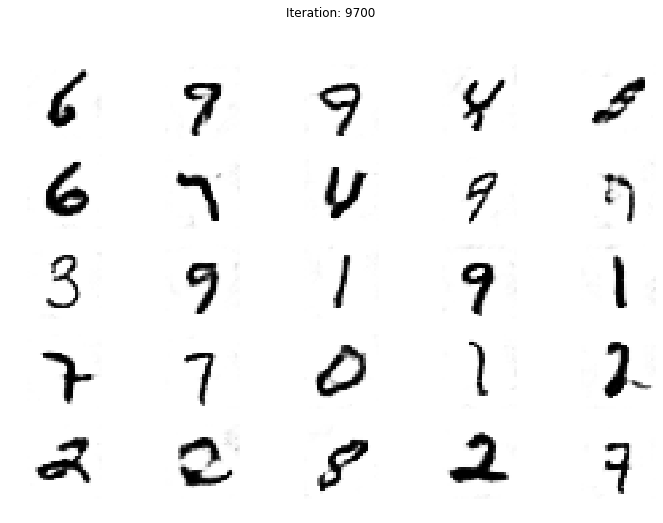

Iteration:  9701 [D loss: 0.73305, acc.:  44.53%] [G loss: 0.76236]
Iteration:  9702 [D loss: 0.69497, acc.:  50.00%] [G loss: 0.76067]
Iteration:  9703 [D loss: 0.70944, acc.:  49.61%] [G loss: 0.75311]
Iteration:  9704 [D loss: 0.71386, acc.:  45.31%] [G loss: 0.75563]
Iteration:  9705 [D loss: 0.70312, acc.:  49.61%] [G loss: 0.77924]
Iteration:  9706 [D loss: 0.72188, acc.:  47.27%] [G loss: 0.78775]
Iteration:  9707 [D loss: 0.69964, acc.:  51.56%] [G loss: 0.75406]
Iteration:  9708 [D loss: 0.68740, acc.:  53.91%] [G loss: 0.76131]
Iteration:  9709 [D loss: 0.70690, acc.:  46.48%] [G loss: 0.77437]
Iteration:  9710 [D loss: 0.69822, acc.:  52.34%] [G loss: 0.77366]
Iteration:  9711 [D loss: 0.70535, acc.:  50.00%] [G loss: 0.77118]
Iteration:  9712 [D loss: 0.70399, acc.:  49.22%] [G loss: 0.76241]
Iteration:  9713 [D loss: 0.70980, acc.:  51.17%] [G loss: 0.73073]
Iteration:  9714 [D loss: 0.69081, acc.:  54.30%] [G loss: 0.75557]
Iteration:  9715 [D loss: 0.70711, acc.:  46.48%

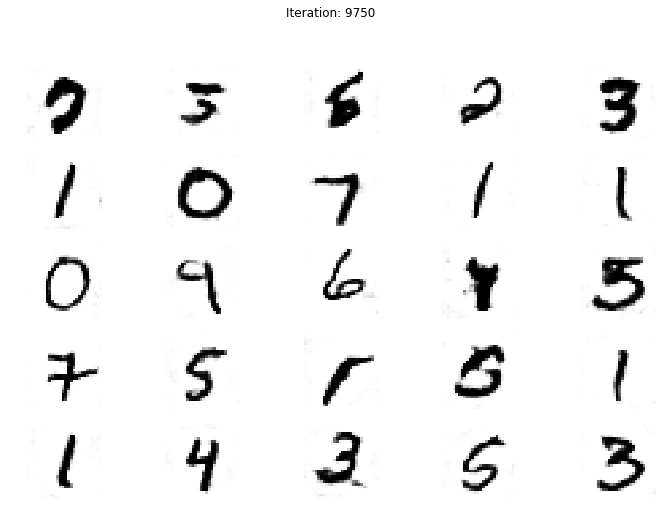

Iteration:  9751 [D loss: 0.70388, acc.:  47.66%] [G loss: 0.77781]
Iteration:  9752 [D loss: 0.71493, acc.:  46.09%] [G loss: 0.77201]
Iteration:  9753 [D loss: 0.71279, acc.:  46.09%] [G loss: 0.74738]
Iteration:  9754 [D loss: 0.71829, acc.:  45.70%] [G loss: 0.72523]
Iteration:  9755 [D loss: 0.70657, acc.:  51.56%] [G loss: 0.74130]
Iteration:  9756 [D loss: 0.70423, acc.:  50.00%] [G loss: 0.72552]
Iteration:  9757 [D loss: 0.69748, acc.:  49.22%] [G loss: 0.73929]
Iteration:  9758 [D loss: 0.70848, acc.:  46.48%] [G loss: 0.72607]
Iteration:  9759 [D loss: 0.70166, acc.:  50.39%] [G loss: 0.73019]
Iteration:  9760 [D loss: 0.69664, acc.:  52.34%] [G loss: 0.73478]
Iteration:  9761 [D loss: 0.70308, acc.:  46.88%] [G loss: 0.72719]
Iteration:  9762 [D loss: 0.69986, acc.:  47.27%] [G loss: 0.75555]
Iteration:  9763 [D loss: 0.71052, acc.:  50.39%] [G loss: 0.73664]
Iteration:  9764 [D loss: 0.71799, acc.:  48.44%] [G loss: 0.76476]
Iteration:  9765 [D loss: 0.70426, acc.:  49.22%

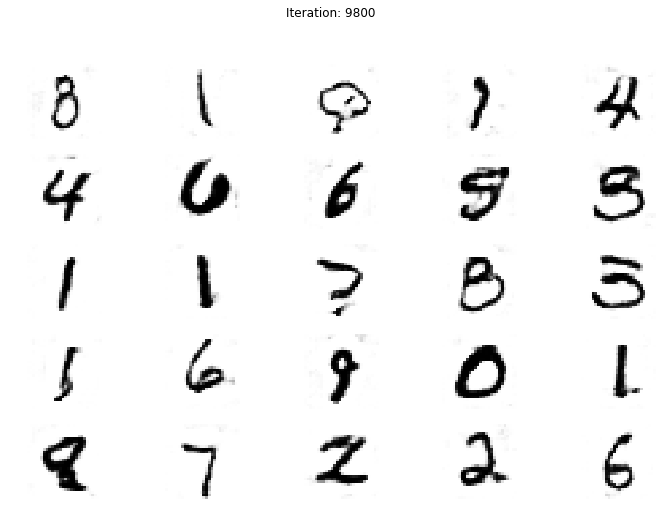

Iteration:  9801 [D loss: 0.72181, acc.:  46.09%] [G loss: 0.75447]
Iteration:  9802 [D loss: 0.69399, acc.:  49.22%] [G loss: 0.75194]
Iteration:  9803 [D loss: 0.68975, acc.:  53.52%] [G loss: 0.78375]
Iteration:  9804 [D loss: 0.68908, acc.:  55.47%] [G loss: 0.75340]
Iteration:  9805 [D loss: 0.71913, acc.:  44.92%] [G loss: 0.73066]
Iteration:  9806 [D loss: 0.71066, acc.:  50.78%] [G loss: 0.76044]
Iteration:  9807 [D loss: 0.70498, acc.:  51.17%] [G loss: 0.74679]
Iteration:  9808 [D loss: 0.70756, acc.:  50.39%] [G loss: 0.78345]
Iteration:  9809 [D loss: 0.69497, acc.:  54.30%] [G loss: 0.75432]
Iteration:  9810 [D loss: 0.68593, acc.:  56.25%] [G loss: 0.76863]
Iteration:  9811 [D loss: 0.70535, acc.:  48.83%] [G loss: 0.76889]
Iteration:  9812 [D loss: 0.69983, acc.:  50.78%] [G loss: 0.77104]
Iteration:  9813 [D loss: 0.71383, acc.:  48.44%] [G loss: 0.75509]
Iteration:  9814 [D loss: 0.70692, acc.:  46.88%] [G loss: 0.76900]
Iteration:  9815 [D loss: 0.70581, acc.:  48.44%

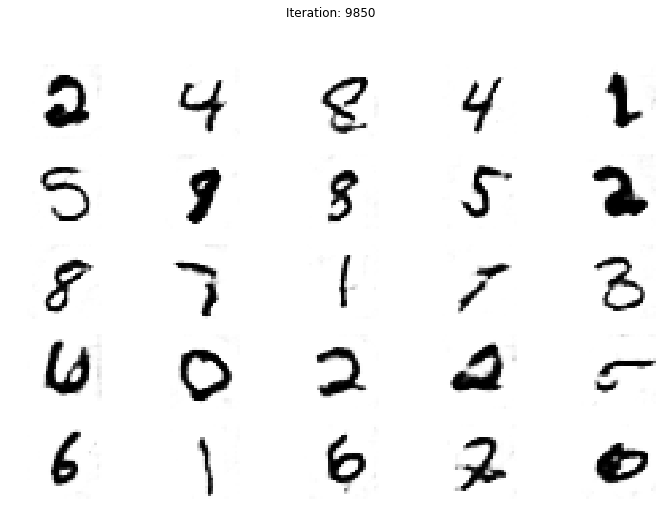

Iteration:  9851 [D loss: 0.70132, acc.:  47.66%] [G loss: 0.75765]
Iteration:  9852 [D loss: 0.70762, acc.:  44.53%] [G loss: 0.78288]
Iteration:  9853 [D loss: 0.70018, acc.:  49.61%] [G loss: 0.78299]
Iteration:  9854 [D loss: 0.67930, acc.:  53.52%] [G loss: 0.74447]
Iteration:  9855 [D loss: 0.70356, acc.:  48.83%] [G loss: 0.76694]
Iteration:  9856 [D loss: 0.71383, acc.:  49.22%] [G loss: 0.78273]
Iteration:  9857 [D loss: 0.70365, acc.:  47.27%] [G loss: 0.73828]
Iteration:  9858 [D loss: 0.70442, acc.:  47.66%] [G loss: 0.74260]
Iteration:  9859 [D loss: 0.70880, acc.:  47.27%] [G loss: 0.77066]
Iteration:  9860 [D loss: 0.68596, acc.:  53.12%] [G loss: 0.76997]
Iteration:  9861 [D loss: 0.71447, acc.:  50.39%] [G loss: 0.74538]
Iteration:  9862 [D loss: 0.71581, acc.:  47.27%] [G loss: 0.75449]
Iteration:  9863 [D loss: 0.70513, acc.:  49.61%] [G loss: 0.75570]
Iteration:  9864 [D loss: 0.70440, acc.:  46.88%] [G loss: 0.76426]
Iteration:  9865 [D loss: 0.71655, acc.:  46.48%

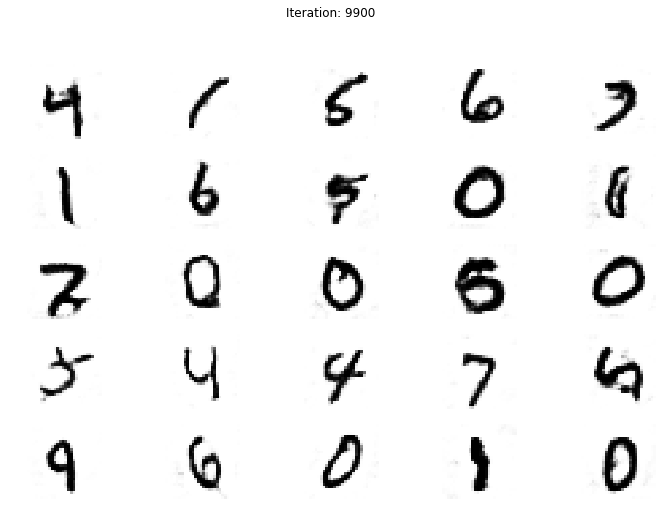

Iteration:  9901 [D loss: 0.72115, acc.:  44.53%] [G loss: 0.76631]
Iteration:  9902 [D loss: 0.69401, acc.:  50.39%] [G loss: 0.76982]
Iteration:  9903 [D loss: 0.68512, acc.:  57.03%] [G loss: 0.77030]
Iteration:  9904 [D loss: 0.70604, acc.:  48.83%] [G loss: 0.75171]
Iteration:  9905 [D loss: 0.70686, acc.:  48.44%] [G loss: 0.75226]
Iteration:  9906 [D loss: 0.71234, acc.:  47.66%] [G loss: 0.77110]
Iteration:  9907 [D loss: 0.71104, acc.:  43.75%] [G loss: 0.74048]
Iteration:  9908 [D loss: 0.69759, acc.:  52.73%] [G loss: 0.75497]
Iteration:  9909 [D loss: 0.71930, acc.:  47.66%] [G loss: 0.70801]
Iteration:  9910 [D loss: 0.71191, acc.:  49.61%] [G loss: 0.73234]
Iteration:  9911 [D loss: 0.70283, acc.:  50.78%] [G loss: 0.74861]
Iteration:  9912 [D loss: 0.69127, acc.:  53.12%] [G loss: 0.78088]
Iteration:  9913 [D loss: 0.70524, acc.:  51.17%] [G loss: 0.74270]
Iteration:  9914 [D loss: 0.71339, acc.:  45.31%] [G loss: 0.76473]
Iteration:  9915 [D loss: 0.68387, acc.:  53.91%

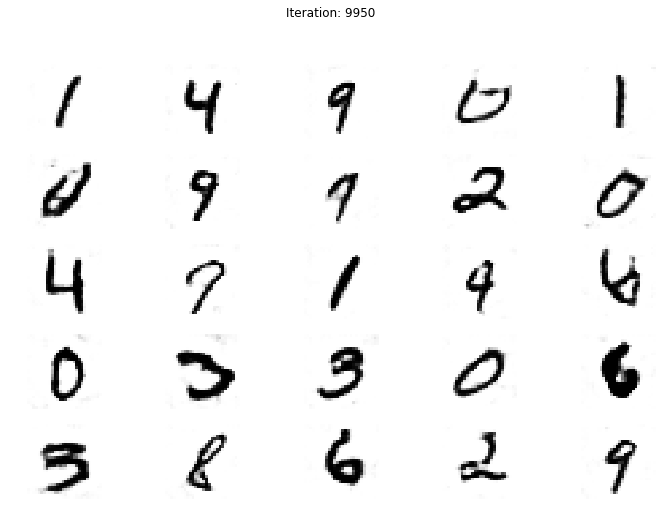

Iteration:  9951 [D loss: 0.68473, acc.:  58.20%] [G loss: 0.76941]
Iteration:  9952 [D loss: 0.69744, acc.:  50.39%] [G loss: 0.75555]
Iteration:  9953 [D loss: 0.68938, acc.:  53.52%] [G loss: 0.73350]
Iteration:  9954 [D loss: 0.70559, acc.:  53.12%] [G loss: 0.70936]
Iteration:  9955 [D loss: 0.71397, acc.:  47.66%] [G loss: 0.73321]
Iteration:  9956 [D loss: 0.70778, acc.:  45.70%] [G loss: 0.71644]
Iteration:  9957 [D loss: 0.72711, acc.:  42.58%] [G loss: 0.74352]
Iteration:  9958 [D loss: 0.70928, acc.:  50.78%] [G loss: 0.76212]
Iteration:  9959 [D loss: 0.71102, acc.:  46.09%] [G loss: 0.75410]
Iteration:  9960 [D loss: 0.70345, acc.:  48.44%] [G loss: 0.75801]
Iteration:  9961 [D loss: 0.71060, acc.:  52.34%] [G loss: 0.75073]
Iteration:  9962 [D loss: 0.70519, acc.:  47.66%] [G loss: 0.73101]
Iteration:  9963 [D loss: 0.70983, acc.:  46.09%] [G loss: 0.73157]
Iteration:  9964 [D loss: 0.68910, acc.:  49.22%] [G loss: 0.73828]
Iteration:  9965 [D loss: 0.72051, acc.:  46.88%

In [16]:
# Adversarial ground truths.
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for iteration in range(iterations):

    # ---------------------
    #  Train Discriminator
    # ---------------------

    # Select a random half of images.
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    imgs = x_train[idx]

    # Sample noise and generate a batch of new images.
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_imgs = generator.predict(noise)

    # Train the discriminator (real classified as ones and generated as zeros).
    d_loss_real = discriminator.train_on_batch(imgs, valid)
    losses['d_loss_real'].append(d_loss_real)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    losses['d_loss_fake'].append(d_loss_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    losses['d_loss'].append(d_loss.tolist())

    # ---------------------
    #  Train Generator
    # ---------------------

    # Sample novel noise.
    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Train the generator (wants discriminator to mistake images as real).
    g_loss = combined.train_on_batch(noise, valid)
    losses['g_loss'].append(g_loss)

    # Print progress.
    print("Iteration: {:5d} [D loss: {:1.5f}, acc.: {:6.2f}%] [G loss: {:1.5f}]".format(iteration, d_loss[0], 100 * d_loss[1], g_loss))

    # Save generated image samples.
    if iteration % 50 == 0:
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, latent_dim))
        gen_imgs = generator.predict(noise)

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray_r')
                axs[i,j].axis('off')
                cnt += 1
        fig.suptitle("Iteration: {:d}".format(iteration))
        fig.savefig("{:s}mnist_{:d}.png".format(save_path_image, iteration))
        plt.show()
        plt.close()

In [0]:
save_path_training = "training/"
if not os.path.exists(save_path_training):
    os.mkdir(save_path_training)

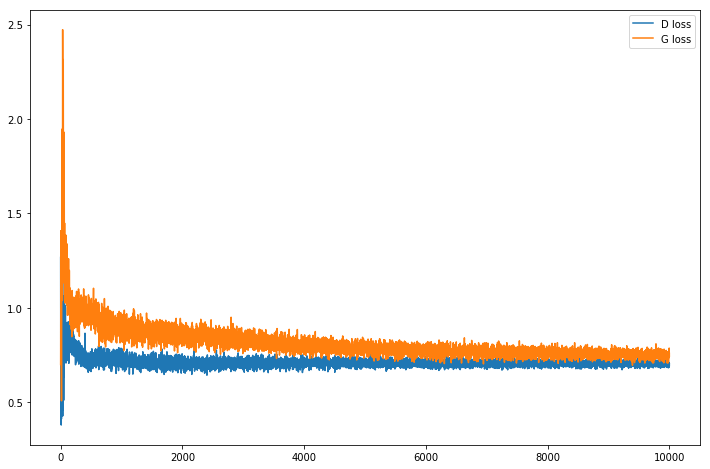

In [18]:
plt.plot(np.array(losses['d_loss'])[:,0], label="D loss")
plt.plot(np.array(losses['g_loss'])[:], label="G loss")

plt.legend(loc="best")
plt.savefig("{:s}D and G loss".format(save_path_training))
plt.show()

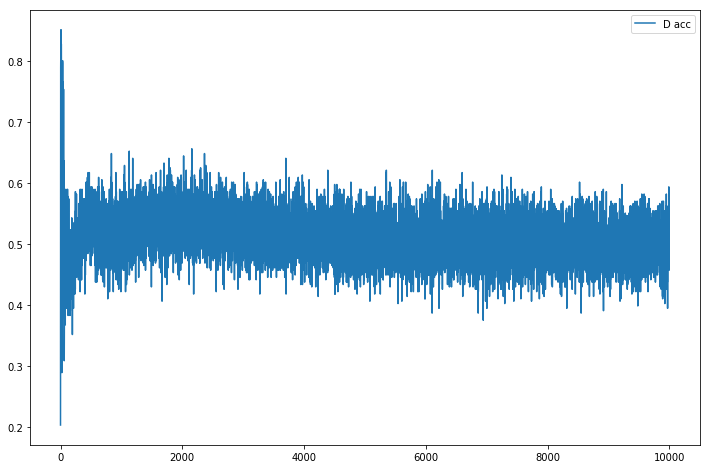

In [19]:
plt.plot(np.array(losses['d_loss'])[:,1], label="D acc")

plt.legend(loc="best")
plt.savefig("{:s}D acc".format(save_path_training))
plt.show()

## Load and Save Model

In [0]:
# Save models.
model_path = "models/"
if not os.path.exists(model_path):
    os.mkdir(model_path)

discriminator_path = model_path + "discriminator.h5"
generator_path = model_path + "generator.h5"
combined_path = model_path + "combined.h5"

discriminator.save(discriminator_path)
generator.save(generator_path)
combined.save(combined_path)


In [0]:
# Load models.
discriminator = load_model(discriminator_path)
generator = load_model(generator_path)
combined = load_model(combined_path)

In [28]:
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 64)          256       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 7, 7, 64)        

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
generator.summary()

In [0]:
combined.summary()

## Generate from Latent Space

In [0]:
save_path_gen_image = "gen_images/"
if not os.path.exists(save_path_gen_image):
    os.mkdir(save_path_gen_image)
gen_count = 0

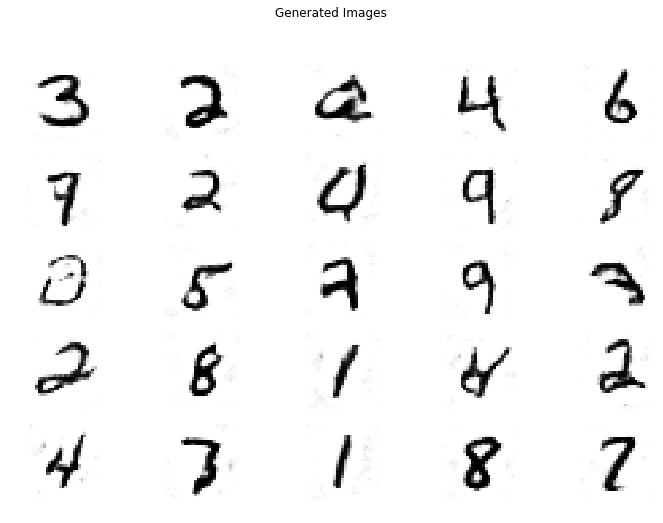

In [71]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, latent_dim))
gen_imgs = generator.predict(noise)

fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.suptitle("Generated Images")
fig.savefig("{:s}gen_image_{:d}.png".format(save_path_gen_image, gen_count))
plt.show()
plt.close()

gen_count += 1

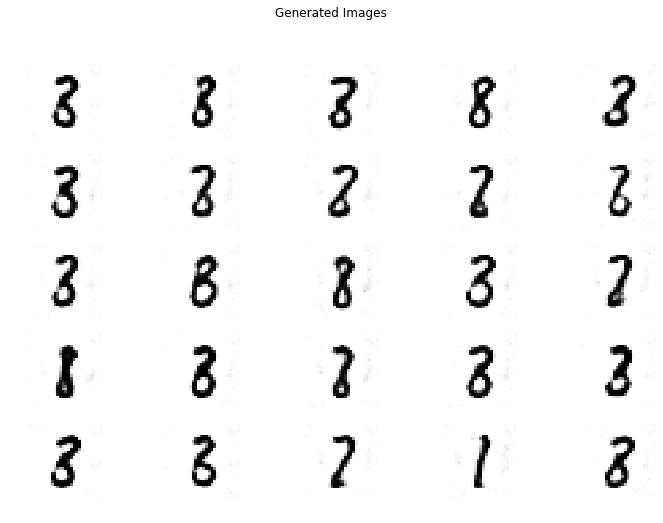

In [69]:
r, c = 5, 5
init_noise = np.random.normal(0, 1, (latent_dim,))
noise_center = np.tile(init_noise, (r * c, 1))
noise = noise_center + np.random.normal(0, 0.2, (r * c, latent_dim))
gen_imgs = generator.predict(noise)

fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.suptitle("Generated Images")
fig.savefig("{:s}gen_image_{:d}.png".format(save_path_gen_image, gen_count))
plt.show()
plt.close()

gen_count += 1

In [39]:
# Only with 2D-shaped z.




(25, 100)


# Vanilla MNIST Classifier

## Training

# Playground